In [15]:
%load_ext autoreload
%autoreload 2
%matplotlib inline  

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
from config import config
import pandas
import seaborn
import numpy as np
import scipy
import matplotlib.pyplot as plt
import papermill as pm
import scrapbook as sb
from stacked_data import stacked_data
from tqdm import tqdm
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.utils.multiclass import unique_labels
from sklearn.ensemble import ExtraTreesClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, IsolationForest, RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn import metrics

from evaluate import calculate_confusion_matrix_stats, plot_roc_curve, plot_precision_recall, plot_confusion_matrix_ensemble

# Ensemble models

In [17]:
MODELS = [
    "d8563137-6958-41e4-9d35-d9a9be745887", #"f683af1e-e68c-4180-beef-c9c040c4d63f", # t2 
    "69d65638-156f-4a73-bf6c-b6658294af4a", # t1
    "82dc825c-9b8a-4e07-aa87-eca1a7ef2a59", # features
]

In [18]:
models = MODELS
print("models: {}".format(models))

models: ['d8563137-6958-41e4-9d35-d9a9be745887', '69d65638-156f-4a73-bf6c-b6658294af4a', '82dc825c-9b8a-4e07-aa87-eca1a7ef2a59']


In [19]:
sd = stacked_data(uuids=models)

  0%|          | 0/678 [00:00<?, ?it/s]

                outcome_pos  outcome_neg  outcome_3   age  sex  \
patientID                                                        
bone-brown-1              0            0          0  52.0    1   
bone-brown-10             0            0          0  52.0    0   
bone-brown-100            1            1          2  22.0    1   
bone-brown-101            0            0          0  88.0    0   
bone-brown-102            0            0          0  56.0    1   
...                     ...          ...        ...   ...  ...   
bone-penn-650             1            1          2  20.0    1   
bone-penn-651             0            0          0  16.0    1   
bone-penn-652             1            1          2   8.0    0   
bone-penn-653             1            1          2  16.0    1   
bone-penn-654             1            1          2   3.0    1   

                                                         location        sort  
patientID                                                    

  0%|          | 2/678 [00:00<01:49,  6.16it/s]

I'm doing the thing.
bone-brown-101
I'm doing the thing.


  0%|          | 3/678 [00:00<02:20,  4.80it/s]

I'm doing the thing.
bone-brown-103
I'm doing the thing.


  1%|          | 4/678 [00:00<02:39,  4.23it/s]

I'm doing the thing.
bone-brown-106
I'm doing the thing.


  1%|          | 6/678 [00:02<05:37,  1.99it/s]

I'm doing the thing.
bone-brown-107
I'm doing the thing.
I'm doing the thing.
bone-brown-11
I'm doing the thing.


  1%|          | 7/678 [00:02<04:33,  2.46it/s]

I'm doing the thing.
bone-brown-110
I'm doing the thing.
I'm doing the thing.
bone-brown-112
I'm doing the thing.


  1%|▏         | 9/678 [00:03<03:12,  3.47it/s]

I'm doing the thing.
bone-brown-113
I'm doing the thing.


  1%|▏         | 10/678 [00:03<03:11,  3.50it/s]

I'm doing the thing.
bone-brown-114
I'm doing the thing.


  2%|▏         | 11/678 [00:03<03:05,  3.60it/s]

I'm doing the thing.
bone-brown-115
I'm doing the thing.


  2%|▏         | 12/678 [00:03<03:17,  3.37it/s]

I'm doing the thing.
bone-brown-116
I'm doing the thing.


  2%|▏         | 13/678 [00:04<03:11,  3.47it/s]

I'm doing the thing.
bone-brown-117
I'm doing the thing.


  2%|▏         | 15/678 [00:05<03:38,  3.03it/s]

I'm doing the thing.
bone-brown-120
I'm doing the thing.
I'm doing the thing.
bone-brown-121
I'm doing the thing.


  3%|▎         | 17/678 [00:05<02:26,  4.52it/s]

I'm doing the thing.
bone-brown-123
I'm doing the thing.
I'm doing the thing.
bone-brown-124
I'm doing the thing.


  3%|▎         | 18/678 [00:05<03:12,  3.42it/s]

I'm doing the thing.
bone-brown-125
I'm doing the thing.


  3%|▎         | 20/678 [00:06<02:44,  4.00it/s]

I'm doing the thing.
bone-brown-13
I'm doing the thing.
I'm doing the thing.
bone-brown-14
I'm doing the thing.
I'm doing the thing.
bone-brown-15
I'm doing the thing.


  3%|▎         | 22/678 [00:06<02:16,  4.80it/s]

I'm doing the thing.
bone-brown-17
I'm doing the thing.


  3%|▎         | 23/678 [00:06<02:42,  4.03it/s]

I'm doing the thing.
bone-brown-19
I'm doing the thing.


  4%|▎         | 24/678 [00:07<02:47,  3.90it/s]

I'm doing the thing.
bone-brown-2
I'm doing the thing.


  4%|▎         | 25/678 [00:07<02:51,  3.80it/s]

I'm doing the thing.
bone-brown-20
I'm doing the thing.


  4%|▍         | 26/678 [00:07<02:59,  3.64it/s]

I'm doing the thing.
bone-brown-21
I'm doing the thing.


  4%|▍         | 27/678 [00:08<03:53,  2.79it/s]

I'm doing the thing.
bone-brown-22
I'm doing the thing.
I'm doing the thing.
bone-brown-23
I'm doing the thing.


  4%|▍         | 29/678 [00:08<02:53,  3.74it/s]

I'm doing the thing.
bone-brown-24
I'm doing the thing.
I'm doing the thing.
bone-brown-25
I'm doing the thing.


  5%|▍         | 33/678 [00:09<02:12,  4.87it/s]

I'm doing the thing.
bone-brown-27
I'm doing the thing.
I'm doing the thing.
bone-brown-29
I'm doing the thing.
I'm doing the thing.
bone-brown-3
I'm doing the thing.


  5%|▌         | 35/678 [00:09<02:16,  4.71it/s]

I'm doing the thing.
bone-brown-31
I'm doing the thing.
I'm doing the thing.
bone-brown-32
I'm doing the thing.


  5%|▌         | 36/678 [00:10<02:13,  4.80it/s]

I'm doing the thing.
bone-brown-34
I'm doing the thing.


  5%|▌         | 37/678 [00:10<02:41,  3.96it/s]

I'm doing the thing.
bone-brown-35
I'm doing the thing.


  6%|▌         | 38/678 [00:10<02:46,  3.84it/s]

I'm doing the thing.
bone-brown-37
I'm doing the thing.


  6%|▌         | 40/678 [00:11<02:22,  4.48it/s]

I'm doing the thing.
bone-brown-38
I'm doing the thing.
I'm doing the thing.
bone-brown-39
I'm doing the thing.


  6%|▌         | 41/678 [00:11<02:30,  4.23it/s]

I'm doing the thing.
bone-brown-41
I'm doing the thing.


  6%|▌         | 42/678 [00:11<02:55,  3.62it/s]

I'm doing the thing.
bone-brown-42
I'm doing the thing.


  6%|▋         | 43/678 [00:12<05:26,  1.94it/s]

I'm doing the thing.
bone-brown-44
I'm doing the thing.


  6%|▋         | 44/678 [00:13<06:57,  1.52it/s]

I'm doing the thing.
bone-brown-46
I'm doing the thing.
I'm doing the thing.
bone-brown-50
I'm doing the thing.


  7%|▋         | 46/678 [00:14<05:26,  1.94it/s]

I'm doing the thing.
bone-brown-51
I'm doing the thing.


  7%|▋         | 47/678 [00:14<04:52,  2.15it/s]

I'm doing the thing.
bone-brown-52
I'm doing the thing.


  7%|▋         | 48/678 [00:15<04:12,  2.49it/s]

I'm doing the thing.
bone-brown-53
I'm doing the thing.
I'm doing the thing.
bone-brown-54
I'm doing the thing.


  7%|▋         | 50/678 [00:15<03:15,  3.21it/s]

I'm doing the thing.
bone-brown-56
I'm doing the thing.


  8%|▊         | 52/678 [00:15<02:43,  3.83it/s]

I'm doing the thing.
bone-brown-58
I'm doing the thing.
I'm doing the thing.
bone-brown-59
I'm doing the thing.


  8%|▊         | 53/678 [00:16<03:25,  3.04it/s]

I'm doing the thing.
bone-brown-6
I'm doing the thing.


  8%|▊         | 54/678 [00:17<05:31,  1.88it/s]

I'm doing the thing.
bone-brown-63
I'm doing the thing.


  8%|▊         | 56/678 [00:17<04:01,  2.57it/s]

I'm doing the thing.
bone-brown-64
I'm doing the thing.
I'm doing the thing.
bone-brown-65
I'm doing the thing.


  9%|▊         | 59/678 [00:18<02:27,  4.19it/s]

I'm doing the thing.
bone-brown-68
I'm doing the thing.
I'm doing the thing.
bone-brown-70
I'm doing the thing.
I'm doing the thing.
bone-brown-72
I'm doing the thing.


  9%|▉         | 60/678 [00:18<02:39,  3.87it/s]

I'm doing the thing.
bone-brown-73
I'm doing the thing.


  9%|▉         | 62/678 [00:19<02:17,  4.48it/s]

I'm doing the thing.
bone-brown-74
I'm doing the thing.
I'm doing the thing.
bone-brown-75
I'm doing the thing.


  9%|▉         | 64/678 [00:19<02:12,  4.63it/s]

I'm doing the thing.
bone-brown-76
I'm doing the thing.
I'm doing the thing.
bone-brown-77
I'm doing the thing.


 10%|▉         | 66/678 [00:19<02:03,  4.94it/s]

I'm doing the thing.
bone-brown-78
I'm doing the thing.
I'm doing the thing.
bone-brown-8
I'm doing the thing.


 10%|▉         | 67/678 [00:20<02:12,  4.62it/s]

I'm doing the thing.
bone-brown-81
I'm doing the thing.
I'm doing the thing.
bone-brown-83
I'm doing the thing.


 10%|█         | 69/678 [00:20<02:01,  5.02it/s]

I'm doing the thing.
bone-brown-84
I'm doing the thing.


 10%|█         | 70/678 [00:22<05:56,  1.71it/s]

I'm doing the thing.
bone-brown-85
I'm doing the thing.


 10%|█         | 71/678 [00:22<05:57,  1.70it/s]

I'm doing the thing.
bone-brown-86
I'm doing the thing.


 11%|█         | 72/678 [00:23<05:03,  2.00it/s]

I'm doing the thing.
bone-brown-88
I'm doing the thing.


 11%|█         | 74/678 [00:23<03:34,  2.81it/s]

I'm doing the thing.
bone-brown-89
I'm doing the thing.
I'm doing the thing.
bone-brown-91
I'm doing the thing.


 11%|█         | 75/678 [00:23<02:54,  3.45it/s]

I'm doing the thing.
bone-brown-92
I'm doing the thing.


 11%|█▏        | 77/678 [00:24<02:47,  3.60it/s]

I'm doing the thing.
bone-brown-94
I'm doing the thing.
I'm doing the thing.
bone-brown-95
I'm doing the thing.


 12%|█▏        | 78/678 [00:24<02:44,  3.64it/s]

I'm doing the thing.
bone-brown-96
I'm doing the thing.
I'm doing the thing.
bone-brown-97
I'm doing the thing.


 12%|█▏        | 80/678 [00:24<02:02,  4.88it/s]

I'm doing the thing.
bone-brown-99
I'm doing the thing.


 12%|█▏        | 82/678 [00:25<02:22,  4.19it/s]

I'm doing the thing.
bone-china-002
I'm doing the thing.
I'm doing the thing.
bone-china-004
I'm doing the thing.
I'm doing the thing.
bone-china-005
I'm doing the thing.


 13%|█▎        | 86/678 [00:25<01:19,  7.48it/s]

I'm doing the thing.
bone-china-006
I'm doing the thing.
I'm doing the thing.
bone-china-008
I'm doing the thing.
I'm doing the thing.
bone-china-009
I'm doing the thing.


 13%|█▎        | 88/678 [00:25<01:07,  8.70it/s]

I'm doing the thing.
bone-china-010
I'm doing the thing.
I'm doing the thing.
bone-china-014
I'm doing the thing.
I'm doing the thing.
bone-china-015
I'm doing the thing.


 14%|█▎        | 93/678 [00:26<00:46, 12.45it/s]

I'm doing the thing.
bone-china-019
I'm doing the thing.
I'm doing the thing.
bone-china-020
I'm doing the thing.
I'm doing the thing.
bone-china-021
I'm doing the thing.
I'm doing the thing.
bone-china-022
I'm doing the thing.
I'm doing the thing.


 14%|█▍        | 95/678 [00:26<00:46, 12.63it/s]

bone-china-023
I'm doing the thing.
I'm doing the thing.
bone-china-027
I'm doing the thing.
I'm doing the thing.
bone-china-028
I'm doing the thing.


 15%|█▍        | 99/678 [00:26<00:43, 13.16it/s]

I'm doing the thing.
bone-china-029
I'm doing the thing.
I'm doing the thing.
bone-china-031
I'm doing the thing.
I'm doing the thing.
bone-china-033
I'm doing the thing.


 15%|█▍        | 101/678 [00:26<00:43, 13.33it/s]

I'm doing the thing.
bone-china-035
I'm doing the thing.
I'm doing the thing.
bone-china-037
I'm doing the thing.
I'm doing the thing.
bone-china-038
I'm doing the thing.


 15%|█▌        | 105/678 [00:27<00:48, 11.94it/s]

I'm doing the thing.
bone-china-039
I'm doing the thing.
I'm doing the thing.
bone-china-041
I'm doing the thing.
I'm doing the thing.
bone-china-044
I'm doing the thing.


 16%|█▌        | 107/678 [00:27<00:47, 12.08it/s]

I'm doing the thing.
bone-china-045
I'm doing the thing.
I'm doing the thing.
bone-china-046
I'm doing the thing.
I'm doing the thing.
bone-china-047
I'm doing the thing.


 16%|█▋        | 111/678 [00:27<00:44, 12.74it/s]

I'm doing the thing.
bone-china-050
I'm doing the thing.
I'm doing the thing.
bone-china-051
I'm doing the thing.
I'm doing the thing.
bone-china-052
I'm doing the thing.
I'm doing the thing.
bone-china-053
I'm doing the thing.


 17%|█▋        | 114/678 [00:27<00:38, 14.78it/s]

I'm doing the thing.
bone-china-055
I'm doing the thing.
I'm doing the thing.
bone-china-056
I'm doing the thing.
I'm doing the thing.
bone-china-058
I'm doing the thing.


 17%|█▋        | 118/678 [00:28<00:49, 11.42it/s]

I'm doing the thing.
bone-china-059
I'm doing the thing.
I'm doing the thing.
bone-china-060
I'm doing the thing.
I'm doing the thing.
bone-china-061
I'm doing the thing.
I'm doing the thing.
bone-china-062
I'm doing the thing.


 18%|█▊        | 122/678 [00:28<00:46, 11.91it/s]

I'm doing the thing.
bone-china-065
I'm doing the thing.
I'm doing the thing.
bone-china-066
I'm doing the thing.
I'm doing the thing.
bone-china-067
I'm doing the thing.


 18%|█▊        | 124/678 [00:28<00:45, 12.31it/s]

I'm doing the thing.
bone-china-068
I'm doing the thing.
I'm doing the thing.
bone-china-069
I'm doing the thing.
I'm doing the thing.
bone-china-070
I'm doing the thing.


 19%|█▉        | 128/678 [00:29<00:41, 13.27it/s]

I'm doing the thing.
bone-china-071
I'm doing the thing.
I'm doing the thing.
bone-china-072
I'm doing the thing.
I'm doing the thing.
bone-china-074
I'm doing the thing.


 19%|█▉        | 130/678 [00:29<00:44, 12.39it/s]

I'm doing the thing.
bone-china-075
I'm doing the thing.
I'm doing the thing.
bone-china-076
I'm doing the thing.


 19%|█▉        | 132/678 [00:29<00:55,  9.79it/s]

I'm doing the thing.
bone-china-079
I'm doing the thing.
I'm doing the thing.
bone-china-080
I'm doing the thing.
I'm doing the thing.
bone-china-081
I'm doing the thing.


 20%|█▉        | 134/678 [00:29<00:53, 10.14it/s]

I'm doing the thing.
bone-china-083
I'm doing the thing.
I'm doing the thing.
bone-china-084
I'm doing the thing.


 20%|██        | 138/678 [00:30<00:53, 10.03it/s]

I'm doing the thing.
bone-china-085
I'm doing the thing.
I'm doing the thing.
bone-china-086
I'm doing the thing.
I'm doing the thing.
bone-china-087
I'm doing the thing.


 21%|██        | 140/678 [00:30<00:57,  9.42it/s]

I'm doing the thing.
bone-china-088
I'm doing the thing.
I'm doing the thing.
bone-china-089
I'm doing the thing.


 21%|██        | 142/678 [00:30<00:50, 10.60it/s]

I'm doing the thing.
bone-china-090
I'm doing the thing.
I'm doing the thing.
bone-china-092
I'm doing the thing.
I'm doing the thing.
bone-china-093
I'm doing the thing.


 22%|██▏       | 146/678 [00:30<00:44, 11.96it/s]

I'm doing the thing.
bone-china-099
I'm doing the thing.
I'm doing the thing.
bone-china-100
I'm doing the thing.
I'm doing the thing.
bone-china-101
I'm doing the thing.


 22%|██▏       | 148/678 [00:30<00:42, 12.38it/s]

I'm doing the thing.
bone-china-103
I'm doing the thing.
I'm doing the thing.
bone-china-104
I'm doing the thing.
I'm doing the thing.


 22%|██▏       | 150/678 [00:31<00:49, 10.69it/s]

bone-china-105
I'm doing the thing.
I'm doing the thing.
bone-china-107
I'm doing the thing.


 22%|██▏       | 152/678 [00:31<00:45, 11.45it/s]

I'm doing the thing.
bone-china-109
I'm doing the thing.
I'm doing the thing.
bone-china-110
I'm doing the thing.
I'm doing the thing.
bone-china-113
I'm doing the thing.


 23%|██▎       | 156/678 [00:31<00:44, 11.62it/s]

I'm doing the thing.
bone-china-114
I'm doing the thing.
I'm doing the thing.
bone-china-117
I'm doing the thing.
I'm doing the thing.
bone-china-118
I'm doing the thing.


 23%|██▎       | 158/678 [00:31<00:49, 10.59it/s]

I'm doing the thing.
bone-china-121
I'm doing the thing.
I'm doing the thing.
bone-china-122
I'm doing the thing.


 24%|██▎       | 160/678 [00:32<00:51, 10.14it/s]

I'm doing the thing.
bone-china-123
I'm doing the thing.
I'm doing the thing.
bone-china-124
I'm doing the thing.


 24%|██▍       | 162/678 [00:32<00:48, 10.68it/s]

I'm doing the thing.
bone-china-125
I'm doing the thing.
I'm doing the thing.
bone-china-126
I'm doing the thing.
I'm doing the thing.
bone-china-127
I'm doing the thing.


 24%|██▍       | 166/678 [00:32<00:48, 10.54it/s]

I'm doing the thing.
bone-china-131
I'm doing the thing.
I'm doing the thing.
bone-china-132
I'm doing the thing.
I'm doing the thing.
bone-china-133
I'm doing the thing.


 25%|██▍       | 168/678 [00:32<00:51,  9.88it/s]

I'm doing the thing.
bone-china-134
I'm doing the thing.
I'm doing the thing.
bone-china-135
I'm doing the thing.


 25%|██▌       | 170/678 [00:33<00:45, 11.27it/s]

I'm doing the thing.
bone-china-136
I'm doing the thing.
I'm doing the thing.
bone-china-138
I'm doing the thing.
I'm doing the thing.
bone-china-140
I'm doing the thing.


 25%|██▌       | 172/678 [00:33<00:47, 10.57it/s]

I'm doing the thing.
bone-china-143
I'm doing the thing.
I'm doing the thing.
bone-china-145
I'm doing the thing.


 26%|██▌       | 174/678 [00:33<00:53,  9.42it/s]

I'm doing the thing.
bone-china-146
I'm doing the thing.
I'm doing the thing.
bone-china-148
I'm doing the thing.


 26%|██▌       | 177/678 [00:33<00:54,  9.19it/s]

I'm doing the thing.
bone-china-149
I'm doing the thing.
I'm doing the thing.
bone-china-152
I'm doing the thing.


 26%|██▋       | 179/678 [00:34<00:51,  9.64it/s]

I'm doing the thing.
bone-china-153
I'm doing the thing.
I'm doing the thing.
bone-china-154
I'm doing the thing.
I'm doing the thing.
bone-china-158
I'm doing the thing.


 27%|██▋       | 181/678 [00:34<00:43, 11.49it/s]

I'm doing the thing.
bone-china-159
I'm doing the thing.
I'm doing the thing.
bone-china-160
I'm doing the thing.


 27%|██▋       | 185/678 [00:34<00:42, 11.69it/s]

I'm doing the thing.
bone-china-161
I'm doing the thing.
I'm doing the thing.
bone-china-164
I'm doing the thing.
I'm doing the thing.
bone-china-166
I'm doing the thing.


 28%|██▊       | 187/678 [00:34<00:40, 12.21it/s]

I'm doing the thing.
bone-china-167
I'm doing the thing.
I'm doing the thing.
bone-china-169
I'm doing the thing.
I'm doing the thing.
bone-china-170
I'm doing the thing.


 28%|██▊       | 189/678 [00:34<00:40, 12.21it/s]

I'm doing the thing.
bone-china-174
I'm doing the thing.
I'm doing the thing.
bone-china-175
I'm doing the thing.


 28%|██▊       | 193/678 [00:35<00:45, 10.75it/s]

I'm doing the thing.
bone-china-176
I'm doing the thing.
I'm doing the thing.
bone-china-177
I'm doing the thing.
I'm doing the thing.
bone-china-180
I'm doing the thing.


 29%|██▉       | 197/678 [00:35<00:38, 12.51it/s]

I'm doing the thing.
bone-china-184
I'm doing the thing.
I'm doing the thing.
bone-china-186
I'm doing the thing.
I'm doing the thing.
bone-china-187
I'm doing the thing.
I'm doing the thing.
bone-china-189
I'm doing the thing.


 29%|██▉       | 199/678 [00:35<00:36, 13.00it/s]

I'm doing the thing.
bone-china-190
I'm doing the thing.
I'm doing the thing.
bone-china-192
I'm doing the thing.
I'm doing the thing.
bone-china-193
I'm doing the thing.


 30%|██▉       | 203/678 [00:36<00:39, 12.16it/s]

I'm doing the thing.
bone-china-194
I'm doing the thing.
I'm doing the thing.
bone-china-196
I'm doing the thing.
I'm doing the thing.
bone-china-198
I'm doing the thing.


 30%|███       | 205/678 [00:36<00:38, 12.17it/s]

I'm doing the thing.
bone-china-199
I'm doing the thing.
I'm doing the thing.
bone-china-203
I'm doing the thing.
I'm doing the thing.
bone-china-209
I'm doing the thing.


 31%|███       | 209/678 [00:36<00:38, 12.25it/s]

I'm doing the thing.
bone-china-212
I'm doing the thing.
I'm doing the thing.
bone-china-213
I'm doing the thing.
I'm doing the thing.
bone-china-215
I'm doing the thing.


 31%|███       | 211/678 [00:36<00:36, 12.63it/s]

I'm doing the thing.
bone-china-216
I'm doing the thing.
I'm doing the thing.
bone-china-217
I'm doing the thing.
I'm doing the thing.
bone-china-221
I'm doing the thing.


 32%|███▏      | 215/678 [00:37<00:39, 11.69it/s]

I'm doing the thing.
bone-china-222
I'm doing the thing.
I'm doing the thing.
bone-china-223
I'm doing the thing.
I'm doing the thing.
bone-china-225
I'm doing the thing.


 32%|███▏      | 217/678 [00:37<00:44, 10.44it/s]

I'm doing the thing.
bone-china-228
I'm doing the thing.
I'm doing the thing.
bone-china-231
I'm doing the thing.
I'm doing the thing.
bone-china-234
I'm doing the thing.


 32%|███▏      | 219/678 [00:37<00:47,  9.73it/s]

I'm doing the thing.
bone-china-242
I'm doing the thing.


 33%|███▎      | 221/678 [00:37<00:57,  7.96it/s]

I'm doing the thing.
bone-china-243
I'm doing the thing.
I'm doing the thing.
bone-hup-101
I'm doing the thing.


 33%|███▎      | 223/678 [00:38<01:05,  6.90it/s]

I'm doing the thing.
bone-hup-102
I'm doing the thing.
I'm doing the thing.
bone-hup-103
I'm doing the thing.
I'm doing the thing.
bone-hup-104
I'm doing the thing.


 33%|███▎      | 225/678 [00:38<00:58,  7.74it/s]

I'm doing the thing.
bone-hup-108
I'm doing the thing.
I'm doing the thing.
bone-hup-109
I'm doing the thing.


 33%|███▎      | 227/678 [00:38<01:09,  6.51it/s]

I'm doing the thing.
bone-hup-111
I'm doing the thing.


 34%|███▎      | 228/678 [00:39<01:31,  4.93it/s]

I'm doing the thing.
bone-hup-112
I'm doing the thing.


 34%|███▍      | 229/678 [00:39<01:36,  4.65it/s]

I'm doing the thing.
bone-hup-114
I'm doing the thing.


 34%|███▍      | 230/678 [00:39<01:52,  3.97it/s]

I'm doing the thing.
bone-hup-116
I'm doing the thing.


 34%|███▍      | 231/678 [00:40<02:04,  3.60it/s]

I'm doing the thing.
bone-hup-118
I'm doing the thing.


 34%|███▍      | 233/678 [00:40<01:48,  4.09it/s]

I'm doing the thing.
bone-hup-119
I'm doing the thing.
I'm doing the thing.
bone-hup-120
I'm doing the thing.


 35%|███▍      | 234/678 [00:40<01:37,  4.55it/s]

I'm doing the thing.
bone-hup-122
I'm doing the thing.
I'm doing the thing.
bone-hup-123
I'm doing the thing.


 35%|███▍      | 236/678 [00:41<01:25,  5.14it/s]

I'm doing the thing.
bone-hup-124
I'm doing the thing.
I'm doing the thing.
bone-hup-126
I'm doing the thing.


 35%|███▌      | 238/678 [00:41<01:24,  5.22it/s]

I'm doing the thing.
bone-hup-128
I'm doing the thing.


 35%|███▌      | 239/678 [00:41<01:48,  4.05it/s]

I'm doing the thing.
bone-hup-130
I'm doing the thing.
I'm doing the thing.
bone-hup-131
I'm doing the thing.


 36%|███▌      | 242/678 [00:42<01:24,  5.16it/s]

I'm doing the thing.
bone-hup-132
I'm doing the thing.
I'm doing the thing.
bone-hup-133
I'm doing the thing.
I'm doing the thing.
bone-hup-134
I'm doing the thing.


 36%|███▌      | 245/678 [00:42<01:18,  5.53it/s]

I'm doing the thing.
bone-hup-136
I'm doing the thing.
I'm doing the thing.
bone-hup-137
I'm doing the thing.
I'm doing the thing.
bone-hup-138
I'm doing the thing.


 37%|███▋      | 248/678 [00:43<01:09,  6.16it/s]

I'm doing the thing.
bone-hup-139
I'm doing the thing.
I'm doing the thing.
bone-hup-141
I'm doing the thing.


 37%|███▋      | 251/678 [00:43<01:08,  6.21it/s]

I'm doing the thing.
bone-hup-142
I'm doing the thing.
I'm doing the thing.
bone-hup-143
I'm doing the thing.
I'm doing the thing.
bone-hup-146
I'm doing the thing.
I'm doing the thing.
bone-hup-148
I'm doing the thing.


 37%|███▋      | 254/678 [00:44<01:11,  5.89it/s]

I'm doing the thing.
bone-hup-150
I'm doing the thing.
I'm doing the thing.
bone-hup-151
I'm doing the thing.


 38%|███▊      | 256/678 [00:44<01:08,  6.19it/s]

I'm doing the thing.
bone-hup-152
I'm doing the thing.
I'm doing the thing.
bone-hup-154
I'm doing the thing.


 38%|███▊      | 258/678 [00:45<01:04,  6.54it/s]

I'm doing the thing.
bone-hup-155
I'm doing the thing.
I'm doing the thing.
bone-hup-156
I'm doing the thing.


 38%|███▊      | 259/678 [00:45<01:30,  4.61it/s]

I'm doing the thing.
bone-hup-158
I'm doing the thing.


 38%|███▊      | 260/678 [00:45<01:38,  4.24it/s]

I'm doing the thing.
bone-hup-160
I'm doing the thing.


 38%|███▊      | 261/678 [00:46<02:02,  3.42it/s]

I'm doing the thing.
bone-hup-161
I'm doing the thing.
I'm doing the thing.
bone-hup-168
I'm doing the thing.


 39%|███▉      | 263/678 [00:46<01:28,  4.70it/s]

I'm doing the thing.
bone-hup-169
I'm doing the thing.


 39%|███▉      | 264/678 [00:46<01:39,  4.14it/s]

I'm doing the thing.
bone-hup-173
I'm doing the thing.


 39%|███▉      | 267/678 [00:47<01:33,  4.39it/s]

I'm doing the thing.
bone-hup-177
I'm doing the thing.
I'm doing the thing.
bone-hup-179
I'm doing the thing.
I'm doing the thing.
bone-hup-180
I'm doing the thing.


 40%|███▉      | 268/678 [00:47<01:26,  4.74it/s]

I'm doing the thing.
bone-hup-188
I'm doing the thing.


 40%|███▉      | 269/678 [00:48<01:38,  4.16it/s]

I'm doing the thing.
bone-hup-193
I'm doing the thing.
I'm doing the thing.
bone-hup-201
I'm doing the thing.


 40%|████      | 273/678 [00:48<00:59,  6.76it/s]

I'm doing the thing.
bone-hup-203
I'm doing the thing.
I'm doing the thing.
bone-hup-207
I'm doing the thing.
I'm doing the thing.
bone-hup-211
I'm doing the thing.


 41%|████      | 275/678 [00:48<01:08,  5.85it/s]

I'm doing the thing.
bone-hup-213
I'm doing the thing.
I'm doing the thing.
bone-hup-214
I'm doing the thing.


 41%|████      | 278/678 [00:49<00:48,  8.24it/s]

I'm doing the thing.
bone-hup-219
I'm doing the thing.
I'm doing the thing.
bone-hup-225
I'm doing the thing.
I'm doing the thing.
bone-hup-228
I'm doing the thing.
I'm doing the thing.
bone-hup-229
I'm doing the thing.


 41%|████▏     | 280/678 [00:49<00:39, 10.16it/s]

I'm doing the thing.
bone-hup-23
I'm doing the thing.
I'm doing the thing.
bone-hup-231
I'm doing the thing.


 42%|████▏     | 282/678 [00:49<01:09,  5.66it/s]

I'm doing the thing.
bone-hup-232
I'm doing the thing.


 42%|████▏     | 283/678 [00:50<01:18,  5.03it/s]

I'm doing the thing.
bone-hup-234
I'm doing the thing.


 42%|████▏     | 285/678 [00:50<01:17,  5.06it/s]

I'm doing the thing.
bone-hup-237
I'm doing the thing.
I'm doing the thing.
bone-hup-244
I'm doing the thing.


 42%|████▏     | 288/678 [00:50<00:48,  8.04it/s]

I'm doing the thing.
bone-hup-248
I'm doing the thing.
I'm doing the thing.
bone-hup-257
I'm doing the thing.
I'm doing the thing.
bone-hup-261
I'm doing the thing.


 43%|████▎     | 292/678 [00:51<01:00,  6.34it/s]

I'm doing the thing.
bone-hup-262
I'm doing the thing.
I'm doing the thing.
bone-hup-263
I'm doing the thing.
I'm doing the thing.
bone-hup-265
I'm doing the thing.
I'm doing the thing.
bone-hup-266
I'm doing the thing.


 43%|████▎     | 293/678 [00:51<01:14,  5.15it/s]

I'm doing the thing.
bone-hup-271
I'm doing the thing.


 43%|████▎     | 294/678 [00:52<01:23,  4.61it/s]

I'm doing the thing.
bone-hup-272
I'm doing the thing.


 44%|████▎     | 295/678 [00:52<01:39,  3.87it/s]

I'm doing the thing.
bone-hup-275
I'm doing the thing.


 44%|████▎     | 296/678 [00:53<02:34,  2.47it/s]

I'm doing the thing.
bone-hup-276
I'm doing the thing.
I'm doing the thing.
bone-hup-277
I'm doing the thing.


 44%|████▍     | 298/678 [00:53<01:45,  3.61it/s]

I'm doing the thing.
bone-hup-279
I'm doing the thing.
I'm doing the thing.
bone-hup-281
I'm doing the thing.


 44%|████▍     | 301/678 [00:54<01:13,  5.14it/s]

I'm doing the thing.
bone-hup-287
I'm doing the thing.
I'm doing the thing.
bone-hup-290
I'm doing the thing.


 45%|████▍     | 303/678 [00:54<01:15,  4.99it/s]

I'm doing the thing.
bone-hup-291
I'm doing the thing.
I'm doing the thing.
bone-hup-293
I'm doing the thing.


 45%|████▍     | 304/678 [00:54<01:05,  5.70it/s]

I'm doing the thing.
bone-hup-296
I'm doing the thing.


 45%|████▍     | 305/678 [00:54<01:08,  5.43it/s]

I'm doing the thing.
bone-hup-297
I'm doing the thing.


 45%|████▌     | 308/678 [00:55<01:14,  4.95it/s]

I'm doing the thing.
bone-hup-298
I'm doing the thing.
I'm doing the thing.
bone-hup-299
I'm doing the thing.
I'm doing the thing.
bone-hup-3
I'm doing the thing.


 46%|████▌     | 309/678 [00:55<01:18,  4.68it/s]

I'm doing the thing.
bone-hup-302
I'm doing the thing.


 46%|████▌     | 310/678 [00:56<01:26,  4.23it/s]

I'm doing the thing.
bone-hup-305
I'm doing the thing.


 46%|████▌     | 312/678 [00:56<01:26,  4.24it/s]

I'm doing the thing.
bone-hup-306
I'm doing the thing.
I'm doing the thing.
bone-hup-308
I'm doing the thing.


 46%|████▋     | 314/678 [00:56<01:09,  5.24it/s]

I'm doing the thing.
bone-hup-310
I'm doing the thing.
I'm doing the thing.
bone-hup-312
I'm doing the thing.


 46%|████▋     | 315/678 [00:57<01:06,  5.50it/s]

I'm doing the thing.
bone-hup-314
I'm doing the thing.
I'm doing the thing.
bone-hup-316
I'm doing the thing.


 47%|████▋     | 317/678 [00:57<00:56,  6.43it/s]

I'm doing the thing.
bone-hup-317
I'm doing the thing.


 47%|████▋     | 318/678 [00:57<01:00,  5.97it/s]

I'm doing the thing.
bone-hup-321
I'm doing the thing.


 47%|████▋     | 319/678 [00:57<01:14,  4.79it/s]

I'm doing the thing.
bone-hup-325
I'm doing the thing.


 47%|████▋     | 320/678 [00:58<01:20,  4.42it/s]

I'm doing the thing.
bone-hup-326
I'm doing the thing.


 47%|████▋     | 321/678 [00:58<01:46,  3.36it/s]

I'm doing the thing.
bone-hup-328
I'm doing the thing.


 47%|████▋     | 322/678 [00:59<02:10,  2.72it/s]

I'm doing the thing.
bone-hup-330
I'm doing the thing.
I'm doing the thing.
bone-hup-50
I'm doing the thing.


 48%|████▊     | 325/678 [01:02<03:55,  1.50it/s]

I'm doing the thing.
bone-hup-51
I'm doing the thing.
I'm doing the thing.
bone-hup-52
I'm doing the thing.


 48%|████▊     | 328/678 [01:02<02:11,  2.66it/s]

I'm doing the thing.
bone-hup-55
I'm doing the thing.
I'm doing the thing.
bone-hup-56
I'm doing the thing.
I'm doing the thing.
bone-hup-59
I'm doing the thing.


 49%|████▉     | 331/678 [01:03<01:21,  4.24it/s]

I'm doing the thing.
bone-hup-60
I'm doing the thing.
I'm doing the thing.
bone-hup-61
I'm doing the thing.
I'm doing the thing.
bone-hup-62
I'm doing the thing.


 49%|████▉     | 333/678 [01:03<01:08,  5.02it/s]

I'm doing the thing.
bone-hup-65
I'm doing the thing.
I'm doing the thing.
bone-hup-67
I'm doing the thing.


 49%|████▉     | 335/678 [01:03<01:02,  5.45it/s]

I'm doing the thing.
bone-hup-69
I'm doing the thing.
I'm doing the thing.
bone-hup-70
I'm doing the thing.


 50%|████▉     | 336/678 [01:03<00:59,  5.75it/s]

I'm doing the thing.
bone-hup-76
I'm doing the thing.
I'm doing the thing.
bone-hup-78
I'm doing the thing.


 50%|████▉     | 338/678 [01:04<00:53,  6.40it/s]

I'm doing the thing.
bone-hup-79
I'm doing the thing.
I'm doing the thing.
bone-hup-80
I'm doing the thing.


 50%|█████     | 340/678 [01:04<00:50,  6.68it/s]

I'm doing the thing.
bone-hup-81
I'm doing the thing.
I'm doing the thing.
bone-hup-85
I'm doing the thing.


 50%|█████     | 342/678 [01:04<01:02,  5.38it/s]

I'm doing the thing.
bone-hup-90
I'm doing the thing.


 51%|█████     | 343/678 [01:05<01:24,  3.96it/s]

I'm doing the thing.
bone-hup-93
I'm doing the thing.


 51%|█████     | 345/678 [01:05<01:22,  4.03it/s]

I'm doing the thing.
bone-hup-95
I'm doing the thing.
I'm doing the thing.
bone-penn-001
I'm doing the thing.


 51%|█████     | 346/678 [01:06<01:16,  4.32it/s]

I'm doing the thing.
bone-penn-005
I'm doing the thing.


 51%|█████     | 347/678 [01:06<01:30,  3.67it/s]

I'm doing the thing.
bone-penn-007
I'm doing the thing.


 51%|█████▏    | 348/678 [01:06<01:27,  3.79it/s]

I'm doing the thing.
bone-penn-011
I'm doing the thing.


 52%|█████▏    | 350/678 [01:07<01:13,  4.45it/s]

I'm doing the thing.
bone-penn-014
I'm doing the thing.
I'm doing the thing.
bone-penn-018
I'm doing the thing.


 52%|█████▏    | 353/678 [01:07<01:02,  5.17it/s]

I'm doing the thing.
bone-penn-019
I'm doing the thing.
I'm doing the thing.
bone-penn-020
I'm doing the thing.
I'm doing the thing.
bone-penn-021
I'm doing the thing.
I'm doing the thing.
bone-penn-022
I'm doing the thing.


 53%|█████▎    | 357/678 [01:07<00:37,  8.50it/s]

I'm doing the thing.
bone-penn-024
I'm doing the thing.
I'm doing the thing.
bone-penn-027
I'm doing the thing.
I'm doing the thing.
bone-penn-029
I'm doing the thing.
I'm doing the thing.
bone-penn-030
I'm doing the thing.


 53%|█████▎    | 359/678 [01:08<01:00,  5.24it/s]

I'm doing the thing.
bone-penn-034
I'm doing the thing.


 53%|█████▎    | 362/678 [01:10<01:30,  3.50it/s]

I'm doing the thing.
bone-penn-036
I'm doing the thing.
I'm doing the thing.
bone-penn-037
I'm doing the thing.
I'm doing the thing.
bone-penn-038
I'm doing the thing.
I'm doing the thing.
bone-penn-039
I'm doing the thing.
I'm doing the thing.


 54%|█████▎    | 364/678 [01:10<01:14,  4.24it/s]

bone-penn-040
I'm doing the thing.


 54%|█████▍    | 366/678 [01:10<01:08,  4.59it/s]

I'm doing the thing.
bone-penn-042
I'm doing the thing.
I'm doing the thing.
bone-penn-045
I'm doing the thing.


 54%|█████▍    | 367/678 [01:11<01:10,  4.39it/s]

I'm doing the thing.
bone-penn-047
I'm doing the thing.


 54%|█████▍    | 368/678 [01:11<01:33,  3.33it/s]

I'm doing the thing.
bone-penn-048
I'm doing the thing.


 55%|█████▍    | 370/678 [01:12<01:41,  3.03it/s]

I'm doing the thing.
bone-penn-051
I'm doing the thing.
I'm doing the thing.
bone-penn-052
I'm doing the thing.


 55%|█████▍    | 372/678 [01:12<01:22,  3.70it/s]

I'm doing the thing.
bone-penn-053
I'm doing the thing.
I'm doing the thing.
bone-penn-054
I'm doing the thing.
I'm doing the thing.
bone-penn-056
I'm doing the thing.


 55%|█████▌    | 375/678 [01:13<01:03,  4.79it/s]

I'm doing the thing.
bone-penn-057
I'm doing the thing.
I'm doing the thing.
bone-penn-058
I'm doing the thing.


 55%|█████▌    | 376/678 [01:13<01:04,  4.71it/s]

I'm doing the thing.
bone-penn-062
I'm doing the thing.


 56%|█████▌    | 377/678 [01:14<01:38,  3.04it/s]

I'm doing the thing.
bone-penn-064
I'm doing the thing.


 56%|█████▌    | 380/678 [01:14<01:00,  4.95it/s]

I'm doing the thing.
bone-penn-068
I'm doing the thing.
I'm doing the thing.
bone-penn-069
I'm doing the thing.
I'm doing the thing.
bone-penn-070
I'm doing the thing.


 56%|█████▌    | 381/678 [01:15<01:37,  3.06it/s]

I'm doing the thing.
bone-penn-072
I'm doing the thing.


 56%|█████▋    | 383/678 [01:15<01:22,  3.58it/s]

I'm doing the thing.
bone-penn-073
I'm doing the thing.
I'm doing the thing.
bone-penn-074
I'm doing the thing.


 57%|█████▋    | 385/678 [01:16<01:00,  4.85it/s]

I'm doing the thing.
bone-penn-078
I'm doing the thing.
I'm doing the thing.
bone-penn-079
I'm doing the thing.


 57%|█████▋    | 387/678 [01:16<00:46,  6.31it/s]

I'm doing the thing.
bone-penn-081
I'm doing the thing.
I'm doing the thing.
bone-penn-082
I'm doing the thing.


 57%|█████▋    | 389/678 [01:16<00:47,  6.07it/s]

I'm doing the thing.
bone-penn-083
I'm doing the thing.
I'm doing the thing.
bone-penn-084
I'm doing the thing.


 58%|█████▊    | 392/678 [01:16<00:39,  7.30it/s]

I'm doing the thing.
bone-penn-085
I'm doing the thing.
I'm doing the thing.
bone-penn-091
I'm doing the thing.
I'm doing the thing.
bone-penn-092
I'm doing the thing.


 58%|█████▊    | 395/678 [01:17<00:29,  9.50it/s]

I'm doing the thing.
bone-penn-093
I'm doing the thing.
I'm doing the thing.
bone-penn-094
I'm doing the thing.
I'm doing the thing.
bone-penn-095
I'm doing the thing.
I'm doing the thing.
bone-penn-097
I'm doing the thing.


 59%|█████▊    | 397/678 [01:17<00:41,  6.69it/s]

I'm doing the thing.
bone-penn-099
I'm doing the thing.


 59%|█████▊    | 398/678 [01:17<00:54,  5.15it/s]

I'm doing the thing.
bone-penn-102
I'm doing the thing.


 59%|█████▉    | 399/678 [01:18<01:02,  4.45it/s]

I'm doing the thing.
bone-penn-105
I'm doing the thing.


 59%|█████▉    | 400/678 [01:18<01:04,  4.31it/s]

I'm doing the thing.
bone-penn-106
I'm doing the thing.


 59%|█████▉    | 401/678 [01:18<01:02,  4.40it/s]

I'm doing the thing.
bone-penn-107
I'm doing the thing.


 59%|█████▉    | 402/678 [01:19<01:08,  4.02it/s]

I'm doing the thing.
bone-penn-109
I'm doing the thing.
I'm doing the thing.
bone-penn-110
I'm doing the thing.


 60%|█████▉    | 404/678 [01:19<01:02,  4.37it/s]

I'm doing the thing.
bone-penn-111
I'm doing the thing.


 60%|█████▉    | 405/678 [01:19<01:07,  4.06it/s]

I'm doing the thing.
bone-penn-112
I'm doing the thing.


 60%|██████    | 408/678 [01:21<01:20,  3.35it/s]

I'm doing the thing.
bone-penn-113
I'm doing the thing.
I'm doing the thing.
bone-penn-116
I'm doing the thing.
I'm doing the thing.
bone-penn-118
I'm doing the thing.


 60%|██████    | 409/678 [01:22<02:24,  1.86it/s]

I'm doing the thing.
bone-penn-119
I'm doing the thing.
I'm doing the thing.
bone-penn-120
I'm doing the thing.


 61%|██████    | 412/678 [01:22<01:24,  3.14it/s]

I'm doing the thing.
bone-penn-122
I'm doing the thing.
I'm doing the thing.
bone-penn-126
I'm doing the thing.


 61%|██████    | 413/678 [01:23<01:25,  3.10it/s]

I'm doing the thing.
bone-penn-134
I'm doing the thing.


 61%|██████    | 415/678 [01:23<01:10,  3.72it/s]

I'm doing the thing.
bone-penn-135
I'm doing the thing.
I'm doing the thing.
bone-penn-137
I'm doing the thing.


 62%|██████▏   | 417/678 [01:24<01:08,  3.78it/s]

I'm doing the thing.
bone-penn-139
I'm doing the thing.
I'm doing the thing.
bone-penn-140
I'm doing the thing.


 62%|██████▏   | 420/678 [01:24<00:42,  6.05it/s]

I'm doing the thing.
bone-penn-141
I'm doing the thing.
I'm doing the thing.
bone-penn-142
I'm doing the thing.
I'm doing the thing.
bone-penn-147
I'm doing the thing.


 62%|██████▏   | 421/678 [01:24<00:53,  4.82it/s]

I'm doing the thing.
bone-penn-148
I'm doing the thing.


 62%|██████▏   | 423/678 [01:25<00:52,  4.85it/s]

I'm doing the thing.
bone-penn-149
I'm doing the thing.
I'm doing the thing.
bone-penn-150
I'm doing the thing.


 63%|██████▎   | 424/678 [01:25<00:56,  4.49it/s]

I'm doing the thing.
bone-penn-152
I'm doing the thing.


 63%|██████▎   | 425/678 [01:25<01:03,  3.98it/s]

I'm doing the thing.
bone-penn-154
I'm doing the thing.
I'm doing the thing.
bone-penn-155
I'm doing the thing.


 63%|██████▎   | 428/678 [01:26<00:45,  5.52it/s]

I'm doing the thing.
bone-penn-156
I'm doing the thing.
I'm doing the thing.
bone-penn-157
I'm doing the thing.


 63%|██████▎   | 429/678 [01:26<00:46,  5.41it/s]

I'm doing the thing.
bone-penn-160
I'm doing the thing.
I'm doing the thing.
bone-penn-161
I'm doing the thing.


 64%|██████▎   | 432/678 [01:26<00:37,  6.57it/s]

I'm doing the thing.
bone-penn-162
I'm doing the thing.
I'm doing the thing.
bone-penn-163
I'm doing the thing.


 64%|██████▍   | 433/678 [01:26<00:38,  6.43it/s]

I'm doing the thing.
bone-penn-167
I'm doing the thing.


 64%|██████▍   | 434/678 [01:27<00:46,  5.30it/s]

I'm doing the thing.
bone-penn-168
I'm doing the thing.
I'm doing the thing.
bone-penn-170
I'm doing the thing.


 64%|██████▍   | 437/678 [01:27<00:39,  6.06it/s]

I'm doing the thing.
bone-penn-171
I'm doing the thing.
I'm doing the thing.
bone-penn-172
I'm doing the thing.


 65%|██████▍   | 438/678 [01:27<00:36,  6.59it/s]

I'm doing the thing.
bone-penn-173
I'm doing the thing.
I'm doing the thing.
bone-penn-174
I'm doing the thing.


 65%|██████▍   | 440/678 [01:27<00:31,  7.45it/s]

I'm doing the thing.
bone-penn-178
I'm doing the thing.


 65%|██████▌   | 441/678 [01:28<00:36,  6.54it/s]

I'm doing the thing.
bone-penn-179
I'm doing the thing.


 65%|██████▌   | 443/678 [01:28<00:44,  5.32it/s]

I'm doing the thing.
bone-penn-180
I'm doing the thing.
I'm doing the thing.
bone-penn-183
I'm doing the thing.


 66%|██████▌   | 445/678 [01:28<00:36,  6.40it/s]

I'm doing the thing.
bone-penn-187
I'm doing the thing.
I'm doing the thing.
bone-penn-188
I'm doing the thing.


 66%|██████▌   | 446/678 [01:28<00:33,  7.01it/s]

I'm doing the thing.
bone-penn-189
I'm doing the thing.


 66%|██████▌   | 447/678 [01:29<01:03,  3.65it/s]

I'm doing the thing.
bone-penn-191
I'm doing the thing.


 66%|██████▌   | 449/678 [01:29<00:50,  4.51it/s]

I'm doing the thing.
bone-penn-192
I'm doing the thing.
I'm doing the thing.
bone-penn-193
I'm doing the thing.


 66%|██████▋   | 450/678 [01:30<00:48,  4.72it/s]

I'm doing the thing.
bone-penn-194
I'm doing the thing.


 67%|██████▋   | 452/678 [01:30<01:08,  3.32it/s]

I'm doing the thing.
bone-penn-197
I'm doing the thing.
I'm doing the thing.
bone-penn-198
I'm doing the thing.


 67%|██████▋   | 453/678 [01:31<00:55,  4.02it/s]

I'm doing the thing.
bone-penn-200
I'm doing the thing.
I'm doing the thing.
bone-penn-205
I'm doing the thing.


 67%|██████▋   | 455/678 [01:32<01:50,  2.02it/s]

I'm doing the thing.
bone-penn-206
I'm doing the thing.
I'm doing the thing.
bone-penn-207
I'm doing the thing.


 67%|██████▋   | 457/678 [01:33<01:21,  2.70it/s]

I'm doing the thing.
bone-penn-209
I'm doing the thing.


 68%|██████▊   | 458/678 [01:33<01:22,  2.66it/s]

I'm doing the thing.
bone-penn-210
I'm doing the thing.


 68%|██████▊   | 459/678 [01:33<01:13,  2.97it/s]

I'm doing the thing.
bone-penn-214
I'm doing the thing.


 68%|██████▊   | 460/678 [01:33<01:14,  2.94it/s]

I'm doing the thing.
bone-penn-217
I'm doing the thing.


 68%|██████▊   | 461/678 [01:34<01:10,  3.06it/s]

I'm doing the thing.
bone-penn-218
I'm doing the thing.


 68%|██████▊   | 462/678 [01:34<01:16,  2.81it/s]

I'm doing the thing.
bone-penn-219
I'm doing the thing.
I'm doing the thing.
bone-penn-220
I'm doing the thing.


 69%|██████▊   | 465/678 [01:35<00:48,  4.40it/s]

I'm doing the thing.
bone-penn-222
I'm doing the thing.
I'm doing the thing.
bone-penn-223
I'm doing the thing.


 69%|██████▊   | 466/678 [01:35<01:09,  3.05it/s]

I'm doing the thing.
bone-penn-224
I'm doing the thing.
I'm doing the thing.
bone-penn-227
I'm doing the thing.


 69%|██████▉   | 468/678 [01:36<00:55,  3.79it/s]

I'm doing the thing.
bone-penn-231
I'm doing the thing.


 69%|██████▉   | 469/678 [01:36<01:19,  2.62it/s]

I'm doing the thing.
bone-penn-236
I'm doing the thing.


 69%|██████▉   | 470/678 [01:37<01:18,  2.66it/s]

I'm doing the thing.
bone-penn-238
I'm doing the thing.


 69%|██████▉   | 471/678 [01:37<01:10,  2.94it/s]

I'm doing the thing.
bone-penn-239
I'm doing the thing.


 70%|██████▉   | 472/678 [01:37<01:03,  3.25it/s]

I'm doing the thing.
bone-penn-241
I'm doing the thing.


 70%|██████▉   | 474/678 [01:38<01:00,  3.38it/s]

I'm doing the thing.
bone-penn-245
I'm doing the thing.
I'm doing the thing.
bone-penn-246
I'm doing the thing.


 70%|███████   | 476/678 [01:38<00:40,  5.00it/s]

I'm doing the thing.
bone-penn-247
I'm doing the thing.
I'm doing the thing.
bone-penn-250
I'm doing the thing.


 70%|███████   | 477/678 [01:38<00:42,  4.69it/s]

I'm doing the thing.
bone-penn-252
I'm doing the thing.
I'm doing the thing.
bone-penn-253
I'm doing the thing.


 71%|███████   | 480/678 [01:39<00:33,  5.84it/s]

I'm doing the thing.
bone-penn-254
I'm doing the thing.
I'm doing the thing.
bone-penn-255
I'm doing the thing.


 71%|███████   | 481/678 [01:39<00:37,  5.24it/s]

I'm doing the thing.
bone-penn-257
I'm doing the thing.
I'm doing the thing.
bone-penn-260
I'm doing the thing.


 71%|███████   | 483/678 [01:39<00:36,  5.37it/s]

I'm doing the thing.
bone-penn-261
I'm doing the thing.
I'm doing the thing.
bone-penn-262
I'm doing the thing.


 72%|███████▏  | 486/678 [01:40<00:30,  6.21it/s]

I'm doing the thing.
bone-penn-266
I'm doing the thing.
I'm doing the thing.
bone-penn-268
I'm doing the thing.
I'm doing the thing.
bone-penn-269
I'm doing the thing.
I'm doing the thing.
bone-penn-277
I'm doing the thing.


 72%|███████▏  | 489/678 [01:40<00:30,  6.12it/s]

I'm doing the thing.
bone-penn-278
I'm doing the thing.


 72%|███████▏  | 490/678 [01:40<00:34,  5.42it/s]

I'm doing the thing.
bone-penn-279
I'm doing the thing.


 73%|███████▎  | 493/678 [01:41<00:33,  5.48it/s]

I'm doing the thing.
bone-penn-280
I'm doing the thing.
I'm doing the thing.
bone-penn-282
I'm doing the thing.
I'm doing the thing.
bone-penn-283
I'm doing the thing.


 73%|███████▎  | 494/678 [01:41<00:38,  4.81it/s]

I'm doing the thing.
bone-penn-285
I'm doing the thing.


 73%|███████▎  | 495/678 [01:42<00:50,  3.61it/s]

I'm doing the thing.
bone-penn-286
I'm doing the thing.
I'm doing the thing.
bone-penn-289
I'm doing the thing.


 73%|███████▎  | 498/678 [01:42<00:35,  5.04it/s]

I'm doing the thing.
bone-penn-290
I'm doing the thing.
I'm doing the thing.
bone-penn-292
I'm doing the thing.


 74%|███████▎  | 499/678 [01:42<00:33,  5.31it/s]

I'm doing the thing.
bone-penn-293
I'm doing the thing.
I'm doing the thing.
bone-penn-296
I'm doing the thing.


 74%|███████▍  | 502/678 [01:43<00:29,  5.90it/s]

I'm doing the thing.
bone-penn-298
I'm doing the thing.
I'm doing the thing.
bone-penn-299
I'm doing the thing.


 74%|███████▍  | 505/678 [01:43<00:23,  7.32it/s]

I'm doing the thing.
bone-penn-300
I'm doing the thing.
I'm doing the thing.
bone-penn-304
I'm doing the thing.
I'm doing the thing.
bone-penn-305
I'm doing the thing.


 75%|███████▍  | 506/678 [01:43<00:22,  7.69it/s]

I'm doing the thing.
bone-penn-307
I'm doing the thing.


 75%|███████▍  | 507/678 [01:44<00:29,  5.81it/s]

I'm doing the thing.
bone-penn-311
I'm doing the thing.


 75%|███████▍  | 508/678 [01:44<00:38,  4.46it/s]

I'm doing the thing.
bone-penn-312
I'm doing the thing.


 75%|███████▌  | 509/678 [01:44<00:47,  3.59it/s]

I'm doing the thing.
bone-penn-313
I'm doing the thing.


 75%|███████▌  | 510/678 [01:45<00:50,  3.34it/s]

I'm doing the thing.
bone-penn-314
I'm doing the thing.


 76%|███████▌  | 512/678 [01:45<00:42,  3.91it/s]

I'm doing the thing.
bone-penn-316
I'm doing the thing.
I'm doing the thing.
bone-penn-317
I'm doing the thing.
I'm doing the thing.
bone-penn-319
I'm doing the thing.


 76%|███████▌  | 516/678 [01:46<00:21,  7.37it/s]

I'm doing the thing.
bone-penn-320
I'm doing the thing.
I'm doing the thing.
bone-penn-322
I'm doing the thing.
I'm doing the thing.
bone-penn-326
I'm doing the thing.


 76%|███████▋  | 518/678 [01:46<00:17,  8.95it/s]

I'm doing the thing.
bone-penn-328
I'm doing the thing.
I'm doing the thing.
bone-penn-330
I'm doing the thing.
I'm doing the thing.
bone-penn-332
I'm doing the thing.


 77%|███████▋  | 520/678 [01:46<00:26,  5.86it/s]

I'm doing the thing.
bone-penn-335
I'm doing the thing.


 77%|███████▋  | 523/678 [01:47<00:24,  6.24it/s]

I'm doing the thing.
bone-penn-337
I'm doing the thing.
I'm doing the thing.
bone-penn-338
I'm doing the thing.
I'm doing the thing.
bone-penn-339
I'm doing the thing.


 77%|███████▋  | 525/678 [01:47<00:26,  5.84it/s]

I'm doing the thing.
bone-penn-340
I'm doing the thing.
I'm doing the thing.
bone-penn-341
I'm doing the thing.


 78%|███████▊  | 527/678 [01:48<00:28,  5.29it/s]

I'm doing the thing.
bone-penn-342
I'm doing the thing.
I'm doing the thing.
bone-penn-343
I'm doing the thing.


 78%|███████▊  | 529/678 [01:48<00:21,  7.06it/s]

I'm doing the thing.
bone-penn-345
I'm doing the thing.
I'm doing the thing.
bone-penn-346
I'm doing the thing.
I'm doing the thing.
bone-penn-347
I'm doing the thing.


 79%|███████▊  | 533/678 [01:48<00:14,  9.70it/s]

I'm doing the thing.
bone-penn-348
I'm doing the thing.
I'm doing the thing.
bone-penn-349
I'm doing the thing.
I'm doing the thing.
bone-penn-356
I'm doing the thing.
I'm doing the thing.
bone-penn-362
I'm doing the thing.


 79%|███████▉  | 535/678 [01:49<00:30,  4.71it/s]

I'm doing the thing.
bone-penn-363
I'm doing the thing.


 79%|███████▉  | 536/678 [01:49<00:36,  3.91it/s]

I'm doing the thing.
bone-penn-364
I'm doing the thing.


 79%|███████▉  | 539/678 [01:50<00:26,  5.18it/s]

I'm doing the thing.
bone-penn-367
I'm doing the thing.
I'm doing the thing.
bone-penn-368
I'm doing the thing.
I'm doing the thing.
bone-penn-369
I'm doing the thing.
I'm doing the thing.
bone-penn-370
I'm doing the thing.


 80%|███████▉  | 541/678 [01:50<00:21,  6.25it/s]

I'm doing the thing.
bone-penn-372
I'm doing the thing.


 80%|████████  | 543/678 [01:50<00:23,  5.67it/s]

I'm doing the thing.
bone-penn-374
I'm doing the thing.
I'm doing the thing.
bone-penn-375
I'm doing the thing.


 80%|████████  | 545/678 [01:51<00:20,  6.64it/s]

I'm doing the thing.
bone-penn-379
I'm doing the thing.
I'm doing the thing.
bone-penn-380
I'm doing the thing.


 81%|████████  | 547/678 [01:51<00:20,  6.27it/s]

I'm doing the thing.
bone-penn-382
I'm doing the thing.
I'm doing the thing.
bone-penn-384
I'm doing the thing.
I'm doing the thing.
bone-penn-385
I'm doing the thing.


 81%|████████  | 549/678 [01:52<00:23,  5.40it/s]

I'm doing the thing.
bone-penn-386
I'm doing the thing.


 81%|████████  | 550/678 [01:52<00:28,  4.44it/s]

I'm doing the thing.
bone-penn-387
I'm doing the thing.


 81%|████████▏ | 551/678 [01:52<00:37,  3.35it/s]

I'm doing the thing.
bone-penn-388
I'm doing the thing.
I'm doing the thing.
bone-penn-389
I'm doing the thing.


 82%|████████▏ | 554/678 [01:53<00:34,  3.59it/s]

I'm doing the thing.
bone-penn-391
I'm doing the thing.
I'm doing the thing.
bone-penn-392
I'm doing the thing.


 82%|████████▏ | 555/678 [01:54<00:37,  3.30it/s]

I'm doing the thing.
bone-penn-396
I'm doing the thing.


 82%|████████▏ | 556/678 [01:54<00:43,  2.82it/s]

I'm doing the thing.
bone-penn-397
I'm doing the thing.


 82%|████████▏ | 558/678 [01:55<00:40,  2.96it/s]

I'm doing the thing.
bone-penn-405
I'm doing the thing.
I'm doing the thing.
bone-penn-413
I'm doing the thing.


 82%|████████▏ | 559/678 [01:55<00:33,  3.58it/s]

I'm doing the thing.
bone-penn-425
I'm doing the thing.


 83%|████████▎ | 560/678 [01:55<00:38,  3.09it/s]

I'm doing the thing.
bone-penn-429
I'm doing the thing.


 83%|████████▎ | 561/678 [01:56<00:36,  3.25it/s]

I'm doing the thing.
bone-penn-446
I'm doing the thing.


 83%|████████▎ | 562/678 [01:56<00:32,  3.55it/s]

I'm doing the thing.
bone-penn-453
I'm doing the thing.


 83%|████████▎ | 565/678 [01:56<00:20,  5.54it/s]

I'm doing the thing.
bone-penn-454
I'm doing the thing.
I'm doing the thing.
bone-penn-457
I'm doing the thing.
I'm doing the thing.
bone-penn-458
I'm doing the thing.


 83%|████████▎ | 566/678 [01:57<00:25,  4.43it/s]

I'm doing the thing.
bone-penn-459
I'm doing the thing.
I'm doing the thing.
bone-penn-460
I'm doing the thing.


 84%|████████▍ | 568/678 [01:57<00:19,  5.66it/s]

I'm doing the thing.
bone-penn-461
I'm doing the thing.


 84%|████████▍ | 570/678 [01:57<00:20,  5.19it/s]

I'm doing the thing.
bone-penn-463
I'm doing the thing.
I'm doing the thing.
bone-penn-465
I'm doing the thing.


 84%|████████▍ | 572/678 [01:58<00:25,  4.21it/s]

I'm doing the thing.
bone-penn-467
I'm doing the thing.
I'm doing the thing.
bone-penn-471
I'm doing the thing.


 85%|████████▍ | 575/678 [01:58<00:14,  7.00it/s]

I'm doing the thing.
bone-penn-473
I'm doing the thing.
I'm doing the thing.
bone-penn-476
I'm doing the thing.
I'm doing the thing.
bone-penn-478
I'm doing the thing.


 85%|████████▍ | 576/678 [01:58<00:16,  6.34it/s]

I'm doing the thing.
bone-penn-480
I'm doing the thing.


 85%|████████▌ | 577/678 [01:59<00:17,  5.61it/s]

I'm doing the thing.
bone-penn-482
I'm doing the thing.


 85%|████████▌ | 579/678 [02:00<00:27,  3.58it/s]

I'm doing the thing.
bone-penn-484
I'm doing the thing.
I'm doing the thing.
bone-penn-487
I'm doing the thing.


 86%|████████▌ | 580/678 [02:00<00:32,  2.98it/s]

I'm doing the thing.
bone-penn-489
I'm doing the thing.


 86%|████████▌ | 581/678 [02:00<00:31,  3.09it/s]

I'm doing the thing.
bone-penn-490
I'm doing the thing.


 86%|████████▌ | 582/678 [02:01<00:32,  2.96it/s]

I'm doing the thing.
bone-penn-494
I'm doing the thing.


 86%|████████▌ | 584/678 [02:01<00:27,  3.37it/s]

I'm doing the thing.
bone-penn-495
I'm doing the thing.
I'm doing the thing.
bone-penn-496
I'm doing the thing.


 87%|████████▋ | 587/678 [02:02<00:19,  4.65it/s]

I'm doing the thing.
bone-penn-497
I'm doing the thing.
I'm doing the thing.
bone-penn-503
I'm doing the thing.
I'm doing the thing.
bone-penn-505
I'm doing the thing.


 87%|████████▋ | 588/678 [02:02<00:24,  3.72it/s]

I'm doing the thing.
bone-penn-506
I'm doing the thing.


 87%|████████▋ | 591/678 [02:03<00:14,  5.93it/s]

I'm doing the thing.
bone-penn-509
I'm doing the thing.
I'm doing the thing.
bone-penn-512
I'm doing the thing.
I'm doing the thing.
bone-penn-514
I'm doing the thing.


 87%|████████▋ | 592/678 [02:03<00:16,  5.29it/s]

I'm doing the thing.
bone-penn-515
I'm doing the thing.


 87%|████████▋ | 593/678 [02:03<00:19,  4.34it/s]

I'm doing the thing.
bone-penn-516
I'm doing the thing.


 88%|████████▊ | 594/678 [02:03<00:20,  4.07it/s]

I'm doing the thing.
bone-penn-517
I'm doing the thing.


 88%|████████▊ | 596/678 [02:04<00:18,  4.38it/s]

I'm doing the thing.
bone-penn-518
I'm doing the thing.
I'm doing the thing.
bone-penn-519
I'm doing the thing.


 88%|████████▊ | 597/678 [02:04<00:16,  4.95it/s]

I'm doing the thing.
bone-penn-521
I'm doing the thing.


 88%|████████▊ | 599/678 [02:05<00:17,  4.57it/s]

I'm doing the thing.
bone-penn-522
I'm doing the thing.
I'm doing the thing.
bone-penn-524
I'm doing the thing.


 89%|████████▊ | 601/678 [02:05<00:15,  5.09it/s]

I'm doing the thing.
bone-penn-527
I'm doing the thing.
I'm doing the thing.
bone-penn-528
I'm doing the thing.
I'm doing the thing.
bone-penn-529
I'm doing the thing.


 89%|████████▉ | 603/678 [02:05<00:13,  5.37it/s]

I'm doing the thing.
bone-penn-530
I'm doing the thing.
I'm doing the thing.
bone-penn-535
I'm doing the thing.


 89%|████████▉ | 605/678 [02:06<00:13,  5.30it/s]

I'm doing the thing.
bone-penn-536
I'm doing the thing.


 89%|████████▉ | 606/678 [02:06<00:15,  4.73it/s]

I'm doing the thing.
bone-penn-538
I'm doing the thing.


 90%|████████▉ | 607/678 [02:06<00:18,  3.85it/s]

I'm doing the thing.
bone-penn-541
I'm doing the thing.
I'm doing the thing.
bone-penn-546
I'm doing the thing.


 90%|████████▉ | 610/678 [02:07<00:15,  4.44it/s]

I'm doing the thing.
bone-penn-548
I'm doing the thing.
I'm doing the thing.
bone-penn-549
I'm doing the thing.


 90%|█████████ | 612/678 [02:07<00:11,  5.96it/s]

I'm doing the thing.
bone-penn-551
I'm doing the thing.
I'm doing the thing.
bone-penn-554
I'm doing the thing.


 90%|█████████ | 613/678 [02:07<00:11,  5.53it/s]

I'm doing the thing.
bone-penn-555
I'm doing the thing.


 91%|█████████ | 614/678 [02:08<00:12,  4.95it/s]

I'm doing the thing.
bone-penn-556
I'm doing the thing.


 91%|█████████ | 616/678 [02:08<00:12,  4.96it/s]

I'm doing the thing.
bone-penn-561
I'm doing the thing.
I'm doing the thing.
bone-penn-565
I'm doing the thing.


 91%|█████████ | 618/678 [02:08<00:12,  4.62it/s]

I'm doing the thing.
bone-penn-568
I'm doing the thing.
I'm doing the thing.
bone-penn-571
I'm doing the thing.


 91%|█████████▏| 619/678 [02:09<00:14,  4.16it/s]

I'm doing the thing.
bone-penn-572
I'm doing the thing.
I'm doing the thing.
bone-penn-575
I'm doing the thing.


 92%|█████████▏| 621/678 [02:09<00:13,  4.35it/s]

I'm doing the thing.
bone-penn-577
I'm doing the thing.


 92%|█████████▏| 622/678 [02:10<00:15,  3.57it/s]

I'm doing the thing.
bone-penn-578
I'm doing the thing.


 92%|█████████▏| 626/678 [02:11<00:13,  3.96it/s]

I'm doing the thing.
bone-penn-579
I'm doing the thing.
I'm doing the thing.
bone-penn-582
I'm doing the thing.
I'm doing the thing.
bone-penn-585
I'm doing the thing.
I'm doing the thing.
bone-penn-586
I'm doing the thing.
I'm doing the thing.
bone-penn-587
I'm doing the thing.


 93%|█████████▎| 628/678 [02:11<00:11,  4.47it/s]

I'm doing the thing.
bone-penn-588
I'm doing the thing.


 93%|█████████▎| 629/678 [02:11<00:11,  4.19it/s]

I'm doing the thing.
bone-penn-589
I'm doing the thing.


 93%|█████████▎| 632/678 [02:12<00:08,  5.52it/s]

I'm doing the thing.
bone-penn-592
I'm doing the thing.
I'm doing the thing.
bone-penn-593
I'm doing the thing.
I'm doing the thing.
bone-penn-596
I'm doing the thing.
I'm doing the thing.
bone-penn-597
I'm doing the thing.


 94%|█████████▎| 634/678 [02:13<00:16,  2.60it/s]

I'm doing the thing.
bone-penn-598
I'm doing the thing.


 94%|█████████▍| 636/678 [02:14<00:12,  3.27it/s]

I'm doing the thing.
bone-penn-599
I'm doing the thing.
I'm doing the thing.
bone-penn-600
I'm doing the thing.


 94%|█████████▍| 637/678 [02:14<00:10,  3.75it/s]

I'm doing the thing.
bone-penn-601
I'm doing the thing.


 94%|█████████▍| 638/678 [02:15<00:17,  2.32it/s]

I'm doing the thing.
bone-penn-602
I'm doing the thing.


 94%|█████████▍| 639/678 [02:15<00:15,  2.46it/s]

I'm doing the thing.
bone-penn-603
I'm doing the thing.


 95%|█████████▍| 641/678 [02:16<00:11,  3.25it/s]

I'm doing the thing.
bone-penn-605
I'm doing the thing.
I'm doing the thing.
bone-penn-606
I'm doing the thing.


 95%|█████████▍| 642/678 [02:16<00:09,  3.74it/s]

I'm doing the thing.
bone-penn-609
I'm doing the thing.


 95%|█████████▍| 643/678 [02:16<00:12,  2.81it/s]

I'm doing the thing.
bone-penn-610
I'm doing the thing.


 95%|█████████▌| 646/678 [02:17<00:06,  4.84it/s]

I'm doing the thing.
bone-penn-611
I'm doing the thing.
I'm doing the thing.
bone-penn-613
I'm doing the thing.
I'm doing the thing.
bone-penn-614
I'm doing the thing.


 95%|█████████▌| 647/678 [02:17<00:05,  5.25it/s]

I'm doing the thing.
bone-penn-615
I'm doing the thing.


 96%|█████████▌| 649/678 [02:17<00:06,  4.74it/s]

I'm doing the thing.
bone-penn-616
I'm doing the thing.
I'm doing the thing.
bone-penn-617
I'm doing the thing.


 96%|█████████▌| 652/678 [02:18<00:05,  4.68it/s]

I'm doing the thing.
bone-penn-619
I'm doing the thing.
I'm doing the thing.
bone-penn-620
I'm doing the thing.
I'm doing the thing.
bone-penn-621
I'm doing the thing.


 96%|█████████▋| 653/678 [02:19<00:07,  3.41it/s]

I'm doing the thing.
bone-penn-622
I'm doing the thing.


 96%|█████████▋| 654/678 [02:19<00:06,  3.61it/s]

I'm doing the thing.
bone-penn-623
I'm doing the thing.
I'm doing the thing.
bone-penn-624
I'm doing the thing.


 97%|█████████▋| 658/678 [02:19<00:03,  6.48it/s]

I'm doing the thing.
bone-penn-625
I'm doing the thing.
I'm doing the thing.
bone-penn-626
I'm doing the thing.
I'm doing the thing.
bone-penn-627
I'm doing the thing.


 97%|█████████▋| 660/678 [02:20<00:03,  4.84it/s]

I'm doing the thing.
bone-penn-629
I'm doing the thing.
I'm doing the thing.
bone-penn-630
I'm doing the thing.


 98%|█████████▊| 662/678 [02:20<00:02,  6.12it/s]

I'm doing the thing.
bone-penn-631
I'm doing the thing.
I'm doing the thing.
bone-penn-632
I'm doing the thing.


 98%|█████████▊| 665/678 [02:20<00:01,  8.85it/s]

I'm doing the thing.
bone-penn-633
I'm doing the thing.
I'm doing the thing.
bone-penn-634
I'm doing the thing.
I'm doing the thing.
bone-penn-635
I'm doing the thing.
I'm doing the thing.
bone-penn-636
I'm doing the thing.


 99%|█████████▊| 668/678 [02:21<00:01,  7.42it/s]

I'm doing the thing.
bone-penn-637
I'm doing the thing.
I'm doing the thing.
bone-penn-639
I'm doing the thing.


 99%|█████████▉| 671/678 [02:21<00:00,  7.70it/s]

I'm doing the thing.
bone-penn-640
I'm doing the thing.
I'm doing the thing.
bone-penn-641
I'm doing the thing.
I'm doing the thing.
bone-penn-643
I'm doing the thing.


 99%|█████████▉| 672/678 [02:22<00:01,  5.51it/s]

I'm doing the thing.
bone-penn-648
I'm doing the thing.
I'm doing the thing.
bone-penn-650
I'm doing the thing.


100%|█████████▉| 675/678 [02:22<00:00,  6.09it/s]

I'm doing the thing.
bone-penn-651
I'm doing the thing.
I'm doing the thing.
bone-penn-652
I'm doing the thing.


100%|█████████▉| 677/678 [02:22<00:00,  6.26it/s]

I'm doing the thing.
bone-penn-653
I'm doing the thing.
I'm doing the thing.
bone-penn-654
I'm doing the thing.


  0%|          | 0/191 [00:00<?, ?it/s]

I'm doing the thing.
bone-brown-10
I'm doing the thing.
I'm doing the thing.
bone-brown-102
I'm doing the thing.


  1%|          | 2/191 [00:00<00:29,  6.48it/s]

I'm doing the thing.
bone-brown-105
I'm doing the thing.


  2%|▏         | 3/191 [00:00<01:01,  3.05it/s]

I'm doing the thing.
bone-brown-108
I'm doing the thing.


  2%|▏         | 4/191 [00:01<01:16,  2.45it/s]

I'm doing the thing.
bone-brown-109
I'm doing the thing.


  3%|▎         | 6/191 [00:01<00:56,  3.29it/s]

I'm doing the thing.
bone-brown-111
I'm doing the thing.
I'm doing the thing.
bone-brown-12
I'm doing the thing.


  4%|▎         | 7/191 [00:02<00:58,  3.15it/s]

I'm doing the thing.
bone-brown-122
I'm doing the thing.


  4%|▍         | 8/191 [00:02<00:58,  3.14it/s]

I'm doing the thing.
bone-brown-28
I'm doing the thing.


  5%|▍         | 9/191 [00:02<01:02,  2.93it/s]

I'm doing the thing.
bone-brown-33
I'm doing the thing.


  5%|▌         | 10/191 [00:03<01:02,  2.89it/s]

I'm doing the thing.
bone-brown-36
I'm doing the thing.


  6%|▋         | 12/191 [00:03<00:53,  3.35it/s]

I'm doing the thing.
bone-brown-4
I'm doing the thing.
I'm doing the thing.
bone-brown-40
I'm doing the thing.


  7%|▋         | 13/191 [00:04<01:24,  2.09it/s]

I'm doing the thing.
bone-brown-47
I'm doing the thing.


  8%|▊         | 15/191 [00:05<00:55,  3.17it/s]

I'm doing the thing.
bone-brown-48
I'm doing the thing.
I'm doing the thing.
bone-brown-49
I'm doing the thing.


  8%|▊         | 16/191 [00:05<01:05,  2.66it/s]

I'm doing the thing.
bone-brown-5
I'm doing the thing.


  9%|▉         | 18/191 [00:06<00:48,  3.57it/s]

I'm doing the thing.
bone-brown-57
I'm doing the thing.
I'm doing the thing.
bone-brown-61
I'm doing the thing.


 10%|█         | 20/191 [00:06<00:34,  4.96it/s]

I'm doing the thing.
bone-brown-66
I'm doing the thing.
I'm doing the thing.
bone-brown-67
I'm doing the thing.


 12%|█▏        | 22/191 [00:07<00:58,  2.90it/s]

I'm doing the thing.
bone-brown-69
I'm doing the thing.
I'm doing the thing.
bone-brown-7
I'm doing the thing.
I'm doing the thing.
bone-brown-71
I'm doing the thing.


 13%|█▎        | 25/191 [00:07<00:40,  4.06it/s]

I'm doing the thing.
bone-brown-79
I'm doing the thing.
I'm doing the thing.
bone-brown-80
I'm doing the thing.


 14%|█▎        | 26/191 [00:08<00:39,  4.18it/s]

I'm doing the thing.
bone-brown-87
I'm doing the thing.


 14%|█▍        | 27/191 [00:08<00:41,  3.97it/s]

I'm doing the thing.
bone-brown-9
I'm doing the thing.


 15%|█▌        | 29/191 [00:08<00:33,  4.87it/s]

I'm doing the thing.
bone-brown-98
I'm doing the thing.
I'm doing the thing.
bone-china-001
I'm doing the thing.
I'm doing the thing.
bone-china-003
I'm doing the thing.


 17%|█▋        | 33/191 [00:09<00:18,  8.49it/s]

I'm doing the thing.
bone-china-016
I'm doing the thing.
I'm doing the thing.
bone-china-017
I'm doing the thing.
I'm doing the thing.
bone-china-025
I'm doing the thing.


 18%|█▊        | 35/191 [00:09<00:15, 10.17it/s]

I'm doing the thing.
bone-china-026
I'm doing the thing.
I'm doing the thing.
bone-china-030
I'm doing the thing.
I'm doing the thing.
bone-china-034
I'm doing the thing.


 21%|██        | 40/191 [00:09<00:10, 13.97it/s]

I'm doing the thing.
bone-china-036
I'm doing the thing.
I'm doing the thing.
bone-china-040
I'm doing the thing.
I'm doing the thing.
bone-china-043
I'm doing the thing.
I'm doing the thing.
bone-china-049
I'm doing the thing.


 23%|██▎       | 44/191 [00:09<00:10, 14.01it/s]

I'm doing the thing.
bone-china-054
I'm doing the thing.
I'm doing the thing.
bone-china-057
I'm doing the thing.
I'm doing the thing.
bone-china-077
I'm doing the thing.
I'm doing the thing.
bone-china-078
I'm doing the thing.


 24%|██▍       | 46/191 [00:09<00:10, 13.75it/s]

I'm doing the thing.
bone-china-091
I'm doing the thing.
I'm doing the thing.
bone-china-112
I'm doing the thing.
I'm doing the thing.
bone-china-119
I'm doing the thing.


 25%|██▌       | 48/191 [00:10<00:11, 12.57it/s]

I'm doing the thing.
bone-china-120
I'm doing the thing.
I'm doing the thing.
bone-china-128
I'm doing the thing.


 27%|██▋       | 52/191 [00:10<00:11, 12.60it/s]

I'm doing the thing.
bone-china-129
I'm doing the thing.
I'm doing the thing.
bone-china-141
I'm doing the thing.
I'm doing the thing.
bone-china-147
I'm doing the thing.
I'm doing the thing.
bone-china-151
I'm doing the thing.


 29%|██▉       | 56/191 [00:10<00:10, 13.18it/s]

I'm doing the thing.
bone-china-155
I'm doing the thing.
I'm doing the thing.
bone-china-162
I'm doing the thing.
I'm doing the thing.
bone-china-163
I'm doing the thing.


 31%|███▏      | 60/191 [00:10<00:09, 13.73it/s]

I'm doing the thing.
bone-china-165
I'm doing the thing.
I'm doing the thing.
bone-china-168
I'm doing the thing.
I'm doing the thing.
bone-china-173
I'm doing the thing.
I'm doing the thing.


 32%|███▏      | 62/191 [00:11<00:09, 13.54it/s]

bone-china-179
I'm doing the thing.
I'm doing the thing.
bone-china-195
I'm doing the thing.
I'm doing the thing.
bone-china-201
I'm doing the thing.
I'm doing the thing.
bone-china-204
I'm doing the thing.


 35%|███▍      | 66/191 [00:11<00:09, 12.65it/s]

I'm doing the thing.
bone-china-206
I'm doing the thing.
I'm doing the thing.
bone-china-210
I'm doing the thing.
I'm doing the thing.
bone-china-211
I'm doing the thing.


 36%|███▌      | 68/191 [00:11<00:09, 12.30it/s]

I'm doing the thing.
bone-china-226
I'm doing the thing.
I'm doing the thing.
bone-hup-129
I'm doing the thing.


 37%|███▋      | 70/191 [00:12<00:17,  6.98it/s]

I'm doing the thing.
bone-hup-144
I'm doing the thing.
I'm doing the thing.
bone-hup-145
I'm doing the thing.


 37%|███▋      | 71/191 [00:12<00:17,  7.03it/s]

I'm doing the thing.
bone-hup-147
I'm doing the thing.


 38%|███▊      | 72/191 [00:12<00:25,  4.75it/s]

I'm doing the thing.
bone-hup-153
I'm doing the thing.
I'm doing the thing.
bone-hup-157
I'm doing the thing.


 39%|███▉      | 75/191 [00:13<00:27,  4.24it/s]

I'm doing the thing.
bone-hup-166
I'm doing the thing.
I'm doing the thing.
bone-hup-170
I'm doing the thing.
I'm doing the thing.
bone-hup-176
I'm doing the thing.


 41%|████▏     | 79/191 [00:14<00:15,  7.06it/s]

I'm doing the thing.
bone-hup-183
I'm doing the thing.
I'm doing the thing.
bone-hup-192
I'm doing the thing.
I'm doing the thing.
bone-hup-196
I'm doing the thing.


 42%|████▏     | 81/191 [00:14<00:12,  8.78it/s]

I'm doing the thing.
bone-hup-204
I'm doing the thing.
I'm doing the thing.
bone-hup-205
I'm doing the thing.
I'm doing the thing.
bone-hup-216
I'm doing the thing.


 43%|████▎     | 83/191 [00:14<00:17,  6.29it/s]

I'm doing the thing.
bone-hup-222
I'm doing the thing.
I'm doing the thing.
bone-hup-246
I'm doing the thing.


 45%|████▌     | 86/191 [00:15<00:15,  6.67it/s]

I'm doing the thing.
bone-hup-292
I'm doing the thing.
I'm doing the thing.
bone-hup-295
I'm doing the thing.


 46%|████▌     | 88/191 [00:15<00:20,  5.05it/s]

I'm doing the thing.
bone-hup-301
I'm doing the thing.
I'm doing the thing.
bone-hup-303
I'm doing the thing.


 47%|████▋     | 90/191 [00:16<00:26,  3.88it/s]

I'm doing the thing.
bone-hup-307
I'm doing the thing.
I'm doing the thing.
bone-hup-315
I'm doing the thing.


 48%|████▊     | 91/191 [00:16<00:22,  4.47it/s]

I'm doing the thing.
bone-hup-320
I'm doing the thing.


 48%|████▊     | 92/191 [00:17<00:36,  2.69it/s]

I'm doing the thing.
bone-hup-322
I'm doing the thing.


 49%|████▉     | 94/191 [00:17<00:26,  3.68it/s]

I'm doing the thing.
bone-hup-327
I'm doing the thing.
I'm doing the thing.
bone-hup-329
I'm doing the thing.


 50%|█████     | 96/191 [00:18<00:23,  3.96it/s]

I'm doing the thing.
bone-hup-48
I'm doing the thing.
I'm doing the thing.
bone-hup-54
I'm doing the thing.


 51%|█████     | 97/191 [00:18<00:19,  4.76it/s]

I'm doing the thing.
bone-hup-72
I'm doing the thing.


 52%|█████▏    | 100/191 [00:18<00:13,  6.85it/s]

I'm doing the thing.
bone-hup-73
I'm doing the thing.
I'm doing the thing.
bone-hup-77
I'm doing the thing.
I'm doing the thing.
bone-hup-89
I'm doing the thing.


 53%|█████▎    | 102/191 [00:19<00:14,  5.97it/s]

I'm doing the thing.
bone-penn-002
I'm doing the thing.
I'm doing the thing.
bone-penn-004
I'm doing the thing.


 54%|█████▍    | 103/191 [00:19<00:15,  5.71it/s]

I'm doing the thing.
bone-penn-010
I'm doing the thing.


 54%|█████▍    | 104/191 [00:19<00:15,  5.45it/s]

I'm doing the thing.
bone-penn-013
I'm doing the thing.


 55%|█████▌    | 106/191 [00:19<00:18,  4.55it/s]

I'm doing the thing.
bone-penn-017
I'm doing the thing.
I'm doing the thing.
bone-penn-026
I'm doing the thing.


 57%|█████▋    | 108/191 [00:20<00:14,  5.87it/s]

I'm doing the thing.
bone-penn-028
I'm doing the thing.
I'm doing the thing.
bone-penn-031
I'm doing the thing.
I'm doing the thing.
bone-penn-032
I'm doing the thing.


 58%|█████▊    | 110/191 [00:20<00:13,  6.10it/s]

I'm doing the thing.
bone-penn-035
I'm doing the thing.
I'm doing the thing.
bone-penn-041
I'm doing the thing.


 59%|█████▊    | 112/191 [00:20<00:14,  5.51it/s]

I'm doing the thing.
bone-penn-044
I'm doing the thing.


 60%|█████▉    | 114/191 [00:21<00:17,  4.51it/s]

I'm doing the thing.
bone-penn-055
I'm doing the thing.
I'm doing the thing.
bone-penn-059
I'm doing the thing.


 61%|██████    | 116/191 [00:21<00:14,  5.17it/s]

I'm doing the thing.
bone-penn-061
I'm doing the thing.
I'm doing the thing.
bone-penn-063
I'm doing the thing.


 61%|██████▏   | 117/191 [00:21<00:12,  5.83it/s]

I'm doing the thing.
bone-penn-065
I'm doing the thing.


 62%|██████▏   | 118/191 [00:22<00:25,  2.81it/s]

I'm doing the thing.
bone-penn-067
I'm doing the thing.
I'm doing the thing.
bone-penn-087
I'm doing the thing.


 63%|██████▎   | 120/191 [00:23<00:19,  3.71it/s]

I'm doing the thing.
bone-penn-096
I'm doing the thing.


 64%|██████▍   | 122/191 [00:23<00:18,  3.79it/s]

I'm doing the thing.
bone-penn-101
I'm doing the thing.
I'm doing the thing.
bone-penn-104
I'm doing the thing.
I'm doing the thing.
bone-penn-108
I'm doing the thing.


 65%|██████▍   | 124/191 [00:24<00:17,  3.87it/s]

I'm doing the thing.
bone-penn-115
I'm doing the thing.
I'm doing the thing.
bone-penn-124
I'm doing the thing.


 66%|██████▌   | 126/191 [00:24<00:18,  3.52it/s]

I'm doing the thing.
bone-penn-132
I'm doing the thing.


 67%|██████▋   | 128/191 [00:25<00:18,  3.37it/s]

I'm doing the thing.
bone-penn-143
I'm doing the thing.
I'm doing the thing.
bone-penn-145
I'm doing the thing.


 68%|██████▊   | 129/191 [00:26<00:21,  2.87it/s]

I'm doing the thing.
bone-penn-151
I'm doing the thing.


 69%|██████▊   | 131/191 [00:26<00:20,  2.87it/s]

I'm doing the thing.
bone-penn-159
I'm doing the thing.
I'm doing the thing.
bone-penn-165
I'm doing the thing.


 70%|██████▉   | 133/191 [00:26<00:13,  4.28it/s]

I'm doing the thing.
bone-penn-166
I'm doing the thing.
I'm doing the thing.
bone-penn-169
I'm doing the thing.


 70%|███████   | 134/191 [00:27<00:14,  4.04it/s]

I'm doing the thing.
bone-penn-176
I'm doing the thing.
I'm doing the thing.
bone-penn-182
I'm doing the thing.


 71%|███████   | 136/191 [00:27<00:12,  4.54it/s]

I'm doing the thing.
bone-penn-186
I'm doing the thing.


 72%|███████▏  | 137/191 [00:28<00:15,  3.55it/s]

I'm doing the thing.
bone-penn-203
I'm doing the thing.


 72%|███████▏  | 138/191 [00:28<00:15,  3.48it/s]

I'm doing the thing.
bone-penn-211
I'm doing the thing.


 73%|███████▎  | 139/191 [00:28<00:17,  3.01it/s]

I'm doing the thing.
bone-penn-226
I'm doing the thing.
I'm doing the thing.
bone-penn-234
I'm doing the thing.


 74%|███████▍  | 141/191 [00:29<00:16,  2.95it/s]

I'm doing the thing.
bone-penn-259
I'm doing the thing.
I'm doing the thing.
bone-penn-263
I'm doing the thing.


 75%|███████▍  | 143/191 [00:29<00:13,  3.49it/s]

I'm doing the thing.
bone-penn-265
I'm doing the thing.


 75%|███████▌  | 144/191 [00:30<00:12,  3.62it/s]

I'm doing the thing.
bone-penn-270
I'm doing the thing.


 76%|███████▌  | 145/191 [00:30<00:15,  3.06it/s]

I'm doing the thing.
bone-penn-273
I'm doing the thing.


 76%|███████▋  | 146/191 [00:31<00:14,  3.09it/s]

I'm doing the thing.
bone-penn-274
I'm doing the thing.


 78%|███████▊  | 149/191 [00:31<00:10,  3.87it/s]

I'm doing the thing.
bone-penn-275
I'm doing the thing.
I'm doing the thing.
bone-penn-281
I'm doing the thing.
I'm doing the thing.
bone-penn-309
I'm doing the thing.


 79%|███████▊  | 150/191 [00:31<00:09,  4.39it/s]

I'm doing the thing.
bone-penn-329
I'm doing the thing.


 79%|███████▉  | 151/191 [00:32<00:11,  3.54it/s]

I'm doing the thing.
bone-penn-334
I'm doing the thing.


 80%|███████▉  | 152/191 [00:32<00:13,  2.85it/s]

I'm doing the thing.
bone-penn-378
I'm doing the thing.


 80%|████████  | 153/191 [00:33<00:13,  2.90it/s]

I'm doing the thing.
bone-penn-381
I'm doing the thing.
I'm doing the thing.
bone-penn-383
I'm doing the thing.


 81%|████████  | 155/191 [00:33<00:08,  4.06it/s]

I'm doing the thing.
bone-penn-390
I'm doing the thing.


 82%|████████▏ | 156/191 [00:33<00:08,  4.22it/s]

I'm doing the thing.
bone-penn-403
I'm doing the thing.
I'm doing the thing.
bone-penn-439
I'm doing the thing.


 83%|████████▎ | 158/191 [00:34<00:07,  4.22it/s]

I'm doing the thing.
bone-penn-456
I'm doing the thing.


 83%|████████▎ | 159/191 [00:34<00:08,  3.97it/s]

I'm doing the thing.
bone-penn-462
I'm doing the thing.


 84%|████████▍ | 161/191 [00:34<00:07,  4.02it/s]

I'm doing the thing.
bone-penn-464
I'm doing the thing.
I'm doing the thing.
bone-penn-466
I'm doing the thing.


 85%|████████▍ | 162/191 [00:35<00:09,  2.97it/s]

I'm doing the thing.
bone-penn-481
I'm doing the thing.
I'm doing the thing.
bone-penn-485
I'm doing the thing.


 87%|████████▋ | 166/191 [00:36<00:04,  5.05it/s]

I'm doing the thing.
bone-penn-488
I'm doing the thing.
I'm doing the thing.
bone-penn-491
I'm doing the thing.
I'm doing the thing.
bone-penn-492
I'm doing the thing.


 87%|████████▋ | 167/191 [00:36<00:04,  5.53it/s]

I'm doing the thing.
bone-penn-498
I'm doing the thing.
I'm doing the thing.
bone-penn-500
I'm doing the thing.


 88%|████████▊ | 169/191 [00:36<00:03,  5.68it/s]

I'm doing the thing.
bone-penn-502
I'm doing the thing.


 89%|████████▉ | 170/191 [00:37<00:05,  3.68it/s]

I'm doing the thing.
bone-penn-504
I'm doing the thing.
I'm doing the thing.
bone-penn-508
I'm doing the thing.


 90%|█████████ | 172/191 [00:37<00:04,  4.59it/s]

I'm doing the thing.
bone-penn-511
I'm doing the thing.
I'm doing the thing.
bone-penn-513
I'm doing the thing.


 91%|█████████ | 174/191 [00:37<00:03,  5.16it/s]

I'm doing the thing.
bone-penn-526
I'm doing the thing.


 92%|█████████▏| 175/191 [00:38<00:03,  4.15it/s]

I'm doing the thing.
bone-penn-537
I'm doing the thing.
I'm doing the thing.
bone-penn-539
I'm doing the thing.


 93%|█████████▎| 177/191 [00:38<00:02,  5.17it/s]

I'm doing the thing.
bone-penn-553
I'm doing the thing.


 94%|█████████▎| 179/191 [00:38<00:02,  4.89it/s]

I'm doing the thing.
bone-penn-564
I'm doing the thing.
I'm doing the thing.
bone-penn-576
I'm doing the thing.


 95%|█████████▍| 181/191 [00:39<00:02,  4.77it/s]

I'm doing the thing.
bone-penn-583
I'm doing the thing.
I'm doing the thing.
bone-penn-584
I'm doing the thing.
I'm doing the thing.
bone-penn-590
I'm doing the thing.


 96%|█████████▋| 184/191 [00:39<00:01,  5.59it/s]

I'm doing the thing.
bone-penn-595
I'm doing the thing.
I'm doing the thing.
bone-penn-607
I'm doing the thing.


 97%|█████████▋| 186/191 [00:40<00:01,  4.23it/s]

I'm doing the thing.
bone-penn-608
I'm doing the thing.
I'm doing the thing.
bone-penn-618
I'm doing the thing.


 98%|█████████▊| 188/191 [00:40<00:00,  5.25it/s]

I'm doing the thing.
bone-penn-628
I'm doing the thing.
I'm doing the thing.
bone-penn-645
I'm doing the thing.


 99%|█████████▉| 190/191 [00:41<00:00,  4.72it/s]

I'm doing the thing.
bone-penn-646
I'm doing the thing.
I'm doing the thing.
bone-penn-647
I'm doing the thing.


  0%|          | 0/93 [00:00<?, ?it/s]

I'm doing the thing.
bone-brown-90
I'm doing the thing.


  3%|▎         | 3/93 [00:00<00:12,  6.93it/s]

I'm doing the thing.
bone-china-007
I'm doing the thing.
I'm doing the thing.
bone-china-012
I'm doing the thing.
I'm doing the thing.
bone-china-013
I'm doing the thing.


  6%|▋         | 6/93 [00:00<00:08, 10.40it/s]

I'm doing the thing.
bone-china-018
I'm doing the thing.
I'm doing the thing.
bone-china-032
I'm doing the thing.
I'm doing the thing.
bone-china-042
I'm doing the thing.
I'm doing the thing.
bone-china-063
I'm doing the thing.


  9%|▊         | 8/93 [00:00<00:07, 10.63it/s]

I'm doing the thing.
bone-china-064
I'm doing the thing.
I'm doing the thing.
bone-china-073
I'm doing the thing.


 13%|█▎        | 12/93 [00:01<00:06, 12.25it/s]

I'm doing the thing.
bone-china-082
I'm doing the thing.
I'm doing the thing.
bone-china-094
I'm doing the thing.
I'm doing the thing.
bone-china-115
I'm doing the thing.


 15%|█▌        | 14/93 [00:01<00:07, 10.97it/s]

I'm doing the thing.
bone-china-130
I'm doing the thing.
I'm doing the thing.
bone-china-137
I'm doing the thing.
I'm doing the thing.
bone-china-139
I'm doing the thing.


 17%|█▋        | 16/93 [00:01<00:06, 11.85it/s]

I'm doing the thing.
bone-china-142
I'm doing the thing.


 19%|█▉        | 18/93 [00:01<00:08,  8.82it/s]

I'm doing the thing.
bone-china-150
I'm doing the thing.
I'm doing the thing.
bone-china-156
I'm doing the thing.
I'm doing the thing.
bone-china-157
I'm doing the thing.


 24%|██▎       | 22/93 [00:02<00:06, 11.08it/s]

I'm doing the thing.
bone-china-181
I'm doing the thing.
I'm doing the thing.
bone-china-182
I'm doing the thing.
I'm doing the thing.
bone-china-188
I'm doing the thing.


 26%|██▌       | 24/93 [00:02<00:06, 11.01it/s]

I'm doing the thing.
bone-china-202
I'm doing the thing.
I'm doing the thing.
bone-china-208
I'm doing the thing.
I'm doing the thing.
bone-china-229
I'm doing the thing.


 30%|███       | 28/93 [00:02<00:06, 10.48it/s]

I'm doing the thing.
bone-china-232
I'm doing the thing.
I'm doing the thing.
bone-china-233
I'm doing the thing.
I'm doing the thing.
bone-china-235
I'm doing the thing.


 32%|███▏      | 30/93 [00:03<00:06,  9.88it/s]

I'm doing the thing.
bone-china-241
I'm doing the thing.
I'm doing the thing.
bone-hup-164
I'm doing the thing.


 34%|███▍      | 32/93 [00:03<00:05, 10.23it/s]

I'm doing the thing.
bone-hup-182
I'm doing the thing.
I'm doing the thing.
bone-hup-190
I'm doing the thing.


 37%|███▋      | 34/93 [00:03<00:07,  8.24it/s]

I'm doing the thing.
bone-hup-195
I'm doing the thing.
I'm doing the thing.
bone-hup-236
I'm doing the thing.


 38%|███▊      | 35/93 [00:03<00:08,  7.20it/s]

I'm doing the thing.
bone-hup-238
I'm doing the thing.
I'm doing the thing.
bone-hup-294
I'm doing the thing.


 40%|███▉      | 37/93 [00:04<00:07,  7.72it/s]

I'm doing the thing.
bone-hup-300
I'm doing the thing.
I'm doing the thing.
bone-hup-311
I'm doing the thing.


 43%|████▎     | 40/93 [00:04<00:09,  5.73it/s]

I'm doing the thing.
bone-hup-313
I'm doing the thing.
I'm doing the thing.
bone-hup-318
I'm doing the thing.


 44%|████▍     | 41/93 [00:05<00:16,  3.22it/s]

I'm doing the thing.
bone-hup-53
I'm doing the thing.
I'm doing the thing.
bone-hup-94
I'm doing the thing.


 47%|████▋     | 44/93 [00:05<00:10,  4.66it/s]

I'm doing the thing.
bone-penn-015
I'm doing the thing.
I'm doing the thing.
bone-penn-071
I'm doing the thing.
I'm doing the thing.
bone-penn-075
I'm doing the thing.


 51%|█████     | 47/93 [00:06<00:08,  5.46it/s]

I'm doing the thing.
bone-penn-077
I'm doing the thing.
I'm doing the thing.
bone-penn-080
I'm doing the thing.


 52%|█████▏    | 48/93 [00:06<00:07,  6.02it/s]

I'm doing the thing.
bone-penn-086
I'm doing the thing.


 54%|█████▍    | 50/93 [00:06<00:07,  5.71it/s]

I'm doing the thing.
bone-penn-090
I'm doing the thing.
I'm doing the thing.
bone-penn-103
I'm doing the thing.


 57%|█████▋    | 53/93 [00:07<00:05,  7.69it/s]

I'm doing the thing.
bone-penn-117
I'm doing the thing.
I'm doing the thing.
bone-penn-130
I'm doing the thing.
I'm doing the thing.
bone-penn-131
I'm doing the thing.


 58%|█████▊    | 54/93 [00:07<00:06,  5.79it/s]

I'm doing the thing.
bone-penn-175
I'm doing the thing.


 61%|██████▏   | 57/93 [00:07<00:04,  7.59it/s]

I'm doing the thing.
bone-penn-184
I'm doing the thing.
I'm doing the thing.
bone-penn-185
I'm doing the thing.
I'm doing the thing.
bone-penn-202
I'm doing the thing.


 62%|██████▏   | 58/93 [00:08<00:10,  3.20it/s]

I'm doing the thing.
bone-penn-229
I'm doing the thing.


 65%|██████▍   | 60/93 [00:09<00:08,  3.86it/s]

I'm doing the thing.
bone-penn-233
I'm doing the thing.
I'm doing the thing.
bone-penn-271
I'm doing the thing.


 67%|██████▋   | 62/93 [00:09<00:05,  5.56it/s]

I'm doing the thing.
bone-penn-291
I'm doing the thing.
I'm doing the thing.
bone-penn-295
I'm doing the thing.
I'm doing the thing.
bone-penn-297
I'm doing the thing.


 70%|██████▉   | 65/93 [00:09<00:03,  7.20it/s]

I'm doing the thing.
bone-penn-366
I'm doing the thing.
I'm doing the thing.
bone-penn-393
I'm doing the thing.
I'm doing the thing.
bone-penn-401
I'm doing the thing.


 73%|███████▎  | 68/93 [00:09<00:03,  7.35it/s]

I'm doing the thing.
bone-penn-407
I'm doing the thing.
I'm doing the thing.
bone-penn-432
I'm doing the thing.


 74%|███████▍  | 69/93 [00:10<00:03,  6.86it/s]

I'm doing the thing.
bone-penn-433
I'm doing the thing.


 76%|███████▋  | 71/93 [00:10<00:05,  4.25it/s]

I'm doing the thing.
bone-penn-435
I'm doing the thing.
I'm doing the thing.
bone-penn-468
I'm doing the thing.


 78%|███████▊  | 73/93 [00:11<00:06,  3.33it/s]

I'm doing the thing.
bone-penn-469
I'm doing the thing.
I'm doing the thing.
bone-penn-470
I'm doing the thing.


 81%|████████  | 75/93 [00:11<00:03,  4.68it/s]

I'm doing the thing.
bone-penn-475
I'm doing the thing.
I'm doing the thing.
bone-penn-486
I'm doing the thing.


 82%|████████▏ | 76/93 [00:12<00:03,  5.23it/s]

I'm doing the thing.
bone-penn-493
I'm doing the thing.


 83%|████████▎ | 77/93 [00:12<00:03,  4.12it/s]

I'm doing the thing.
bone-penn-499
I'm doing the thing.


 86%|████████▌ | 80/93 [00:12<00:02,  5.99it/s]

I'm doing the thing.
bone-penn-501
I'm doing the thing.
I'm doing the thing.
bone-penn-510
I'm doing the thing.
I'm doing the thing.
bone-penn-520
I'm doing the thing.


 88%|████████▊ | 82/93 [00:13<00:01,  7.56it/s]

I'm doing the thing.
bone-penn-532
I'm doing the thing.
I'm doing the thing.
bone-penn-540
I'm doing the thing.


 91%|█████████▏| 85/93 [00:13<00:00,  8.78it/s]

I'm doing the thing.
bone-penn-544
I'm doing the thing.
I'm doing the thing.
bone-penn-547
I'm doing the thing.
I'm doing the thing.
bone-penn-557
I'm doing the thing.


 95%|█████████▍| 88/93 [00:13<00:00,  7.78it/s]

I'm doing the thing.
bone-penn-566
I'm doing the thing.
I'm doing the thing.
bone-penn-569
I'm doing the thing.
I'm doing the thing.
bone-penn-574
I'm doing the thing.
I'm doing the thing.
bone-penn-591
I'm doing the thing.


 97%|█████████▋| 90/93 [00:14<00:00,  6.64it/s]

I'm doing the thing.
bone-penn-594
I'm doing the thing.
I'm doing the thing.
bone-penn-638
I'm doing the thing.


  0%|          | 0/97 [00:00<?, ?it/s]

I'm doing the thing.
bone-penn-649
I'm doing the thing.
I'm doing the thing.
bone-china-249
I'm doing the thing.


  2%|▏         | 2/97 [00:00<00:06, 15.04it/s]

I'm doing the thing.
bone-china-250
I'm doing the thing.
I'm doing the thing.
bone-china-251
I'm doing the thing.
I'm doing the thing.
bone-china-253
I'm doing the thing.


  4%|▍         | 4/97 [00:00<00:07, 11.88it/s]

I'm doing the thing.
bone-china-254
I'm doing the thing.
I'm doing the thing.
bone-china-256
I'm doing the thing.


  8%|▊         | 8/97 [00:00<00:07, 12.49it/s]

I'm doing the thing.
bone-china-258
I'm doing the thing.
I'm doing the thing.
bone-china-259
I'm doing the thing.
I'm doing the thing.
bone-china-260
I'm doing the thing.


 10%|█         | 10/97 [00:00<00:06, 12.85it/s]

I'm doing the thing.
bone-china-261
I'm doing the thing.
I'm doing the thing.
bone-china-262
I'm doing the thing.
I'm doing the thing.
bone-china-263
I'm doing the thing.


 14%|█▍        | 14/97 [00:01<00:07, 11.54it/s]

I'm doing the thing.
bone-china-264
I'm doing the thing.
I'm doing the thing.
bone-china-265
I'm doing the thing.
I'm doing the thing.
bone-china-266
I'm doing the thing.


 16%|█▋        | 16/97 [00:01<00:06, 12.03it/s]

I'm doing the thing.
bone-china-267
I'm doing the thing.
I'm doing the thing.
bone-china-269
I'm doing the thing.
I'm doing the thing.
bone-china-270
I'm doing the thing.


 19%|█▊        | 18/97 [00:01<00:07, 10.97it/s]

I'm doing the thing.
bone-china-271
I'm doing the thing.
I'm doing the thing.
bone-china-272
I'm doing the thing.


 23%|██▎       | 22/97 [00:01<00:07, 10.31it/s]

I'm doing the thing.
bone-china-273
I'm doing the thing.
I'm doing the thing.
bone-china-274
I'm doing the thing.
I'm doing the thing.
bone-china-275
I'm doing the thing.


 25%|██▍       | 24/97 [00:02<00:07, 10.38it/s]

I'm doing the thing.
bone-china-276
I'm doing the thing.
I'm doing the thing.
bone-china-277
I'm doing the thing.
I'm doing the thing.
bone-china-278
I'm doing the thing.


 28%|██▊       | 27/97 [00:02<00:08,  8.71it/s]

I'm doing the thing.
bone-china-279
I'm doing the thing.
I'm doing the thing.
bone-china-280
I'm doing the thing.
I'm doing the thing.
bone-china-281
I'm doing the thing.


 31%|███       | 30/97 [00:02<00:06, 11.02it/s]

I'm doing the thing.
bone-china-282
I'm doing the thing.
I'm doing the thing.
bone-china-283
I'm doing the thing.


 33%|███▎      | 32/97 [00:02<00:05, 10.85it/s]

I'm doing the thing.
bone-china-285
I'm doing the thing.
I'm doing the thing.
bone-china-286
I'm doing the thing.


 35%|███▌      | 34/97 [00:03<00:07,  8.59it/s]

I'm doing the thing.
bone-china-287
I'm doing the thing.
I'm doing the thing.
bone-china-288
I'm doing the thing.
I'm doing the thing.
bone-china-289
I'm doing the thing.


 39%|███▉      | 38/97 [00:03<00:05, 10.14it/s]

I'm doing the thing.
bone-china-290
I'm doing the thing.
I'm doing the thing.
bone-china-291
I'm doing the thing.
I'm doing the thing.
bone-china-293
I'm doing the thing.
I'm doing the thing.
bone-china-295
I'm doing the thing.


 44%|████▍     | 43/97 [00:03<00:04, 13.40it/s]

I'm doing the thing.
bone-china-296
I'm doing the thing.
I'm doing the thing.
bone-china-298
I'm doing the thing.
I'm doing the thing.
bone-china-299
I'm doing the thing.
I'm doing the thing.
bone-china-300
I'm doing the thing.


 46%|████▋     | 45/97 [00:04<00:04, 10.56it/s]

I'm doing the thing.
bone-china-303
I'm doing the thing.
I'm doing the thing.
bone-china-304
I'm doing the thing.


 51%|█████     | 49/97 [00:04<00:03, 12.36it/s]

I'm doing the thing.
bone-china-306
I'm doing the thing.
I'm doing the thing.
bone-china-307
I'm doing the thing.
I'm doing the thing.
bone-china-308
I'm doing the thing.
I'm doing the thing.
bone-china-309
I'm doing the thing.


 53%|█████▎    | 51/97 [00:04<00:03, 11.83it/s]

I'm doing the thing.
bone-china-310
I'm doing the thing.
I'm doing the thing.
bone-china-311
I'm doing the thing.
I'm doing the thing.
bone-china-312
I'm doing the thing.
I'm doing the thing.
bone-china-313
I'm doing the thing.


 58%|█████▊    | 56/97 [00:04<00:02, 14.18it/s]

I'm doing the thing.
bone-china-314
I'm doing the thing.
I'm doing the thing.
bone-china-315
I'm doing the thing.
I'm doing the thing.
bone-china-316
I'm doing the thing.
I'm doing the thing.
bone-china-317
I'm doing the thing.


 60%|█████▉    | 58/97 [00:05<00:02, 13.92it/s]

I'm doing the thing.
bone-china-318
I'm doing the thing.


 62%|██████▏   | 60/97 [00:05<00:03, 11.23it/s]

I'm doing the thing.
bone-china-319
I'm doing the thing.
I'm doing the thing.
bone-china-321
I'm doing the thing.
I'm doing the thing.
bone-china-322
I'm doing the thing.
I'm doing the thing.
bone-china-323
I'm doing the thing.


 65%|██████▍   | 63/97 [00:05<00:02, 13.06it/s]

I'm doing the thing.
bone-china-324
I'm doing the thing.
I'm doing the thing.
bone-china-325
I'm doing the thing.


 67%|██████▋   | 65/97 [00:05<00:03, 10.03it/s]

I'm doing the thing.
bone-china-326
I'm doing the thing.


 69%|██████▉   | 67/97 [00:06<00:03,  8.37it/s]

I'm doing the thing.
bone-china-327
I'm doing the thing.
I'm doing the thing.
bone-china-328
I'm doing the thing.


 70%|███████   | 68/97 [00:06<00:03,  8.29it/s]

I'm doing the thing.
bone-china-329
I'm doing the thing.
I'm doing the thing.
bone-china-330
I'm doing the thing.


 73%|███████▎  | 71/97 [00:06<00:03,  8.16it/s]

I'm doing the thing.
bone-china-331
I'm doing the thing.
I'm doing the thing.
bone-china-332
I'm doing the thing.


 75%|███████▌  | 73/97 [00:06<00:02,  8.97it/s]

I'm doing the thing.
bone-china-333
I'm doing the thing.
I'm doing the thing.
bone-china-334
I'm doing the thing.
I'm doing the thing.
bone-china-335
I'm doing the thing.


 79%|███████▉  | 77/97 [00:07<00:01, 10.89it/s]

I'm doing the thing.
bone-china-337
I'm doing the thing.
I'm doing the thing.
bone-china-338
I'm doing the thing.
I'm doing the thing.
bone-china-340
I'm doing the thing.
I'm doing the thing.
bone-china-341
I'm doing the thing.


 82%|████████▏ | 80/97 [00:07<00:01,  8.70it/s]

I'm doing the thing.
bone-china-342
I'm doing the thing.
I'm doing the thing.
bone-china-343
I'm doing the thing.


 86%|████████▌ | 83/97 [00:07<00:01, 10.29it/s]

I'm doing the thing.
bone-china-344
I'm doing the thing.
I'm doing the thing.
bone-china-345
I'm doing the thing.
I'm doing the thing.
bone-china-347
I'm doing the thing.


 88%|████████▊ | 85/97 [00:08<00:01, 11.48it/s]

I'm doing the thing.
bone-china-348
I'm doing the thing.
I'm doing the thing.
bone-china-349
I'm doing the thing.
I'm doing the thing.
bone-china-350
I'm doing the thing.


 90%|████████▉ | 87/97 [00:08<00:00, 12.14it/s]

I'm doing the thing.
bone-china-353
I'm doing the thing.


 92%|█████████▏| 89/97 [00:08<00:00,  9.93it/s]

I'm doing the thing.
bone-china-354
I'm doing the thing.
I'm doing the thing.
bone-china-355
I'm doing the thing.
I'm doing the thing.
bone-china-356
I'm doing the thing.


 96%|█████████▌| 93/97 [00:08<00:00, 11.32it/s]

I'm doing the thing.
bone-china-357
I'm doing the thing.
I'm doing the thing.
bone-china-358
I'm doing the thing.
I'm doing the thing.
bone-china-359
I'm doing the thing.


 98%|█████████▊| 95/97 [00:09<00:00, 10.48it/s]

I'm doing the thing.
bone-china-360
I'm doing the thing.
I'm doing the thing.
bone-china-361
I'm doing the thing.


100%|██████████| 97/97 [00:09<00:00, 10.58it/s]


I'm doing the thing.
bone-china-362
I'm doing the thing.
I'm doing the thing.
Training: 678
Validation: 191
Testing: 93
External: 97


  0%|          | 0/678 [00:00<?, ?it/s]

                outcome_pos  outcome_neg  outcome_3   age  sex  \
patientID                                                        
bone-brown-1              0            0          0  52.0    1   
bone-brown-10             0            0          0  52.0    0   
bone-brown-100            1            1          2  22.0    1   
bone-brown-101            0            0          0  88.0    0   
bone-brown-102            0            0          0  56.0    1   
...                     ...          ...        ...   ...  ...   
bone-penn-650             1            1          2  20.0    1   
bone-penn-651             0            0          0  16.0    1   
bone-penn-652             1            1          2   8.0    0   
bone-penn-653             1            1          2  16.0    1   
bone-penn-654             1            1          2   3.0    1   

                                                         location        sort  
patientID                                                    

  0%|          | 2/678 [00:00<01:43,  6.50it/s]

I'm doing the thing.
bone-brown-101
I'm doing the thing.


  0%|          | 3/678 [00:00<02:12,  5.10it/s]

I'm doing the thing.
bone-brown-103
I'm doing the thing.


  1%|          | 4/678 [00:00<02:29,  4.50it/s]

I'm doing the thing.
bone-brown-106
I'm doing the thing.


  1%|          | 6/678 [00:02<04:28,  2.50it/s]

I'm doing the thing.
bone-brown-107
I'm doing the thing.
I'm doing the thing.
bone-brown-11
I'm doing the thing.


  1%|          | 7/678 [00:02<03:46,  2.96it/s]

I'm doing the thing.
bone-brown-110
I'm doing the thing.
I'm doing the thing.
bone-brown-112
I'm doing the thing.


  1%|▏         | 9/678 [00:02<02:45,  4.04it/s]

I'm doing the thing.
bone-brown-113
I'm doing the thing.


  1%|▏         | 10/678 [00:02<02:47,  3.98it/s]

I'm doing the thing.
bone-brown-114
I'm doing the thing.


  2%|▏         | 11/678 [00:03<02:45,  4.04it/s]

I'm doing the thing.
bone-brown-115
I'm doing the thing.


  2%|▏         | 12/678 [00:03<02:57,  3.74it/s]

I'm doing the thing.
bone-brown-116
I'm doing the thing.


  2%|▏         | 13/678 [00:03<02:54,  3.82it/s]

I'm doing the thing.
bone-brown-117
I'm doing the thing.


  2%|▏         | 15/678 [00:04<03:08,  3.52it/s]

I'm doing the thing.
bone-brown-120
I'm doing the thing.
I'm doing the thing.
bone-brown-121
I'm doing the thing.


  3%|▎         | 17/678 [00:04<02:10,  5.06it/s]

I'm doing the thing.
bone-brown-123
I'm doing the thing.
I'm doing the thing.
bone-brown-124
I'm doing the thing.


  3%|▎         | 18/678 [00:04<02:38,  4.16it/s]

I'm doing the thing.
bone-brown-125
I'm doing the thing.


  3%|▎         | 20/678 [00:05<02:24,  4.57it/s]

I'm doing the thing.
bone-brown-13
I'm doing the thing.
I'm doing the thing.
bone-brown-14
I'm doing the thing.
I'm doing the thing.
bone-brown-15
I'm doing the thing.


  3%|▎         | 22/678 [00:05<02:05,  5.23it/s]

I'm doing the thing.
bone-brown-17
I'm doing the thing.


  3%|▎         | 23/678 [00:05<02:29,  4.37it/s]

I'm doing the thing.
bone-brown-19
I'm doing the thing.


  4%|▎         | 24/678 [00:06<02:34,  4.23it/s]

I'm doing the thing.
bone-brown-2
I'm doing the thing.


  4%|▎         | 25/678 [00:06<02:38,  4.12it/s]

I'm doing the thing.
bone-brown-20
I'm doing the thing.


  4%|▍         | 26/678 [00:06<02:49,  3.85it/s]

I'm doing the thing.
bone-brown-21
I'm doing the thing.


  4%|▍         | 27/678 [00:07<03:19,  3.27it/s]

I'm doing the thing.
bone-brown-22
I'm doing the thing.
I'm doing the thing.
bone-brown-23
I'm doing the thing.


  4%|▍         | 29/678 [00:07<02:32,  4.26it/s]

I'm doing the thing.
bone-brown-24
I'm doing the thing.
I'm doing the thing.
bone-brown-25
I'm doing the thing.


  5%|▍         | 33/678 [00:08<01:52,  5.75it/s]

I'm doing the thing.
bone-brown-27
I'm doing the thing.
I'm doing the thing.
bone-brown-29
I'm doing the thing.
I'm doing the thing.
bone-brown-3
I'm doing the thing.


  5%|▌         | 35/678 [00:08<02:03,  5.19it/s]

I'm doing the thing.
bone-brown-31
I'm doing the thing.
I'm doing the thing.
bone-brown-32
I'm doing the thing.


  5%|▌         | 36/678 [00:08<02:04,  5.18it/s]

I'm doing the thing.
bone-brown-34
I'm doing the thing.


  5%|▌         | 37/678 [00:09<02:29,  4.28it/s]

I'm doing the thing.
bone-brown-35
I'm doing the thing.


  6%|▌         | 38/678 [00:09<02:37,  4.07it/s]

I'm doing the thing.
bone-brown-37
I'm doing the thing.


  6%|▌         | 40/678 [00:09<02:17,  4.64it/s]

I'm doing the thing.
bone-brown-38
I'm doing the thing.
I'm doing the thing.
bone-brown-39
I'm doing the thing.


  6%|▌         | 41/678 [00:10<02:26,  4.34it/s]

I'm doing the thing.
bone-brown-41
I'm doing the thing.


  6%|▌         | 42/678 [00:10<02:47,  3.79it/s]

I'm doing the thing.
bone-brown-42
I'm doing the thing.


  6%|▋         | 43/678 [00:11<04:12,  2.51it/s]

I'm doing the thing.
bone-brown-44
I'm doing the thing.


  6%|▋         | 44/678 [00:11<05:00,  2.11it/s]

I'm doing the thing.
bone-brown-46
I'm doing the thing.
I'm doing the thing.
bone-brown-50
I'm doing the thing.


  7%|▋         | 46/678 [00:12<03:58,  2.65it/s]

I'm doing the thing.
bone-brown-51
I'm doing the thing.


  7%|▋         | 47/678 [00:12<03:43,  2.83it/s]

I'm doing the thing.
bone-brown-52
I'm doing the thing.


  7%|▋         | 48/678 [00:12<03:21,  3.13it/s]

I'm doing the thing.
bone-brown-53
I'm doing the thing.
I'm doing the thing.
bone-brown-54
I'm doing the thing.


  7%|▋         | 50/678 [00:13<02:43,  3.84it/s]

I'm doing the thing.
bone-brown-56
I'm doing the thing.


  8%|▊         | 52/678 [00:13<02:22,  4.41it/s]

I'm doing the thing.
bone-brown-58
I'm doing the thing.
I'm doing the thing.
bone-brown-59
I'm doing the thing.


  8%|▊         | 53/678 [00:14<03:05,  3.36it/s]

I'm doing the thing.
bone-brown-6
I'm doing the thing.


  8%|▊         | 54/678 [00:14<04:14,  2.46it/s]

I'm doing the thing.
bone-brown-63
I'm doing the thing.


  8%|▊         | 56/678 [00:15<03:18,  3.13it/s]

I'm doing the thing.
bone-brown-64
I'm doing the thing.
I'm doing the thing.
bone-brown-65
I'm doing the thing.


  9%|▊         | 59/678 [00:15<02:08,  4.83it/s]

I'm doing the thing.
bone-brown-68
I'm doing the thing.
I'm doing the thing.
bone-brown-70
I'm doing the thing.
I'm doing the thing.
bone-brown-72
I'm doing the thing.


  9%|▉         | 60/678 [00:15<02:21,  4.38it/s]

I'm doing the thing.
bone-brown-73
I'm doing the thing.


  9%|▉         | 62/678 [00:16<02:05,  4.92it/s]

I'm doing the thing.
bone-brown-74
I'm doing the thing.
I'm doing the thing.
bone-brown-75
I'm doing the thing.


  9%|▉         | 64/678 [00:16<02:03,  4.95it/s]

I'm doing the thing.
bone-brown-76
I'm doing the thing.
I'm doing the thing.
bone-brown-77
I'm doing the thing.


 10%|▉         | 66/678 [00:17<01:59,  5.14it/s]

I'm doing the thing.
bone-brown-78
I'm doing the thing.
I'm doing the thing.
bone-brown-8
I'm doing the thing.


 10%|▉         | 67/678 [00:17<02:05,  4.87it/s]

I'm doing the thing.
bone-brown-81
I'm doing the thing.
I'm doing the thing.
bone-brown-83
I'm doing the thing.


 10%|█         | 69/678 [00:17<01:54,  5.34it/s]

I'm doing the thing.
bone-brown-84
I'm doing the thing.


 10%|█         | 70/678 [00:19<04:55,  2.06it/s]

I'm doing the thing.
bone-brown-85
I'm doing the thing.


 10%|█         | 71/678 [00:19<04:48,  2.11it/s]

I'm doing the thing.
bone-brown-86
I'm doing the thing.


 11%|█         | 72/678 [00:19<04:09,  2.43it/s]

I'm doing the thing.
bone-brown-88
I'm doing the thing.


 11%|█         | 74/678 [00:20<03:05,  3.26it/s]

I'm doing the thing.
bone-brown-89
I'm doing the thing.
I'm doing the thing.
bone-brown-91
I'm doing the thing.


 11%|█         | 75/678 [00:20<02:33,  3.92it/s]

I'm doing the thing.
bone-brown-92
I'm doing the thing.


 11%|█▏        | 77/678 [00:20<02:31,  3.96it/s]

I'm doing the thing.
bone-brown-94
I'm doing the thing.
I'm doing the thing.
bone-brown-95
I'm doing the thing.


 12%|█▏        | 78/678 [00:21<02:30,  3.99it/s]

I'm doing the thing.
bone-brown-96
I'm doing the thing.
I'm doing the thing.
bone-brown-97
I'm doing the thing.


 12%|█▏        | 80/678 [00:21<01:54,  5.20it/s]

I'm doing the thing.
bone-brown-99
I'm doing the thing.


 12%|█▏        | 82/678 [00:21<02:15,  4.41it/s]

I'm doing the thing.
bone-china-002
I'm doing the thing.
I'm doing the thing.
bone-china-004
I'm doing the thing.
I'm doing the thing.
bone-china-005
I'm doing the thing.


 13%|█▎        | 86/678 [00:22<01:16,  7.71it/s]

I'm doing the thing.
bone-china-006
I'm doing the thing.
I'm doing the thing.
bone-china-008
I'm doing the thing.
I'm doing the thing.
bone-china-009
I'm doing the thing.


 13%|█▎        | 88/678 [00:22<01:06,  8.88it/s]

I'm doing the thing.
bone-china-010
I'm doing the thing.
I'm doing the thing.
bone-china-014
I'm doing the thing.
I'm doing the thing.
bone-china-015
I'm doing the thing.


 14%|█▎        | 93/678 [00:22<00:46, 12.61it/s]

I'm doing the thing.
bone-china-019
I'm doing the thing.
I'm doing the thing.
bone-china-020
I'm doing the thing.
I'm doing the thing.
bone-china-021
I'm doing the thing.
I'm doing the thing.
bone-china-022
I'm doing the thing.
I'm doing the thing.
bone-china-023
I'm doing the thing.


 14%|█▍        | 97/678 [00:23<00:44, 12.95it/s]

I'm doing the thing.
bone-china-027
I'm doing the thing.
I'm doing the thing.
bone-china-028
I'm doing the thing.
I'm doing the thing.
bone-china-029
I'm doing the thing.
I'm doing the thing.
bone-china-031
I'm doing the thing.


 15%|█▍        | 101/678 [00:23<00:43, 13.36it/s]

I'm doing the thing.
bone-china-033
I'm doing the thing.
I'm doing the thing.
bone-china-035
I'm doing the thing.
I'm doing the thing.
bone-china-037
I'm doing the thing.


 15%|█▌        | 103/678 [00:23<00:46, 12.47it/s]

I'm doing the thing.
bone-china-038
I'm doing the thing.
I'm doing the thing.
bone-china-039
I'm doing the thing.
I'm doing the thing.
bone-china-041
I'm doing the thing.


 16%|█▌        | 107/678 [00:23<00:47, 12.09it/s]

I'm doing the thing.
bone-china-044
I'm doing the thing.
I'm doing the thing.
bone-china-045
I'm doing the thing.
I'm doing the thing.
bone-china-046
I'm doing the thing.


 16%|█▋        | 111/678 [00:24<00:44, 12.76it/s]

I'm doing the thing.
bone-china-047
I'm doing the thing.
I'm doing the thing.
bone-china-050
I'm doing the thing.
I'm doing the thing.
bone-china-051
I'm doing the thing.
I'm doing the thing.
bone-china-052
I'm doing the thing.


 17%|█▋        | 114/678 [00:24<00:37, 14.84it/s]

I'm doing the thing.
bone-china-053
I'm doing the thing.
I'm doing the thing.
bone-china-055
I'm doing the thing.
I'm doing the thing.
bone-china-056
I'm doing the thing.
I'm doing the thing.
bone-china-058
I'm doing the thing.


 17%|█▋        | 118/678 [00:24<00:47, 11.81it/s]

I'm doing the thing.
bone-china-059
I'm doing the thing.
I'm doing the thing.
bone-china-060
I'm doing the thing.
I'm doing the thing.
bone-china-061
I'm doing the thing.
I'm doing the thing.
bone-china-062
I'm doing the thing.


 18%|█▊        | 122/678 [00:25<00:45, 12.10it/s]

I'm doing the thing.
bone-china-065
I'm doing the thing.
I'm doing the thing.
bone-china-066
I'm doing the thing.
I'm doing the thing.
bone-china-067
I'm doing the thing.


 18%|█▊        | 124/678 [00:25<00:44, 12.48it/s]

I'm doing the thing.
bone-china-068
I'm doing the thing.
I'm doing the thing.
bone-china-069
I'm doing the thing.
I'm doing the thing.
bone-china-070
I'm doing the thing.


 19%|█▉        | 128/678 [00:25<00:40, 13.45it/s]

I'm doing the thing.
bone-china-071
I'm doing the thing.
I'm doing the thing.
bone-china-072
I'm doing the thing.
I'm doing the thing.
bone-china-074
I'm doing the thing.


 19%|█▉        | 130/678 [00:25<00:43, 12.57it/s]

I'm doing the thing.
bone-china-075
I'm doing the thing.
I'm doing the thing.
bone-china-076
I'm doing the thing.


 19%|█▉        | 132/678 [00:26<00:55,  9.88it/s]

I'm doing the thing.
bone-china-079
I'm doing the thing.
I'm doing the thing.
bone-china-080
I'm doing the thing.
I'm doing the thing.
bone-china-081
I'm doing the thing.


 20%|█▉        | 134/678 [00:26<00:53, 10.21it/s]

I'm doing the thing.
bone-china-083
I'm doing the thing.
I'm doing the thing.
bone-china-084
I'm doing the thing.


 20%|██        | 138/678 [00:26<00:53, 10.10it/s]

I'm doing the thing.
bone-china-085
I'm doing the thing.
I'm doing the thing.
bone-china-086
I'm doing the thing.
I'm doing the thing.
bone-china-087
I'm doing the thing.


 21%|██        | 140/678 [00:26<00:56,  9.48it/s]

I'm doing the thing.
bone-china-088
I'm doing the thing.
I'm doing the thing.
bone-china-089
I'm doing the thing.


 21%|██        | 142/678 [00:26<00:50, 10.64it/s]

I'm doing the thing.
bone-china-090
I'm doing the thing.
I'm doing the thing.
bone-china-092
I'm doing the thing.
I'm doing the thing.
bone-china-093
I'm doing the thing.


 22%|██▏       | 146/678 [00:27<00:44, 11.98it/s]

I'm doing the thing.
bone-china-099
I'm doing the thing.
I'm doing the thing.
bone-china-100
I'm doing the thing.
I'm doing the thing.
bone-china-101
I'm doing the thing.


 22%|██▏       | 148/678 [00:27<00:42, 12.37it/s]

I'm doing the thing.
bone-china-103
I'm doing the thing.
I'm doing the thing.
bone-china-104
I'm doing the thing.


 22%|██▏       | 150/678 [00:27<00:49, 10.68it/s]

I'm doing the thing.
bone-china-105
I'm doing the thing.
I'm doing the thing.
bone-china-107
I'm doing the thing.


 22%|██▏       | 152/678 [00:27<00:45, 11.47it/s]

I'm doing the thing.
bone-china-109
I'm doing the thing.
I'm doing the thing.
bone-china-110
I'm doing the thing.
I'm doing the thing.
bone-china-113
I'm doing the thing.


 23%|██▎       | 156/678 [00:28<00:44, 11.65it/s]

I'm doing the thing.
bone-china-114
I'm doing the thing.
I'm doing the thing.
bone-china-117
I'm doing the thing.
I'm doing the thing.
bone-china-118
I'm doing the thing.


 23%|██▎       | 158/678 [00:28<00:48, 10.63it/s]

I'm doing the thing.
bone-china-121
I'm doing the thing.
I'm doing the thing.
bone-china-122
I'm doing the thing.


 24%|██▎       | 160/678 [00:28<00:50, 10.19it/s]

I'm doing the thing.
bone-china-123
I'm doing the thing.
I'm doing the thing.
bone-china-124
I'm doing the thing.


 24%|██▍       | 162/678 [00:28<00:48, 10.72it/s]

I'm doing the thing.
bone-china-125
I'm doing the thing.
I'm doing the thing.
bone-china-126
I'm doing the thing.
I'm doing the thing.
bone-china-127
I'm doing the thing.


 24%|██▍       | 166/678 [00:29<00:48, 10.57it/s]

I'm doing the thing.
bone-china-131
I'm doing the thing.
I'm doing the thing.
bone-china-132
I'm doing the thing.
I'm doing the thing.
bone-china-133
I'm doing the thing.


 25%|██▍       | 168/678 [00:29<00:51,  9.91it/s]

I'm doing the thing.
bone-china-134
I'm doing the thing.
I'm doing the thing.
bone-china-135
I'm doing the thing.


 25%|██▌       | 170/678 [00:29<00:44, 11.30it/s]

I'm doing the thing.
bone-china-136
I'm doing the thing.
I'm doing the thing.
bone-china-138
I'm doing the thing.
I'm doing the thing.
bone-china-140
I'm doing the thing.


 25%|██▌       | 172/678 [00:29<00:47, 10.60it/s]

I'm doing the thing.
bone-china-143
I'm doing the thing.
I'm doing the thing.
bone-china-145
I'm doing the thing.


 26%|██▌       | 174/678 [00:30<00:53,  9.45it/s]

I'm doing the thing.
bone-china-146
I'm doing the thing.
I'm doing the thing.
bone-china-148
I'm doing the thing.


 26%|██▌       | 177/678 [00:30<00:54,  9.22it/s]

I'm doing the thing.
bone-china-149
I'm doing the thing.
I'm doing the thing.
bone-china-152
I'm doing the thing.
I'm doing the thing.


 26%|██▋       | 179/678 [00:30<00:51,  9.66it/s]

bone-china-153
I'm doing the thing.
I'm doing the thing.
bone-china-154
I'm doing the thing.
I'm doing the thing.
bone-china-158
I'm doing the thing.


 27%|██▋       | 181/678 [00:30<00:43, 11.52it/s]

I'm doing the thing.
bone-china-159
I'm doing the thing.
I'm doing the thing.
bone-china-160
I'm doing the thing.


 27%|██▋       | 185/678 [00:30<00:42, 11.73it/s]

I'm doing the thing.
bone-china-161
I'm doing the thing.
I'm doing the thing.
bone-china-164
I'm doing the thing.
I'm doing the thing.
bone-china-166
I'm doing the thing.


 28%|██▊       | 187/678 [00:31<00:39, 12.28it/s]

I'm doing the thing.
bone-china-167
I'm doing the thing.
I'm doing the thing.
bone-china-169
I'm doing the thing.
I'm doing the thing.
bone-china-170
I'm doing the thing.


 28%|██▊       | 189/678 [00:31<00:39, 12.24it/s]

I'm doing the thing.
bone-china-174
I'm doing the thing.
I'm doing the thing.
bone-china-175
I'm doing the thing.


 28%|██▊       | 193/678 [00:31<00:45, 10.76it/s]

I'm doing the thing.
bone-china-176
I'm doing the thing.
I'm doing the thing.
bone-china-177
I'm doing the thing.
I'm doing the thing.
bone-china-180
I'm doing the thing.


 29%|██▉       | 197/678 [00:31<00:38, 12.52it/s]

I'm doing the thing.
bone-china-184
I'm doing the thing.
I'm doing the thing.
bone-china-186
I'm doing the thing.
I'm doing the thing.
bone-china-187
I'm doing the thing.
I'm doing the thing.
bone-china-189
I'm doing the thing.


 29%|██▉       | 199/678 [00:32<00:36, 13.00it/s]

I'm doing the thing.
bone-china-190
I'm doing the thing.
I'm doing the thing.
bone-china-192
I'm doing the thing.
I'm doing the thing.
bone-china-193
I'm doing the thing.


 30%|██▉       | 203/678 [00:32<00:39, 12.18it/s]

I'm doing the thing.
bone-china-194
I'm doing the thing.
I'm doing the thing.
bone-china-196
I'm doing the thing.
I'm doing the thing.
bone-china-198
I'm doing the thing.


 30%|███       | 205/678 [00:32<00:38, 12.22it/s]

I'm doing the thing.
bone-china-199
I'm doing the thing.
I'm doing the thing.
bone-china-203
I'm doing the thing.
I'm doing the thing.
bone-china-209
I'm doing the thing.


 31%|███       | 209/678 [00:32<00:38, 12.28it/s]

I'm doing the thing.
bone-china-212
I'm doing the thing.
I'm doing the thing.
bone-china-213
I'm doing the thing.
I'm doing the thing.
bone-china-215
I'm doing the thing.


 31%|███       | 211/678 [00:33<00:36, 12.63it/s]

I'm doing the thing.
bone-china-216
I'm doing the thing.
I'm doing the thing.
bone-china-217
I'm doing the thing.
I'm doing the thing.
bone-china-221
I'm doing the thing.


 32%|███▏      | 215/678 [00:33<00:39, 11.68it/s]

I'm doing the thing.
bone-china-222
I'm doing the thing.
I'm doing the thing.
bone-china-223
I'm doing the thing.
I'm doing the thing.
bone-china-225
I'm doing the thing.


 32%|███▏      | 217/678 [00:33<00:44, 10.44it/s]

I'm doing the thing.
bone-china-228
I'm doing the thing.
I'm doing the thing.
bone-china-231
I'm doing the thing.
I'm doing the thing.
bone-china-234
I'm doing the thing.


 32%|███▏      | 219/678 [00:33<00:47,  9.73it/s]

I'm doing the thing.
bone-china-242
I'm doing the thing.
I'm doing the thing.


 33%|███▎      | 221/678 [00:34<00:56,  8.11it/s]

bone-china-243
I'm doing the thing.
I'm doing the thing.
bone-hup-101
I'm doing the thing.


 33%|███▎      | 223/678 [00:34<01:03,  7.12it/s]

I'm doing the thing.
bone-hup-102
I'm doing the thing.
I'm doing the thing.
bone-hup-103
I'm doing the thing.
I'm doing the thing.
bone-hup-104
I'm doing the thing.


 33%|███▎      | 225/678 [00:34<00:57,  7.91it/s]

I'm doing the thing.
bone-hup-108
I'm doing the thing.
I'm doing the thing.
bone-hup-109
I'm doing the thing.


 33%|███▎      | 227/678 [00:35<01:06,  6.82it/s]

I'm doing the thing.
bone-hup-111
I'm doing the thing.


 34%|███▎      | 228/678 [00:35<01:20,  5.60it/s]

I'm doing the thing.
bone-hup-112
I'm doing the thing.


 34%|███▍      | 229/678 [00:35<01:24,  5.32it/s]

I'm doing the thing.
bone-hup-114
I'm doing the thing.


 34%|███▍      | 230/678 [00:36<01:39,  4.49it/s]

I'm doing the thing.
bone-hup-116
I'm doing the thing.


 34%|███▍      | 231/678 [00:36<01:49,  4.10it/s]

I'm doing the thing.
bone-hup-118
I'm doing the thing.


 34%|███▍      | 233/678 [00:36<01:35,  4.68it/s]

I'm doing the thing.
bone-hup-119
I'm doing the thing.
I'm doing the thing.
bone-hup-120
I'm doing the thing.


 35%|███▍      | 234/678 [00:36<01:26,  5.10it/s]

I'm doing the thing.
bone-hup-122
I'm doing the thing.
I'm doing the thing.
bone-hup-123
I'm doing the thing.


 35%|███▍      | 236/678 [00:37<01:18,  5.63it/s]

I'm doing the thing.
bone-hup-124
I'm doing the thing.
I'm doing the thing.
bone-hup-126
I'm doing the thing.


 35%|███▌      | 238/678 [00:37<01:17,  5.70it/s]

I'm doing the thing.
bone-hup-128
I'm doing the thing.


 36%|███▌      | 241/678 [00:38<01:14,  5.88it/s]

I'm doing the thing.
bone-hup-130
I'm doing the thing.
I'm doing the thing.
bone-hup-131
I'm doing the thing.
I'm doing the thing.
bone-hup-132
I'm doing the thing.


 36%|███▌      | 242/678 [00:38<01:15,  5.79it/s]

I'm doing the thing.
bone-hup-133
I'm doing the thing.
I'm doing the thing.
bone-hup-134
I'm doing the thing.


 36%|███▌      | 245/678 [00:38<01:10,  6.14it/s]

I'm doing the thing.
bone-hup-136
I'm doing the thing.
I'm doing the thing.
bone-hup-137
I'm doing the thing.
I'm doing the thing.
bone-hup-138
I'm doing the thing.


 37%|███▋      | 248/678 [00:39<01:04,  6.65it/s]

I'm doing the thing.
bone-hup-139
I'm doing the thing.
I'm doing the thing.
bone-hup-141
I'm doing the thing.


 37%|███▋      | 251/678 [00:39<01:00,  7.02it/s]

I'm doing the thing.
bone-hup-142
I'm doing the thing.
I'm doing the thing.
bone-hup-143
I'm doing the thing.
I'm doing the thing.
bone-hup-146
I'm doing the thing.
I'm doing the thing.
bone-hup-148
I'm doing the thing.


 37%|███▋      | 254/678 [00:40<01:03,  6.64it/s]

I'm doing the thing.
bone-hup-150
I'm doing the thing.
I'm doing the thing.
bone-hup-151
I'm doing the thing.


 38%|███▊      | 256/678 [00:40<01:02,  6.78it/s]

I'm doing the thing.
bone-hup-152
I'm doing the thing.
I'm doing the thing.
bone-hup-154
I'm doing the thing.


 38%|███▊      | 258/678 [00:40<00:59,  7.00it/s]

I'm doing the thing.
bone-hup-155
I'm doing the thing.
I'm doing the thing.
bone-hup-156
I'm doing the thing.


 38%|███▊      | 259/678 [00:41<01:20,  5.18it/s]

I'm doing the thing.
bone-hup-158
I'm doing the thing.


 38%|███▊      | 260/678 [00:41<01:27,  4.78it/s]

I'm doing the thing.
bone-hup-160
I'm doing the thing.


 39%|███▉      | 263/678 [00:41<01:17,  5.35it/s]

I'm doing the thing.
bone-hup-161
I'm doing the thing.
I'm doing the thing.
bone-hup-168
I'm doing the thing.
I'm doing the thing.
bone-hup-169
I'm doing the thing.


 39%|███▉      | 264/678 [00:42<01:29,  4.65it/s]

I'm doing the thing.
bone-hup-173
I'm doing the thing.


 39%|███▉      | 267/678 [00:42<01:19,  5.17it/s]

I'm doing the thing.
bone-hup-177
I'm doing the thing.
I'm doing the thing.
bone-hup-179
I'm doing the thing.
I'm doing the thing.
bone-hup-180
I'm doing the thing.


 40%|███▉      | 268/678 [00:43<01:15,  5.43it/s]

I'm doing the thing.
bone-hup-188
I'm doing the thing.


 40%|███▉      | 269/678 [00:43<01:27,  4.69it/s]

I'm doing the thing.
bone-hup-193
I'm doing the thing.
I'm doing the thing.
bone-hup-201
I'm doing the thing.


 40%|████      | 273/678 [00:43<00:54,  7.48it/s]

I'm doing the thing.
bone-hup-203
I'm doing the thing.
I'm doing the thing.
bone-hup-207
I'm doing the thing.
I'm doing the thing.
bone-hup-211
I'm doing the thing.


 40%|████      | 274/678 [00:44<01:09,  5.84it/s]

I'm doing the thing.
bone-hup-213
I'm doing the thing.
I'm doing the thing.
bone-hup-214
I'm doing the thing.


 41%|████      | 278/678 [00:44<00:47,  8.40it/s]

I'm doing the thing.
bone-hup-219
I'm doing the thing.
I'm doing the thing.
bone-hup-225
I'm doing the thing.
I'm doing the thing.
bone-hup-228
I'm doing the thing.
I'm doing the thing.
bone-hup-229
I'm doing the thing.


 41%|████▏     | 280/678 [00:44<00:39, 10.05it/s]

I'm doing the thing.
bone-hup-23
I'm doing the thing.


 42%|████▏     | 282/678 [00:45<01:01,  6.47it/s]

I'm doing the thing.
bone-hup-231
I'm doing the thing.
I'm doing the thing.
bone-hup-232
I'm doing the thing.


 42%|████▏     | 284/678 [00:45<01:06,  5.89it/s]

I'm doing the thing.
bone-hup-234
I'm doing the thing.
I'm doing the thing.
bone-hup-237
I'm doing the thing.


 42%|████▏     | 286/678 [00:45<01:01,  6.38it/s]

I'm doing the thing.
bone-hup-244
I'm doing the thing.
I'm doing the thing.
bone-hup-248
I'm doing the thing.
I'm doing the thing.
bone-hup-257
I'm doing the thing.


 42%|████▏     | 288/678 [00:45<00:44,  8.80it/s]

I'm doing the thing.
bone-hup-261
I'm doing the thing.


 43%|████▎     | 292/678 [00:46<00:50,  7.66it/s]

I'm doing the thing.
bone-hup-262
I'm doing the thing.
I'm doing the thing.
bone-hup-263
I'm doing the thing.
I'm doing the thing.
bone-hup-265
I'm doing the thing.
I'm doing the thing.
bone-hup-266
I'm doing the thing.
I'm doing the thing.
bone-hup-271
I'm doing the thing.


 43%|████▎     | 294/678 [00:47<01:09,  5.50it/s]

I'm doing the thing.
bone-hup-272
I'm doing the thing.


 44%|████▎     | 295/678 [00:47<01:21,  4.70it/s]

I'm doing the thing.
bone-hup-275
I'm doing the thing.


 44%|████▎     | 296/678 [00:47<01:55,  3.32it/s]

I'm doing the thing.
bone-hup-276
I'm doing the thing.
I'm doing the thing.
bone-hup-277
I'm doing the thing.


 44%|████▍     | 298/678 [00:48<01:25,  4.42it/s]

I'm doing the thing.
bone-hup-279
I'm doing the thing.
I'm doing the thing.
bone-hup-281
I'm doing the thing.


 44%|████▍     | 301/678 [00:48<01:04,  5.86it/s]

I'm doing the thing.
bone-hup-287
I'm doing the thing.
I'm doing the thing.
bone-hup-290
I'm doing the thing.


 45%|████▍     | 303/678 [00:48<01:06,  5.62it/s]

I'm doing the thing.
bone-hup-291
I'm doing the thing.
I'm doing the thing.
bone-hup-293
I'm doing the thing.


 45%|████▍     | 305/678 [00:49<01:02,  5.98it/s]

I'm doing the thing.
bone-hup-296
I'm doing the thing.
I'm doing the thing.
bone-hup-297
I'm doing the thing.


 45%|████▌     | 308/678 [00:49<01:05,  5.68it/s]

I'm doing the thing.
bone-hup-298
I'm doing the thing.
I'm doing the thing.
bone-hup-299
I'm doing the thing.
I'm doing the thing.
bone-hup-3
I'm doing the thing.


 46%|████▌     | 309/678 [00:50<01:10,  5.26it/s]

I'm doing the thing.
bone-hup-302
I'm doing the thing.


 46%|████▌     | 310/678 [00:50<01:18,  4.68it/s]

I'm doing the thing.
bone-hup-305
I'm doing the thing.


 46%|████▌     | 312/678 [00:50<01:17,  4.71it/s]

I'm doing the thing.
bone-hup-306
I'm doing the thing.
I'm doing the thing.
bone-hup-308
I'm doing the thing.


 46%|████▋     | 314/678 [00:51<01:05,  5.59it/s]

I'm doing the thing.
bone-hup-310
I'm doing the thing.
I'm doing the thing.
bone-hup-312
I'm doing the thing.


 46%|████▋     | 315/678 [00:51<01:02,  5.78it/s]

I'm doing the thing.
bone-hup-314
I'm doing the thing.
I'm doing the thing.
bone-hup-316
I'm doing the thing.


 47%|████▋     | 318/678 [00:51<00:54,  6.56it/s]

I'm doing the thing.
bone-hup-317
I'm doing the thing.
I'm doing the thing.
bone-hup-321
I'm doing the thing.


 47%|████▋     | 319/678 [00:52<01:08,  5.20it/s]

I'm doing the thing.
bone-hup-325
I'm doing the thing.


 47%|████▋     | 320/678 [00:52<01:13,  4.89it/s]

I'm doing the thing.
bone-hup-326
I'm doing the thing.


 47%|████▋     | 321/678 [00:52<01:32,  3.88it/s]

I'm doing the thing.
bone-hup-328
I'm doing the thing.


 47%|████▋     | 322/678 [00:53<01:47,  3.30it/s]

I'm doing the thing.
bone-hup-330
I'm doing the thing.
I'm doing the thing.
bone-hup-50
I'm doing the thing.


 48%|████▊     | 325/678 [00:55<03:21,  1.75it/s]

I'm doing the thing.
bone-hup-51
I'm doing the thing.
I'm doing the thing.
bone-hup-52
I'm doing the thing.


 48%|████▊     | 328/678 [00:56<01:52,  3.12it/s]

I'm doing the thing.
bone-hup-55
I'm doing the thing.
I'm doing the thing.
bone-hup-56
I'm doing the thing.
I'm doing the thing.
bone-hup-59
I'm doing the thing.


 49%|████▉     | 331/678 [00:56<01:12,  4.79it/s]

I'm doing the thing.
bone-hup-60
I'm doing the thing.
I'm doing the thing.
bone-hup-61
I'm doing the thing.
I'm doing the thing.
bone-hup-62
I'm doing the thing.


 49%|████▉     | 333/678 [00:56<01:03,  5.46it/s]

I'm doing the thing.
bone-hup-65
I'm doing the thing.
I'm doing the thing.
bone-hup-67
I'm doing the thing.


 49%|████▉     | 335/678 [00:57<00:58,  5.82it/s]

I'm doing the thing.
bone-hup-69
I'm doing the thing.
I'm doing the thing.
bone-hup-70
I'm doing the thing.


 50%|████▉     | 336/678 [00:57<00:56,  6.05it/s]

I'm doing the thing.
bone-hup-76
I'm doing the thing.
I'm doing the thing.
bone-hup-78
I'm doing the thing.


 50%|████▉     | 338/678 [00:57<00:50,  6.72it/s]

I'm doing the thing.
bone-hup-79
I'm doing the thing.
I'm doing the thing.
bone-hup-80
I'm doing the thing.


 50%|█████     | 340/678 [00:57<00:48,  6.99it/s]

I'm doing the thing.
bone-hup-81
I'm doing the thing.
I'm doing the thing.
bone-hup-85
I'm doing the thing.


 50%|█████     | 342/678 [00:58<00:55,  6.07it/s]

I'm doing the thing.
bone-hup-90
I'm doing the thing.


 51%|█████     | 343/678 [00:58<01:12,  4.62it/s]

I'm doing the thing.
bone-hup-93
I'm doing the thing.


 51%|█████     | 345/678 [00:58<01:10,  4.73it/s]

I'm doing the thing.
bone-hup-95
I'm doing the thing.
I'm doing the thing.
bone-penn-001
I'm doing the thing.


 51%|█████     | 346/678 [00:59<01:06,  4.99it/s]

I'm doing the thing.
bone-penn-005
I'm doing the thing.


 51%|█████     | 347/678 [00:59<01:17,  4.25it/s]

I'm doing the thing.
bone-penn-007
I'm doing the thing.


 51%|█████▏    | 348/678 [00:59<01:15,  4.37it/s]

I'm doing the thing.
bone-penn-011
I'm doing the thing.


 52%|█████▏    | 350/678 [01:00<01:07,  4.89it/s]

I'm doing the thing.
bone-penn-014
I'm doing the thing.
I'm doing the thing.
bone-penn-018
I'm doing the thing.


 52%|█████▏    | 354/678 [01:00<00:47,  6.79it/s]

I'm doing the thing.
bone-penn-019
I'm doing the thing.
I'm doing the thing.
bone-penn-020
I'm doing the thing.
I'm doing the thing.
bone-penn-021
I'm doing the thing.
I'm doing the thing.
bone-penn-022
I'm doing the thing.


 53%|█████▎    | 357/678 [01:00<00:36,  8.81it/s]

I'm doing the thing.
bone-penn-024
I'm doing the thing.
I'm doing the thing.
bone-penn-027
I'm doing the thing.
I'm doing the thing.
bone-penn-029
I'm doing the thing.
I'm doing the thing.
bone-penn-030
I'm doing the thing.


 53%|█████▎    | 359/678 [01:01<00:52,  6.05it/s]

I'm doing the thing.
bone-penn-034
I'm doing the thing.


 53%|█████▎    | 362/678 [01:02<01:13,  4.30it/s]

I'm doing the thing.
bone-penn-036
I'm doing the thing.
I'm doing the thing.
bone-penn-037
I'm doing the thing.
I'm doing the thing.
bone-penn-038
I'm doing the thing.


 54%|█████▎    | 364/678 [01:02<01:02,  5.02it/s]

I'm doing the thing.
bone-penn-039
I'm doing the thing.
I'm doing the thing.
bone-penn-040
I'm doing the thing.


 54%|█████▍    | 366/678 [01:03<00:58,  5.32it/s]

I'm doing the thing.
bone-penn-042
I'm doing the thing.
I'm doing the thing.
bone-penn-045
I'm doing the thing.


 54%|█████▍    | 367/678 [01:03<01:02,  4.99it/s]

I'm doing the thing.
bone-penn-047
I'm doing the thing.


 54%|█████▍    | 368/678 [01:03<01:20,  3.87it/s]

I'm doing the thing.
bone-penn-048
I'm doing the thing.


 55%|█████▍    | 370/678 [01:04<01:26,  3.58it/s]

I'm doing the thing.
bone-penn-051
I'm doing the thing.
I'm doing the thing.
bone-penn-052
I'm doing the thing.


 55%|█████▍    | 372/678 [01:04<01:12,  4.25it/s]

I'm doing the thing.
bone-penn-053
I'm doing the thing.
I'm doing the thing.
bone-penn-054
I'm doing the thing.
I'm doing the thing.
bone-penn-056
I'm doing the thing.


 55%|█████▌    | 375/678 [01:05<00:56,  5.39it/s]

I'm doing the thing.
bone-penn-057
I'm doing the thing.
I'm doing the thing.
bone-penn-058
I'm doing the thing.


 55%|█████▌    | 376/678 [01:05<00:57,  5.27it/s]

I'm doing the thing.
bone-penn-062
I'm doing the thing.


 56%|█████▌    | 377/678 [01:06<01:19,  3.81it/s]

I'm doing the thing.
bone-penn-064
I'm doing the thing.


 56%|█████▌    | 380/678 [01:06<00:51,  5.75it/s]

I'm doing the thing.
bone-penn-068
I'm doing the thing.
I'm doing the thing.
bone-penn-069
I'm doing the thing.
I'm doing the thing.
bone-penn-070
I'm doing the thing.


 56%|█████▌    | 381/678 [01:07<01:20,  3.68it/s]

I'm doing the thing.
bone-penn-072
I'm doing the thing.


 57%|█████▋    | 384/678 [01:07<01:01,  4.81it/s]

I'm doing the thing.
bone-penn-073
I'm doing the thing.
I'm doing the thing.
bone-penn-074
I'm doing the thing.
I'm doing the thing.
bone-penn-078
I'm doing the thing.


 57%|█████▋    | 387/678 [01:07<00:42,  6.89it/s]

I'm doing the thing.
bone-penn-079
I'm doing the thing.
I'm doing the thing.
bone-penn-081
I'm doing the thing.
I'm doing the thing.
bone-penn-082
I'm doing the thing.


 57%|█████▋    | 389/678 [01:08<00:44,  6.51it/s]

I'm doing the thing.
bone-penn-083
I'm doing the thing.
I'm doing the thing.
bone-penn-084
I'm doing the thing.


 58%|█████▊    | 392/678 [01:08<00:36,  7.85it/s]

I'm doing the thing.
bone-penn-085
I'm doing the thing.
I'm doing the thing.
bone-penn-091
I'm doing the thing.
I'm doing the thing.
bone-penn-092
I'm doing the thing.


 58%|█████▊    | 394/678 [01:08<00:32,  8.83it/s]

I'm doing the thing.
bone-penn-093
I'm doing the thing.
I'm doing the thing.
bone-penn-094
I'm doing the thing.
I'm doing the thing.
bone-penn-095
I'm doing the thing.


 58%|█████▊    | 396/678 [01:08<00:27, 10.27it/s]

I'm doing the thing.
bone-penn-097
I'm doing the thing.
I'm doing the thing.
bone-penn-099
I'm doing the thing.


 59%|█████▊    | 398/678 [01:09<00:46,  5.99it/s]

I'm doing the thing.
bone-penn-102
I'm doing the thing.


 59%|█████▉    | 399/678 [01:09<00:52,  5.30it/s]

I'm doing the thing.
bone-penn-105
I'm doing the thing.


 59%|█████▉    | 400/678 [01:10<00:54,  5.14it/s]

I'm doing the thing.
bone-penn-106
I'm doing the thing.


 59%|█████▉    | 401/678 [01:10<00:54,  5.08it/s]

I'm doing the thing.
bone-penn-107
I'm doing the thing.


 59%|█████▉    | 402/678 [01:10<01:00,  4.59it/s]

I'm doing the thing.
bone-penn-109
I'm doing the thing.
I'm doing the thing.
bone-penn-110
I'm doing the thing.


 60%|█████▉    | 404/678 [01:10<00:55,  4.97it/s]

I'm doing the thing.
bone-penn-111
I'm doing the thing.


 60%|█████▉    | 405/678 [01:11<00:58,  4.66it/s]

I'm doing the thing.
bone-penn-112
I'm doing the thing.


 60%|██████    | 408/678 [01:11<01:02,  4.30it/s]

I'm doing the thing.
bone-penn-113
I'm doing the thing.
I'm doing the thing.
bone-penn-116
I'm doing the thing.
I'm doing the thing.
bone-penn-118
I'm doing the thing.


 60%|██████    | 409/678 [01:13<01:52,  2.40it/s]

I'm doing the thing.
bone-penn-119
I'm doing the thing.
I'm doing the thing.
bone-penn-120
I'm doing the thing.


 61%|██████    | 412/678 [01:13<01:09,  3.83it/s]

I'm doing the thing.
bone-penn-122
I'm doing the thing.
I'm doing the thing.
bone-penn-126
I'm doing the thing.


 61%|██████    | 413/678 [01:13<01:12,  3.67it/s]

I'm doing the thing.
bone-penn-134
I'm doing the thing.


 61%|██████    | 414/678 [01:13<01:13,  3.61it/s]

I'm doing the thing.
bone-penn-135
I'm doing the thing.
I'm doing the thing.
bone-penn-137
I'm doing the thing.


 62%|██████▏   | 417/678 [01:14<00:59,  4.41it/s]

I'm doing the thing.
bone-penn-139
I'm doing the thing.
I'm doing the thing.
bone-penn-140
I'm doing the thing.


 62%|██████▏   | 420/678 [01:14<00:40,  6.41it/s]

I'm doing the thing.
bone-penn-141
I'm doing the thing.
I'm doing the thing.
bone-penn-142
I'm doing the thing.
I'm doing the thing.
bone-penn-147
I'm doing the thing.


 62%|██████▏   | 421/678 [01:15<00:48,  5.29it/s]

I'm doing the thing.
bone-penn-148
I'm doing the thing.


 62%|██████▏   | 423/678 [01:15<00:48,  5.28it/s]

I'm doing the thing.
bone-penn-149
I'm doing the thing.
I'm doing the thing.
bone-penn-150
I'm doing the thing.


 63%|██████▎   | 424/678 [01:15<00:52,  4.85it/s]

I'm doing the thing.
bone-penn-152
I'm doing the thing.


 63%|██████▎   | 425/678 [01:16<00:58,  4.30it/s]

I'm doing the thing.
bone-penn-154
I'm doing the thing.
I'm doing the thing.
bone-penn-155
I'm doing the thing.


 63%|██████▎   | 428/678 [01:16<00:42,  5.88it/s]

I'm doing the thing.
bone-penn-156
I'm doing the thing.
I'm doing the thing.
bone-penn-157
I'm doing the thing.


 63%|██████▎   | 429/678 [01:16<00:43,  5.76it/s]

I'm doing the thing.
bone-penn-160
I'm doing the thing.
I'm doing the thing.
bone-penn-161
I'm doing the thing.


 64%|██████▎   | 432/678 [01:16<00:35,  6.85it/s]

I'm doing the thing.
bone-penn-162
I'm doing the thing.
I'm doing the thing.
bone-penn-163
I'm doing the thing.


 64%|██████▍   | 433/678 [01:17<00:36,  6.63it/s]

I'm doing the thing.
bone-penn-167
I'm doing the thing.


 64%|██████▍   | 434/678 [01:17<00:44,  5.54it/s]

I'm doing the thing.
bone-penn-168
I'm doing the thing.
I'm doing the thing.
bone-penn-170
I'm doing the thing.


 64%|██████▍   | 437/678 [01:17<00:38,  6.30it/s]

I'm doing the thing.
bone-penn-171
I'm doing the thing.
I'm doing the thing.
bone-penn-172
I'm doing the thing.


 65%|██████▍   | 438/678 [01:17<00:35,  6.79it/s]

I'm doing the thing.
bone-penn-173
I'm doing the thing.
I'm doing the thing.
bone-penn-174
I'm doing the thing.


 65%|██████▍   | 440/678 [01:18<00:31,  7.59it/s]

I'm doing the thing.
bone-penn-178
I'm doing the thing.


 65%|██████▌   | 441/678 [01:18<00:35,  6.67it/s]

I'm doing the thing.
bone-penn-179
I'm doing the thing.


 65%|██████▌   | 443/678 [01:18<00:39,  5.89it/s]

I'm doing the thing.
bone-penn-180
I'm doing the thing.
I'm doing the thing.
bone-penn-183
I'm doing the thing.


 66%|██████▌   | 445/678 [01:19<00:33,  6.89it/s]

I'm doing the thing.
bone-penn-187
I'm doing the thing.
I'm doing the thing.
bone-penn-188
I'm doing the thing.


 66%|██████▌   | 446/678 [01:19<00:31,  7.42it/s]

I'm doing the thing.
bone-penn-189
I'm doing the thing.


 66%|██████▌   | 447/678 [01:19<00:54,  4.26it/s]

I'm doing the thing.
bone-penn-191
I'm doing the thing.


 66%|██████▌   | 449/678 [01:19<00:45,  5.03it/s]

I'm doing the thing.
bone-penn-192
I'm doing the thing.
I'm doing the thing.
bone-penn-193
I'm doing the thing.


 66%|██████▋   | 450/678 [01:20<00:43,  5.20it/s]

I'm doing the thing.
bone-penn-194
I'm doing the thing.


 67%|██████▋   | 452/678 [01:20<01:01,  3.69it/s]

I'm doing the thing.
bone-penn-197
I'm doing the thing.
I'm doing the thing.
bone-penn-198
I'm doing the thing.


 67%|██████▋   | 453/678 [01:21<00:51,  4.38it/s]

I'm doing the thing.
bone-penn-200
I'm doing the thing.
I'm doing the thing.
bone-penn-205
I'm doing the thing.


 67%|██████▋   | 455/678 [01:22<01:33,  2.39it/s]

I'm doing the thing.
bone-penn-206
I'm doing the thing.
I'm doing the thing.
bone-penn-207
I'm doing the thing.


 67%|██████▋   | 457/678 [01:22<01:10,  3.13it/s]

I'm doing the thing.
bone-penn-209
I'm doing the thing.


 68%|██████▊   | 459/678 [01:23<01:02,  3.52it/s]

I'm doing the thing.
bone-penn-210
I'm doing the thing.
I'm doing the thing.
bone-penn-214
I'm doing the thing.


 68%|██████▊   | 460/678 [01:23<01:03,  3.43it/s]

I'm doing the thing.
bone-penn-217
I'm doing the thing.


 68%|██████▊   | 461/678 [01:23<01:01,  3.55it/s]

I'm doing the thing.
bone-penn-218
I'm doing the thing.


 68%|██████▊   | 462/678 [01:24<01:06,  3.27it/s]

I'm doing the thing.
bone-penn-219
I'm doing the thing.
I'm doing the thing.
bone-penn-220
I'm doing the thing.


 69%|██████▊   | 465/678 [01:24<00:42,  4.97it/s]

I'm doing the thing.
bone-penn-222
I'm doing the thing.
I'm doing the thing.
bone-penn-223
I'm doing the thing.


 69%|██████▊   | 466/678 [01:24<00:58,  3.63it/s]

I'm doing the thing.
bone-penn-224
I'm doing the thing.
I'm doing the thing.
bone-penn-227
I'm doing the thing.


 69%|██████▉   | 468/678 [01:25<00:45,  4.61it/s]

I'm doing the thing.
bone-penn-231
I'm doing the thing.


 69%|██████▉   | 469/678 [01:25<01:03,  3.29it/s]

I'm doing the thing.
bone-penn-236
I'm doing the thing.


 69%|██████▉   | 470/678 [01:26<01:04,  3.24it/s]

I'm doing the thing.
bone-penn-238
I'm doing the thing.


 69%|██████▉   | 471/678 [01:26<00:58,  3.54it/s]

I'm doing the thing.
bone-penn-239
I'm doing the thing.


 70%|██████▉   | 472/678 [01:26<00:53,  3.82it/s]

I'm doing the thing.
bone-penn-241
I'm doing the thing.


 70%|██████▉   | 474/678 [01:27<00:52,  3.87it/s]

I'm doing the thing.
bone-penn-245
I'm doing the thing.
I'm doing the thing.
bone-penn-246
I'm doing the thing.


 70%|███████   | 476/678 [01:27<00:36,  5.59it/s]

I'm doing the thing.
bone-penn-247
I'm doing the thing.
I'm doing the thing.
bone-penn-250
I'm doing the thing.


 70%|███████   | 477/678 [01:27<00:38,  5.16it/s]

I'm doing the thing.
bone-penn-252
I'm doing the thing.
I'm doing the thing.
bone-penn-253
I'm doing the thing.


 71%|███████   | 480/678 [01:27<00:32,  6.17it/s]

I'm doing the thing.
bone-penn-254
I'm doing the thing.
I'm doing the thing.
bone-penn-255
I'm doing the thing.


 71%|███████   | 481/678 [01:28<00:35,  5.56it/s]

I'm doing the thing.
bone-penn-257
I'm doing the thing.
I'm doing the thing.
bone-penn-260
I'm doing the thing.


 71%|███████   | 483/678 [01:28<00:34,  5.72it/s]

I'm doing the thing.
bone-penn-261
I'm doing the thing.
I'm doing the thing.
bone-penn-262
I'm doing the thing.


 72%|███████▏  | 486/678 [01:28<00:28,  6.64it/s]

I'm doing the thing.
bone-penn-266
I'm doing the thing.
I'm doing the thing.
bone-penn-268
I'm doing the thing.
I'm doing the thing.
bone-penn-269
I'm doing the thing.
I'm doing the thing.
bone-penn-277
I'm doing the thing.


 72%|███████▏  | 489/678 [01:29<00:28,  6.74it/s]

I'm doing the thing.
bone-penn-278
I'm doing the thing.


 72%|███████▏  | 490/678 [01:29<00:31,  6.01it/s]

I'm doing the thing.
bone-penn-279
I'm doing the thing.


 73%|███████▎  | 493/678 [01:30<00:29,  6.36it/s]

I'm doing the thing.
bone-penn-280
I'm doing the thing.
I'm doing the thing.
bone-penn-282
I'm doing the thing.
I'm doing the thing.
bone-penn-283
I'm doing the thing.


 73%|███████▎  | 494/678 [01:30<00:33,  5.52it/s]

I'm doing the thing.
bone-penn-285
I'm doing the thing.


 73%|███████▎  | 495/678 [01:30<00:41,  4.40it/s]

I'm doing the thing.
bone-penn-286
I'm doing the thing.
I'm doing the thing.
bone-penn-289
I'm doing the thing.


 73%|███████▎  | 497/678 [01:30<00:34,  5.27it/s]

I'm doing the thing.
bone-penn-290
I'm doing the thing.
I'm doing the thing.
bone-penn-292
I'm doing the thing.


 74%|███████▎  | 499/678 [01:31<00:29,  6.11it/s]

I'm doing the thing.
bone-penn-293
I'm doing the thing.
I'm doing the thing.
bone-penn-296
I'm doing the thing.


 74%|███████▍  | 502/678 [01:31<00:27,  6.42it/s]

I'm doing the thing.
bone-penn-298
I'm doing the thing.
I'm doing the thing.
bone-penn-299
I'm doing the thing.


 74%|███████▍  | 505/678 [01:32<00:22,  7.58it/s]

I'm doing the thing.
bone-penn-300
I'm doing the thing.
I'm doing the thing.
bone-penn-304
I'm doing the thing.
I'm doing the thing.
bone-penn-305
I'm doing the thing.


 75%|███████▍  | 506/678 [01:32<00:21,  7.89it/s]

I'm doing the thing.
bone-penn-307
I'm doing the thing.


 75%|███████▍  | 507/678 [01:32<00:27,  6.12it/s]

I'm doing the thing.
bone-penn-311
I'm doing the thing.


 75%|███████▍  | 508/678 [01:32<00:34,  4.90it/s]

I'm doing the thing.
bone-penn-312
I'm doing the thing.


 75%|███████▌  | 509/678 [01:33<00:40,  4.13it/s]

I'm doing the thing.
bone-penn-313
I'm doing the thing.


 75%|███████▌  | 510/678 [01:33<00:43,  3.84it/s]

I'm doing the thing.
bone-penn-314
I'm doing the thing.


 76%|███████▌  | 513/678 [01:33<00:31,  5.17it/s]

I'm doing the thing.
bone-penn-316
I'm doing the thing.
I'm doing the thing.
bone-penn-317
I'm doing the thing.
I'm doing the thing.
bone-penn-319
I'm doing the thing.


 76%|███████▌  | 515/678 [01:34<00:23,  7.01it/s]

I'm doing the thing.
bone-penn-320
I'm doing the thing.
I'm doing the thing.
bone-penn-322
I'm doing the thing.
I'm doing the thing.
bone-penn-326
I'm doing the thing.


 76%|███████▋  | 517/678 [01:34<00:18,  8.75it/s]

I'm doing the thing.
bone-penn-328
I'm doing the thing.
I'm doing the thing.
bone-penn-330
I'm doing the thing.


 77%|███████▋  | 519/678 [01:34<00:21,  7.53it/s]

I'm doing the thing.
bone-penn-332
I'm doing the thing.


 77%|███████▋  | 520/678 [01:34<00:24,  6.44it/s]

I'm doing the thing.
bone-penn-335
I'm doing the thing.


 77%|███████▋  | 523/678 [01:35<00:22,  6.97it/s]

I'm doing the thing.
bone-penn-337
I'm doing the thing.
I'm doing the thing.
bone-penn-338
I'm doing the thing.
I'm doing the thing.
bone-penn-339
I'm doing the thing.


 77%|███████▋  | 525/678 [01:35<00:24,  6.36it/s]

I'm doing the thing.
bone-penn-340
I'm doing the thing.
I'm doing the thing.
bone-penn-341
I'm doing the thing.


 78%|███████▊  | 527/678 [01:35<00:26,  5.79it/s]

I'm doing the thing.
bone-penn-342
I'm doing the thing.
I'm doing the thing.
bone-penn-343
I'm doing the thing.


 78%|███████▊  | 529/678 [01:36<00:19,  7.60it/s]

I'm doing the thing.
bone-penn-345
I'm doing the thing.
I'm doing the thing.
bone-penn-346
I'm doing the thing.
I'm doing the thing.
bone-penn-347
I'm doing the thing.


 79%|███████▊  | 533/678 [01:36<00:14, 10.14it/s]

I'm doing the thing.
bone-penn-348
I'm doing the thing.
I'm doing the thing.
bone-penn-349
I'm doing the thing.
I'm doing the thing.
bone-penn-356
I'm doing the thing.
I'm doing the thing.
bone-penn-362
I'm doing the thing.


 79%|███████▉  | 535/678 [01:37<00:26,  5.31it/s]

I'm doing the thing.
bone-penn-363
I'm doing the thing.


 79%|███████▉  | 536/678 [01:37<00:31,  4.53it/s]

I'm doing the thing.
bone-penn-364
I'm doing the thing.


 80%|███████▉  | 540/678 [01:38<00:20,  6.58it/s]

I'm doing the thing.
bone-penn-367
I'm doing the thing.
I'm doing the thing.
bone-penn-368
I'm doing the thing.
I'm doing the thing.
bone-penn-369
I'm doing the thing.
I'm doing the thing.
bone-penn-370
I'm doing the thing.


 80%|███████▉  | 542/678 [01:38<00:21,  6.47it/s]

I'm doing the thing.
bone-penn-372
I'm doing the thing.
I'm doing the thing.
bone-penn-374
I'm doing the thing.


 80%|████████  | 544/678 [01:38<00:20,  6.54it/s]

I'm doing the thing.
bone-penn-375
I'm doing the thing.
I'm doing the thing.
bone-penn-379
I'm doing the thing.


 80%|████████  | 545/678 [01:38<00:18,  7.05it/s]

I'm doing the thing.
bone-penn-380
I'm doing the thing.


 81%|████████  | 548/678 [01:39<00:17,  7.53it/s]

I'm doing the thing.
bone-penn-382
I'm doing the thing.
I'm doing the thing.
bone-penn-384
I'm doing the thing.
I'm doing the thing.
bone-penn-385
I'm doing the thing.


 81%|████████  | 549/678 [01:39<00:21,  6.01it/s]

I'm doing the thing.
bone-penn-386
I'm doing the thing.


 81%|████████  | 550/678 [01:39<00:25,  4.95it/s]

I'm doing the thing.
bone-penn-387
I'm doing the thing.


 81%|████████▏ | 551/678 [01:40<00:32,  3.86it/s]

I'm doing the thing.
bone-penn-388
I'm doing the thing.
I'm doing the thing.
bone-penn-389
I'm doing the thing.


 82%|████████▏ | 554/678 [01:40<00:28,  4.31it/s]

I'm doing the thing.
bone-penn-391
I'm doing the thing.
I'm doing the thing.
bone-penn-392
I'm doing the thing.


 82%|████████▏ | 555/678 [01:41<00:30,  3.98it/s]

I'm doing the thing.
bone-penn-396
I'm doing the thing.


 82%|████████▏ | 556/678 [01:41<00:35,  3.43it/s]

I'm doing the thing.
bone-penn-397
I'm doing the thing.


 82%|████████▏ | 558/678 [01:42<00:33,  3.57it/s]

I'm doing the thing.
bone-penn-405
I'm doing the thing.
I'm doing the thing.
bone-penn-413
I'm doing the thing.


 82%|████████▏ | 559/678 [01:42<00:28,  4.19it/s]

I'm doing the thing.
bone-penn-425
I'm doing the thing.


 83%|████████▎ | 560/678 [01:42<00:30,  3.81it/s]

I'm doing the thing.
bone-penn-429
I'm doing the thing.


 83%|████████▎ | 562/678 [01:43<00:27,  4.19it/s]

I'm doing the thing.
bone-penn-446
I'm doing the thing.
I'm doing the thing.
bone-penn-453
I'm doing the thing.


 83%|████████▎ | 565/678 [01:43<00:17,  6.39it/s]

I'm doing the thing.
bone-penn-454
I'm doing the thing.
I'm doing the thing.
bone-penn-457
I'm doing the thing.
I'm doing the thing.
bone-penn-458
I'm doing the thing.


 84%|████████▍ | 568/678 [01:43<00:17,  6.39it/s]

I'm doing the thing.
bone-penn-459
I'm doing the thing.
I'm doing the thing.
bone-penn-460
I'm doing the thing.
I'm doing the thing.
bone-penn-461
I'm doing the thing.


 84%|████████▍ | 570/678 [01:44<00:18,  5.99it/s]

I'm doing the thing.
bone-penn-463
I'm doing the thing.
I'm doing the thing.
bone-penn-465
I'm doing the thing.


 84%|████████▍ | 572/678 [01:44<00:21,  4.92it/s]

I'm doing the thing.
bone-penn-467
I'm doing the thing.
I'm doing the thing.
bone-penn-471
I'm doing the thing.


 85%|████████▍ | 575/678 [01:45<00:13,  7.74it/s]

I'm doing the thing.
bone-penn-473
I'm doing the thing.
I'm doing the thing.
bone-penn-476
I'm doing the thing.
I'm doing the thing.
bone-penn-478
I'm doing the thing.


 85%|████████▍ | 576/678 [01:45<00:14,  7.12it/s]

I'm doing the thing.
bone-penn-480
I'm doing the thing.


 85%|████████▌ | 577/678 [01:45<00:15,  6.37it/s]

I'm doing the thing.
bone-penn-482
I'm doing the thing.


 85%|████████▌ | 579/678 [01:46<00:23,  4.15it/s]

I'm doing the thing.
bone-penn-484
I'm doing the thing.
I'm doing the thing.
bone-penn-487
I'm doing the thing.


 86%|████████▌ | 580/678 [01:46<00:28,  3.45it/s]

I'm doing the thing.
bone-penn-489
I'm doing the thing.


 86%|████████▌ | 581/678 [01:46<00:27,  3.50it/s]

I'm doing the thing.
bone-penn-490
I'm doing the thing.


 86%|████████▌ | 582/678 [01:47<00:28,  3.40it/s]

I'm doing the thing.
bone-penn-494
I'm doing the thing.


 86%|████████▌ | 583/678 [01:47<00:30,  3.16it/s]

I'm doing the thing.
bone-penn-495
I'm doing the thing.
I'm doing the thing.
bone-penn-496
I'm doing the thing.


 87%|████████▋ | 587/678 [01:48<00:17,  5.24it/s]

I'm doing the thing.
bone-penn-497
I'm doing the thing.
I'm doing the thing.
bone-penn-503
I'm doing the thing.
I'm doing the thing.
bone-penn-505
I'm doing the thing.


 87%|████████▋ | 589/678 [01:48<00:18,  4.70it/s]

I'm doing the thing.
bone-penn-506
I'm doing the thing.
I'm doing the thing.
bone-penn-509
I'm doing the thing.
I'm doing the thing.
bone-penn-512
I'm doing the thing.
I'm doing the thing.
bone-penn-514
I'm doing the thing.


 87%|████████▋ | 592/678 [01:48<00:13,  6.24it/s]

I'm doing the thing.
bone-penn-515
I'm doing the thing.


 87%|████████▋ | 593/678 [01:49<00:16,  5.21it/s]

I'm doing the thing.
bone-penn-516
I'm doing the thing.


 88%|████████▊ | 594/678 [01:49<00:17,  4.90it/s]

I'm doing the thing.
bone-penn-517
I'm doing the thing.


 88%|████████▊ | 596/678 [01:49<00:16,  5.03it/s]

I'm doing the thing.
bone-penn-518
I'm doing the thing.
I'm doing the thing.
bone-penn-519
I'm doing the thing.


 88%|████████▊ | 597/678 [01:50<00:14,  5.63it/s]

I'm doing the thing.
bone-penn-521
I'm doing the thing.


 88%|████████▊ | 599/678 [01:50<00:14,  5.33it/s]

I'm doing the thing.
bone-penn-522
I'm doing the thing.
I'm doing the thing.
bone-penn-524
I'm doing the thing.


 89%|████████▉ | 602/678 [01:50<00:11,  6.83it/s]

I'm doing the thing.
bone-penn-527
I'm doing the thing.
I'm doing the thing.
bone-penn-528
I'm doing the thing.
I'm doing the thing.
bone-penn-529
I'm doing the thing.


 89%|████████▉ | 603/678 [01:51<00:13,  5.74it/s]

I'm doing the thing.
bone-penn-530
I'm doing the thing.
I'm doing the thing.
bone-penn-535
I'm doing the thing.


 89%|████████▉ | 605/678 [01:51<00:12,  5.65it/s]

I'm doing the thing.
bone-penn-536
I'm doing the thing.


 89%|████████▉ | 606/678 [01:51<00:13,  5.24it/s]

I'm doing the thing.
bone-penn-538
I'm doing the thing.


 90%|████████▉ | 607/678 [01:52<00:16,  4.36it/s]

I'm doing the thing.
bone-penn-541
I'm doing the thing.
I'm doing the thing.
bone-penn-546
I'm doing the thing.


 90%|████████▉ | 610/678 [01:52<00:13,  5.04it/s]

I'm doing the thing.
bone-penn-548
I'm doing the thing.
I'm doing the thing.
bone-penn-549
I'm doing the thing.


 90%|█████████ | 612/678 [01:52<00:09,  6.60it/s]

I'm doing the thing.
bone-penn-551
I'm doing the thing.
I'm doing the thing.
bone-penn-554
I'm doing the thing.


 90%|█████████ | 613/678 [01:52<00:10,  6.11it/s]

I'm doing the thing.
bone-penn-555
I'm doing the thing.


 91%|█████████ | 614/678 [01:53<00:11,  5.40it/s]

I'm doing the thing.
bone-penn-556
I'm doing the thing.


 91%|█████████ | 616/678 [01:53<00:11,  5.27it/s]

I'm doing the thing.
bone-penn-561
I'm doing the thing.
I'm doing the thing.
bone-penn-565
I'm doing the thing.


 91%|█████████ | 618/678 [01:54<00:11,  5.06it/s]

I'm doing the thing.
bone-penn-568
I'm doing the thing.
I'm doing the thing.
bone-penn-571
I'm doing the thing.


 91%|█████████▏| 619/678 [01:54<00:12,  4.57it/s]

I'm doing the thing.
bone-penn-572
I'm doing the thing.
I'm doing the thing.
bone-penn-575
I'm doing the thing.


 92%|█████████▏| 621/678 [01:54<00:11,  4.85it/s]

I'm doing the thing.
bone-penn-577
I'm doing the thing.


 92%|█████████▏| 622/678 [01:55<00:13,  4.12it/s]

I'm doing the thing.
bone-penn-578
I'm doing the thing.


 92%|█████████▏| 626/678 [01:56<00:11,  4.71it/s]

I'm doing the thing.
bone-penn-579
I'm doing the thing.
I'm doing the thing.
bone-penn-582
I'm doing the thing.
I'm doing the thing.
bone-penn-585
I'm doing the thing.
I'm doing the thing.
bone-penn-586
I'm doing the thing.
I'm doing the thing.
bone-penn-587
I'm doing the thing.


 93%|█████████▎| 628/678 [01:56<00:09,  5.22it/s]

I'm doing the thing.
bone-penn-588
I'm doing the thing.


 93%|█████████▎| 629/678 [01:56<00:10,  4.81it/s]

I'm doing the thing.
bone-penn-589
I'm doing the thing.


 93%|█████████▎| 632/678 [01:57<00:07,  6.07it/s]

I'm doing the thing.
bone-penn-592
I'm doing the thing.
I'm doing the thing.
bone-penn-593
I'm doing the thing.
I'm doing the thing.
bone-penn-596
I'm doing the thing.
I'm doing the thing.
bone-penn-597
I'm doing the thing.


 94%|█████████▎| 634/678 [01:58<00:15,  2.90it/s]

I'm doing the thing.
bone-penn-598
I'm doing the thing.


 94%|█████████▍| 636/678 [01:58<00:11,  3.59it/s]

I'm doing the thing.
bone-penn-599
I'm doing the thing.
I'm doing the thing.
bone-penn-600
I'm doing the thing.


 94%|█████████▍| 637/678 [01:58<00:10,  4.06it/s]

I'm doing the thing.
bone-penn-601
I'm doing the thing.


 94%|█████████▍| 638/678 [01:59<00:14,  2.70it/s]

I'm doing the thing.
bone-penn-602
I'm doing the thing.


 94%|█████████▍| 639/678 [01:59<00:13,  2.83it/s]

I'm doing the thing.
bone-penn-603
I'm doing the thing.


 95%|█████████▍| 641/678 [02:00<00:10,  3.67it/s]

I'm doing the thing.
bone-penn-605
I'm doing the thing.
I'm doing the thing.
bone-penn-606
I'm doing the thing.


 95%|█████████▍| 642/678 [02:00<00:08,  4.14it/s]

I'm doing the thing.
bone-penn-609
I'm doing the thing.


 95%|█████████▍| 644/678 [02:01<00:09,  3.74it/s]

I'm doing the thing.
bone-penn-610
I'm doing the thing.
I'm doing the thing.
bone-penn-611
I'm doing the thing.


 95%|█████████▌| 646/678 [02:01<00:05,  5.49it/s]

I'm doing the thing.
bone-penn-613
I'm doing the thing.
I'm doing the thing.
bone-penn-614
I'm doing the thing.


 95%|█████████▌| 647/678 [02:01<00:05,  5.83it/s]

I'm doing the thing.
bone-penn-615
I'm doing the thing.


 96%|█████████▌| 649/678 [02:01<00:05,  5.27it/s]

I'm doing the thing.
bone-penn-616
I'm doing the thing.
I'm doing the thing.
bone-penn-617
I'm doing the thing.


 96%|█████████▌| 652/678 [02:02<00:05,  5.20it/s]

I'm doing the thing.
bone-penn-619
I'm doing the thing.
I'm doing the thing.
bone-penn-620
I'm doing the thing.
I'm doing the thing.
bone-penn-621
I'm doing the thing.


 96%|█████████▋| 653/678 [02:03<00:06,  3.85it/s]

I'm doing the thing.
bone-penn-622
I'm doing the thing.


 96%|█████████▋| 654/678 [02:03<00:05,  4.00it/s]

I'm doing the thing.
bone-penn-623
I'm doing the thing.
I'm doing the thing.
bone-penn-624
I'm doing the thing.


 97%|█████████▋| 658/678 [02:03<00:02,  6.99it/s]

I'm doing the thing.
bone-penn-625
I'm doing the thing.
I'm doing the thing.
bone-penn-626
I'm doing the thing.
I'm doing the thing.
bone-penn-627
I'm doing the thing.


 97%|█████████▋| 660/678 [02:04<00:03,  5.29it/s]

I'm doing the thing.
bone-penn-629
I'm doing the thing.
I'm doing the thing.
bone-penn-630
I'm doing the thing.


 98%|█████████▊| 662/678 [02:04<00:02,  6.48it/s]

I'm doing the thing.
bone-penn-631
I'm doing the thing.
I'm doing the thing.
bone-penn-632
I'm doing the thing.


 98%|█████████▊| 665/678 [02:04<00:01,  9.13it/s]

I'm doing the thing.
bone-penn-633
I'm doing the thing.
I'm doing the thing.
bone-penn-634
I'm doing the thing.
I'm doing the thing.
bone-penn-635
I'm doing the thing.
I'm doing the thing.
bone-penn-636
I'm doing the thing.


 99%|█████████▊| 668/678 [02:05<00:01,  7.72it/s]

I'm doing the thing.
bone-penn-637
I'm doing the thing.
I'm doing the thing.
bone-penn-639
I'm doing the thing.


 99%|█████████▉| 671/678 [02:05<00:00,  8.17it/s]

I'm doing the thing.
bone-penn-640
I'm doing the thing.
I'm doing the thing.
bone-penn-641
I'm doing the thing.
I'm doing the thing.
bone-penn-643
I'm doing the thing.


 99%|█████████▉| 672/678 [02:05<00:00,  6.22it/s]

I'm doing the thing.
bone-penn-648
I'm doing the thing.
I'm doing the thing.
bone-penn-650
I'm doing the thing.


100%|█████████▉| 675/678 [02:06<00:00,  6.82it/s]

I'm doing the thing.
bone-penn-651
I'm doing the thing.
I'm doing the thing.
bone-penn-652
I'm doing the thing.


100%|█████████▉| 677/678 [02:06<00:00,  6.73it/s]

I'm doing the thing.
bone-penn-653
I'm doing the thing.
I'm doing the thing.
bone-penn-654
I'm doing the thing.


  0%|          | 0/191 [00:00<?, ?it/s]

I'm doing the thing.
bone-brown-10
I'm doing the thing.
I'm doing the thing.
bone-brown-102
I'm doing the thing.


  1%|          | 2/191 [00:00<00:27,  6.83it/s]

I'm doing the thing.
bone-brown-105
I'm doing the thing.


  2%|▏         | 3/191 [00:00<00:46,  4.05it/s]

I'm doing the thing.
bone-brown-108
I'm doing the thing.


  2%|▏         | 4/191 [00:01<00:54,  3.41it/s]

I'm doing the thing.
bone-brown-109
I'm doing the thing.


  3%|▎         | 6/191 [00:01<00:42,  4.31it/s]

I'm doing the thing.
bone-brown-111
I'm doing the thing.
I'm doing the thing.
bone-brown-12
I'm doing the thing.


  4%|▎         | 7/191 [00:01<00:44,  4.18it/s]

I'm doing the thing.
bone-brown-122
I'm doing the thing.


  4%|▍         | 8/191 [00:01<00:43,  4.21it/s]

I'm doing the thing.
bone-brown-28
I'm doing the thing.


  5%|▍         | 9/191 [00:02<00:48,  3.73it/s]

I'm doing the thing.
bone-brown-33
I'm doing the thing.


  5%|▌         | 10/191 [00:02<00:48,  3.76it/s]

I'm doing the thing.
bone-brown-36
I'm doing the thing.


  6%|▋         | 12/191 [00:02<00:42,  4.18it/s]

I'm doing the thing.
bone-brown-4
I'm doing the thing.
I'm doing the thing.
bone-brown-40
I'm doing the thing.


  7%|▋         | 13/191 [00:03<01:07,  2.65it/s]

I'm doing the thing.
bone-brown-47
I'm doing the thing.


  8%|▊         | 15/191 [00:04<00:46,  3.79it/s]

I'm doing the thing.
bone-brown-48
I'm doing the thing.
I'm doing the thing.
bone-brown-49
I'm doing the thing.


  8%|▊         | 16/191 [00:04<00:52,  3.33it/s]

I'm doing the thing.
bone-brown-5
I'm doing the thing.


  9%|▉         | 18/191 [00:04<00:40,  4.27it/s]

I'm doing the thing.
bone-brown-57
I'm doing the thing.
I'm doing the thing.
bone-brown-61
I'm doing the thing.


 10%|█         | 20/191 [00:05<00:30,  5.58it/s]

I'm doing the thing.
bone-brown-66
I'm doing the thing.
I'm doing the thing.
bone-brown-67
I'm doing the thing.


 12%|█▏        | 22/191 [00:05<00:52,  3.21it/s]

I'm doing the thing.
bone-brown-69
I'm doing the thing.
I'm doing the thing.
bone-brown-7
I'm doing the thing.
I'm doing the thing.
bone-brown-71
I'm doing the thing.


 13%|█▎        | 25/191 [00:06<00:36,  4.49it/s]

I'm doing the thing.
bone-brown-79
I'm doing the thing.
I'm doing the thing.
bone-brown-80
I'm doing the thing.


 14%|█▎        | 26/191 [00:06<00:34,  4.75it/s]

I'm doing the thing.
bone-brown-87
I'm doing the thing.


 14%|█▍        | 27/191 [00:06<00:35,  4.58it/s]

I'm doing the thing.
bone-brown-9
I'm doing the thing.


 15%|█▌        | 29/191 [00:07<00:29,  5.48it/s]

I'm doing the thing.
bone-brown-98
I'm doing the thing.
I'm doing the thing.
bone-china-001
I'm doing the thing.
I'm doing the thing.
bone-china-003
I'm doing the thing.


 17%|█▋        | 33/191 [00:07<00:17,  9.07it/s]

I'm doing the thing.
bone-china-016
I'm doing the thing.
I'm doing the thing.
bone-china-017
I'm doing the thing.
I'm doing the thing.
bone-china-025
I'm doing the thing.


 18%|█▊        | 35/191 [00:07<00:14, 10.70it/s]

I'm doing the thing.
bone-china-026
I'm doing the thing.
I'm doing the thing.
bone-china-030
I'm doing the thing.
I'm doing the thing.
bone-china-034
I'm doing the thing.


 21%|██        | 40/191 [00:07<00:10, 14.32it/s]

I'm doing the thing.
bone-china-036
I'm doing the thing.
I'm doing the thing.
bone-china-040
I'm doing the thing.
I'm doing the thing.
bone-china-043
I'm doing the thing.
I'm doing the thing.
bone-china-049
I'm doing the thing.


 23%|██▎       | 44/191 [00:08<00:10, 14.17it/s]

I'm doing the thing.
bone-china-054
I'm doing the thing.
I'm doing the thing.
bone-china-057
I'm doing the thing.
I'm doing the thing.
bone-china-077
I'm doing the thing.
I'm doing the thing.
bone-china-078
I'm doing the thing.


 24%|██▍       | 46/191 [00:08<00:10, 13.90it/s]

I'm doing the thing.
bone-china-091
I'm doing the thing.
I'm doing the thing.
bone-china-112
I'm doing the thing.
I'm doing the thing.
bone-china-119
I'm doing the thing.


 25%|██▌       | 48/191 [00:08<00:11, 12.70it/s]

I'm doing the thing.
bone-china-120
I'm doing the thing.
I'm doing the thing.
bone-china-128
I'm doing the thing.


 27%|██▋       | 52/191 [00:08<00:10, 12.70it/s]

I'm doing the thing.
bone-china-129
I'm doing the thing.
I'm doing the thing.
bone-china-141
I'm doing the thing.
I'm doing the thing.
bone-china-147
I'm doing the thing.
I'm doing the thing.
bone-china-151
I'm doing the thing.


 29%|██▉       | 56/191 [00:09<00:10, 13.21it/s]

I'm doing the thing.
bone-china-155
I'm doing the thing.
I'm doing the thing.
bone-china-162
I'm doing the thing.
I'm doing the thing.
bone-china-163
I'm doing the thing.


 30%|███       | 58/191 [00:09<00:09, 13.80it/s]

I'm doing the thing.
bone-china-165
I'm doing the thing.
I'm doing the thing.
bone-china-168
I'm doing the thing.
I'm doing the thing.
bone-china-173
I'm doing the thing.
I'm doing the thing.


 32%|███▏      | 62/191 [00:09<00:09, 13.53it/s]

bone-china-179
I'm doing the thing.
I'm doing the thing.
bone-china-195
I'm doing the thing.
I'm doing the thing.
bone-china-201
I'm doing the thing.


 34%|███▎      | 64/191 [00:09<00:10, 12.39it/s]

I'm doing the thing.
bone-china-204
I'm doing the thing.
I'm doing the thing.
bone-china-206
I'm doing the thing.
I'm doing the thing.
bone-china-210
I'm doing the thing.


 36%|███▌      | 68/191 [00:10<00:09, 12.34it/s]

I'm doing the thing.
bone-china-211
I'm doing the thing.
I'm doing the thing.
bone-china-226
I'm doing the thing.
I'm doing the thing.
bone-hup-129
I'm doing the thing.


 37%|███▋      | 70/191 [00:10<00:15,  7.68it/s]

I'm doing the thing.
bone-hup-144
I'm doing the thing.
I'm doing the thing.
bone-hup-145
I'm doing the thing.
I'm doing the thing.
bone-hup-147
I'm doing the thing.


 38%|███▊      | 72/191 [00:11<00:20,  5.83it/s]

I'm doing the thing.
bone-hup-153
I'm doing the thing.
I'm doing the thing.
bone-hup-157
I'm doing the thing.


 39%|███▉      | 75/191 [00:11<00:22,  5.19it/s]

I'm doing the thing.
bone-hup-166
I'm doing the thing.
I'm doing the thing.
bone-hup-170
I'm doing the thing.
I'm doing the thing.
bone-hup-176
I'm doing the thing.


 41%|████▏     | 79/191 [00:12<00:14,  7.75it/s]

I'm doing the thing.
bone-hup-183
I'm doing the thing.
I'm doing the thing.
bone-hup-192
I'm doing the thing.
I'm doing the thing.
bone-hup-196
I'm doing the thing.


 42%|████▏     | 81/191 [00:12<00:11,  9.40it/s]

I'm doing the thing.
bone-hup-204
I'm doing the thing.
I'm doing the thing.
bone-hup-205
I'm doing the thing.


 43%|████▎     | 83/191 [00:12<00:15,  6.97it/s]

I'm doing the thing.
bone-hup-216
I'm doing the thing.
I'm doing the thing.
bone-hup-222
I'm doing the thing.
I'm doing the thing.
bone-hup-246
I'm doing the thing.


 45%|████▌     | 86/191 [00:13<00:14,  7.18it/s]

I'm doing the thing.
bone-hup-292
I'm doing the thing.
I'm doing the thing.
bone-hup-295
I'm doing the thing.


 46%|████▌     | 88/191 [00:13<00:18,  5.69it/s]

I'm doing the thing.
bone-hup-301
I'm doing the thing.
I'm doing the thing.
bone-hup-303
I'm doing the thing.


 47%|████▋     | 90/191 [00:14<00:23,  4.38it/s]

I'm doing the thing.
bone-hup-307
I'm doing the thing.
I'm doing the thing.
bone-hup-315
I'm doing the thing.


 48%|████▊     | 91/191 [00:14<00:20,  4.94it/s]

I'm doing the thing.
bone-hup-320
I'm doing the thing.


 48%|████▊     | 92/191 [00:15<00:33,  2.98it/s]

I'm doing the thing.
bone-hup-322
I'm doing the thing.


 49%|████▊     | 93/191 [00:15<00:30,  3.22it/s]

I'm doing the thing.
bone-hup-327
I'm doing the thing.
I'm doing the thing.
bone-hup-329
I'm doing the thing.


 50%|█████     | 96/191 [00:15<00:21,  4.35it/s]

I'm doing the thing.
bone-hup-48
I'm doing the thing.
I'm doing the thing.
bone-hup-54
I'm doing the thing.


 51%|█████     | 97/191 [00:15<00:18,  5.02it/s]

I'm doing the thing.
bone-hup-72
I'm doing the thing.


 52%|█████▏    | 100/191 [00:16<00:12,  7.03it/s]

I'm doing the thing.
bone-hup-73
I'm doing the thing.
I'm doing the thing.
bone-hup-77
I'm doing the thing.
I'm doing the thing.
bone-hup-89
I'm doing the thing.


 53%|█████▎    | 102/191 [00:16<00:14,  6.20it/s]

I'm doing the thing.
bone-penn-002
I'm doing the thing.
I'm doing the thing.
bone-penn-004
I'm doing the thing.


 54%|█████▍    | 104/191 [00:17<00:14,  5.97it/s]

I'm doing the thing.
bone-penn-010
I'm doing the thing.
I'm doing the thing.
bone-penn-013
I'm doing the thing.


 55%|█████▌    | 106/191 [00:17<00:16,  5.01it/s]

I'm doing the thing.
bone-penn-017
I'm doing the thing.
I'm doing the thing.
bone-penn-026
I'm doing the thing.


 57%|█████▋    | 108/191 [00:17<00:13,  6.23it/s]

I'm doing the thing.
bone-penn-028
I'm doing the thing.
I'm doing the thing.
bone-penn-031
I'm doing the thing.
I'm doing the thing.
bone-penn-032
I'm doing the thing.


 58%|█████▊    | 110/191 [00:18<00:12,  6.61it/s]

I'm doing the thing.
bone-penn-035
I'm doing the thing.
I'm doing the thing.
bone-penn-041
I'm doing the thing.


 59%|█████▊    | 112/191 [00:18<00:12,  6.21it/s]

I'm doing the thing.
bone-penn-044
I'm doing the thing.


 60%|█████▉    | 114/191 [00:18<00:15,  5.13it/s]

I'm doing the thing.
bone-penn-055
I'm doing the thing.
I'm doing the thing.
bone-penn-059
I'm doing the thing.


 61%|██████    | 116/191 [00:19<00:13,  5.68it/s]

I'm doing the thing.
bone-penn-061
I'm doing the thing.
I'm doing the thing.
bone-penn-063
I'm doing the thing.


 61%|██████▏   | 117/191 [00:19<00:11,  6.29it/s]

I'm doing the thing.
bone-penn-065
I'm doing the thing.


 62%|██████▏   | 118/191 [00:20<00:23,  3.06it/s]

I'm doing the thing.
bone-penn-067
I'm doing the thing.
I'm doing the thing.
bone-penn-087
I'm doing the thing.


 63%|██████▎   | 120/191 [00:20<00:17,  4.00it/s]

I'm doing the thing.
bone-penn-096
I'm doing the thing.


 64%|██████▍   | 122/191 [00:20<00:16,  4.30it/s]

I'm doing the thing.
bone-penn-101
I'm doing the thing.
I'm doing the thing.
bone-penn-104
I'm doing the thing.
I'm doing the thing.
bone-penn-108
I'm doing the thing.


 65%|██████▍   | 124/191 [00:21<00:15,  4.30it/s]

I'm doing the thing.
bone-penn-115
I'm doing the thing.
I'm doing the thing.
bone-penn-124
I'm doing the thing.


 66%|██████▌   | 126/191 [00:21<00:15,  4.08it/s]

I'm doing the thing.
bone-penn-132
I'm doing the thing.


 67%|██████▋   | 128/191 [00:22<00:16,  3.92it/s]

I'm doing the thing.
bone-penn-143
I'm doing the thing.
I'm doing the thing.
bone-penn-145
I'm doing the thing.


 68%|██████▊   | 129/191 [00:22<00:18,  3.27it/s]

I'm doing the thing.
bone-penn-151
I'm doing the thing.


 69%|██████▊   | 131/191 [00:23<00:18,  3.32it/s]

I'm doing the thing.
bone-penn-159
I'm doing the thing.
I'm doing the thing.
bone-penn-165
I'm doing the thing.
I'm doing the thing.
bone-penn-166
I'm doing the thing.


 70%|██████▉   | 133/191 [00:23<00:12,  4.82it/s]

I'm doing the thing.
bone-penn-169
I'm doing the thing.


 70%|███████   | 134/191 [00:24<00:12,  4.50it/s]

I'm doing the thing.
bone-penn-176
I'm doing the thing.
I'm doing the thing.
bone-penn-182
I'm doing the thing.


 71%|███████   | 136/191 [00:24<00:10,  5.13it/s]

I'm doing the thing.
bone-penn-186
I'm doing the thing.


 72%|███████▏  | 137/191 [00:24<00:13,  4.08it/s]

I'm doing the thing.
bone-penn-203
I'm doing the thing.


 72%|███████▏  | 138/191 [00:25<00:13,  3.92it/s]

I'm doing the thing.
bone-penn-211
I'm doing the thing.


 73%|███████▎  | 139/191 [00:25<00:15,  3.38it/s]

I'm doing the thing.
bone-penn-226
I'm doing the thing.
I'm doing the thing.
bone-penn-234
I'm doing the thing.


 74%|███████▍  | 141/191 [00:26<00:14,  3.37it/s]

I'm doing the thing.
bone-penn-259
I'm doing the thing.
I'm doing the thing.
bone-penn-263
I'm doing the thing.


 75%|███████▍  | 143/191 [00:26<00:12,  3.94it/s]

I'm doing the thing.
bone-penn-265
I'm doing the thing.


 75%|███████▌  | 144/191 [00:26<00:11,  4.10it/s]

I'm doing the thing.
bone-penn-270
I'm doing the thing.


 76%|███████▌  | 145/191 [00:27<00:13,  3.44it/s]

I'm doing the thing.
bone-penn-273
I'm doing the thing.


 76%|███████▋  | 146/191 [00:27<00:12,  3.51it/s]

I'm doing the thing.
bone-penn-274
I'm doing the thing.


 78%|███████▊  | 149/191 [00:28<00:09,  4.37it/s]

I'm doing the thing.
bone-penn-275
I'm doing the thing.
I'm doing the thing.
bone-penn-281
I'm doing the thing.
I'm doing the thing.
bone-penn-309
I'm doing the thing.


 79%|███████▊  | 150/191 [00:28<00:08,  4.88it/s]

I'm doing the thing.
bone-penn-329
I'm doing the thing.


 79%|███████▉  | 151/191 [00:28<00:10,  3.98it/s]

I'm doing the thing.
bone-penn-334
I'm doing the thing.


 80%|███████▉  | 152/191 [00:28<00:11,  3.34it/s]

I'm doing the thing.
bone-penn-378
I'm doing the thing.


 81%|████████  | 155/191 [00:29<00:07,  4.73it/s]

I'm doing the thing.
bone-penn-381
I'm doing the thing.
I'm doing the thing.
bone-penn-383
I'm doing the thing.
I'm doing the thing.
bone-penn-390
I'm doing the thing.


 82%|████████▏ | 156/191 [00:29<00:07,  4.76it/s]

I'm doing the thing.
bone-penn-403
I'm doing the thing.
I'm doing the thing.
bone-penn-439
I'm doing the thing.


 83%|████████▎ | 158/191 [00:30<00:06,  4.92it/s]

I'm doing the thing.
bone-penn-456
I'm doing the thing.


 83%|████████▎ | 159/191 [00:30<00:07,  4.55it/s]

I'm doing the thing.
bone-penn-462
I'm doing the thing.


 84%|████████▍ | 161/191 [00:30<00:06,  4.63it/s]

I'm doing the thing.
bone-penn-464
I'm doing the thing.
I'm doing the thing.
bone-penn-466
I'm doing the thing.


 85%|████████▍ | 162/191 [00:31<00:08,  3.23it/s]

I'm doing the thing.
bone-penn-481
I'm doing the thing.
I'm doing the thing.
bone-penn-485
I'm doing the thing.


 87%|████████▋ | 166/191 [00:31<00:04,  5.52it/s]

I'm doing the thing.
bone-penn-488
I'm doing the thing.
I'm doing the thing.
bone-penn-491
I'm doing the thing.
I'm doing the thing.
bone-penn-492
I'm doing the thing.


 87%|████████▋ | 167/191 [00:31<00:04,  5.98it/s]

I'm doing the thing.
bone-penn-498
I'm doing the thing.
I'm doing the thing.
bone-penn-500
I'm doing the thing.


 88%|████████▊ | 169/191 [00:32<00:03,  6.12it/s]

I'm doing the thing.
bone-penn-502
I'm doing the thing.


 89%|████████▉ | 170/191 [00:32<00:05,  3.88it/s]

I'm doing the thing.
bone-penn-504
I'm doing the thing.
I'm doing the thing.
bone-penn-508
I'm doing the thing.


 90%|█████████ | 172/191 [00:33<00:03,  4.83it/s]

I'm doing the thing.
bone-penn-511
I'm doing the thing.
I'm doing the thing.
bone-penn-513
I'm doing the thing.


 91%|█████████ | 174/191 [00:33<00:03,  5.40it/s]

I'm doing the thing.
bone-penn-526
I'm doing the thing.


 92%|█████████▏| 175/191 [00:33<00:03,  4.33it/s]

I'm doing the thing.
bone-penn-537
I'm doing the thing.
I'm doing the thing.
bone-penn-539
I'm doing the thing.


 93%|█████████▎| 177/191 [00:34<00:02,  5.33it/s]

I'm doing the thing.
bone-penn-553
I'm doing the thing.


 94%|█████████▎| 179/191 [00:34<00:02,  5.19it/s]

I'm doing the thing.
bone-penn-564
I'm doing the thing.
I'm doing the thing.
bone-penn-576
I'm doing the thing.


 95%|█████████▌| 182/191 [00:34<00:01,  5.96it/s]

I'm doing the thing.
bone-penn-583
I'm doing the thing.
I'm doing the thing.
bone-penn-584
I'm doing the thing.
I'm doing the thing.
bone-penn-590
I'm doing the thing.


 96%|█████████▋| 184/191 [00:35<00:01,  5.74it/s]

I'm doing the thing.
bone-penn-595
I'm doing the thing.
I'm doing the thing.
bone-penn-607
I'm doing the thing.


 97%|█████████▋| 186/191 [00:36<00:01,  4.34it/s]

I'm doing the thing.
bone-penn-608
I'm doing the thing.
I'm doing the thing.
bone-penn-618
I'm doing the thing.


 98%|█████████▊| 188/191 [00:36<00:00,  5.35it/s]

I'm doing the thing.
bone-penn-628
I'm doing the thing.
I'm doing the thing.
bone-penn-645
I'm doing the thing.


 99%|█████████▉| 190/191 [00:36<00:00,  4.84it/s]

I'm doing the thing.
bone-penn-646
I'm doing the thing.
I'm doing the thing.
bone-penn-647
I'm doing the thing.


  0%|          | 0/93 [00:00<?, ?it/s]

I'm doing the thing.
bone-brown-90
I'm doing the thing.


  3%|▎         | 3/93 [00:00<00:11,  7.56it/s]

I'm doing the thing.
bone-china-007
I'm doing the thing.
I'm doing the thing.
bone-china-012
I'm doing the thing.
I'm doing the thing.
bone-china-013
I'm doing the thing.


  6%|▋         | 6/93 [00:00<00:08, 10.83it/s]

I'm doing the thing.
bone-china-018
I'm doing the thing.
I'm doing the thing.
bone-china-032
I'm doing the thing.
I'm doing the thing.
bone-china-042
I'm doing the thing.
I'm doing the thing.
bone-china-063
I'm doing the thing.


  9%|▊         | 8/93 [00:00<00:07, 10.93it/s]

I'm doing the thing.
bone-china-064
I'm doing the thing.
I'm doing the thing.
bone-china-073
I'm doing the thing.


 13%|█▎        | 12/93 [00:01<00:06, 12.41it/s]

I'm doing the thing.
bone-china-082
I'm doing the thing.
I'm doing the thing.
bone-china-094
I'm doing the thing.
I'm doing the thing.
bone-china-115
I'm doing the thing.


 15%|█▌        | 14/93 [00:01<00:07, 11.14it/s]

I'm doing the thing.
bone-china-130
I'm doing the thing.
I'm doing the thing.
bone-china-137
I'm doing the thing.
I'm doing the thing.
bone-china-139
I'm doing the thing.


 17%|█▋        | 16/93 [00:01<00:06, 12.00it/s]

I'm doing the thing.
bone-china-142
I'm doing the thing.


 19%|█▉        | 18/93 [00:01<00:07,  9.40it/s]

I'm doing the thing.
bone-china-150
I'm doing the thing.
I'm doing the thing.
bone-china-156
I'm doing the thing.
I'm doing the thing.
bone-china-157
I'm doing the thing.


 24%|██▎       | 22/93 [00:02<00:06, 11.53it/s]

I'm doing the thing.
bone-china-181
I'm doing the thing.
I'm doing the thing.
bone-china-182
I'm doing the thing.
I'm doing the thing.
bone-china-188
I'm doing the thing.


 26%|██▌       | 24/93 [00:02<00:06, 11.38it/s]

I'm doing the thing.
bone-china-202
I'm doing the thing.
I'm doing the thing.
bone-china-208
I'm doing the thing.
I'm doing the thing.
bone-china-229
I'm doing the thing.


 30%|███       | 28/93 [00:02<00:05, 10.87it/s]

I'm doing the thing.
bone-china-232
I'm doing the thing.
I'm doing the thing.
bone-china-233
I'm doing the thing.
I'm doing the thing.
bone-china-235
I'm doing the thing.


 32%|███▏      | 30/93 [00:02<00:06, 10.11it/s]

I'm doing the thing.
bone-china-241
I'm doing the thing.
I'm doing the thing.
bone-hup-164
I'm doing the thing.


 34%|███▍      | 32/93 [00:03<00:05, 10.40it/s]

I'm doing the thing.
bone-hup-182
I'm doing the thing.
I'm doing the thing.
bone-hup-190
I'm doing the thing.


 37%|███▋      | 34/93 [00:03<00:06,  8.47it/s]

I'm doing the thing.
bone-hup-195
I'm doing the thing.
I'm doing the thing.
bone-hup-236
I'm doing the thing.


 38%|███▊      | 35/93 [00:03<00:07,  7.63it/s]

I'm doing the thing.
bone-hup-238
I'm doing the thing.
I'm doing the thing.
bone-hup-294
I'm doing the thing.


 40%|███▉      | 37/93 [00:03<00:06,  8.08it/s]

I'm doing the thing.
bone-hup-300
I'm doing the thing.
I'm doing the thing.
bone-hup-311
I'm doing the thing.


 43%|████▎     | 40/93 [00:04<00:08,  5.89it/s]

I'm doing the thing.
bone-hup-313
I'm doing the thing.
I'm doing the thing.
bone-hup-318
I'm doing the thing.


 44%|████▍     | 41/93 [00:05<00:15,  3.40it/s]

I'm doing the thing.
bone-hup-53
I'm doing the thing.
I'm doing the thing.
bone-hup-94
I'm doing the thing.


 47%|████▋     | 44/93 [00:05<00:10,  4.82it/s]

I'm doing the thing.
bone-penn-015
I'm doing the thing.
I'm doing the thing.
bone-penn-071
I'm doing the thing.
I'm doing the thing.
bone-penn-075
I'm doing the thing.


 49%|████▉     | 46/93 [00:06<00:09,  5.15it/s]

I'm doing the thing.
bone-penn-077
I'm doing the thing.
I'm doing the thing.
bone-penn-080
I'm doing the thing.
I'm doing the thing.


 52%|█████▏    | 48/93 [00:06<00:07,  6.20it/s]

bone-penn-086
I'm doing the thing.


 54%|█████▍    | 50/93 [00:06<00:06,  6.15it/s]

I'm doing the thing.
bone-penn-090
I'm doing the thing.
I'm doing the thing.
bone-penn-103
I'm doing the thing.


 57%|█████▋    | 53/93 [00:06<00:05,  7.84it/s]

I'm doing the thing.
bone-penn-117
I'm doing the thing.
I'm doing the thing.
bone-penn-130
I'm doing the thing.
I'm doing the thing.
bone-penn-131
I'm doing the thing.


 59%|█████▉    | 55/93 [00:07<00:06,  5.94it/s]

I'm doing the thing.
bone-penn-175
I'm doing the thing.
I'm doing the thing.
bone-penn-184
I'm doing the thing.


 61%|██████▏   | 57/93 [00:07<00:04,  8.15it/s]

I'm doing the thing.
bone-penn-185
I'm doing the thing.
I'm doing the thing.
bone-penn-202
I'm doing the thing.


 63%|██████▎   | 59/93 [00:08<00:08,  3.82it/s]

I'm doing the thing.
bone-penn-229
I'm doing the thing.
I'm doing the thing.
bone-penn-233
I'm doing the thing.


 67%|██████▋   | 62/93 [00:08<00:05,  6.07it/s]

I'm doing the thing.
bone-penn-271
I'm doing the thing.
I'm doing the thing.
bone-penn-291
I'm doing the thing.
I'm doing the thing.
bone-penn-295
I'm doing the thing.


 69%|██████▉   | 64/93 [00:08<00:04,  7.18it/s]

I'm doing the thing.
bone-penn-297
I'm doing the thing.
I'm doing the thing.
bone-penn-366
I'm doing the thing.


 70%|██████▉   | 65/93 [00:09<00:03,  7.59it/s]

I'm doing the thing.
bone-penn-393
I'm doing the thing.
I'm doing the thing.
bone-penn-401
I'm doing the thing.
I'm doing the thing.


 73%|███████▎  | 68/93 [00:09<00:03,  7.60it/s]

bone-penn-407
I'm doing the thing.
I'm doing the thing.
bone-penn-432
I'm doing the thing.


 74%|███████▍  | 69/93 [00:09<00:03,  7.01it/s]

I'm doing the thing.
bone-penn-433
I'm doing the thing.


 76%|███████▋  | 71/93 [00:10<00:04,  4.50it/s]

I'm doing the thing.
bone-penn-435
I'm doing the thing.
I'm doing the thing.
bone-penn-468
I'm doing the thing.


 78%|███████▊  | 73/93 [00:11<00:05,  3.45it/s]

I'm doing the thing.
bone-penn-469
I'm doing the thing.
I'm doing the thing.
bone-penn-470
I'm doing the thing.


 81%|████████  | 75/93 [00:11<00:03,  4.79it/s]

I'm doing the thing.
bone-penn-475
I'm doing the thing.
I'm doing the thing.
bone-penn-486
I'm doing the thing.


 82%|████████▏ | 76/93 [00:11<00:03,  5.33it/s]

I'm doing the thing.
bone-penn-493
I'm doing the thing.


 83%|████████▎ | 77/93 [00:11<00:03,  4.24it/s]

I'm doing the thing.
bone-penn-499
I'm doing the thing.


 86%|████████▌ | 80/93 [00:12<00:02,  6.25it/s]

I'm doing the thing.
bone-penn-501
I'm doing the thing.
I'm doing the thing.
bone-penn-510
I'm doing the thing.
I'm doing the thing.
bone-penn-520
I'm doing the thing.


 88%|████████▊ | 82/93 [00:12<00:01,  7.80it/s]

I'm doing the thing.
bone-penn-532
I'm doing the thing.
I'm doing the thing.
bone-penn-540
I'm doing the thing.


 91%|█████████▏| 85/93 [00:12<00:00,  8.96it/s]

I'm doing the thing.
bone-penn-544
I'm doing the thing.
I'm doing the thing.
bone-penn-547
I'm doing the thing.
I'm doing the thing.
bone-penn-557
I'm doing the thing.


 95%|█████████▍| 88/93 [00:13<00:00,  7.79it/s]

I'm doing the thing.
bone-penn-566
I'm doing the thing.
I'm doing the thing.
bone-penn-569
I'm doing the thing.
I'm doing the thing.
bone-penn-574
I'm doing the thing.
I'm doing the thing.
bone-penn-591
I'm doing the thing.


 97%|█████████▋| 90/93 [00:13<00:00,  6.78it/s]

I'm doing the thing.
bone-penn-594
I'm doing the thing.
I'm doing the thing.
bone-penn-638
I'm doing the thing.


  0%|          | 0/97 [00:00<?, ?it/s]

I'm doing the thing.
bone-penn-649
I'm doing the thing.
I'm doing the thing.
bone-china-249
I'm doing the thing.


  2%|▏         | 2/97 [00:00<00:06, 15.16it/s]

I'm doing the thing.
bone-china-250
I'm doing the thing.
I'm doing the thing.
bone-china-251
I'm doing the thing.
I'm doing the thing.
bone-china-253
I'm doing the thing.


  4%|▍         | 4/97 [00:00<00:07, 11.91it/s]

I'm doing the thing.
bone-china-254
I'm doing the thing.
I'm doing the thing.
bone-china-256
I'm doing the thing.


  8%|▊         | 8/97 [00:00<00:07, 12.55it/s]

I'm doing the thing.
bone-china-258
I'm doing the thing.
I'm doing the thing.
bone-china-259
I'm doing the thing.
I'm doing the thing.
bone-china-260
I'm doing the thing.


 10%|█         | 10/97 [00:00<00:06, 12.91it/s]

I'm doing the thing.
bone-china-261
I'm doing the thing.
I'm doing the thing.
bone-china-262
I'm doing the thing.
I'm doing the thing.
bone-china-263
I'm doing the thing.


 14%|█▍        | 14/97 [00:01<00:07, 11.58it/s]

I'm doing the thing.
bone-china-264
I'm doing the thing.
I'm doing the thing.
bone-china-265
I'm doing the thing.
I'm doing the thing.
bone-china-266
I'm doing the thing.
I'm doing the thing.


 16%|█▋        | 16/97 [00:01<00:06, 12.08it/s]

bone-china-267
I'm doing the thing.
I'm doing the thing.
bone-china-269
I'm doing the thing.
I'm doing the thing.
bone-china-270
I'm doing the thing.


 19%|█▊        | 18/97 [00:01<00:07, 10.99it/s]

I'm doing the thing.
bone-china-271
I'm doing the thing.
I'm doing the thing.
bone-china-272
I'm doing the thing.


 23%|██▎       | 22/97 [00:01<00:07, 10.46it/s]

I'm doing the thing.
bone-china-273
I'm doing the thing.
I'm doing the thing.
bone-china-274
I'm doing the thing.
I'm doing the thing.
bone-china-275
I'm doing the thing.


 25%|██▍       | 24/97 [00:02<00:06, 10.49it/s]

I'm doing the thing.
bone-china-276
I'm doing the thing.
I'm doing the thing.
bone-china-277
I'm doing the thing.


 27%|██▋       | 26/97 [00:02<00:08,  8.84it/s]

I'm doing the thing.
bone-china-278
I'm doing the thing.
I'm doing the thing.
bone-china-279
I'm doing the thing.


 31%|███       | 30/97 [00:02<00:05, 11.24it/s]

I'm doing the thing.
bone-china-280
I'm doing the thing.
I'm doing the thing.
bone-china-281
I'm doing the thing.
I'm doing the thing.
bone-china-282
I'm doing the thing.
I'm doing the thing.
bone-china-283
I'm doing the thing.


 33%|███▎      | 32/97 [00:02<00:05, 11.03it/s]

I'm doing the thing.
bone-china-285
I'm doing the thing.
I'm doing the thing.
bone-china-286
I'm doing the thing.


 35%|███▌      | 34/97 [00:03<00:06,  9.05it/s]

I'm doing the thing.
bone-china-287
I'm doing the thing.
I'm doing the thing.
bone-china-288
I'm doing the thing.
I'm doing the thing.
bone-china-289
I'm doing the thing.


 39%|███▉      | 38/97 [00:03<00:05, 10.61it/s]

I'm doing the thing.
bone-china-290
I'm doing the thing.
I'm doing the thing.
bone-china-291
I'm doing the thing.
I'm doing the thing.
bone-china-293
I'm doing the thing.
I'm doing the thing.
bone-china-295
I'm doing the thing.


 44%|████▍     | 43/97 [00:03<00:03, 13.76it/s]

I'm doing the thing.
bone-china-296
I'm doing the thing.
I'm doing the thing.
bone-china-298
I'm doing the thing.
I'm doing the thing.
bone-china-299
I'm doing the thing.
I'm doing the thing.
bone-china-300
I'm doing the thing.


 46%|████▋     | 45/97 [00:04<00:04, 11.08it/s]

I'm doing the thing.
bone-china-303
I'm doing the thing.
I'm doing the thing.
bone-china-304
I'm doing the thing.


 51%|█████     | 49/97 [00:04<00:03, 12.75it/s]

I'm doing the thing.
bone-china-306
I'm doing the thing.
I'm doing the thing.
bone-china-307
I'm doing the thing.
I'm doing the thing.
bone-china-308
I'm doing the thing.
I'm doing the thing.
bone-china-309
I'm doing the thing.


 53%|█████▎    | 51/97 [00:04<00:03, 12.14it/s]

I'm doing the thing.
bone-china-310
I'm doing the thing.
I'm doing the thing.
bone-china-311
I'm doing the thing.
I'm doing the thing.
bone-china-312
I'm doing the thing.
I'm doing the thing.
bone-china-313
I'm doing the thing.


 58%|█████▊    | 56/97 [00:04<00:02, 14.44it/s]

I'm doing the thing.
bone-china-314
I'm doing the thing.
I'm doing the thing.
bone-china-315
I'm doing the thing.
I'm doing the thing.
bone-china-316
I'm doing the thing.
I'm doing the thing.
bone-china-317
I'm doing the thing.


 60%|█████▉    | 58/97 [00:05<00:02, 14.16it/s]

I'm doing the thing.
bone-china-318
I'm doing the thing.


 62%|██████▏   | 60/97 [00:05<00:03, 11.60it/s]

I'm doing the thing.
bone-china-319
I'm doing the thing.
I'm doing the thing.
bone-china-321
I'm doing the thing.
I'm doing the thing.
bone-china-322
I'm doing the thing.
I'm doing the thing.
bone-china-323
I'm doing the thing.


 65%|██████▍   | 63/97 [00:05<00:02, 13.39it/s]

I'm doing the thing.
bone-china-324
I'm doing the thing.
I'm doing the thing.
bone-china-325
I'm doing the thing.


 67%|██████▋   | 65/97 [00:05<00:03, 10.32it/s]

I'm doing the thing.
bone-china-326
I'm doing the thing.


 69%|██████▉   | 67/97 [00:06<00:03,  8.67it/s]

I'm doing the thing.
bone-china-327
I'm doing the thing.
I'm doing the thing.
bone-china-328
I'm doing the thing.


 71%|███████   | 69/97 [00:06<00:03,  8.84it/s]

I'm doing the thing.
bone-china-329
I'm doing the thing.
I'm doing the thing.
bone-china-330
I'm doing the thing.


 73%|███████▎  | 71/97 [00:06<00:03,  8.22it/s]

I'm doing the thing.
bone-china-331
I'm doing the thing.
I'm doing the thing.
bone-china-332
I'm doing the thing.


 75%|███████▌  | 73/97 [00:06<00:02,  9.03it/s]

I'm doing the thing.
bone-china-333
I'm doing the thing.
I'm doing the thing.
bone-china-334
I'm doing the thing.
I'm doing the thing.
bone-china-335
I'm doing the thing.


 79%|███████▉  | 77/97 [00:07<00:01, 10.92it/s]

I'm doing the thing.
bone-china-337
I'm doing the thing.
I'm doing the thing.
bone-china-338
I'm doing the thing.
I'm doing the thing.
bone-china-340
I'm doing the thing.
I'm doing the thing.
bone-china-341
I'm doing the thing.
I'm doing the thing.


 82%|████████▏ | 80/97 [00:07<00:01,  8.64it/s]

bone-china-342
I'm doing the thing.
I'm doing the thing.
bone-china-343
I'm doing the thing.


 86%|████████▌ | 83/97 [00:07<00:01, 10.19it/s]

I'm doing the thing.
bone-china-344
I'm doing the thing.
I'm doing the thing.
bone-china-345
I'm doing the thing.
I'm doing the thing.
bone-china-347
I'm doing the thing.


 88%|████████▊ | 85/97 [00:07<00:01, 11.43it/s]

I'm doing the thing.
bone-china-348
I'm doing the thing.
I'm doing the thing.
bone-china-349
I'm doing the thing.
I'm doing the thing.
bone-china-350
I'm doing the thing.


 90%|████████▉ | 87/97 [00:08<00:00, 12.06it/s]

I'm doing the thing.
bone-china-353
I'm doing the thing.


 92%|█████████▏| 89/97 [00:08<00:00,  9.73it/s]

I'm doing the thing.
bone-china-354
I'm doing the thing.
I'm doing the thing.
bone-china-355
I'm doing the thing.
I'm doing the thing.
bone-china-356
I'm doing the thing.


 96%|█████████▌| 93/97 [00:08<00:00, 11.22it/s]

I'm doing the thing.
bone-china-357
I'm doing the thing.
I'm doing the thing.
bone-china-358
I'm doing the thing.
I'm doing the thing.
bone-china-359
I'm doing the thing.


 98%|█████████▊| 95/97 [00:08<00:00, 10.44it/s]

I'm doing the thing.
bone-china-360
I'm doing the thing.
I'm doing the thing.
bone-china-361
I'm doing the thing.


100%|██████████| 97/97 [00:09<00:00, 10.75it/s]


I'm doing the thing.
bone-china-362
I'm doing the thing.
I'm doing the thing.
Training: 678
Validation: 191
Testing: 93
External: 97


  0%|          | 0/678 [00:00<?, ?it/s]

                outcome_pos  outcome_neg  outcome_3   age  sex  \
patientID                                                        
bone-brown-1              0            0          0  52.0    1   
bone-brown-10             0            0          0  52.0    0   
bone-brown-100            1            1          2  22.0    1   
bone-brown-101            0            0          0  88.0    0   
bone-brown-102            0            0          0  56.0    1   
...                     ...          ...        ...   ...  ...   
bone-penn-650             1            1          2  20.0    1   
bone-penn-651             0            0          0  16.0    1   
bone-penn-652             1            1          2   8.0    0   
bone-penn-653             1            1          2  16.0    1   
bone-penn-654             1            1          2   3.0    1   

                                                         location        sort  
patientID                                                    

  0%|          | 2/678 [00:00<01:57,  5.75it/s]

bone-brown-101
I'm doing the thing.


  0%|          | 3/678 [00:00<02:54,  3.86it/s]

bone-brown-103
I'm doing the thing.


  1%|          | 4/678 [00:01<03:21,  3.35it/s]

bone-brown-106
I'm doing the thing.


  1%|          | 5/678 [00:02<06:39,  1.68it/s]

bone-brown-107
I'm doing the thing.


  1%|          | 6/678 [00:02<06:59,  1.60it/s]

bone-brown-11
I'm doing the thing.
bone-brown-110
I'm doing the thing.


  1%|          | 8/678 [00:03<05:23,  2.07it/s]

bone-brown-112
I'm doing the thing.


  1%|▏         | 10/678 [00:04<03:55,  2.84it/s]

bone-brown-113
I'm doing the thing.
bone-brown-114
I'm doing the thing.


  2%|▏         | 11/678 [00:04<03:36,  3.08it/s]

bone-brown-115
I'm doing the thing.


  2%|▏         | 12/678 [00:04<03:39,  3.03it/s]

bone-brown-116
I'm doing the thing.


  2%|▏         | 13/678 [00:04<03:24,  3.25it/s]

bone-brown-117
I'm doing the thing.


  2%|▏         | 14/678 [00:05<03:56,  2.80it/s]

bone-brown-120
I'm doing the thing.


  2%|▏         | 15/678 [00:05<04:13,  2.62it/s]

bone-brown-121
I'm doing the thing.


  3%|▎         | 17/678 [00:06<03:45,  2.93it/s]

bone-brown-123
I'm doing the thing.
bone-brown-124
I'm doing the thing.


  3%|▎         | 18/678 [00:06<03:43,  2.95it/s]

bone-brown-125
I'm doing the thing.


  3%|▎         | 20/678 [00:07<03:12,  3.42it/s]

bone-brown-13
I'm doing the thing.
bone-brown-14
I'm doing the thing.


  3%|▎         | 21/678 [00:07<02:41,  4.06it/s]

bone-brown-15
I'm doing the thing.


  3%|▎         | 22/678 [00:07<02:42,  4.04it/s]

bone-brown-17
I'm doing the thing.


  3%|▎         | 23/678 [00:07<02:39,  4.11it/s]

bone-brown-19
I'm doing the thing.


  4%|▎         | 24/678 [00:08<03:06,  3.51it/s]

bone-brown-2
I'm doing the thing.


  4%|▎         | 25/678 [00:08<03:47,  2.88it/s]

bone-brown-20
I'm doing the thing.


  4%|▍         | 26/678 [00:09<04:08,  2.63it/s]

bone-brown-21
I'm doing the thing.


  4%|▍         | 28/678 [00:10<03:51,  2.80it/s]

bone-brown-22
I'm doing the thing.
bone-brown-23
I'm doing the thing.


  4%|▍         | 29/678 [00:10<03:47,  2.86it/s]

bone-brown-24
I'm doing the thing.
bone-brown-25
I'm doing the thing.


  5%|▍         | 33/678 [00:11<02:52,  3.74it/s]

bone-brown-27
I'm doing the thing.
bone-brown-29
I'm doing the thing.
bone-brown-3
I'm doing the thing.
bone-brown-31
I'm doing the thing.


  5%|▌         | 36/678 [00:11<02:19,  4.60it/s]

bone-brown-32
I'm doing the thing.
bone-brown-34
I'm doing the thing.


  5%|▌         | 37/678 [00:12<03:20,  3.20it/s]

bone-brown-35
I'm doing the thing.


  6%|▌         | 38/678 [00:12<03:17,  3.24it/s]

bone-brown-37
I'm doing the thing.


  6%|▌         | 39/678 [00:13<03:40,  2.90it/s]

bone-brown-38
I'm doing the thing.


  6%|▌         | 40/678 [00:13<04:24,  2.41it/s]

bone-brown-39
I'm doing the thing.


  6%|▌         | 41/678 [00:14<04:47,  2.22it/s]

bone-brown-41
I'm doing the thing.


  6%|▌         | 42/678 [00:14<04:30,  2.35it/s]

bone-brown-42
I'm doing the thing.


  6%|▋         | 43/678 [00:15<04:13,  2.51it/s]

bone-brown-44
I'm doing the thing.


  6%|▋         | 44/678 [00:15<05:03,  2.09it/s]

bone-brown-46
I'm doing the thing.
bone-brown-50
I'm doing the thing.


  7%|▋         | 46/678 [00:16<04:07,  2.55it/s]

bone-brown-51
I'm doing the thing.


  7%|▋         | 47/678 [00:16<03:52,  2.72it/s]

bone-brown-52
I'm doing the thing.


  7%|▋         | 48/678 [00:16<03:27,  3.04it/s]

bone-brown-53
I'm doing the thing.
bone-brown-54
I'm doing the thing.


  7%|▋         | 50/678 [00:17<02:40,  3.91it/s]

bone-brown-56
I'm doing the thing.


  8%|▊         | 51/678 [00:17<02:49,  3.71it/s]

bone-brown-58
I'm doing the thing.


  8%|▊         | 52/678 [00:17<03:07,  3.34it/s]

bone-brown-59
I'm doing the thing.


  8%|▊         | 53/678 [00:18<03:51,  2.71it/s]

bone-brown-6
I'm doing the thing.


  8%|▊         | 54/678 [00:19<04:32,  2.29it/s]

bone-brown-63
I'm doing the thing.


  8%|▊         | 55/678 [00:19<05:08,  2.02it/s]

bone-brown-64
I'm doing the thing.


  8%|▊         | 56/678 [00:19<04:19,  2.40it/s]

bone-brown-65
I'm doing the thing.


  9%|▊         | 58/678 [00:20<03:17,  3.14it/s]

bone-brown-68
I'm doing the thing.
bone-brown-70
I'm doing the thing.


  9%|▊         | 59/678 [00:20<03:33,  2.90it/s]

bone-brown-72
I'm doing the thing.
bone-brown-73
I'm doing the thing.


  9%|▉         | 62/678 [00:21<02:31,  4.05it/s]

bone-brown-74
I'm doing the thing.
bone-brown-75
I'm doing the thing.


  9%|▉         | 64/678 [00:21<02:17,  4.46it/s]

bone-brown-76
I'm doing the thing.
bone-brown-77
I'm doing the thing.


 10%|▉         | 66/678 [00:22<02:04,  4.91it/s]

bone-brown-78
I'm doing the thing.
bone-brown-8
I'm doing the thing.


 10%|█         | 68/678 [00:22<02:16,  4.46it/s]

bone-brown-81
I'm doing the thing.
bone-brown-83
I'm doing the thing.


 10%|█         | 69/678 [00:23<02:52,  3.53it/s]

bone-brown-84
I'm doing the thing.


 10%|█         | 70/678 [00:24<06:12,  1.63it/s]

bone-brown-85
I'm doing the thing.


 10%|█         | 71/678 [00:24<05:22,  1.88it/s]

bone-brown-86
I'm doing the thing.


 11%|█         | 73/678 [00:25<03:33,  2.83it/s]

bone-brown-88
I'm doing the thing.
bone-brown-89
I'm doing the thing.


 11%|█         | 74/678 [00:25<03:53,  2.59it/s]

bone-brown-91
I'm doing the thing.


 11%|█         | 75/678 [00:26<04:12,  2.38it/s]

bone-brown-92
I'm doing the thing.


 11%|█         | 76/678 [00:27<05:52,  1.71it/s]

bone-brown-94
I'm doing the thing.


 11%|█▏        | 77/678 [00:27<05:00,  2.00it/s]

bone-brown-95
I'm doing the thing.


 12%|█▏        | 78/678 [00:27<04:14,  2.36it/s]

bone-brown-96
I'm doing the thing.


 12%|█▏        | 80/678 [00:28<03:41,  2.70it/s]

bone-brown-97
I'm doing the thing.
bone-brown-99
I'm doing the thing.


 12%|█▏        | 83/678 [00:28<02:05,  4.75it/s]

bone-china-002
I'm doing the thing.
bone-china-004
I'm doing the thing.
bone-china-005
I'm doing the thing.


 12%|█▏        | 84/678 [00:28<01:53,  5.24it/s]

bone-china-006
I'm doing the thing.
bone-china-008
I'm doing the thing.


 13%|█▎        | 88/678 [00:29<01:20,  7.33it/s]

bone-china-009
I'm doing the thing.
bone-china-010
I'm doing the thing.
bone-china-014
I'm doing the thing.


 13%|█▎        | 90/678 [00:29<01:20,  7.34it/s]

bone-china-015
I'm doing the thing.
bone-china-019
I'm doing the thing.


 14%|█▎        | 93/678 [00:29<01:06,  8.85it/s]

bone-china-020
I'm doing the thing.
bone-china-021
I'm doing the thing.
bone-china-022
I'm doing the thing.


 14%|█▍        | 95/678 [00:30<01:00,  9.65it/s]

bone-china-023
I'm doing the thing.
4dim
4dim
4dim
bone-china-027
I'm doing the thing.
bone-china-028
I'm doing the thing.


 15%|█▍        | 99/678 [00:30<00:59,  9.81it/s]

bone-china-029
I'm doing the thing.
bone-china-031
I'm doing the thing.
bone-china-033
I'm doing the thing.


 15%|█▍        | 101/678 [00:30<00:56, 10.25it/s]

bone-china-035
I'm doing the thing.
bone-china-037
I'm doing the thing.
bone-china-038
I'm doing the thing.


 15%|█▌        | 103/678 [00:30<00:55, 10.42it/s]

bone-china-039
I'm doing the thing.
bone-china-041
I'm doing the thing.


 15%|█▌        | 105/678 [00:30<00:56, 10.19it/s]

bone-china-044
I'm doing the thing.
bone-china-045
I'm doing the thing.


 16%|█▌        | 108/678 [00:31<01:11,  7.96it/s]

bone-china-046
I'm doing the thing.
bone-china-047
I'm doing the thing.


 17%|█▋        | 112/678 [00:31<00:50, 11.29it/s]

bone-china-050
I'm doing the thing.
bone-china-051
I'm doing the thing.
bone-china-052
I'm doing the thing.
bone-china-053
I'm doing the thing.


 17%|█▋        | 114/678 [00:31<00:54, 10.37it/s]

bone-china-055
I'm doing the thing.
bone-china-056
I'm doing the thing.
bone-china-058
I'm doing the thing.


 17%|█▋        | 118/678 [00:32<00:54, 10.36it/s]

bone-china-059
I'm doing the thing.
bone-china-060
I'm doing the thing.
bone-china-061
I'm doing the thing.


 18%|█▊        | 120/678 [00:32<00:51, 10.75it/s]

bone-china-062
I'm doing the thing.
bone-china-065
I'm doing the thing.


 18%|█▊        | 124/678 [00:32<00:45, 12.20it/s]

bone-china-066
I'm doing the thing.
bone-china-067
I'm doing the thing.
bone-china-068
I'm doing the thing.
bone-china-069
I'm doing the thing.


 19%|█▊        | 126/678 [00:33<00:56,  9.78it/s]

bone-china-070
I'm doing the thing.
bone-china-071
I'm doing the thing.
bone-china-072
I'm doing the thing.


 19%|█▉        | 129/678 [00:33<01:03,  8.64it/s]

bone-china-074
I'm doing the thing.
bone-china-075
I'm doing the thing.


 19%|█▉        | 130/678 [00:33<01:10,  7.81it/s]

bone-china-076
I'm doing the thing.


 19%|█▉        | 132/678 [00:34<01:28,  6.18it/s]

bone-china-079
I'm doing the thing.
bone-china-080
I'm doing the thing.


 20%|█▉        | 134/678 [00:34<01:15,  7.22it/s]

bone-china-081
I'm doing the thing.
bone-china-083
I'm doing the thing.
bone-china-084
I'm doing the thing.


 20%|██        | 137/678 [00:34<01:06,  8.14it/s]

bone-china-085
I'm doing the thing.
bone-china-086
I'm doing the thing.


 21%|██        | 139/678 [00:35<01:12,  7.48it/s]

bone-china-087
I'm doing the thing.
bone-china-088
I'm doing the thing.


 21%|██        | 142/678 [00:35<00:59,  9.05it/s]

bone-china-089
I'm doing the thing.
bone-china-090
I'm doing the thing.
bone-china-092
I'm doing the thing.


 21%|██        | 144/678 [00:35<00:58,  9.19it/s]

bone-china-093
I'm doing the thing.
bone-china-099
I'm doing the thing.


 22%|██▏       | 146/678 [00:35<00:57,  9.20it/s]

bone-china-100
I'm doing the thing.
bone-china-101
I'm doing the thing.


 22%|██▏       | 147/678 [00:35<00:59,  8.92it/s]

bone-china-103
I'm doing the thing.
bone-china-104
I'm doing the thing.


 22%|██▏       | 151/678 [00:36<00:56,  9.26it/s]

bone-china-105
I'm doing the thing.
bone-china-107
I'm doing the thing.
bone-china-109
I'm doing the thing.


 23%|██▎       | 153/678 [00:36<00:54,  9.63it/s]

bone-china-110
I'm doing the thing.
bone-china-113
I'm doing the thing.


 23%|██▎       | 155/678 [00:36<00:59,  8.78it/s]

bone-china-114
I'm doing the thing.
bone-china-117
I'm doing the thing.


 23%|██▎       | 157/678 [00:37<01:05,  7.95it/s]

bone-china-118
I'm doing the thing.
bone-china-121
I'm doing the thing.


 23%|██▎       | 159/678 [00:37<01:02,  8.33it/s]

bone-china-122
I'm doing the thing.
bone-china-123
I'm doing the thing.


 24%|██▎       | 161/678 [00:37<00:59,  8.63it/s]

bone-china-124
I'm doing the thing.
bone-china-125
I'm doing the thing.
bone-china-126
I'm doing the thing.


 24%|██▍       | 164/678 [00:37<01:04,  7.98it/s]

bone-china-127
I'm doing the thing.
bone-china-131
I'm doing the thing.


 24%|██▍       | 166/678 [00:38<00:59,  8.55it/s]

bone-china-132
I'm doing the thing.
bone-china-133
I'm doing the thing.


 25%|██▍       | 168/678 [00:38<00:59,  8.61it/s]

bone-china-134
I'm doing the thing.
bone-china-135
I'm doing the thing.


 25%|██▌       | 170/678 [00:38<00:57,  8.81it/s]

bone-china-136
I'm doing the thing.
bone-china-138
I'm doing the thing.


 25%|██▌       | 172/678 [00:38<01:00,  8.30it/s]

bone-china-140
I'm doing the thing.
bone-china-143
I'm doing the thing.


 26%|██▌       | 174/678 [00:39<01:02,  8.01it/s]

bone-china-145
I'm doing the thing.
bone-china-146
I'm doing the thing.


 26%|██▌       | 176/678 [00:39<01:02,  8.03it/s]

bone-china-148
I'm doing the thing.
bone-china-149
I'm doing the thing.


 26%|██▋       | 178/678 [00:39<01:06,  7.54it/s]

bone-china-152
I'm doing the thing.
bone-china-153
I'm doing the thing.


 27%|██▋       | 180/678 [00:39<00:52,  9.50it/s]

bone-china-154
I'm doing the thing.
bone-china-158
I'm doing the thing.
bone-china-159
I'm doing the thing.


 27%|██▋       | 183/678 [00:40<00:54,  9.06it/s]

bone-china-160
I'm doing the thing.
bone-china-161
I'm doing the thing.


 27%|██▋       | 185/678 [00:40<00:52,  9.43it/s]

bone-china-164
I'm doing the thing.
bone-china-166
I'm doing the thing.
bone-china-167
I'm doing the thing.


 28%|██▊       | 189/678 [00:40<00:46, 10.57it/s]

bone-china-169
I'm doing the thing.
bone-china-170
I'm doing the thing.
bone-china-174
I'm doing the thing.


 28%|██▊       | 191/678 [00:40<00:52,  9.28it/s]

bone-china-175
I'm doing the thing.
bone-china-176
I'm doing the thing.


 29%|██▊       | 194/678 [00:41<00:50,  9.67it/s]

bone-china-177
I'm doing the thing.
bone-china-180
I'm doing the thing.
bone-china-184
I'm doing the thing.


 29%|██▉       | 199/678 [00:41<00:33, 14.27it/s]

bone-china-186
I'm doing the thing.
bone-china-187
I'm doing the thing.
bone-china-189
I'm doing the thing.
bone-china-190
I'm doing the thing.
bone-china-192
I'm doing the thing.


 30%|██▉       | 201/678 [00:41<00:33, 14.36it/s]

bone-china-193
I'm doing the thing.
bone-china-194
I'm doing the thing.


 30%|██▉       | 203/678 [00:41<00:44, 10.56it/s]

bone-china-196
I'm doing the thing.
bone-china-198
I'm doing the thing.


 30%|███       | 205/678 [00:42<00:48,  9.72it/s]

bone-china-199
I'm doing the thing.
bone-china-203
I'm doing the thing.


 31%|███       | 207/678 [00:42<00:51,  9.07it/s]

bone-china-209
I'm doing the thing.
bone-china-212
I'm doing the thing.


 31%|███       | 210/678 [00:42<00:50,  9.28it/s]

bone-china-213
I'm doing the thing.
bone-china-215
I'm doing the thing.
bone-china-216
I'm doing the thing.


 31%|███▏      | 212/678 [00:42<00:44, 10.55it/s]

bone-china-217
I'm doing the thing.
bone-china-221
I'm doing the thing.
bone-china-222
I'm doing the thing.


 32%|███▏      | 214/678 [00:42<00:40, 11.32it/s]

bone-china-223
I'm doing the thing.
bone-china-225
I'm doing the thing.


 32%|███▏      | 216/678 [00:43<00:51,  8.92it/s]

bone-china-228
I'm doing the thing.
bone-china-231
I'm doing the thing.


 32%|███▏      | 219/678 [00:43<00:51,  8.84it/s]

bone-china-234
I'm doing the thing.
bone-china-242
I'm doing the thing.


 32%|███▏      | 220/678 [00:43<01:02,  7.29it/s]

bone-china-243
I'm doing the thing.


 33%|███▎      | 221/678 [00:44<01:09,  6.57it/s]

bone-hup-101
I'm doing the thing.


 33%|███▎      | 222/678 [00:44<01:22,  5.52it/s]

bone-hup-102
I'm doing the thing.
bone-hup-103
I'm doing the thing.


 33%|███▎      | 225/678 [00:44<01:17,  5.86it/s]

bone-hup-104
I'm doing the thing.
bone-hup-108
I'm doing the thing.
bone-hup-109
I'm doing the thing.


 33%|███▎      | 227/678 [00:45<01:19,  5.71it/s]

bone-hup-111
I'm doing the thing.


 34%|███▎      | 228/678 [00:45<01:34,  4.74it/s]

bone-hup-112
I'm doing the thing.


 34%|███▍      | 230/678 [00:45<01:27,  5.15it/s]

bone-hup-114
I'm doing the thing.
bone-hup-116
I'm doing the thing.
bone-hup-118
I'm doing the thing.


 34%|███▍      | 233/678 [00:46<01:21,  5.44it/s]

bone-hup-119
I'm doing the thing.
bone-hup-120
I'm doing the thing.


 35%|███▍      | 235/678 [00:46<01:15,  5.84it/s]

bone-hup-122
I'm doing the thing.
bone-hup-123
I'm doing the thing.


 35%|███▍      | 236/678 [00:46<01:22,  5.37it/s]

bone-hup-124
I'm doing the thing.


 35%|███▍      | 237/678 [00:47<01:36,  4.56it/s]

bone-hup-126
I'm doing the thing.


 35%|███▌      | 238/678 [00:47<01:41,  4.33it/s]

bone-hup-128
I'm doing the thing.


 35%|███▌      | 240/678 [00:48<01:46,  4.11it/s]

bone-hup-130
I'm doing the thing.
bone-hup-131
I'm doing the thing.


 36%|███▌      | 241/678 [00:48<02:18,  3.16it/s]

bone-hup-132
I'm doing the thing.


 36%|███▌      | 242/678 [00:48<02:08,  3.39it/s]

bone-hup-133
I'm doing the thing.
bone-hup-134
I'm doing the thing.


 36%|███▌      | 245/678 [00:49<01:30,  4.77it/s]

bone-hup-136
I'm doing the thing.
bone-hup-137
I'm doing the thing.


 36%|███▋      | 247/678 [00:49<01:16,  5.60it/s]

bone-hup-138
I'm doing the thing.
bone-hup-139
I'm doing the thing.


 37%|███▋      | 248/678 [00:50<02:17,  3.12it/s]

bone-hup-141
I'm doing the thing.


 37%|███▋      | 250/678 [00:50<02:02,  3.49it/s]

bone-hup-142
I'm doing the thing.
bone-hup-143
I'm doing the thing.


 37%|███▋      | 253/678 [00:50<01:06,  6.36it/s]

bone-hup-146
I'm doing the thing.
bone-hup-148
I'm doing the thing.
bone-hup-150
I'm doing the thing.


 38%|███▊      | 256/678 [00:51<00:55,  7.60it/s]

bone-hup-151
I'm doing the thing.
bone-hup-152
I'm doing the thing.
bone-hup-154
I'm doing the thing.


 38%|███▊      | 258/678 [00:51<00:57,  7.27it/s]

bone-hup-155
I'm doing the thing.
bone-hup-156
I'm doing the thing.


 38%|███▊      | 260/678 [00:51<01:05,  6.39it/s]

bone-hup-158
I'm doing the thing.
bone-hup-160
I'm doing the thing.


 39%|███▉      | 263/678 [00:52<00:59,  6.92it/s]

bone-hup-161
I'm doing the thing.
bone-hup-168
I'm doing the thing.
bone-hup-169
I'm doing the thing.


 39%|███▉      | 264/678 [00:52<01:14,  5.56it/s]

bone-hup-173
I'm doing the thing.


 39%|███▉      | 266/678 [00:53<01:50,  3.71it/s]

bone-hup-177
I'm doing the thing.
bone-hup-179
I'm doing the thing.


 40%|███▉      | 268/678 [00:54<01:41,  4.02it/s]

bone-hup-180
I'm doing the thing.
bone-hup-188
I'm doing the thing.


 40%|███▉      | 271/678 [00:54<01:21,  5.02it/s]

bone-hup-193
I'm doing the thing.
bone-hup-201
I'm doing the thing.
bone-hup-203
I'm doing the thing.


 40%|████      | 273/678 [00:54<00:58,  6.95it/s]

bone-hup-207
I'm doing the thing.
bone-hup-211
I'm doing the thing.


 41%|████      | 275/678 [00:55<01:13,  5.50it/s]

bone-hup-213
I'm doing the thing.
bone-hup-214
I'm doing the thing.


 41%|████      | 277/678 [00:55<01:29,  4.50it/s]

bone-hup-219
I'm doing the thing.
bone-hup-225
I'm doing the thing.


 41%|████▏     | 280/678 [00:56<00:57,  6.89it/s]

bone-hup-228
I'm doing the thing.
bone-hup-229
I'm doing the thing.
bone-hup-23
I'm doing the thing.


 42%|████▏     | 282/678 [00:56<01:12,  5.47it/s]

bone-hup-231
I'm doing the thing.
bone-hup-232
I'm doing the thing.


 42%|████▏     | 283/678 [00:57<01:44,  3.79it/s]

bone-hup-234
I'm doing the thing.


 42%|████▏     | 285/678 [00:57<01:36,  4.08it/s]

bone-hup-237
I'm doing the thing.
bone-hup-244
I'm doing the thing.


 42%|████▏     | 286/678 [00:57<01:21,  4.81it/s]

bone-hup-248
I'm doing the thing.


 43%|████▎     | 289/678 [00:58<00:56,  6.88it/s]

bone-hup-257
I'm doing the thing.
bone-hup-261
I'm doing the thing.
bone-hup-262
I'm doing the thing.
bone-hup-263
I'm doing the thing.


 43%|████▎     | 292/678 [00:58<00:46,  8.31it/s]

bone-hup-265
I'm doing the thing.
bone-hup-266
I'm doing the thing.


 43%|████▎     | 293/678 [00:58<00:52,  7.36it/s]

bone-hup-271
I'm doing the thing.
bone-hup-272
I'm doing the thing.


 44%|████▎     | 295/678 [00:59<01:03,  6.03it/s]

bone-hup-275
I'm doing the thing.


 44%|████▎     | 296/678 [00:59<01:41,  3.75it/s]

bone-hup-276
I'm doing the thing.
bone-hup-277
I'm doing the thing.


 44%|████▍     | 300/678 [01:00<01:00,  6.22it/s]

bone-hup-279
I'm doing the thing.
bone-hup-281
I'm doing the thing.
bone-hup-287
I'm doing the thing.


 44%|████▍     | 301/678 [01:00<00:57,  6.54it/s]

bone-hup-290
I'm doing the thing.


 45%|████▍     | 302/678 [01:00<01:02,  6.05it/s]

bone-hup-291
I'm doing the thing.


 45%|████▍     | 305/678 [01:00<00:50,  7.42it/s]

bone-hup-293
I'm doing the thing.
bone-hup-296
I'm doing the thing.
bone-hup-297
I'm doing the thing.


 45%|████▌     | 307/678 [01:01<01:15,  4.89it/s]

bone-hup-298
I'm doing the thing.
bone-hup-299
I'm doing the thing.


 46%|████▌     | 309/678 [01:01<00:56,  6.49it/s]

bone-hup-3
I'm doing the thing.
bone-hup-302
I'm doing the thing.


 46%|████▌     | 310/678 [01:01<00:57,  6.43it/s]

bone-hup-305
I'm doing the thing.


 46%|████▌     | 311/678 [01:02<01:12,  5.08it/s]

bone-hup-306
I'm doing the thing.


 46%|████▌     | 312/678 [01:02<01:19,  4.61it/s]

bone-hup-308
I'm doing the thing.


 46%|████▋     | 314/678 [01:02<01:14,  4.92it/s]

bone-hup-310
I'm doing the thing.
bone-hup-312
I'm doing the thing.
bone-hup-314
I'm doing the thing.


 47%|████▋     | 317/678 [01:03<01:00,  5.97it/s]

bone-hup-316
I'm doing the thing.
bone-hup-317
I'm doing the thing.


 47%|████▋     | 318/678 [01:03<00:56,  6.33it/s]

bone-hup-321
I'm doing the thing.


 47%|████▋     | 319/678 [01:03<01:15,  4.73it/s]

bone-hup-325
I'm doing the thing.


 47%|████▋     | 320/678 [01:03<01:18,  4.55it/s]

bone-hup-326
I'm doing the thing.


 47%|████▋     | 321/678 [01:04<01:44,  3.42it/s]

bone-hup-328
I'm doing the thing.


 47%|████▋     | 322/678 [01:04<01:57,  3.04it/s]

bone-hup-330
I'm doing the thing.


 48%|████▊     | 323/678 [01:05<01:54,  3.11it/s]

bone-hup-50
I'm doing the thing.


 48%|████▊     | 325/678 [01:05<01:35,  3.69it/s]

bone-hup-51
I'm doing the thing.
bone-hup-52
I'm doing the thing.
bone-hup-55
I'm doing the thing.


 48%|████▊     | 328/678 [01:05<00:53,  6.60it/s]

bone-hup-56
I'm doing the thing.
bone-hup-59
I'm doing the thing.


 49%|████▊     | 329/678 [01:05<00:55,  6.27it/s]

bone-hup-60
I'm doing the thing.


 49%|████▊     | 330/678 [01:06<01:06,  5.25it/s]

bone-hup-61
I'm doing the thing.
bone-hup-62
I'm doing the thing.


 49%|████▉     | 333/678 [01:09<03:16,  1.75it/s]

bone-hup-65
I'm doing the thing.
bone-hup-67
I'm doing the thing.


 49%|████▉     | 335/678 [01:09<02:11,  2.61it/s]

bone-hup-69
I'm doing the thing.
bone-hup-70
I'm doing the thing.


 50%|████▉     | 337/678 [01:09<01:32,  3.68it/s]

bone-hup-76
I'm doing the thing.
bone-hup-78
I'm doing the thing.


 50%|█████     | 340/678 [01:10<01:01,  5.46it/s]

bone-hup-79
I'm doing the thing.
bone-hup-80
I'm doing the thing.
bone-hup-81
I'm doing the thing.


 50%|█████     | 341/678 [01:10<00:59,  5.64it/s]

bone-hup-85
I'm doing the thing.


 50%|█████     | 342/678 [01:10<01:19,  4.22it/s]

bone-hup-90
I'm doing the thing.


 51%|█████     | 343/678 [01:11<01:35,  3.52it/s]

bone-hup-93
I'm doing the thing.


 51%|█████     | 344/678 [01:11<01:37,  3.44it/s]

bone-hup-95
I'm doing the thing.


 51%|█████     | 346/678 [01:11<01:27,  3.79it/s]

bone-penn-001
I'm doing the thing.
bone-penn-005
I'm doing the thing.


 51%|█████     | 347/678 [01:12<01:32,  3.57it/s]

bone-penn-007
I'm doing the thing.


 51%|█████▏    | 348/678 [01:12<02:07,  2.60it/s]

bone-penn-011
I'm doing the thing.


 51%|█████▏    | 349/678 [01:13<01:50,  2.98it/s]

bone-penn-014
I'm doing the thing.


 52%|█████▏    | 350/678 [01:13<01:38,  3.33it/s]

bone-penn-018
I'm doing the thing.


 52%|█████▏    | 351/678 [01:13<01:49,  2.99it/s]

bone-penn-019
I'm doing the thing.


 52%|█████▏    | 352/678 [01:14<01:38,  3.30it/s]

bone-penn-020
I'm doing the thing.
bone-penn-021
I'm doing the thing.


 52%|█████▏    | 354/678 [01:14<01:10,  4.59it/s]

bone-penn-022
I'm doing the thing.
bone-penn-024
I'm doing the thing.


 53%|█████▎    | 357/678 [01:14<00:53,  6.04it/s]

bone-penn-027
I'm doing the thing.
bone-penn-029
I'm doing the thing.


 53%|█████▎    | 358/678 [01:14<00:49,  6.47it/s]

bone-penn-030
I'm doing the thing.


 53%|█████▎    | 360/678 [01:15<01:16,  4.17it/s]

bone-penn-034
I'm doing the thing.
bone-penn-036
I'm doing the thing.


 53%|█████▎    | 361/678 [01:15<01:19,  3.97it/s]

bone-penn-037
I'm doing the thing.
bone-penn-038
I'm doing the thing.
bone-penn-039
I'm doing the thing.


 54%|█████▍    | 365/678 [01:16<00:50,  6.21it/s]

bone-penn-040
I'm doing the thing.
bone-penn-042
I'm doing the thing.


 54%|█████▍    | 367/678 [01:16<00:50,  6.11it/s]

bone-penn-045
I'm doing the thing.
bone-penn-047
I'm doing the thing.


 54%|█████▍    | 368/678 [01:16<00:47,  6.51it/s]

bone-penn-048
I'm doing the thing.


 55%|█████▍    | 370/678 [01:17<01:00,  5.10it/s]

bone-penn-051
I'm doing the thing.
bone-penn-052
I'm doing the thing.


 55%|█████▍    | 371/678 [01:17<01:05,  4.65it/s]

bone-penn-053
I'm doing the thing.


 55%|█████▌    | 373/678 [01:17<01:10,  4.30it/s]

bone-penn-054
I'm doing the thing.
bone-penn-056
I'm doing the thing.


 55%|█████▌    | 375/678 [01:18<01:06,  4.58it/s]

bone-penn-057
I'm doing the thing.
bone-penn-058
I'm doing the thing.


 56%|█████▌    | 377/678 [01:18<00:59,  5.10it/s]

bone-penn-062
I'm doing the thing.
bone-penn-064
I'm doing the thing.


 56%|█████▌    | 380/678 [01:19<00:43,  6.80it/s]

bone-penn-068
I'm doing the thing.
bone-penn-069
I'm doing the thing.
bone-penn-070
I'm doing the thing.


 56%|█████▌    | 381/678 [01:19<00:44,  6.75it/s]

bone-penn-072
I'm doing the thing.


 57%|█████▋    | 384/678 [01:19<00:49,  5.93it/s]

bone-penn-073
I'm doing the thing.
bone-penn-074
I'm doing the thing.
bone-penn-078
I'm doing the thing.


 57%|█████▋    | 385/678 [01:20<00:45,  6.50it/s]

bone-penn-079
I'm doing the thing.
bone-penn-081
I'm doing the thing.


 57%|█████▋    | 388/678 [01:20<00:42,  6.84it/s]

bone-penn-082
I'm doing the thing.
bone-penn-083
I'm doing the thing.


 57%|█████▋    | 389/678 [01:20<00:44,  6.47it/s]

bone-penn-084
I'm doing the thing.


 58%|█████▊    | 390/678 [01:20<00:56,  5.06it/s]

bone-penn-085
I'm doing the thing.
bone-penn-091
I'm doing the thing.


 58%|█████▊    | 394/678 [01:21<00:38,  7.33it/s]

bone-penn-092
I'm doing the thing.
bone-penn-093
I'm doing the thing.
bone-penn-094
I'm doing the thing.


 58%|█████▊    | 396/678 [01:21<00:33,  8.37it/s]

bone-penn-095
I'm doing the thing.
bone-penn-097
I'm doing the thing.


 59%|█████▊    | 397/678 [01:21<00:44,  6.34it/s]

bone-penn-099
I'm doing the thing.


 59%|█████▉    | 399/678 [01:22<00:49,  5.67it/s]

bone-penn-102
I'm doing the thing.
bone-penn-105
I'm doing the thing.


 59%|█████▉    | 400/678 [01:22<00:50,  5.54it/s]

bone-penn-106
I'm doing the thing.


 59%|█████▉    | 401/678 [01:22<00:51,  5.34it/s]

bone-penn-107
I'm doing the thing.


 59%|█████▉    | 402/678 [01:22<00:55,  4.95it/s]

bone-penn-109
I'm doing the thing.
bone-penn-110
I'm doing the thing.


 60%|█████▉    | 404/678 [01:23<00:50,  5.44it/s]

bone-penn-111
I'm doing the thing.


 60%|█████▉    | 405/678 [01:23<01:04,  4.24it/s]

bone-penn-112
I'm doing the thing.


 60%|█████▉    | 406/678 [01:24<01:14,  3.63it/s]

bone-penn-113
I'm doing the thing.
bone-penn-116
I'm doing the thing.


 60%|██████    | 408/678 [01:24<01:06,  4.09it/s]

bone-penn-118
I'm doing the thing.


 61%|██████    | 411/678 [01:25<01:15,  3.55it/s]

bone-penn-119
I'm doing the thing.
bone-penn-120
I'm doing the thing.
bone-penn-122
I'm doing the thing.
bone-penn-126
I'm doing the thing.


 61%|██████    | 413/678 [01:26<01:08,  3.85it/s]

bone-penn-134
I'm doing the thing.


 62%|██████▏   | 417/678 [01:26<00:45,  5.79it/s]

bone-penn-135
I'm doing the thing.
bone-penn-137
I'm doing the thing.
bone-penn-139
I'm doing the thing.
bone-penn-140
I'm doing the thing.


 62%|██████▏   | 419/678 [01:26<00:36,  7.11it/s]

bone-penn-141
I'm doing the thing.
bone-penn-142
I'm doing the thing.
bone-penn-147
I'm doing the thing.


 62%|██████▏   | 421/678 [01:26<00:33,  7.73it/s]

bone-penn-148
I'm doing the thing.
bone-penn-149
I'm doing the thing.


 62%|██████▏   | 423/678 [01:27<00:33,  7.64it/s]

bone-penn-150
I'm doing the thing.


 63%|██████▎   | 424/678 [01:27<00:40,  6.28it/s]

bone-penn-152
I'm doing the thing.


 63%|██████▎   | 427/678 [01:27<00:36,  6.94it/s]

bone-penn-154
I'm doing the thing.
bone-penn-155
I'm doing the thing.
bone-penn-156
I'm doing the thing.


 63%|██████▎   | 428/678 [01:27<00:36,  6.86it/s]

bone-penn-157
I'm doing the thing.
bone-penn-160
I'm doing the thing.


 64%|██████▎   | 431/678 [01:28<00:32,  7.56it/s]

bone-penn-161
I'm doing the thing.
bone-penn-162
I'm doing the thing.


 64%|██████▍   | 433/678 [01:28<00:37,  6.52it/s]

bone-penn-163
I'm doing the thing.
bone-penn-167
I'm doing the thing.


 64%|██████▍   | 434/678 [01:30<02:01,  2.00it/s]

bone-penn-168
I'm doing the thing.


 64%|██████▍   | 436/678 [01:30<01:24,  2.86it/s]

bone-penn-170
I'm doing the thing.
bone-penn-171
I'm doing the thing.


 65%|██████▍   | 438/678 [01:30<00:52,  4.61it/s]

bone-penn-172
I'm doing the thing.
bone-penn-173
I'm doing the thing.


 65%|██████▍   | 440/678 [01:31<00:49,  4.81it/s]

bone-penn-174
I'm doing the thing.
bone-penn-178
I'm doing the thing.


 65%|██████▌   | 443/678 [01:31<00:32,  7.21it/s]

bone-penn-179
I'm doing the thing.
bone-penn-180
I'm doing the thing.
bone-penn-183
I'm doing the thing.


 66%|██████▌   | 445/678 [01:31<00:33,  6.99it/s]

bone-penn-187
I'm doing the thing.
bone-penn-188
I'm doing the thing.


 66%|██████▌   | 446/678 [01:31<00:30,  7.49it/s]

bone-penn-189
I'm doing the thing.


 66%|██████▌   | 447/678 [01:32<00:57,  4.00it/s]

bone-penn-191
I'm doing the thing.


 66%|██████▌   | 449/678 [01:32<00:51,  4.45it/s]

bone-penn-192
I'm doing the thing.
bone-penn-193
I'm doing the thing.


 67%|██████▋   | 451/678 [01:32<00:43,  5.23it/s]

bone-penn-194
I'm doing the thing.
bone-penn-197
I'm doing the thing.


 67%|██████▋   | 452/678 [01:33<00:43,  5.23it/s]

bone-penn-198
I'm doing the thing.


 67%|██████▋   | 453/678 [01:33<00:48,  4.65it/s]

bone-penn-200
I'm doing the thing.


 67%|██████▋   | 455/678 [01:33<00:46,  4.82it/s]

bone-penn-205
I'm doing the thing.
bone-penn-206
I'm doing the thing.


 67%|██████▋   | 456/678 [01:34<00:43,  5.11it/s]

bone-penn-207
I'm doing the thing.
bone-penn-209
I'm doing the thing.


 68%|██████▊   | 459/678 [01:34<00:41,  5.23it/s]

bone-penn-210
I'm doing the thing.
bone-penn-214
I'm doing the thing.


 68%|██████▊   | 461/678 [01:34<00:33,  6.57it/s]

bone-penn-217
I'm doing the thing.
bone-penn-218
I'm doing the thing.


 68%|██████▊   | 462/678 [01:35<00:37,  5.81it/s]

bone-penn-219
I'm doing the thing.


 68%|██████▊   | 463/678 [01:35<00:39,  5.44it/s]

bone-penn-220
I'm doing the thing.


 69%|██████▊   | 465/678 [01:35<00:43,  4.84it/s]

bone-penn-222
I'm doing the thing.
bone-penn-223
I'm doing the thing.


 69%|██████▊   | 466/678 [01:35<00:39,  5.32it/s]

bone-penn-224
I'm doing the thing.
bone-penn-227
I'm doing the thing.


 69%|██████▉   | 469/678 [01:36<00:43,  4.77it/s]

bone-penn-231
I'm doing the thing.
bone-penn-236
I'm doing the thing.


 70%|██████▉   | 472/678 [01:36<00:31,  6.49it/s]

bone-penn-238
I'm doing the thing.
bone-penn-239
I'm doing the thing.
bone-penn-241
I'm doing the thing.


 70%|███████   | 475/678 [01:37<00:28,  7.03it/s]

bone-penn-245
I'm doing the thing.
bone-penn-246
I'm doing the thing.
bone-penn-247
I'm doing the thing.
bone-penn-250
I'm doing the thing.


 71%|███████   | 479/678 [01:37<00:24,  8.21it/s]

bone-penn-252
I'm doing the thing.
bone-penn-253
I'm doing the thing.
bone-penn-254
I'm doing the thing.


 71%|███████   | 483/678 [01:38<00:19,  9.80it/s]

bone-penn-255
I'm doing the thing.
bone-penn-257
I'm doing the thing.
bone-penn-260
I'm doing the thing.
bone-penn-261
I'm doing the thing.
bone-penn-262
I'm doing the thing.


 72%|███████▏  | 487/678 [01:38<00:20,  9.17it/s]

bone-penn-266
I'm doing the thing.
bone-penn-268
I'm doing the thing.
bone-penn-269
I'm doing the thing.
bone-penn-277
I'm doing the thing.


 72%|███████▏  | 489/678 [01:38<00:20,  9.21it/s]

bone-penn-278
I'm doing the thing.
bone-penn-279
I'm doing the thing.


 73%|███████▎  | 493/678 [01:39<00:18, 10.24it/s]

bone-penn-280
I'm doing the thing.
bone-penn-282
I'm doing the thing.
bone-penn-283
I'm doing the thing.
bone-penn-285
I'm doing the thing.


 73%|███████▎  | 497/678 [01:39<00:19,  9.50it/s]

bone-penn-286
I'm doing the thing.
bone-penn-289
I'm doing the thing.
bone-penn-290
I'm doing the thing.


 74%|███████▎  | 499/678 [01:40<00:18,  9.93it/s]

bone-penn-292
I'm doing the thing.
bone-penn-293
I'm doing the thing.
bone-penn-296
I'm doing the thing.


 74%|███████▍  | 501/678 [01:40<00:16, 10.67it/s]

bone-penn-298
I'm doing the thing.
bone-penn-299
I'm doing the thing.


 74%|███████▍  | 503/678 [01:40<00:17, 10.04it/s]

bone-penn-300
I'm doing the thing.


 74%|███████▍  | 505/678 [01:40<00:26,  6.58it/s]

bone-penn-304
I'm doing the thing.
bone-penn-305
I'm doing the thing.
bone-penn-307
I'm doing the thing.


 75%|███████▍  | 507/678 [01:41<00:21,  7.89it/s]

bone-penn-311
I'm doing the thing.
bone-penn-312
I'm doing the thing.


 75%|███████▌  | 510/678 [01:41<00:26,  6.37it/s]

bone-penn-313
I'm doing the thing.
bone-penn-314
I'm doing the thing.


 75%|███████▌  | 511/678 [01:41<00:30,  5.53it/s]

bone-penn-316
I'm doing the thing.


 76%|███████▌  | 512/678 [01:42<00:32,  5.09it/s]

bone-penn-317
I'm doing the thing.
bone-penn-319
I'm doing the thing.
bone-penn-320
I'm doing the thing.


 76%|███████▌  | 515/678 [01:42<00:21,  7.47it/s]

bone-penn-322
I'm doing the thing.


 76%|███████▋  | 517/678 [01:42<00:26,  6.17it/s]

bone-penn-326
I'm doing the thing.
bone-penn-328
I'm doing the thing.
bone-penn-330
I'm doing the thing.


 77%|███████▋  | 519/678 [01:43<00:26,  5.99it/s]

bone-penn-332
I'm doing the thing.


 77%|███████▋  | 520/678 [01:43<00:29,  5.43it/s]

bone-penn-335
I'm doing the thing.


 77%|███████▋  | 523/678 [01:43<00:23,  6.63it/s]

bone-penn-337
I'm doing the thing.
bone-penn-338
I'm doing the thing.
bone-penn-339
I'm doing the thing.


 77%|███████▋  | 524/678 [01:44<00:23,  6.44it/s]

bone-penn-340
I'm doing the thing.
bone-penn-341
I'm doing the thing.


 78%|███████▊  | 526/678 [01:44<00:25,  5.91it/s]

bone-penn-342
I'm doing the thing.
bone-penn-343
I'm doing the thing.


 78%|███████▊  | 529/678 [01:44<00:22,  6.74it/s]

bone-penn-345
I'm doing the thing.
bone-penn-346
I'm doing the thing.


 78%|███████▊  | 531/678 [01:45<00:19,  7.37it/s]

bone-penn-347
I'm doing the thing.
bone-penn-348
I'm doing the thing.


 78%|███████▊  | 532/678 [01:45<00:19,  7.34it/s]

bone-penn-349
I'm doing the thing.
bone-penn-356
I'm doing the thing.


 79%|███████▉  | 535/678 [01:45<00:18,  7.55it/s]

bone-penn-362
I'm doing the thing.
bone-penn-363
I'm doing the thing.


 79%|███████▉  | 536/678 [01:45<00:26,  5.43it/s]

bone-penn-364
I'm doing the thing.


 79%|███████▉  | 539/678 [01:46<00:21,  6.35it/s]

bone-penn-367
I'm doing the thing.
bone-penn-368
I'm doing the thing.
bone-penn-369
I'm doing the thing.


 80%|███████▉  | 542/678 [01:46<00:17,  7.95it/s]

bone-penn-370
I'm doing the thing.
bone-penn-372
I'm doing the thing.
bone-penn-374
I'm doing the thing.


 80%|████████  | 544/678 [01:46<00:15,  8.79it/s]

bone-penn-375
I'm doing the thing.
bone-penn-379
I'm doing the thing.


 81%|████████  | 546/678 [01:47<00:17,  7.69it/s]

bone-penn-380
I'm doing the thing.
bone-penn-382
I'm doing the thing.


 81%|████████  | 547/678 [01:47<00:20,  6.38it/s]

bone-penn-384
I'm doing the thing.
bone-penn-385
I'm doing the thing.


 81%|████████  | 549/678 [01:47<00:17,  7.33it/s]

bone-penn-386
I'm doing the thing.


 81%|████████  | 550/678 [01:47<00:22,  5.66it/s]

bone-penn-387
I'm doing the thing.


 81%|████████▏ | 551/678 [01:48<00:23,  5.36it/s]

bone-penn-388
I'm doing the thing.
bone-penn-389
I'm doing the thing.


 82%|████████▏ | 553/678 [01:48<00:22,  5.65it/s]

bone-penn-391
I'm doing the thing.
bone-penn-392
I'm doing the thing.


 82%|████████▏ | 555/678 [01:48<00:19,  6.19it/s]

bone-penn-396
I'm doing the thing.


 82%|████████▏ | 557/678 [01:49<00:25,  4.77it/s]

bone-penn-397
I'm doing the thing.
bone-penn-405
I'm doing the thing.


 82%|████████▏ | 559/678 [01:49<00:21,  5.59it/s]

bone-penn-413
I'm doing the thing.
bone-penn-425
I'm doing the thing.


 83%|████████▎ | 561/678 [01:49<00:18,  6.20it/s]

bone-penn-429
I'm doing the thing.
bone-penn-446
I'm doing the thing.


 83%|████████▎ | 563/678 [01:50<00:18,  6.12it/s]

bone-penn-453
I'm doing the thing.
bone-penn-454
I'm doing the thing.


 83%|████████▎ | 565/678 [01:50<00:15,  7.21it/s]

bone-penn-457
I'm doing the thing.
bone-penn-458
I'm doing the thing.


 83%|████████▎ | 566/678 [01:50<00:20,  5.55it/s]

bone-penn-459
I'm doing the thing.


 84%|████████▎ | 567/678 [01:51<00:20,  5.33it/s]

bone-penn-460
I'm doing the thing.
bone-penn-461
I'm doing the thing.


 84%|████████▍ | 570/678 [01:51<00:17,  6.20it/s]

bone-penn-463
I'm doing the thing.
bone-penn-465
I'm doing the thing.


 84%|████████▍ | 571/678 [01:51<00:21,  5.08it/s]

bone-penn-467
I'm doing the thing.
bone-penn-471
I'm doing the thing.


 85%|████████▍ | 575/678 [01:52<00:13,  7.41it/s]

bone-penn-473
I'm doing the thing.
bone-penn-476
I'm doing the thing.
bone-penn-478
I'm doing the thing.


 85%|████████▌ | 577/678 [01:52<00:17,  5.79it/s]

bone-penn-480
I'm doing the thing.
bone-penn-482
I'm doing the thing.


 85%|████████▌ | 579/678 [01:53<00:24,  4.10it/s]

bone-penn-484
I'm doing the thing.
bone-penn-487
I'm doing the thing.


 86%|████████▌ | 580/678 [01:53<00:27,  3.59it/s]

bone-penn-489
I'm doing the thing.


 86%|████████▌ | 581/678 [01:54<00:27,  3.54it/s]

bone-penn-490
I'm doing the thing.


 86%|████████▌ | 583/678 [01:54<00:24,  3.95it/s]

bone-penn-494
I'm doing the thing.
bone-penn-495
I'm doing the thing.


 86%|████████▌ | 584/678 [01:54<00:24,  3.82it/s]

bone-penn-496
I'm doing the thing.


 86%|████████▋ | 586/678 [01:56<00:49,  1.87it/s]

bone-penn-497
I'm doing the thing.
bone-penn-503
I'm doing the thing.


 87%|████████▋ | 588/678 [01:57<00:33,  2.70it/s]

bone-penn-505
I'm doing the thing.
bone-penn-506
I'm doing the thing.
bone-penn-509
I'm doing the thing.


 87%|████████▋ | 591/678 [01:57<00:16,  5.26it/s]

bone-penn-512
I'm doing the thing.
bone-penn-514
I'm doing the thing.


 87%|████████▋ | 593/678 [01:57<00:15,  5.50it/s]

bone-penn-515
I'm doing the thing.
bone-penn-516
I'm doing the thing.


 88%|████████▊ | 594/678 [01:57<00:16,  5.09it/s]

bone-penn-517
I'm doing the thing.


 88%|████████▊ | 596/678 [01:58<00:14,  5.54it/s]

bone-penn-518
I'm doing the thing.
bone-penn-519
I'm doing the thing.


 88%|████████▊ | 598/678 [01:58<00:13,  6.04it/s]

bone-penn-521
I'm doing the thing.
bone-penn-522
I'm doing the thing.


 88%|████████▊ | 599/678 [01:58<00:12,  6.17it/s]

bone-penn-524
I'm doing the thing.


 89%|████████▊ | 601/678 [01:59<00:14,  5.40it/s]

bone-penn-527
I'm doing the thing.
bone-penn-528
I'm doing the thing.
bone-penn-529
I'm doing the thing.


 89%|████████▉ | 603/678 [01:59<00:12,  5.85it/s]

bone-penn-530
I'm doing the thing.
bone-penn-535
I'm doing the thing.


 89%|████████▉ | 605/678 [01:59<00:11,  6.44it/s]

bone-penn-536
I'm doing the thing.


 89%|████████▉ | 606/678 [01:59<00:12,  5.64it/s]

bone-penn-538
I'm doing the thing.


 90%|████████▉ | 608/678 [02:00<00:14,  4.85it/s]

bone-penn-541
I'm doing the thing.
bone-penn-546
I'm doing the thing.


 90%|█████████ | 611/678 [02:00<00:08,  7.54it/s]

bone-penn-548
I'm doing the thing.
bone-penn-549
I'm doing the thing.
bone-penn-551
I'm doing the thing.
bone-penn-554
I'm doing the thing.


 90%|█████████ | 613/678 [02:00<00:07,  9.07it/s]

bone-penn-555
I'm doing the thing.


 91%|█████████ | 615/678 [02:01<00:09,  6.64it/s]

bone-penn-556
I'm doing the thing.
bone-penn-561
I'm doing the thing.


 91%|█████████ | 616/678 [02:01<00:08,  6.93it/s]

bone-penn-565
I'm doing the thing.


 91%|█████████ | 618/678 [02:01<00:10,  5.98it/s]

bone-penn-568
I'm doing the thing.
bone-penn-571
I'm doing the thing.


 91%|█████████▏| 620/678 [02:01<00:07,  7.84it/s]

bone-penn-572
I'm doing the thing.
bone-penn-575
I'm doing the thing.


 92%|█████████▏| 621/678 [02:02<00:07,  7.43it/s]

bone-penn-577
I'm doing the thing.


 92%|█████████▏| 622/678 [02:02<00:09,  6.00it/s]

bone-penn-578
I'm doing the thing.


 92%|█████████▏| 626/678 [02:03<00:08,  5.85it/s]

bone-penn-579
I'm doing the thing.
bone-penn-582
I'm doing the thing.
bone-penn-585
I'm doing the thing.
bone-penn-586
I'm doing the thing.


 93%|█████████▎| 628/678 [02:03<00:06,  7.26it/s]

bone-penn-587
I'm doing the thing.
bone-penn-588
I'm doing the thing.
bone-penn-589
I'm doing the thing.


 93%|█████████▎| 630/678 [02:03<00:07,  6.61it/s]

bone-penn-592
I'm doing the thing.
bone-penn-593
I'm doing the thing.


 93%|█████████▎| 633/678 [02:04<00:06,  6.73it/s]

bone-penn-596
I'm doing the thing.
bone-penn-597
I'm doing the thing.


 94%|█████████▎| 634/678 [02:04<00:06,  6.98it/s]

bone-penn-598
I'm doing the thing.


 94%|█████████▎| 635/678 [02:04<00:08,  4.98it/s]

bone-penn-599
I'm doing the thing.


 94%|█████████▍| 637/678 [02:05<00:11,  3.57it/s]

bone-penn-600
I'm doing the thing.
bone-penn-601
I'm doing the thing.


 94%|█████████▍| 638/678 [02:06<00:16,  2.48it/s]

bone-penn-602
I'm doing the thing.


 94%|█████████▍| 639/678 [02:06<00:14,  2.65it/s]

bone-penn-603
I'm doing the thing.


 94%|█████████▍| 640/678 [02:06<00:12,  2.96it/s]

bone-penn-605
I'm doing the thing.


 95%|█████████▍| 642/678 [02:07<00:09,  3.67it/s]

bone-penn-606
I'm doing the thing.
bone-penn-609
I'm doing the thing.


 95%|█████████▍| 644/678 [02:07<00:07,  4.75it/s]

bone-penn-610
I'm doing the thing.
bone-penn-611
I'm doing the thing.


 95%|█████████▌| 645/678 [02:07<00:05,  5.50it/s]

bone-penn-613
I'm doing the thing.
bone-penn-614
I'm doing the thing.


 95%|█████████▌| 647/678 [02:07<00:04,  6.52it/s]

bone-penn-615
I'm doing the thing.
bone-penn-616
I'm doing the thing.


 96%|█████████▌| 649/678 [02:08<00:04,  7.20it/s]

bone-penn-617
I'm doing the thing.


 96%|█████████▌| 652/678 [02:08<00:04,  5.55it/s]

bone-penn-619
I'm doing the thing.
bone-penn-620
I'm doing the thing.
bone-penn-621
I'm doing the thing.


 96%|█████████▋| 654/678 [02:09<00:05,  4.74it/s]

bone-penn-622
I'm doing the thing.
bone-penn-623
I'm doing the thing.


 97%|█████████▋| 656/678 [02:09<00:03,  5.94it/s]

bone-penn-624
I'm doing the thing.
bone-penn-625
I'm doing the thing.


 97%|█████████▋| 657/678 [02:09<00:03,  6.44it/s]

bone-penn-626
I'm doing the thing.
bone-penn-627
I'm doing the thing.


 97%|█████████▋| 659/678 [02:13<00:15,  1.23it/s]

bone-penn-629
I'm doing the thing.


 97%|█████████▋| 661/678 [02:13<00:09,  1.75it/s]

bone-penn-630
I'm doing the thing.
bone-penn-631
I'm doing the thing.


 98%|█████████▊| 662/678 [02:14<00:07,  2.17it/s]

bone-penn-632
I'm doing the thing.


 98%|█████████▊| 665/678 [02:14<00:03,  4.01it/s]

bone-penn-633
I'm doing the thing.
bone-penn-634
I'm doing the thing.
bone-penn-635
I'm doing the thing.


 98%|█████████▊| 667/678 [02:14<00:02,  4.59it/s]

bone-penn-636
I'm doing the thing.
bone-penn-637
I'm doing the thing.


 99%|█████████▊| 668/678 [02:14<00:02,  4.86it/s]

bone-penn-639
I'm doing the thing.
bone-penn-640
I'm doing the thing.
bone-penn-641
I'm doing the thing.


 99%|█████████▉| 671/678 [02:15<00:01,  6.45it/s]

bone-penn-643
I'm doing the thing.


 99%|█████████▉| 672/678 [02:15<00:01,  5.37it/s]

bone-penn-648
I'm doing the thing.
bone-penn-650
I'm doing the thing.


 99%|█████████▉| 674/678 [02:15<00:00,  6.20it/s]

bone-penn-651
I'm doing the thing.


100%|█████████▉| 676/678 [02:16<00:00,  4.93it/s]

bone-penn-652
I'm doing the thing.
bone-penn-653
I'm doing the thing.


  0%|          | 0/191 [00:00<?, ?it/s]

bone-penn-654
I'm doing the thing.
bone-brown-10
I'm doing the thing.


  1%|          | 1/191 [00:00<01:29,  2.11it/s]

bone-brown-102
I'm doing the thing.


  1%|          | 2/191 [00:00<01:20,  2.36it/s]

bone-brown-105
I'm doing the thing.


  2%|▏         | 4/191 [00:01<00:51,  3.65it/s]

bone-brown-108
I'm doing the thing.
bone-brown-109
I'm doing the thing.


  3%|▎         | 6/191 [00:01<00:46,  3.95it/s]

bone-brown-111
I'm doing the thing.
bone-brown-12
I'm doing the thing.


  4%|▎         | 7/191 [00:02<00:53,  3.42it/s]

bone-brown-122
I'm doing the thing.


  4%|▍         | 8/191 [00:02<00:55,  3.29it/s]

bone-brown-28
I'm doing the thing.


  5%|▍         | 9/191 [00:02<00:57,  3.19it/s]

bone-brown-33
I'm doing the thing.


  5%|▌         | 10/191 [00:03<01:02,  2.88it/s]

bone-brown-36
I'm doing the thing.


  6%|▌         | 11/191 [00:03<01:23,  2.16it/s]

bone-brown-4
I'm doing the thing.


  6%|▋         | 12/191 [00:04<01:19,  2.25it/s]

bone-brown-40
I'm doing the thing.


  7%|▋         | 13/191 [00:04<01:13,  2.42it/s]

bone-brown-47
I'm doing the thing.


  8%|▊         | 15/191 [00:05<00:53,  3.30it/s]

bone-brown-48
I'm doing the thing.
bone-brown-49
I'm doing the thing.


  8%|▊         | 16/191 [00:05<01:14,  2.35it/s]

bone-brown-5
I'm doing the thing.


  9%|▉         | 17/191 [00:06<01:04,  2.70it/s]

bone-brown-57
I'm doing the thing.


  9%|▉         | 18/191 [00:06<01:00,  2.86it/s]

bone-brown-61
I'm doing the thing.


 10%|▉         | 19/191 [00:06<00:52,  3.26it/s]

bone-brown-66
I'm doing the thing.


 10%|█         | 20/191 [00:07<01:01,  2.78it/s]

bone-brown-67
I'm doing the thing.


 11%|█         | 21/191 [00:07<01:08,  2.48it/s]

bone-brown-69
I'm doing the thing.


 12%|█▏        | 23/191 [00:08<00:51,  3.25it/s]

bone-brown-7
I'm doing the thing.
bone-brown-71
I'm doing the thing.


 13%|█▎        | 24/191 [00:08<00:53,  3.10it/s]

bone-brown-79
I'm doing the thing.
bone-brown-80
I'm doing the thing.


 14%|█▎        | 26/191 [00:08<00:37,  4.35it/s]

bone-brown-87
I'm doing the thing.


 14%|█▍        | 27/191 [00:08<00:41,  3.95it/s]

bone-brown-9
I'm doing the thing.


 15%|█▍        | 28/191 [00:09<00:43,  3.79it/s]

bone-brown-98
I'm doing the thing.


 16%|█▌        | 30/191 [00:09<00:34,  4.66it/s]

bone-china-001
I'm doing the thing.
bone-china-003
I'm doing the thing.


 16%|█▌        | 31/191 [00:09<00:32,  4.90it/s]

bone-china-016
I'm doing the thing.
bone-china-017
I'm doing the thing.


 18%|█▊        | 34/191 [00:10<00:24,  6.33it/s]

bone-china-025
I'm doing the thing.
bone-china-026
I'm doing the thing.
bone-china-030
I'm doing the thing.


 20%|█▉        | 38/191 [00:10<00:16,  9.29it/s]

bone-china-034
I'm doing the thing.
bone-china-036
I'm doing the thing.
bone-china-040
I'm doing the thing.


 21%|██        | 40/191 [00:10<00:14, 10.46it/s]

bone-china-043
I'm doing the thing.
bone-china-049
I'm doing the thing.


 22%|██▏       | 42/191 [00:10<00:14, 10.08it/s]

bone-china-054
I'm doing the thing.
bone-china-057
I'm doing the thing.
bone-china-077
I'm doing the thing.


 23%|██▎       | 44/191 [00:10<00:13, 10.53it/s]

bone-china-078
I'm doing the thing.
bone-china-091
I'm doing the thing.


 25%|██▌       | 48/191 [00:11<00:14, 10.11it/s]

bone-china-112
I'm doing the thing.
bone-china-119
I'm doing the thing.
bone-china-120
I'm doing the thing.


 26%|██▌       | 50/191 [00:11<00:15,  9.34it/s]

bone-china-128
I'm doing the thing.
bone-china-129
I'm doing the thing.
bone-china-141
I'm doing the thing.


 28%|██▊       | 54/191 [00:11<00:12, 11.12it/s]

bone-china-147
I'm doing the thing.
bone-china-151
I'm doing the thing.
bone-china-155
I'm doing the thing.


 29%|██▉       | 56/191 [00:12<00:12, 10.53it/s]

bone-china-162
I'm doing the thing.
bone-china-163
I'm doing the thing.
bone-china-165
I'm doing the thing.


 31%|███▏      | 60/191 [00:12<00:13,  9.68it/s]

bone-china-168
I'm doing the thing.
bone-china-173
I'm doing the thing.
bone-china-179
I'm doing the thing.
bone-china-195
I'm doing the thing.


 32%|███▏      | 62/191 [00:12<00:12, 10.70it/s]

bone-china-201
I'm doing the thing.
bone-china-204
I'm doing the thing.


 35%|███▍      | 66/191 [00:13<00:11, 10.69it/s]

bone-china-206
I'm doing the thing.
bone-china-210
I'm doing the thing.
bone-china-211
I'm doing the thing.


 36%|███▌      | 68/191 [00:13<00:12,  9.50it/s]

bone-china-226
I'm doing the thing.
bone-hup-129
I'm doing the thing.
bone-hup-144
I'm doing the thing.


 37%|███▋      | 70/191 [00:13<00:15,  7.87it/s]

bone-hup-145
I'm doing the thing.


 37%|███▋      | 71/191 [00:14<00:17,  6.77it/s]

bone-hup-147
I'm doing the thing.


 38%|███▊      | 72/191 [00:14<00:21,  5.53it/s]

bone-hup-153
I'm doing the thing.


 38%|███▊      | 73/191 [00:14<00:25,  4.63it/s]

bone-hup-157
I'm doing the thing.


 40%|███▉      | 76/191 [00:15<00:20,  5.49it/s]

bone-hup-166
I'm doing the thing.
bone-hup-170
I'm doing the thing.
bone-hup-176
I'm doing the thing.


 41%|████      | 78/191 [00:15<00:16,  6.84it/s]

4dim
4dim
4dim
bone-hup-183
I'm doing the thing.
bone-hup-192
I'm doing the thing.
bone-hup-196
I'm doing the thing.


 42%|████▏     | 80/191 [00:15<00:14,  7.55it/s]

bone-hup-204
I'm doing the thing.


 42%|████▏     | 81/191 [00:15<00:16,  6.74it/s]

bone-hup-205
I'm doing the thing.


 43%|████▎     | 82/191 [00:16<00:18,  5.81it/s]

bone-hup-216
I'm doing the thing.
bone-hup-222
I'm doing the thing.


 44%|████▍     | 84/191 [00:16<00:18,  5.82it/s]

bone-hup-246
I'm doing the thing.


 46%|████▌     | 87/191 [00:16<00:14,  6.96it/s]

bone-hup-292
I'm doing the thing.
bone-hup-295
I'm doing the thing.
bone-hup-301
I'm doing the thing.


 47%|████▋     | 89/191 [00:16<00:13,  7.43it/s]

bone-hup-303
I'm doing the thing.
bone-hup-307
I'm doing the thing.


 48%|████▊     | 91/191 [00:17<00:12,  7.72it/s]

bone-hup-315
I'm doing the thing.
bone-hup-320
I'm doing the thing.


 48%|████▊     | 92/191 [00:17<00:13,  7.17it/s]

bone-hup-322
I'm doing the thing.


 49%|████▊     | 93/191 [00:17<00:16,  5.90it/s]

bone-hup-327
I'm doing the thing.
bone-hup-329
I'm doing the thing.


 50%|█████     | 96/191 [00:18<00:15,  6.01it/s]

bone-hup-48
I'm doing the thing.
bone-hup-54
I'm doing the thing.
bone-hup-72
I'm doing the thing.


 52%|█████▏    | 100/191 [00:18<00:11,  7.68it/s]

bone-hup-73
I'm doing the thing.
bone-hup-77
I'm doing the thing.
bone-hup-89
I'm doing the thing.


 53%|█████▎    | 102/191 [00:19<00:13,  6.62it/s]

bone-penn-002
I'm doing the thing.
bone-penn-004
I'm doing the thing.
bone-penn-010
I'm doing the thing.


 54%|█████▍    | 104/191 [00:19<00:12,  6.86it/s]

bone-penn-013
I'm doing the thing.


 55%|█████▍    | 105/191 [00:21<00:45,  1.90it/s]

bone-penn-017
I'm doing the thing.


 56%|█████▌    | 107/191 [00:21<00:33,  2.52it/s]

bone-penn-026
I'm doing the thing.
bone-penn-028
I'm doing the thing.


 57%|█████▋    | 108/191 [00:21<00:26,  3.10it/s]

bone-penn-031
I'm doing the thing.
bone-penn-032
I'm doing the thing.


 58%|█████▊    | 111/191 [00:22<00:18,  4.30it/s]

bone-penn-035
I'm doing the thing.
bone-penn-041
I'm doing the thing.


 59%|█████▊    | 112/191 [00:22<00:15,  4.94it/s]

bone-penn-044
I'm doing the thing.


 60%|█████▉    | 114/191 [00:22<00:16,  4.53it/s]

bone-penn-055
I'm doing the thing.
bone-penn-059
I'm doing the thing.


 60%|██████    | 115/191 [00:23<00:15,  4.86it/s]

bone-penn-061
I'm doing the thing.


 61%|██████    | 116/191 [00:23<00:16,  4.61it/s]

bone-penn-063
I'm doing the thing.


 61%|██████▏   | 117/191 [00:23<00:20,  3.59it/s]

bone-penn-065
I'm doing the thing.


 62%|██████▏   | 118/191 [00:24<00:23,  3.16it/s]

bone-penn-067
I'm doing the thing.
bone-penn-087
I'm doing the thing.


 63%|██████▎   | 120/191 [00:24<00:19,  3.59it/s]

bone-penn-096
I'm doing the thing.
bone-penn-101
I'm doing the thing.


 64%|██████▍   | 123/191 [00:24<00:12,  5.27it/s]

bone-penn-104
I'm doing the thing.
bone-penn-108
I'm doing the thing.


 65%|██████▍   | 124/191 [00:25<00:15,  4.33it/s]

bone-penn-115
I'm doing the thing.
bone-penn-124
I'm doing the thing.


 66%|██████▋   | 127/191 [00:25<00:10,  6.11it/s]

bone-penn-132
I'm doing the thing.
bone-penn-143
I'm doing the thing.


 68%|██████▊   | 129/191 [00:25<00:08,  6.99it/s]

bone-penn-145
I'm doing the thing.
bone-penn-151
I'm doing the thing.
bone-penn-159
I'm doing the thing.


 70%|██████▉   | 133/191 [00:26<00:06,  9.30it/s]

bone-penn-165
I'm doing the thing.
bone-penn-166
I'm doing the thing.
bone-penn-169
I'm doing the thing.


 71%|███████   | 135/191 [00:26<00:06,  8.70it/s]

bone-penn-176
I'm doing the thing.
bone-penn-182
I'm doing the thing.


 71%|███████   | 136/191 [00:26<00:06,  8.14it/s]

bone-penn-186
I'm doing the thing.


 72%|███████▏  | 137/191 [00:27<00:10,  5.16it/s]

bone-penn-203
I'm doing the thing.


 72%|███████▏  | 138/191 [00:27<00:18,  2.93it/s]

bone-penn-211
I'm doing the thing.


 73%|███████▎  | 139/191 [00:28<00:18,  2.78it/s]

bone-penn-226
I'm doing the thing.
bone-penn-234
I'm doing the thing.


 75%|███████▍  | 143/191 [00:28<00:09,  5.29it/s]

bone-penn-259
I'm doing the thing.
bone-penn-263
I'm doing the thing.
bone-penn-265
I'm doing the thing.


 76%|███████▌  | 145/191 [00:28<00:08,  5.12it/s]

bone-penn-270
I'm doing the thing.
bone-penn-273
I'm doing the thing.


 76%|███████▋  | 146/191 [00:29<00:08,  5.03it/s]

bone-penn-274
I'm doing the thing.


 78%|███████▊  | 149/191 [00:30<00:09,  4.43it/s]

bone-penn-275
I'm doing the thing.
bone-penn-281
I'm doing the thing.
bone-penn-309
I'm doing the thing.


 79%|███████▊  | 150/191 [00:30<00:08,  4.97it/s]

bone-penn-329
I'm doing the thing.


 79%|███████▉  | 151/191 [00:30<00:10,  3.97it/s]

bone-penn-334
I'm doing the thing.


 80%|███████▉  | 152/191 [00:31<00:11,  3.43it/s]

bone-penn-378
I'm doing the thing.


 81%|████████  | 155/191 [00:31<00:07,  4.88it/s]

bone-penn-381
I'm doing the thing.
bone-penn-383
I'm doing the thing.
bone-penn-390
I'm doing the thing.


 82%|████████▏ | 156/191 [00:31<00:07,  4.88it/s]

bone-penn-403
I'm doing the thing.
bone-penn-439
I'm doing the thing.


 83%|████████▎ | 159/191 [00:32<00:05,  5.43it/s]

bone-penn-456
I'm doing the thing.
bone-penn-462
I'm doing the thing.


 84%|████████▍ | 161/191 [00:32<00:05,  5.63it/s]

bone-penn-464
I'm doing the thing.
bone-penn-466
I'm doing the thing.


 85%|████████▍ | 162/191 [00:33<00:08,  3.50it/s]

bone-penn-481
I'm doing the thing.
bone-penn-485
I'm doing the thing.


 87%|████████▋ | 166/191 [00:33<00:04,  5.56it/s]

bone-penn-488
I'm doing the thing.
bone-penn-491
I'm doing the thing.
bone-penn-492
I'm doing the thing.


 87%|████████▋ | 167/191 [00:33<00:04,  5.96it/s]

bone-penn-498
I'm doing the thing.
bone-penn-500
I'm doing the thing.


 89%|████████▉ | 170/191 [00:34<00:03,  5.63it/s]

bone-penn-502
I'm doing the thing.
bone-penn-504
I'm doing the thing.


 90%|█████████ | 172/191 [00:34<00:03,  5.57it/s]

bone-penn-508
I'm doing the thing.
bone-penn-511
I'm doing the thing.
bone-penn-513
I'm doing the thing.


 91%|█████████ | 174/191 [00:35<00:02,  6.00it/s]

bone-penn-526
I'm doing the thing.
bone-penn-537
I'm doing the thing.


 93%|█████████▎| 177/191 [00:35<00:02,  6.89it/s]

bone-penn-539
I'm doing the thing.
bone-penn-553
I'm doing the thing.


 93%|█████████▎| 178/191 [00:35<00:01,  7.26it/s]

bone-penn-564
I'm doing the thing.
bone-penn-576
I'm doing the thing.


 94%|█████████▍| 180/191 [00:35<00:01,  7.63it/s]

bone-penn-583
I'm doing the thing.


 95%|█████████▍| 181/191 [00:36<00:01,  5.40it/s]

bone-penn-584
I'm doing the thing.
bone-penn-590
I'm doing the thing.


 96%|█████████▌| 183/191 [00:36<00:01,  4.31it/s]

bone-penn-595
I'm doing the thing.


 97%|█████████▋| 185/191 [00:37<00:01,  4.49it/s]

bone-penn-607
I'm doing the thing.
bone-penn-608
I'm doing the thing.


 98%|█████████▊| 187/191 [00:37<00:00,  5.60it/s]

bone-penn-618
I'm doing the thing.
bone-penn-628
I'm doing the thing.


 98%|█████████▊| 188/191 [00:37<00:00,  5.88it/s]

bone-penn-645
I'm doing the thing.
bone-penn-646
I'm doing the thing.


  0%|          | 0/93 [00:00<?, ?it/s]

bone-penn-647
I'm doing the thing.
bone-brown-90
I'm doing the thing.


  3%|▎         | 3/93 [00:00<00:17,  5.12it/s]

bone-china-007
I'm doing the thing.
bone-china-012
I'm doing the thing.
bone-china-013
I'm doing the thing.


  6%|▋         | 6/93 [00:00<00:10,  8.34it/s]

bone-china-018
I'm doing the thing.
bone-china-032
I'm doing the thing.
bone-china-042
I'm doing the thing.


  9%|▊         | 8/93 [00:01<00:11,  7.58it/s]

bone-china-063
I'm doing the thing.
bone-china-064
I'm doing the thing.


 11%|█         | 10/93 [00:01<00:10,  7.55it/s]

bone-china-073
I'm doing the thing.
bone-china-082
I'm doing the thing.
bone-china-094
I'm doing the thing.


 13%|█▎        | 12/93 [00:01<00:08,  9.56it/s]

bone-china-115
I'm doing the thing.
bone-china-130
I'm doing the thing.


 15%|█▌        | 14/93 [00:01<00:09,  8.23it/s]

bone-china-137
I'm doing the thing.
bone-china-139
I'm doing the thing.
bone-china-142
I'm doing the thing.


 19%|█▉        | 18/93 [00:02<00:09,  8.15it/s]

bone-china-150
I'm doing the thing.
bone-china-156
I'm doing the thing.
bone-china-157
I'm doing the thing.


 23%|██▎       | 21/93 [00:02<00:06, 10.95it/s]

bone-china-181
I'm doing the thing.
bone-china-182
I'm doing the thing.
bone-china-188
I'm doing the thing.


 25%|██▍       | 23/93 [00:02<00:06, 10.59it/s]

bone-china-202
I'm doing the thing.
bone-china-208
I'm doing the thing.


 27%|██▋       | 25/93 [00:02<00:06, 10.38it/s]

bone-china-229
I'm doing the thing.


 29%|██▉       | 27/93 [00:03<00:07,  8.29it/s]

bone-china-232
I'm doing the thing.
bone-china-233
I'm doing the thing.
bone-china-235
I'm doing the thing.


 32%|███▏      | 30/93 [00:03<00:07,  7.97it/s]

bone-china-241
I'm doing the thing.
bone-hup-164
I'm doing the thing.


 34%|███▍      | 32/93 [00:04<00:08,  7.20it/s]

bone-hup-182
I'm doing the thing.
bone-hup-190
I'm doing the thing.


 35%|███▌      | 33/93 [00:04<00:10,  5.79it/s]

bone-hup-195
I'm doing the thing.
bone-hup-236
I'm doing the thing.


 38%|███▊      | 35/93 [00:04<00:08,  6.89it/s]

bone-hup-238
I'm doing the thing.
bone-hup-294
I'm doing the thing.


 41%|████      | 38/93 [00:04<00:07,  6.94it/s]

bone-hup-300
I'm doing the thing.
bone-hup-311
I'm doing the thing.


 42%|████▏     | 39/93 [00:05<00:11,  4.50it/s]

bone-hup-313
I'm doing the thing.


 43%|████▎     | 40/93 [00:05<00:11,  4.57it/s]

bone-hup-318
I'm doing the thing.


 44%|████▍     | 41/93 [00:06<00:19,  2.65it/s]

bone-hup-53
I'm doing the thing.
bone-hup-94
I'm doing the thing.


 47%|████▋     | 44/93 [00:06<00:12,  3.91it/s]

bone-penn-015
I'm doing the thing.
bone-penn-071
I'm doing the thing.


 48%|████▊     | 45/93 [00:07<00:10,  4.60it/s]

bone-penn-075
I'm doing the thing.


 49%|████▉     | 46/93 [00:07<00:11,  4.21it/s]

bone-penn-077
I'm doing the thing.


 51%|█████     | 47/93 [00:07<00:11,  4.07it/s]

bone-penn-080
I'm doing the thing.


 52%|█████▏    | 48/93 [00:08<00:12,  3.57it/s]

bone-penn-086
I'm doing the thing.


 54%|█████▍    | 50/93 [00:08<00:10,  4.24it/s]

bone-penn-090
I'm doing the thing.
bone-penn-103
I'm doing the thing.


 55%|█████▍    | 51/93 [00:08<00:09,  4.20it/s]

bone-penn-117
I'm doing the thing.
bone-penn-130
I'm doing the thing.


 57%|█████▋    | 53/93 [00:08<00:07,  5.02it/s]

bone-penn-131
I'm doing the thing.
bone-penn-175
I'm doing the thing.


 59%|█████▉    | 55/93 [00:09<00:06,  5.80it/s]

bone-penn-184
I'm doing the thing.
bone-penn-185
I'm doing the thing.


 61%|██████▏   | 57/93 [00:09<00:05,  6.62it/s]

bone-penn-202
I'm doing the thing.


 63%|██████▎   | 59/93 [00:10<00:09,  3.76it/s]

bone-penn-229
I'm doing the thing.
bone-penn-233
I'm doing the thing.


 67%|██████▋   | 62/93 [00:10<00:05,  5.57it/s]

bone-penn-271
I'm doing the thing.
bone-penn-291
I'm doing the thing.
bone-penn-295
I'm doing the thing.


 69%|██████▉   | 64/93 [00:11<00:04,  6.14it/s]

bone-penn-297
I'm doing the thing.
bone-penn-366
I'm doing the thing.


 71%|███████   | 66/93 [00:11<00:04,  6.57it/s]

bone-penn-393
I'm doing the thing.
bone-penn-401
I'm doing the thing.


 72%|███████▏  | 67/93 [00:11<00:04,  5.72it/s]

bone-penn-407
I'm doing the thing.


 73%|███████▎  | 68/93 [00:11<00:04,  5.43it/s]

bone-penn-432
I'm doing the thing.
bone-penn-433
I'm doing the thing.


 75%|███████▌  | 70/93 [00:12<00:05,  3.86it/s]

bone-penn-435
I'm doing the thing.


 76%|███████▋  | 71/93 [00:12<00:05,  3.70it/s]

bone-penn-468
I'm doing the thing.


 78%|███████▊  | 73/93 [00:13<00:06,  3.12it/s]

bone-penn-469
I'm doing the thing.
bone-penn-470
I'm doing the thing.


 82%|████████▏ | 76/93 [00:13<00:03,  5.37it/s]

bone-penn-475
I'm doing the thing.
bone-penn-486
I'm doing the thing.
bone-penn-493
I'm doing the thing.


 83%|████████▎ | 77/93 [00:14<00:02,  5.90it/s]

bone-penn-499
I'm doing the thing.


 84%|████████▍ | 78/93 [00:14<00:02,  5.31it/s]

bone-penn-501
I'm doing the thing.


 86%|████████▌ | 80/93 [00:16<00:07,  1.76it/s]

bone-penn-510
I'm doing the thing.
bone-penn-520
I'm doing the thing.


 87%|████████▋ | 81/93 [00:16<00:05,  2.10it/s]

bone-penn-532
I'm doing the thing.
bone-penn-540
I'm doing the thing.


 91%|█████████▏| 85/93 [00:17<00:01,  4.51it/s]

bone-penn-544
I'm doing the thing.
bone-penn-547
I'm doing the thing.
bone-penn-557
I'm doing the thing.


 92%|█████████▏| 86/93 [00:17<00:01,  4.89it/s]

bone-penn-566
I'm doing the thing.


 94%|█████████▎| 87/93 [00:17<00:01,  4.74it/s]

bone-penn-569
I'm doing the thing.


 95%|█████████▍| 88/93 [00:18<00:01,  2.76it/s]

bone-penn-574
I'm doing the thing.
bone-penn-591
I'm doing the thing.


 97%|█████████▋| 90/93 [00:18<00:00,  3.37it/s]

bone-penn-594
I'm doing the thing.
bone-penn-638
I'm doing the thing.


  0%|          | 0/97 [00:00<?, ?it/s]

bone-penn-649
I'm doing the thing.
bone-china-249
I'm doing the thing.


  2%|▏         | 2/97 [00:00<00:05, 16.56it/s]

bone-china-250
I'm doing the thing.
bone-china-251
I'm doing the thing.
bone-china-253
I'm doing the thing.


  6%|▌         | 6/97 [00:00<00:09,  9.17it/s]

bone-china-254
I'm doing the thing.
bone-china-256
I'm doing the thing.
bone-china-258
I'm doing the thing.


  8%|▊         | 8/97 [00:00<00:08, 10.52it/s]

bone-china-259
I'm doing the thing.
bone-china-260
I'm doing the thing.


 12%|█▏        | 12/97 [00:01<00:07, 11.25it/s]

bone-china-261
I'm doing the thing.
bone-china-262
I'm doing the thing.
bone-china-263
I'm doing the thing.
bone-china-264
I'm doing the thing.


 14%|█▍        | 14/97 [00:01<00:06, 12.22it/s]

bone-china-265
I'm doing the thing.
bone-china-266
I'm doing the thing.
bone-china-267
I'm doing the thing.


 16%|█▋        | 16/97 [00:01<00:06, 11.79it/s]

bone-china-269
I'm doing the thing.


 19%|█▊        | 18/97 [00:01<00:08,  9.81it/s]

bone-china-270
I'm doing the thing.
bone-china-271
I'm doing the thing.
bone-china-272
I'm doing the thing.


 22%|██▏       | 21/97 [00:02<00:08,  8.68it/s]

bone-china-273
I'm doing the thing.
bone-china-274
I'm doing the thing.
bone-china-275
I'm doing the thing.


 24%|██▎       | 23/97 [00:02<00:07,  9.97it/s]

bone-china-276
I'm doing the thing.
bone-china-277
I'm doing the thing.


 28%|██▊       | 27/97 [00:02<00:07,  9.40it/s]

bone-china-278
I'm doing the thing.
bone-china-279
I'm doing the thing.
bone-china-280
I'm doing the thing.


 30%|██▉       | 29/97 [00:02<00:06, 10.35it/s]

bone-china-281
I'm doing the thing.
bone-china-282
I'm doing the thing.


 32%|███▏      | 31/97 [00:03<00:07,  9.07it/s]

bone-china-283
I'm doing the thing.
bone-china-285
I'm doing the thing.


 34%|███▍      | 33/97 [00:03<00:07,  8.70it/s]

bone-china-286
I'm doing the thing.
bone-china-287
I'm doing the thing.


 36%|███▌      | 35/97 [00:03<00:06,  8.96it/s]

bone-china-288
I'm doing the thing.
bone-china-289
I'm doing the thing.


 38%|███▊      | 37/97 [00:03<00:07,  7.99it/s]

bone-china-290
I'm doing the thing.
bone-china-291
I'm doing the thing.


 40%|████      | 39/97 [00:04<00:05, 10.00it/s]

bone-china-293
I'm doing the thing.
bone-china-295
I'm doing the thing.
bone-china-296
I'm doing the thing.
bone-china-298
I'm doing the thing.


 43%|████▎     | 42/97 [00:04<00:04, 12.75it/s]

bone-china-299
I'm doing the thing.
bone-china-300
I'm doing the thing.


 45%|████▌     | 44/97 [00:04<00:05,  9.50it/s]

bone-china-303
I'm doing the thing.
bone-china-304
I'm doing the thing.


 51%|█████     | 49/97 [00:04<00:04, 11.74it/s]

bone-china-306
I'm doing the thing.
bone-china-307
I'm doing the thing.
bone-china-308
I'm doing the thing.
bone-china-309
I'm doing the thing.


 53%|█████▎    | 51/97 [00:05<00:03, 11.55it/s]

bone-china-310
I'm doing the thing.
bone-china-311
I'm doing the thing.
bone-china-312
I'm doing the thing.


 57%|█████▋    | 55/97 [00:05<00:03, 11.26it/s]

bone-china-313
I'm doing the thing.
bone-china-314
I'm doing the thing.
bone-china-315
I'm doing the thing.
bone-china-316
I'm doing the thing.


 59%|█████▉    | 57/97 [00:05<00:04,  9.64it/s]

bone-china-317
I'm doing the thing.
bone-china-318
I'm doing the thing.


 61%|██████    | 59/97 [00:06<00:04,  8.43it/s]

bone-china-319
I'm doing the thing.
bone-china-321
I'm doing the thing.


 65%|██████▍   | 63/97 [00:06<00:03,  8.73it/s]

bone-china-322
I'm doing the thing.
bone-china-323
I'm doing the thing.
bone-china-324
I'm doing the thing.


 67%|██████▋   | 65/97 [00:06<00:04,  7.73it/s]

bone-china-325
I'm doing the thing.
bone-china-326
I'm doing the thing.


 69%|██████▉   | 67/97 [00:07<00:04,  6.41it/s]

bone-china-327
I'm doing the thing.
bone-china-328
I'm doing the thing.


 70%|███████   | 68/97 [00:07<00:04,  5.81it/s]

bone-china-329
I'm doing the thing.


 71%|███████   | 69/97 [00:07<00:06,  4.39it/s]

bone-china-330
I'm doing the thing.


 73%|███████▎  | 71/97 [00:08<00:05,  4.54it/s]

bone-china-331
I'm doing the thing.
bone-china-332
I'm doing the thing.


 74%|███████▍  | 72/97 [00:08<00:05,  4.23it/s]

bone-china-333
I'm doing the thing.


 77%|███████▋  | 75/97 [00:08<00:03,  5.91it/s]

bone-china-334
I'm doing the thing.
bone-china-335
I'm doing the thing.
bone-china-337
I'm doing the thing.
bone-china-338
I'm doing the thing.


 79%|███████▉  | 77/97 [00:09<00:02,  7.95it/s]

bone-china-340
I'm doing the thing.
bone-china-341
I'm doing the thing.


 81%|████████▏ | 79/97 [00:09<00:02,  8.49it/s]

bone-china-342
I'm doing the thing.
bone-china-343
I'm doing the thing.


 84%|████████▎ | 81/97 [00:09<00:01,  8.86it/s]

bone-china-344
I'm doing the thing.
bone-china-345
I'm doing the thing.


 87%|████████▋ | 84/97 [00:09<00:01,  8.74it/s]

bone-china-347
I'm doing the thing.
bone-china-348
I'm doing the thing.
bone-china-349
I'm doing the thing.


 89%|████████▊ | 86/97 [00:09<00:01, 10.29it/s]

bone-china-350
I'm doing the thing.
bone-china-353
I'm doing the thing.


 92%|█████████▏| 89/97 [00:10<00:01,  7.12it/s]

bone-china-354
I'm doing the thing.
bone-china-355
I'm doing the thing.
bone-china-356
I'm doing the thing.


 96%|█████████▌| 93/97 [00:11<00:00,  7.29it/s]

bone-china-357
I'm doing the thing.
bone-china-358
I'm doing the thing.
bone-china-359
I'm doing the thing.


100%|██████████| 97/97 [00:11<00:00,  8.50it/s]

bone-china-360
I'm doing the thing.
bone-china-361
I'm doing the thing.
bone-china-362
I'm doing the thing.
Training: 678
Validation: 191
Testing: 93
External: 97



  0%|          | 0/678 [00:00<?, ?it/s]

                outcome_pos  outcome_neg  outcome_3   age  sex  \
patientID                                                        
bone-brown-1              0            0          0  52.0    1   
bone-brown-10             0            0          0  52.0    0   
bone-brown-100            1            1          2  22.0    1   
bone-brown-101            0            0          0  88.0    0   
bone-brown-102            0            0          0  56.0    1   
...                     ...          ...        ...   ...  ...   
bone-penn-650             1            1          2  20.0    1   
bone-penn-651             0            0          0  16.0    1   
bone-penn-652             1            1          2   8.0    0   
bone-penn-653             1            1          2  16.0    1   
bone-penn-654             1            1          2   3.0    1   

                                                         location        sort  
patientID                                                    

  0%|          | 2/678 [00:00<01:57,  5.76it/s]

bone-brown-101
I'm doing the thing.


  0%|          | 3/678 [00:00<02:54,  3.86it/s]

bone-brown-103
I'm doing the thing.


  1%|          | 4/678 [00:01<03:20,  3.35it/s]

bone-brown-106
I'm doing the thing.


  1%|          | 5/678 [00:02<06:39,  1.69it/s]

bone-brown-107
I'm doing the thing.


  1%|          | 6/678 [00:02<06:59,  1.60it/s]

bone-brown-11
I'm doing the thing.
bone-brown-110
I'm doing the thing.


  1%|          | 8/678 [00:03<05:23,  2.07it/s]

bone-brown-112
I'm doing the thing.


  1%|▏         | 10/678 [00:03<03:54,  2.85it/s]

bone-brown-113
I'm doing the thing.
bone-brown-114
I'm doing the thing.


  2%|▏         | 11/678 [00:04<03:35,  3.09it/s]

bone-brown-115
I'm doing the thing.


  2%|▏         | 12/678 [00:04<03:38,  3.04it/s]

bone-brown-116
I'm doing the thing.


  2%|▏         | 13/678 [00:04<03:24,  3.26it/s]

bone-brown-117
I'm doing the thing.


  2%|▏         | 14/678 [00:05<03:56,  2.81it/s]

bone-brown-120
I'm doing the thing.


  2%|▏         | 15/678 [00:05<04:12,  2.62it/s]

bone-brown-121
I'm doing the thing.


  3%|▎         | 17/678 [00:06<03:45,  2.93it/s]

bone-brown-123
I'm doing the thing.
bone-brown-124
I'm doing the thing.


  3%|▎         | 18/678 [00:06<03:43,  2.95it/s]

bone-brown-125
I'm doing the thing.


  3%|▎         | 20/678 [00:07<03:12,  3.42it/s]

bone-brown-13
I'm doing the thing.
bone-brown-14
I'm doing the thing.


  3%|▎         | 21/678 [00:07<02:41,  4.07it/s]

bone-brown-15
I'm doing the thing.


  3%|▎         | 22/678 [00:07<02:42,  4.04it/s]

bone-brown-17
I'm doing the thing.


  3%|▎         | 23/678 [00:07<02:39,  4.11it/s]

bone-brown-19
I'm doing the thing.


  4%|▎         | 24/678 [00:08<03:06,  3.51it/s]

bone-brown-2
I'm doing the thing.


  4%|▎         | 25/678 [00:08<03:47,  2.87it/s]

bone-brown-20
I'm doing the thing.


  4%|▍         | 26/678 [00:09<04:08,  2.63it/s]

bone-brown-21
I'm doing the thing.


  4%|▍         | 28/678 [00:09<03:52,  2.80it/s]

bone-brown-22
I'm doing the thing.
bone-brown-23
I'm doing the thing.


  4%|▍         | 29/678 [00:10<03:47,  2.86it/s]

bone-brown-24
I'm doing the thing.
bone-brown-25
I'm doing the thing.


  5%|▍         | 33/678 [00:11<02:52,  3.74it/s]

bone-brown-27
I'm doing the thing.
bone-brown-29
I'm doing the thing.
bone-brown-3
I'm doing the thing.
bone-brown-31
I'm doing the thing.


  5%|▌         | 36/678 [00:11<02:19,  4.61it/s]

bone-brown-32
I'm doing the thing.
bone-brown-34
I'm doing the thing.


  5%|▌         | 37/678 [00:12<03:19,  3.21it/s]

bone-brown-35
I'm doing the thing.


  6%|▌         | 38/678 [00:12<03:16,  3.25it/s]

bone-brown-37
I'm doing the thing.


  6%|▌         | 39/678 [00:13<03:39,  2.91it/s]

bone-brown-38
I'm doing the thing.


  6%|▌         | 40/678 [00:13<04:23,  2.42it/s]

bone-brown-39
I'm doing the thing.


  6%|▌         | 41/678 [00:14<04:46,  2.22it/s]

bone-brown-41
I'm doing the thing.


  6%|▌         | 42/678 [00:14<04:29,  2.36it/s]

bone-brown-42
I'm doing the thing.


  6%|▋         | 43/678 [00:15<04:12,  2.52it/s]

bone-brown-44
I'm doing the thing.


  6%|▋         | 44/678 [00:15<05:01,  2.10it/s]

bone-brown-46
I'm doing the thing.
bone-brown-50
I'm doing the thing.


  7%|▋         | 46/678 [00:16<04:06,  2.56it/s]

bone-brown-51
I'm doing the thing.


  7%|▋         | 47/678 [00:16<03:51,  2.73it/s]

bone-brown-52
I'm doing the thing.


  7%|▋         | 48/678 [00:16<03:26,  3.05it/s]

bone-brown-53
I'm doing the thing.
bone-brown-54
I'm doing the thing.


  7%|▋         | 50/678 [00:17<02:39,  3.93it/s]

bone-brown-56
I'm doing the thing.


  8%|▊         | 51/678 [00:17<02:48,  3.72it/s]

bone-brown-58
I'm doing the thing.


  8%|▊         | 52/678 [00:17<03:06,  3.36it/s]

bone-brown-59
I'm doing the thing.


  8%|▊         | 53/678 [00:18<03:50,  2.71it/s]

bone-brown-6
I'm doing the thing.


  8%|▊         | 54/678 [00:19<04:31,  2.30it/s]

bone-brown-63
I'm doing the thing.


  8%|▊         | 55/678 [00:19<05:07,  2.03it/s]

bone-brown-64
I'm doing the thing.


  8%|▊         | 56/678 [00:19<04:19,  2.40it/s]

bone-brown-65
I'm doing the thing.


  9%|▊         | 58/678 [00:20<03:16,  3.15it/s]

bone-brown-68
I'm doing the thing.
bone-brown-70
I'm doing the thing.


  9%|▊         | 59/678 [00:20<03:33,  2.90it/s]

bone-brown-72
I'm doing the thing.
bone-brown-73
I'm doing the thing.


  9%|▉         | 62/678 [00:21<02:32,  4.04it/s]

bone-brown-74
I'm doing the thing.
bone-brown-75
I'm doing the thing.


  9%|▉         | 64/678 [00:21<02:18,  4.44it/s]

bone-brown-76
I'm doing the thing.
bone-brown-77
I'm doing the thing.


 10%|▉         | 66/678 [00:22<02:05,  4.87it/s]

bone-brown-78
I'm doing the thing.
bone-brown-8
I'm doing the thing.


 10%|█         | 68/678 [00:22<02:17,  4.43it/s]

bone-brown-81
I'm doing the thing.
bone-brown-83
I'm doing the thing.


 10%|█         | 69/678 [00:23<02:53,  3.52it/s]

bone-brown-84
I'm doing the thing.


 10%|█         | 70/678 [00:24<06:13,  1.63it/s]

bone-brown-85
I'm doing the thing.


 10%|█         | 71/678 [00:24<05:22,  1.88it/s]

bone-brown-86
I'm doing the thing.


 11%|█         | 73/678 [00:25<03:33,  2.83it/s]

bone-brown-88
I'm doing the thing.
bone-brown-89
I'm doing the thing.


 11%|█         | 74/678 [00:25<03:53,  2.59it/s]

bone-brown-91
I'm doing the thing.


 11%|█         | 75/678 [00:26<04:12,  2.38it/s]

bone-brown-92
I'm doing the thing.


 11%|█         | 76/678 [00:27<05:52,  1.71it/s]

bone-brown-94
I'm doing the thing.


 11%|█▏        | 77/678 [00:27<05:00,  2.00it/s]

bone-brown-95
I'm doing the thing.


 12%|█▏        | 78/678 [00:27<04:14,  2.36it/s]

bone-brown-96
I'm doing the thing.


 12%|█▏        | 80/678 [00:28<03:41,  2.69it/s]

bone-brown-97
I'm doing the thing.
bone-brown-99
I'm doing the thing.


 12%|█▏        | 83/678 [00:28<02:05,  4.74it/s]

bone-china-002
I'm doing the thing.
bone-china-004
I'm doing the thing.
bone-china-005
I'm doing the thing.


 12%|█▏        | 84/678 [00:28<01:53,  5.24it/s]

bone-china-006
I'm doing the thing.
bone-china-008
I'm doing the thing.


 13%|█▎        | 88/678 [00:29<01:20,  7.33it/s]

bone-china-009
I'm doing the thing.
bone-china-010
I'm doing the thing.
bone-china-014
I'm doing the thing.


 13%|█▎        | 90/678 [00:29<01:20,  7.33it/s]

bone-china-015
I'm doing the thing.
bone-china-019
I'm doing the thing.


 14%|█▎        | 93/678 [00:29<01:06,  8.82it/s]

bone-china-020
I'm doing the thing.
bone-china-021
I'm doing the thing.
bone-china-022
I'm doing the thing.


 14%|█▍        | 95/678 [00:29<01:00,  9.64it/s]

bone-china-023
I'm doing the thing.
4dim
4dim
4dim
bone-china-027
I'm doing the thing.
bone-china-028
I'm doing the thing.


 15%|█▍        | 99/678 [00:30<00:59,  9.81it/s]

bone-china-029
I'm doing the thing.
bone-china-031
I'm doing the thing.
bone-china-033
I'm doing the thing.


 15%|█▍        | 101/678 [00:30<00:56, 10.25it/s]

bone-china-035
I'm doing the thing.
bone-china-037
I'm doing the thing.
bone-china-038
I'm doing the thing.


 15%|█▌        | 103/678 [00:30<00:55, 10.42it/s]

bone-china-039
I'm doing the thing.
bone-china-041
I'm doing the thing.


 15%|█▌        | 105/678 [00:30<00:56, 10.20it/s]

bone-china-044
I'm doing the thing.
bone-china-045
I'm doing the thing.


 16%|█▌        | 108/678 [00:31<01:11,  7.95it/s]

bone-china-046
I'm doing the thing.
bone-china-047
I'm doing the thing.


 17%|█▋        | 112/678 [00:31<00:50, 11.29it/s]

bone-china-050
I'm doing the thing.
bone-china-051
I'm doing the thing.
bone-china-052
I'm doing the thing.
bone-china-053
I'm doing the thing.


 17%|█▋        | 114/678 [00:31<00:54, 10.37it/s]

bone-china-055
I'm doing the thing.
bone-china-056
I'm doing the thing.
bone-china-058
I'm doing the thing.


 17%|█▋        | 118/678 [00:32<00:53, 10.38it/s]

bone-china-059
I'm doing the thing.
bone-china-060
I'm doing the thing.
bone-china-061
I'm doing the thing.


 18%|█▊        | 120/678 [00:32<00:51, 10.76it/s]

bone-china-062
I'm doing the thing.
bone-china-065
I'm doing the thing.


 18%|█▊        | 124/678 [00:32<00:45, 12.26it/s]

bone-china-066
I'm doing the thing.
bone-china-067
I'm doing the thing.
bone-china-068
I'm doing the thing.
bone-china-069
I'm doing the thing.


 19%|█▊        | 126/678 [00:33<00:56,  9.83it/s]

bone-china-070
I'm doing the thing.
bone-china-071
I'm doing the thing.
bone-china-072
I'm doing the thing.


 19%|█▉        | 129/678 [00:33<01:03,  8.70it/s]

bone-china-074
I'm doing the thing.
bone-china-075
I'm doing the thing.


 19%|█▉        | 130/678 [00:33<01:09,  7.87it/s]

bone-china-076
I'm doing the thing.


 19%|█▉        | 132/678 [00:34<01:27,  6.22it/s]

bone-china-079
I'm doing the thing.
bone-china-080
I'm doing the thing.


 20%|█▉        | 134/678 [00:34<01:14,  7.26it/s]

bone-china-081
I'm doing the thing.
bone-china-083
I'm doing the thing.
bone-china-084
I'm doing the thing.


 20%|██        | 137/678 [00:34<01:05,  8.21it/s]

bone-china-085
I'm doing the thing.
bone-china-086
I'm doing the thing.


 21%|██        | 139/678 [00:34<01:11,  7.54it/s]

bone-china-087
I'm doing the thing.
bone-china-088
I'm doing the thing.


 21%|██        | 142/678 [00:35<00:59,  9.08it/s]

bone-china-089
I'm doing the thing.
bone-china-090
I'm doing the thing.
bone-china-092
I'm doing the thing.


 21%|██        | 144/678 [00:35<00:57,  9.21it/s]

bone-china-093
I'm doing the thing.
bone-china-099
I'm doing the thing.


 22%|██▏       | 146/678 [00:35<00:57,  9.24it/s]

bone-china-100
I'm doing the thing.
bone-china-101
I'm doing the thing.


 22%|██▏       | 147/678 [00:35<00:59,  8.95it/s]

bone-china-103
I'm doing the thing.
bone-china-104
I'm doing the thing.


 22%|██▏       | 151/678 [00:36<00:56,  9.26it/s]

bone-china-105
I'm doing the thing.
bone-china-107
I'm doing the thing.
bone-china-109
I'm doing the thing.


 23%|██▎       | 153/678 [00:36<00:54,  9.65it/s]

bone-china-110
I'm doing the thing.
bone-china-113
I'm doing the thing.


 23%|██▎       | 155/678 [00:36<00:59,  8.80it/s]

bone-china-114
I'm doing the thing.
bone-china-117
I'm doing the thing.


 23%|██▎       | 157/678 [00:36<01:05,  7.95it/s]

bone-china-118
I'm doing the thing.
bone-china-121
I'm doing the thing.


 23%|██▎       | 159/678 [00:37<01:02,  8.33it/s]

bone-china-122
I'm doing the thing.
bone-china-123
I'm doing the thing.


 24%|██▎       | 161/678 [00:37<00:59,  8.65it/s]

bone-china-124
I'm doing the thing.
bone-china-125
I'm doing the thing.
bone-china-126
I'm doing the thing.


 24%|██▍       | 164/678 [00:37<01:04,  8.00it/s]

bone-china-127
I'm doing the thing.
bone-china-131
I'm doing the thing.


 24%|██▍       | 166/678 [00:38<00:59,  8.55it/s]

bone-china-132
I'm doing the thing.
bone-china-133
I'm doing the thing.


 25%|██▍       | 168/678 [00:38<00:59,  8.61it/s]

bone-china-134
I'm doing the thing.
bone-china-135
I'm doing the thing.


 25%|██▌       | 170/678 [00:38<00:57,  8.81it/s]

bone-china-136
I'm doing the thing.
bone-china-138
I'm doing the thing.


 25%|██▌       | 172/678 [00:38<01:00,  8.31it/s]

bone-china-140
I'm doing the thing.
bone-china-143
I'm doing the thing.


 26%|██▌       | 174/678 [00:38<01:02,  8.01it/s]

bone-china-145
I'm doing the thing.
bone-china-146
I'm doing the thing.


 26%|██▌       | 176/678 [00:39<01:02,  8.02it/s]

bone-china-148
I'm doing the thing.
bone-china-149
I'm doing the thing.


 26%|██▋       | 178/678 [00:39<01:06,  7.52it/s]

bone-china-152
I'm doing the thing.
bone-china-153
I'm doing the thing.


 27%|██▋       | 180/678 [00:39<00:52,  9.47it/s]

bone-china-154
I'm doing the thing.
bone-china-158
I'm doing the thing.
bone-china-159
I'm doing the thing.


 27%|██▋       | 183/678 [00:40<00:54,  9.03it/s]

bone-china-160
I'm doing the thing.
bone-china-161
I'm doing the thing.


 27%|██▋       | 185/678 [00:40<00:52,  9.40it/s]

bone-china-164
I'm doing the thing.
bone-china-166
I'm doing the thing.
bone-china-167
I'm doing the thing.


 28%|██▊       | 189/678 [00:40<00:46, 10.50it/s]

bone-china-169
I'm doing the thing.
bone-china-170
I'm doing the thing.
bone-china-174
I'm doing the thing.


 28%|██▊       | 191/678 [00:40<00:52,  9.24it/s]

bone-china-175
I'm doing the thing.
bone-china-176
I'm doing the thing.


 29%|██▊       | 194/678 [00:41<00:50,  9.62it/s]

bone-china-177
I'm doing the thing.
bone-china-180
I'm doing the thing.
bone-china-184
I'm doing the thing.


 29%|██▉       | 199/678 [00:41<00:33, 14.21it/s]

bone-china-186
I'm doing the thing.
bone-china-187
I'm doing the thing.
bone-china-189
I'm doing the thing.
bone-china-190
I'm doing the thing.
bone-china-192
I'm doing the thing.


 30%|██▉       | 201/678 [00:41<00:33, 14.31it/s]

bone-china-193
I'm doing the thing.
bone-china-194
I'm doing the thing.


 30%|██▉       | 203/678 [00:41<00:44, 10.56it/s]

bone-china-196
I'm doing the thing.
bone-china-198
I'm doing the thing.


 30%|███       | 205/678 [00:42<00:48,  9.69it/s]

bone-china-199
I'm doing the thing.
bone-china-203
I'm doing the thing.


 31%|███       | 207/678 [00:42<00:52,  9.04it/s]

bone-china-209
I'm doing the thing.
bone-china-212
I'm doing the thing.


 31%|███       | 210/678 [00:42<00:50,  9.28it/s]

bone-china-213
I'm doing the thing.
bone-china-215
I'm doing the thing.
bone-china-216
I'm doing the thing.


 31%|███▏      | 212/678 [00:42<00:44, 10.55it/s]

bone-china-217
I'm doing the thing.
bone-china-221
I'm doing the thing.
bone-china-222
I'm doing the thing.


 32%|███▏      | 214/678 [00:42<00:41, 11.31it/s]

bone-china-223
I'm doing the thing.
bone-china-225
I'm doing the thing.


 32%|███▏      | 216/678 [00:43<00:51,  8.92it/s]

bone-china-228
I'm doing the thing.
bone-china-231
I'm doing the thing.


 32%|███▏      | 219/678 [00:43<00:51,  8.84it/s]

bone-china-234
I'm doing the thing.
bone-china-242
I'm doing the thing.


 32%|███▏      | 220/678 [00:43<01:02,  7.29it/s]

bone-china-243
I'm doing the thing.


 33%|███▎      | 221/678 [00:44<01:09,  6.57it/s]

bone-hup-101
I'm doing the thing.


 33%|███▎      | 222/678 [00:44<01:22,  5.52it/s]

bone-hup-102
I'm doing the thing.
bone-hup-103
I'm doing the thing.


 33%|███▎      | 225/678 [00:44<01:17,  5.86it/s]

bone-hup-104
I'm doing the thing.
bone-hup-108
I'm doing the thing.
bone-hup-109
I'm doing the thing.


 33%|███▎      | 227/678 [00:45<01:18,  5.71it/s]

bone-hup-111
I'm doing the thing.


 34%|███▎      | 228/678 [00:45<01:34,  4.74it/s]

bone-hup-112
I'm doing the thing.


 34%|███▍      | 230/678 [00:45<01:27,  5.15it/s]

bone-hup-114
I'm doing the thing.
bone-hup-116
I'm doing the thing.
bone-hup-118
I'm doing the thing.


 34%|███▍      | 233/678 [00:46<01:21,  5.46it/s]

bone-hup-119
I'm doing the thing.
bone-hup-120
I'm doing the thing.


 35%|███▍      | 235/678 [00:46<01:15,  5.85it/s]

bone-hup-122
I'm doing the thing.
bone-hup-123
I'm doing the thing.


 35%|███▍      | 236/678 [00:46<01:22,  5.38it/s]

bone-hup-124
I'm doing the thing.


 35%|███▍      | 237/678 [00:47<01:36,  4.56it/s]

bone-hup-126
I'm doing the thing.


 35%|███▌      | 238/678 [00:47<01:41,  4.34it/s]

bone-hup-128
I'm doing the thing.


 35%|███▌      | 240/678 [00:48<01:46,  4.13it/s]

bone-hup-130
I'm doing the thing.
bone-hup-131
I'm doing the thing.


 36%|███▌      | 241/678 [00:48<02:17,  3.17it/s]

bone-hup-132
I'm doing the thing.


 36%|███▌      | 242/678 [00:48<02:08,  3.39it/s]

bone-hup-133
I'm doing the thing.
bone-hup-134
I'm doing the thing.


 36%|███▌      | 245/678 [00:49<01:30,  4.77it/s]

bone-hup-136
I'm doing the thing.
bone-hup-137
I'm doing the thing.


 36%|███▋      | 247/678 [00:49<01:17,  5.60it/s]

bone-hup-138
I'm doing the thing.
bone-hup-139
I'm doing the thing.


 37%|███▋      | 248/678 [00:50<02:17,  3.12it/s]

bone-hup-141
I'm doing the thing.


 37%|███▋      | 250/678 [00:50<02:02,  3.49it/s]

bone-hup-142
I'm doing the thing.
bone-hup-143
I'm doing the thing.


 37%|███▋      | 253/678 [00:50<01:06,  6.36it/s]

bone-hup-146
I'm doing the thing.
bone-hup-148
I'm doing the thing.
bone-hup-150
I'm doing the thing.


 38%|███▊      | 256/678 [00:51<00:55,  7.59it/s]

bone-hup-151
I'm doing the thing.
bone-hup-152
I'm doing the thing.
bone-hup-154
I'm doing the thing.


 38%|███▊      | 258/678 [00:51<00:57,  7.27it/s]

bone-hup-155
I'm doing the thing.
bone-hup-156
I'm doing the thing.


 38%|███▊      | 260/678 [00:51<01:05,  6.41it/s]

bone-hup-158
I'm doing the thing.
bone-hup-160
I'm doing the thing.


 39%|███▉      | 263/678 [00:52<00:59,  6.94it/s]

bone-hup-161
I'm doing the thing.
bone-hup-168
I'm doing the thing.
bone-hup-169
I'm doing the thing.


 39%|███▉      | 264/678 [00:52<01:14,  5.56it/s]

bone-hup-173
I'm doing the thing.


 39%|███▉      | 266/678 [00:53<01:50,  3.72it/s]

bone-hup-177
I'm doing the thing.
bone-hup-179
I'm doing the thing.


 40%|███▉      | 268/678 [00:54<01:41,  4.03it/s]

bone-hup-180
I'm doing the thing.
bone-hup-188
I'm doing the thing.


 40%|███▉      | 271/678 [00:54<01:21,  5.02it/s]

bone-hup-193
I'm doing the thing.
bone-hup-201
I'm doing the thing.
bone-hup-203
I'm doing the thing.


 40%|████      | 273/678 [00:54<00:58,  6.96it/s]

bone-hup-207
I'm doing the thing.
bone-hup-211
I'm doing the thing.


 41%|████      | 275/678 [00:55<01:13,  5.50it/s]

bone-hup-213
I'm doing the thing.
bone-hup-214
I'm doing the thing.


 41%|████      | 277/678 [00:55<01:28,  4.51it/s]

bone-hup-219
I'm doing the thing.
bone-hup-225
I'm doing the thing.


 41%|████▏     | 280/678 [00:56<00:57,  6.90it/s]

bone-hup-228
I'm doing the thing.
bone-hup-229
I'm doing the thing.
bone-hup-23
I'm doing the thing.


 42%|████▏     | 282/678 [00:56<01:12,  5.48it/s]

bone-hup-231
I'm doing the thing.
bone-hup-232
I'm doing the thing.


 42%|████▏     | 283/678 [00:57<01:44,  3.79it/s]

bone-hup-234
I'm doing the thing.


 42%|████▏     | 285/678 [00:57<01:36,  4.08it/s]

bone-hup-237
I'm doing the thing.
bone-hup-244
I'm doing the thing.


 42%|████▏     | 286/678 [00:57<01:21,  4.81it/s]

bone-hup-248
I'm doing the thing.


 43%|████▎     | 289/678 [00:58<00:56,  6.89it/s]

bone-hup-257
I'm doing the thing.
bone-hup-261
I'm doing the thing.
bone-hup-262
I'm doing the thing.
bone-hup-263
I'm doing the thing.


 43%|████▎     | 292/678 [00:58<00:46,  8.32it/s]

bone-hup-265
I'm doing the thing.
bone-hup-266
I'm doing the thing.


 43%|████▎     | 293/678 [00:58<00:52,  7.37it/s]

bone-hup-271
I'm doing the thing.
bone-hup-272
I'm doing the thing.


 44%|████▎     | 295/678 [00:58<01:03,  6.04it/s]

bone-hup-275
I'm doing the thing.


 44%|████▎     | 296/678 [00:59<01:41,  3.75it/s]

bone-hup-276
I'm doing the thing.
bone-hup-277
I'm doing the thing.


 44%|████▍     | 300/678 [00:59<01:00,  6.21it/s]

bone-hup-279
I'm doing the thing.
bone-hup-281
I'm doing the thing.
bone-hup-287
I'm doing the thing.


 44%|████▍     | 301/678 [01:00<00:57,  6.54it/s]

bone-hup-290
I'm doing the thing.


 45%|████▍     | 302/678 [01:00<01:02,  6.05it/s]

bone-hup-291
I'm doing the thing.


 45%|████▍     | 305/678 [01:00<00:50,  7.41it/s]

bone-hup-293
I'm doing the thing.
bone-hup-296
I'm doing the thing.
bone-hup-297
I'm doing the thing.


 45%|████▌     | 307/678 [01:01<01:15,  4.88it/s]

bone-hup-298
I'm doing the thing.
bone-hup-299
I'm doing the thing.


 46%|████▌     | 309/678 [01:01<00:56,  6.49it/s]

bone-hup-3
I'm doing the thing.
bone-hup-302
I'm doing the thing.


 46%|████▌     | 310/678 [01:01<00:57,  6.43it/s]

bone-hup-305
I'm doing the thing.


 46%|████▌     | 311/678 [01:01<01:12,  5.08it/s]

bone-hup-306
I'm doing the thing.


 46%|████▌     | 312/678 [01:02<01:19,  4.61it/s]

bone-hup-308
I'm doing the thing.


 46%|████▋     | 314/678 [01:02<01:14,  4.91it/s]

bone-hup-310
I'm doing the thing.
bone-hup-312
I'm doing the thing.


 47%|████▋     | 317/678 [01:03<01:00,  5.97it/s]

bone-hup-314
I'm doing the thing.
bone-hup-316
I'm doing the thing.
bone-hup-317
I'm doing the thing.


 47%|████▋     | 318/678 [01:03<00:56,  6.34it/s]

bone-hup-321
I'm doing the thing.


 47%|████▋     | 319/678 [01:03<01:15,  4.72it/s]

bone-hup-325
I'm doing the thing.


 47%|████▋     | 320/678 [01:03<01:18,  4.54it/s]

bone-hup-326
I'm doing the thing.


 47%|████▋     | 321/678 [01:04<01:44,  3.42it/s]

bone-hup-328
I'm doing the thing.


 47%|████▋     | 322/678 [01:04<01:57,  3.04it/s]

bone-hup-330
I'm doing the thing.


 48%|████▊     | 323/678 [01:04<01:54,  3.10it/s]

bone-hup-50
I'm doing the thing.


 48%|████▊     | 325/678 [01:05<01:35,  3.69it/s]

bone-hup-51
I'm doing the thing.
bone-hup-52
I'm doing the thing.
bone-hup-55
I'm doing the thing.


 48%|████▊     | 328/678 [01:05<00:53,  6.60it/s]

bone-hup-56
I'm doing the thing.
bone-hup-59
I'm doing the thing.


 49%|████▊     | 329/678 [01:05<00:55,  6.26it/s]

bone-hup-60
I'm doing the thing.


 49%|████▊     | 330/678 [01:06<01:06,  5.25it/s]

bone-hup-61
I'm doing the thing.
bone-hup-62
I'm doing the thing.


 49%|████▉     | 333/678 [01:09<03:16,  1.75it/s]

bone-hup-65
I'm doing the thing.
bone-hup-67
I'm doing the thing.


 49%|████▉     | 335/678 [01:09<02:11,  2.61it/s]

bone-hup-69
I'm doing the thing.
bone-hup-70
I'm doing the thing.


 50%|████▉     | 337/678 [01:09<01:32,  3.68it/s]

bone-hup-76
I'm doing the thing.
bone-hup-78
I'm doing the thing.


 50%|█████     | 340/678 [01:10<01:01,  5.47it/s]

bone-hup-79
I'm doing the thing.
bone-hup-80
I'm doing the thing.
bone-hup-81
I'm doing the thing.


 50%|█████     | 341/678 [01:10<00:59,  5.64it/s]

bone-hup-85
I'm doing the thing.


 50%|█████     | 342/678 [01:10<01:19,  4.22it/s]

bone-hup-90
I'm doing the thing.


 51%|█████     | 343/678 [01:11<01:35,  3.52it/s]

bone-hup-93
I'm doing the thing.


 51%|█████     | 344/678 [01:11<01:37,  3.44it/s]

bone-hup-95
I'm doing the thing.


 51%|█████     | 346/678 [01:11<01:27,  3.78it/s]

bone-penn-001
I'm doing the thing.
bone-penn-005
I'm doing the thing.


 51%|█████     | 347/678 [01:12<01:32,  3.56it/s]

bone-penn-007
I'm doing the thing.


 51%|█████▏    | 348/678 [01:12<02:07,  2.60it/s]

bone-penn-011
I'm doing the thing.


 51%|█████▏    | 349/678 [01:13<01:50,  2.98it/s]

bone-penn-014
I'm doing the thing.


 52%|█████▏    | 350/678 [01:13<01:38,  3.33it/s]

bone-penn-018
I'm doing the thing.


 52%|█████▏    | 351/678 [01:13<01:49,  2.99it/s]

bone-penn-019
I'm doing the thing.


 52%|█████▏    | 352/678 [01:13<01:38,  3.30it/s]

bone-penn-020
I'm doing the thing.
bone-penn-021
I'm doing the thing.


 52%|█████▏    | 354/678 [01:14<01:10,  4.59it/s]

bone-penn-022
I'm doing the thing.
bone-penn-024
I'm doing the thing.


 53%|█████▎    | 357/678 [01:14<00:53,  6.05it/s]

bone-penn-027
I'm doing the thing.
bone-penn-029
I'm doing the thing.


 53%|█████▎    | 358/678 [01:14<00:49,  6.47it/s]

bone-penn-030
I'm doing the thing.


 53%|█████▎    | 360/678 [01:15<01:16,  4.17it/s]

bone-penn-034
I'm doing the thing.
bone-penn-036
I'm doing the thing.


 53%|█████▎    | 361/678 [01:15<01:19,  3.97it/s]

bone-penn-037
I'm doing the thing.
bone-penn-038
I'm doing the thing.
bone-penn-039
I'm doing the thing.


 54%|█████▍    | 365/678 [01:16<00:50,  6.21it/s]

bone-penn-040
I'm doing the thing.
bone-penn-042
I'm doing the thing.


 54%|█████▍    | 367/678 [01:16<00:50,  6.10it/s]

bone-penn-045
I'm doing the thing.
bone-penn-047
I'm doing the thing.


 54%|█████▍    | 368/678 [01:16<00:47,  6.50it/s]

bone-penn-048
I'm doing the thing.


 55%|█████▍    | 370/678 [01:17<01:00,  5.10it/s]

bone-penn-051
I'm doing the thing.
bone-penn-052
I'm doing the thing.


 55%|█████▍    | 371/678 [01:17<01:05,  4.65it/s]

bone-penn-053
I'm doing the thing.


 55%|█████▌    | 373/678 [01:17<01:10,  4.30it/s]

bone-penn-054
I'm doing the thing.
bone-penn-056
I'm doing the thing.


 55%|█████▌    | 375/678 [01:18<01:05,  4.59it/s]

bone-penn-057
I'm doing the thing.
bone-penn-058
I'm doing the thing.


 56%|█████▌    | 377/678 [01:18<00:58,  5.11it/s]

bone-penn-062
I'm doing the thing.
bone-penn-064
I'm doing the thing.


 56%|█████▌    | 380/678 [01:19<00:43,  6.81it/s]

bone-penn-068
I'm doing the thing.
bone-penn-069
I'm doing the thing.
bone-penn-070
I'm doing the thing.


 56%|█████▌    | 381/678 [01:19<00:43,  6.77it/s]

bone-penn-072
I'm doing the thing.


 57%|█████▋    | 384/678 [01:19<00:49,  5.92it/s]

bone-penn-073
I'm doing the thing.
bone-penn-074
I'm doing the thing.
bone-penn-078
I'm doing the thing.


 57%|█████▋    | 385/678 [01:19<00:45,  6.47it/s]

bone-penn-079
I'm doing the thing.
bone-penn-081
I'm doing the thing.


 57%|█████▋    | 388/678 [01:20<00:42,  6.82it/s]

bone-penn-082
I'm doing the thing.
bone-penn-083
I'm doing the thing.


 57%|█████▋    | 389/678 [01:20<00:44,  6.46it/s]

bone-penn-084
I'm doing the thing.


 58%|█████▊    | 390/678 [01:20<00:57,  5.04it/s]

bone-penn-085
I'm doing the thing.
bone-penn-091
I'm doing the thing.


 58%|█████▊    | 394/678 [01:21<00:38,  7.28it/s]

bone-penn-092
I'm doing the thing.
bone-penn-093
I'm doing the thing.
bone-penn-094
I'm doing the thing.


 58%|█████▊    | 396/678 [01:21<00:34,  8.29it/s]

bone-penn-095
I'm doing the thing.
bone-penn-097
I'm doing the thing.


 59%|█████▊    | 397/678 [01:21<00:44,  6.30it/s]

bone-penn-099
I'm doing the thing.


 59%|█████▉    | 399/678 [01:22<00:49,  5.66it/s]

bone-penn-102
I'm doing the thing.
bone-penn-105
I'm doing the thing.


 59%|█████▉    | 400/678 [01:22<00:50,  5.53it/s]

bone-penn-106
I'm doing the thing.


 59%|█████▉    | 401/678 [01:22<00:51,  5.34it/s]

bone-penn-107
I'm doing the thing.


 59%|█████▉    | 402/678 [01:22<00:55,  4.94it/s]

bone-penn-109
I'm doing the thing.
bone-penn-110
I'm doing the thing.


 60%|█████▉    | 404/678 [01:23<00:50,  5.43it/s]

bone-penn-111
I'm doing the thing.


 60%|█████▉    | 405/678 [01:23<01:04,  4.24it/s]

bone-penn-112
I'm doing the thing.


 60%|█████▉    | 406/678 [01:23<01:15,  3.62it/s]

bone-penn-113
I'm doing the thing.
bone-penn-116
I'm doing the thing.


 60%|██████    | 408/678 [01:24<01:06,  4.08it/s]

bone-penn-118
I'm doing the thing.


 61%|██████    | 411/678 [01:25<01:15,  3.55it/s]

bone-penn-119
I'm doing the thing.
bone-penn-120
I'm doing the thing.
bone-penn-122
I'm doing the thing.
bone-penn-126
I'm doing the thing.


 61%|██████    | 413/678 [01:25<01:08,  3.85it/s]

bone-penn-134
I'm doing the thing.


 62%|██████▏   | 417/678 [01:26<00:45,  5.79it/s]

bone-penn-135
I'm doing the thing.
bone-penn-137
I'm doing the thing.
bone-penn-139
I'm doing the thing.
bone-penn-140
I'm doing the thing.


 62%|██████▏   | 419/678 [01:26<00:36,  7.11it/s]

bone-penn-141
I'm doing the thing.
bone-penn-142
I'm doing the thing.
bone-penn-147
I'm doing the thing.


 62%|██████▏   | 421/678 [01:26<00:33,  7.74it/s]

bone-penn-148
I'm doing the thing.
bone-penn-149
I'm doing the thing.


 62%|██████▏   | 423/678 [01:27<00:33,  7.65it/s]

bone-penn-150
I'm doing the thing.


 63%|██████▎   | 424/678 [01:27<00:40,  6.28it/s]

bone-penn-152
I'm doing the thing.


 63%|██████▎   | 427/678 [01:27<00:36,  6.93it/s]

bone-penn-154
I'm doing the thing.
bone-penn-155
I'm doing the thing.
bone-penn-156
I'm doing the thing.


 63%|██████▎   | 428/678 [01:27<00:36,  6.85it/s]

bone-penn-157
I'm doing the thing.
bone-penn-160
I'm doing the thing.


 64%|██████▎   | 431/678 [01:28<00:32,  7.56it/s]

bone-penn-161
I'm doing the thing.
bone-penn-162
I'm doing the thing.


 64%|██████▍   | 433/678 [01:28<00:37,  6.52it/s]

bone-penn-163
I'm doing the thing.
bone-penn-167
I'm doing the thing.


 64%|██████▍   | 434/678 [01:30<02:01,  2.00it/s]

bone-penn-168
I'm doing the thing.


 64%|██████▍   | 436/678 [01:30<01:24,  2.86it/s]

bone-penn-170
I'm doing the thing.
bone-penn-171
I'm doing the thing.


 65%|██████▍   | 438/678 [01:30<00:51,  4.62it/s]

bone-penn-172
I'm doing the thing.
bone-penn-173
I'm doing the thing.


 65%|██████▍   | 440/678 [01:31<00:49,  4.81it/s]

bone-penn-174
I'm doing the thing.
bone-penn-178
I'm doing the thing.


 65%|██████▌   | 443/678 [01:31<00:32,  7.21it/s]

bone-penn-179
I'm doing the thing.
bone-penn-180
I'm doing the thing.
bone-penn-183
I'm doing the thing.


 66%|██████▌   | 445/678 [01:31<00:33,  6.97it/s]

bone-penn-187
I'm doing the thing.
bone-penn-188
I'm doing the thing.


 66%|██████▌   | 446/678 [01:31<00:31,  7.45it/s]

bone-penn-189
I'm doing the thing.


 66%|██████▌   | 447/678 [01:32<00:57,  3.99it/s]

bone-penn-191
I'm doing the thing.


 66%|██████▌   | 449/678 [01:32<00:51,  4.47it/s]

bone-penn-192
I'm doing the thing.
bone-penn-193
I'm doing the thing.


 67%|██████▋   | 451/678 [01:32<00:43,  5.28it/s]

bone-penn-194
I'm doing the thing.
bone-penn-197
I'm doing the thing.


 67%|██████▋   | 452/678 [01:33<00:42,  5.27it/s]

bone-penn-198
I'm doing the thing.


 67%|██████▋   | 453/678 [01:33<00:48,  4.68it/s]

bone-penn-200
I'm doing the thing.


 67%|██████▋   | 455/678 [01:33<00:46,  4.84it/s]

bone-penn-205
I'm doing the thing.
bone-penn-206
I'm doing the thing.


 67%|██████▋   | 456/678 [01:33<00:43,  5.13it/s]

bone-penn-207
I'm doing the thing.
bone-penn-209
I'm doing the thing.


 68%|██████▊   | 459/678 [01:34<00:41,  5.26it/s]

bone-penn-210
I'm doing the thing.
bone-penn-214
I'm doing the thing.


 68%|██████▊   | 461/678 [01:34<00:32,  6.62it/s]

bone-penn-217
I'm doing the thing.
bone-penn-218
I'm doing the thing.


 68%|██████▊   | 462/678 [01:35<00:36,  5.86it/s]

bone-penn-219
I'm doing the thing.


 68%|██████▊   | 463/678 [01:35<00:39,  5.48it/s]

bone-penn-220
I'm doing the thing.


 69%|██████▊   | 465/678 [01:35<00:43,  4.90it/s]

bone-penn-222
I'm doing the thing.
bone-penn-223
I'm doing the thing.


 69%|██████▊   | 466/678 [01:35<00:39,  5.40it/s]

bone-penn-224
I'm doing the thing.
bone-penn-227
I'm doing the thing.


 69%|██████▉   | 469/678 [01:36<00:43,  4.82it/s]

bone-penn-231
I'm doing the thing.
bone-penn-236
I'm doing the thing.


 70%|██████▉   | 472/678 [01:36<00:31,  6.57it/s]

bone-penn-238
I'm doing the thing.
bone-penn-239
I'm doing the thing.
bone-penn-241
I'm doing the thing.


 70%|███████   | 475/678 [01:37<00:28,  7.11it/s]

bone-penn-245
I'm doing the thing.
bone-penn-246
I'm doing the thing.
bone-penn-247
I'm doing the thing.
bone-penn-250
I'm doing the thing.


 71%|███████   | 479/678 [01:37<00:23,  8.30it/s]

bone-penn-252
I'm doing the thing.
bone-penn-253
I'm doing the thing.
bone-penn-254
I'm doing the thing.


 71%|███████   | 483/678 [01:38<00:19,  9.89it/s]

bone-penn-255
I'm doing the thing.
bone-penn-257
I'm doing the thing.
bone-penn-260
I'm doing the thing.
bone-penn-261
I'm doing the thing.
bone-penn-262
I'm doing the thing.


 72%|███████▏  | 487/678 [01:38<00:20,  9.27it/s]

bone-penn-266
I'm doing the thing.
bone-penn-268
I'm doing the thing.
bone-penn-269
I'm doing the thing.
bone-penn-277
I'm doing the thing.


 72%|███████▏  | 489/678 [01:38<00:20,  9.31it/s]

bone-penn-278
I'm doing the thing.
bone-penn-279
I'm doing the thing.


 73%|███████▎  | 493/678 [01:39<00:17, 10.29it/s]

bone-penn-280
I'm doing the thing.
bone-penn-282
I'm doing the thing.
bone-penn-283
I'm doing the thing.
bone-penn-285
I'm doing the thing.


 73%|███████▎  | 497/678 [01:39<00:19,  9.52it/s]

bone-penn-286
I'm doing the thing.
bone-penn-289
I'm doing the thing.
bone-penn-290
I'm doing the thing.


 74%|███████▎  | 499/678 [01:39<00:18,  9.93it/s]

bone-penn-292
I'm doing the thing.
bone-penn-293
I'm doing the thing.
bone-penn-296
I'm doing the thing.


 74%|███████▍  | 501/678 [01:40<00:16, 10.64it/s]

bone-penn-298
I'm doing the thing.
bone-penn-299
I'm doing the thing.


 74%|███████▍  | 503/678 [01:40<00:17, 10.01it/s]

bone-penn-300
I'm doing the thing.


 74%|███████▍  | 505/678 [01:40<00:26,  6.57it/s]

bone-penn-304
I'm doing the thing.
bone-penn-305
I'm doing the thing.
bone-penn-307
I'm doing the thing.


 75%|███████▍  | 507/678 [01:41<00:21,  7.88it/s]

bone-penn-311
I'm doing the thing.
bone-penn-312
I'm doing the thing.


 75%|███████▌  | 510/678 [01:41<00:26,  6.36it/s]

bone-penn-313
I'm doing the thing.
bone-penn-314
I'm doing the thing.


 75%|███████▌  | 511/678 [01:41<00:30,  5.52it/s]

bone-penn-316
I'm doing the thing.


 76%|███████▌  | 512/678 [01:42<00:32,  5.09it/s]

bone-penn-317
I'm doing the thing.
bone-penn-319
I'm doing the thing.
bone-penn-320
I'm doing the thing.


 76%|███████▌  | 515/678 [01:42<00:21,  7.45it/s]

bone-penn-322
I'm doing the thing.


 76%|███████▋  | 517/678 [01:42<00:26,  6.16it/s]

bone-penn-326
I'm doing the thing.
bone-penn-328
I'm doing the thing.
bone-penn-330
I'm doing the thing.


 77%|███████▋  | 519/678 [01:43<00:26,  5.98it/s]

bone-penn-332
I'm doing the thing.


 77%|███████▋  | 520/678 [01:43<00:29,  5.43it/s]

bone-penn-335
I'm doing the thing.


 77%|███████▋  | 523/678 [01:43<00:23,  6.65it/s]

bone-penn-337
I'm doing the thing.
bone-penn-338
I'm doing the thing.
bone-penn-339
I'm doing the thing.


 77%|███████▋  | 524/678 [01:43<00:23,  6.47it/s]

bone-penn-340
I'm doing the thing.
bone-penn-341
I'm doing the thing.


 78%|███████▊  | 526/678 [01:44<00:25,  5.96it/s]

bone-penn-342
I'm doing the thing.
bone-penn-343
I'm doing the thing.


 78%|███████▊  | 529/678 [01:44<00:22,  6.77it/s]

bone-penn-345
I'm doing the thing.
bone-penn-346
I'm doing the thing.


 78%|███████▊  | 531/678 [01:44<00:19,  7.39it/s]

bone-penn-347
I'm doing the thing.
bone-penn-348
I'm doing the thing.


 78%|███████▊  | 532/678 [01:45<00:19,  7.36it/s]

bone-penn-349
I'm doing the thing.
bone-penn-356
I'm doing the thing.


 79%|███████▉  | 535/678 [01:45<00:18,  7.56it/s]

bone-penn-362
I'm doing the thing.
bone-penn-363
I'm doing the thing.


 79%|███████▉  | 536/678 [01:45<00:26,  5.44it/s]

bone-penn-364
I'm doing the thing.


 79%|███████▉  | 539/678 [01:46<00:21,  6.36it/s]

bone-penn-367
I'm doing the thing.
bone-penn-368
I'm doing the thing.
bone-penn-369
I'm doing the thing.


 80%|███████▉  | 542/678 [01:46<00:17,  7.97it/s]

bone-penn-370
I'm doing the thing.
bone-penn-372
I'm doing the thing.
bone-penn-374
I'm doing the thing.


 80%|████████  | 544/678 [01:46<00:15,  8.84it/s]

bone-penn-375
I'm doing the thing.
bone-penn-379
I'm doing the thing.


 81%|████████  | 546/678 [01:47<00:17,  7.71it/s]

bone-penn-380
I'm doing the thing.
bone-penn-382
I'm doing the thing.


 81%|████████  | 547/678 [01:47<00:20,  6.41it/s]

bone-penn-384
I'm doing the thing.
bone-penn-385
I'm doing the thing.


 81%|████████  | 549/678 [01:47<00:17,  7.37it/s]

bone-penn-386
I'm doing the thing.


 81%|████████  | 550/678 [01:47<00:22,  5.69it/s]

bone-penn-387
I'm doing the thing.


 81%|████████▏ | 551/678 [01:48<00:23,  5.39it/s]

bone-penn-388
I'm doing the thing.
bone-penn-389
I'm doing the thing.


 82%|████████▏ | 553/678 [01:48<00:22,  5.68it/s]

bone-penn-391
I'm doing the thing.
bone-penn-392
I'm doing the thing.


 82%|████████▏ | 555/678 [01:48<00:19,  6.23it/s]

bone-penn-396
I'm doing the thing.


 82%|████████▏ | 557/678 [01:49<00:25,  4.78it/s]

bone-penn-397
I'm doing the thing.
bone-penn-405
I'm doing the thing.


 82%|████████▏ | 559/678 [01:49<00:21,  5.59it/s]

bone-penn-413
I'm doing the thing.
bone-penn-425
I'm doing the thing.


 83%|████████▎ | 561/678 [01:49<00:18,  6.23it/s]

bone-penn-429
I'm doing the thing.
bone-penn-446
I'm doing the thing.


 83%|████████▎ | 563/678 [01:50<00:18,  6.14it/s]

bone-penn-453
I'm doing the thing.
bone-penn-454
I'm doing the thing.


 83%|████████▎ | 565/678 [01:50<00:15,  7.21it/s]

bone-penn-457
I'm doing the thing.
bone-penn-458
I'm doing the thing.


 83%|████████▎ | 566/678 [01:50<00:20,  5.55it/s]

bone-penn-459
I'm doing the thing.


 84%|████████▎ | 567/678 [01:50<00:20,  5.33it/s]

bone-penn-460
I'm doing the thing.
bone-penn-461
I'm doing the thing.


 84%|████████▍ | 570/678 [01:51<00:17,  6.20it/s]

bone-penn-463
I'm doing the thing.
bone-penn-465
I'm doing the thing.


 84%|████████▍ | 571/678 [01:51<00:21,  5.08it/s]

bone-penn-467
I'm doing the thing.
bone-penn-471
I'm doing the thing.


 85%|████████▍ | 575/678 [01:52<00:13,  7.41it/s]

bone-penn-473
I'm doing the thing.
bone-penn-476
I'm doing the thing.
bone-penn-478
I'm doing the thing.


 85%|████████▌ | 577/678 [01:52<00:17,  5.79it/s]

bone-penn-480
I'm doing the thing.
bone-penn-482
I'm doing the thing.


 85%|████████▌ | 579/678 [01:53<00:24,  4.09it/s]

bone-penn-484
I'm doing the thing.
bone-penn-487
I'm doing the thing.


 86%|████████▌ | 580/678 [01:53<00:27,  3.59it/s]

bone-penn-489
I'm doing the thing.


 86%|████████▌ | 581/678 [01:53<00:27,  3.54it/s]

bone-penn-490
I'm doing the thing.


 86%|████████▌ | 583/678 [01:54<00:24,  3.95it/s]

bone-penn-494
I'm doing the thing.
bone-penn-495
I'm doing the thing.


 86%|████████▌ | 584/678 [01:54<00:24,  3.82it/s]

bone-penn-496
I'm doing the thing.


 86%|████████▋ | 586/678 [01:56<00:49,  1.87it/s]

bone-penn-497
I'm doing the thing.
bone-penn-503
I'm doing the thing.


 87%|████████▋ | 588/678 [01:57<00:33,  2.70it/s]

bone-penn-505
I'm doing the thing.
bone-penn-506
I'm doing the thing.
bone-penn-509
I'm doing the thing.


 87%|████████▋ | 591/678 [01:57<00:16,  5.25it/s]

bone-penn-512
I'm doing the thing.
bone-penn-514
I'm doing the thing.


 87%|████████▋ | 593/678 [01:57<00:15,  5.50it/s]

bone-penn-515
I'm doing the thing.
bone-penn-516
I'm doing the thing.


 88%|████████▊ | 594/678 [01:57<00:16,  5.08it/s]

bone-penn-517
I'm doing the thing.


 88%|████████▊ | 596/678 [01:58<00:14,  5.53it/s]

bone-penn-518
I'm doing the thing.
bone-penn-519
I'm doing the thing.


 88%|████████▊ | 598/678 [01:58<00:13,  6.04it/s]

bone-penn-521
I'm doing the thing.
bone-penn-522
I'm doing the thing.


 88%|████████▊ | 599/678 [01:58<00:12,  6.17it/s]

bone-penn-524
I'm doing the thing.


 89%|████████▊ | 601/678 [01:59<00:14,  5.40it/s]

bone-penn-527
I'm doing the thing.
bone-penn-528
I'm doing the thing.
bone-penn-529
I'm doing the thing.


 89%|████████▉ | 603/678 [01:59<00:12,  5.85it/s]

bone-penn-530
I'm doing the thing.
bone-penn-535
I'm doing the thing.


 89%|████████▉ | 605/678 [01:59<00:11,  6.43it/s]

bone-penn-536
I'm doing the thing.


 89%|████████▉ | 606/678 [01:59<00:12,  5.62it/s]

bone-penn-538
I'm doing the thing.


 90%|████████▉ | 608/678 [02:00<00:14,  4.83it/s]

bone-penn-541
I'm doing the thing.
bone-penn-546
I'm doing the thing.


 90%|████████▉ | 610/678 [02:00<00:09,  7.10it/s]

bone-penn-548
I'm doing the thing.
bone-penn-549
I'm doing the thing.
bone-penn-551
I'm doing the thing.


 90%|█████████ | 612/678 [02:00<00:07,  8.68it/s]

bone-penn-554
I'm doing the thing.
bone-penn-555
I'm doing the thing.


 91%|█████████ | 615/678 [02:01<00:09,  6.71it/s]

bone-penn-556
I'm doing the thing.
bone-penn-561
I'm doing the thing.


 91%|█████████ | 616/678 [02:01<00:08,  7.05it/s]

bone-penn-565
I'm doing the thing.


 91%|█████████ | 618/678 [02:01<00:10,  5.94it/s]

bone-penn-568
I'm doing the thing.
bone-penn-571
I'm doing the thing.


 91%|█████████▏| 620/678 [02:01<00:07,  7.91it/s]

bone-penn-572
I'm doing the thing.
bone-penn-575
I'm doing the thing.


 92%|█████████▏| 621/678 [02:02<00:07,  7.46it/s]

bone-penn-577
I'm doing the thing.


 92%|█████████▏| 622/678 [02:02<00:09,  5.96it/s]

bone-penn-578
I'm doing the thing.


 92%|█████████▏| 626/678 [02:03<00:08,  5.83it/s]

bone-penn-579
I'm doing the thing.
bone-penn-582
I'm doing the thing.
bone-penn-585
I'm doing the thing.
bone-penn-586
I'm doing the thing.


 93%|█████████▎| 628/678 [02:03<00:06,  7.22it/s]

bone-penn-587
I'm doing the thing.
bone-penn-588
I'm doing the thing.
bone-penn-589
I'm doing the thing.


 93%|█████████▎| 630/678 [02:03<00:07,  6.58it/s]

bone-penn-592
I'm doing the thing.
bone-penn-593
I'm doing the thing.


 93%|█████████▎| 633/678 [02:04<00:06,  6.70it/s]

bone-penn-596
I'm doing the thing.
bone-penn-597
I'm doing the thing.


 94%|█████████▎| 634/678 [02:04<00:06,  6.96it/s]

bone-penn-598
I'm doing the thing.


 94%|█████████▎| 635/678 [02:04<00:08,  4.97it/s]

bone-penn-599
I'm doing the thing.


 94%|█████████▍| 637/678 [02:05<00:11,  3.56it/s]

bone-penn-600
I'm doing the thing.
bone-penn-601
I'm doing the thing.


 94%|█████████▍| 638/678 [02:06<00:16,  2.47it/s]

bone-penn-602
I'm doing the thing.


 94%|█████████▍| 639/678 [02:06<00:14,  2.65it/s]

bone-penn-603
I'm doing the thing.


 94%|█████████▍| 640/678 [02:06<00:12,  2.95it/s]

bone-penn-605
I'm doing the thing.


 95%|█████████▍| 642/678 [02:07<00:09,  3.66it/s]

bone-penn-606
I'm doing the thing.
bone-penn-609
I'm doing the thing.


 95%|█████████▍| 644/678 [02:07<00:07,  4.74it/s]

bone-penn-610
I'm doing the thing.
bone-penn-611
I'm doing the thing.


 95%|█████████▌| 645/678 [02:07<00:06,  5.48it/s]

bone-penn-613
I'm doing the thing.
bone-penn-614
I'm doing the thing.


 95%|█████████▌| 647/678 [02:07<00:04,  6.48it/s]

bone-penn-615
I'm doing the thing.
bone-penn-616
I'm doing the thing.


 96%|█████████▌| 649/678 [02:08<00:04,  7.15it/s]

bone-penn-617
I'm doing the thing.


 96%|█████████▌| 652/678 [02:08<00:04,  5.53it/s]

bone-penn-619
I'm doing the thing.
bone-penn-620
I'm doing the thing.
bone-penn-621
I'm doing the thing.


 96%|█████████▋| 654/678 [02:09<00:05,  4.72it/s]

bone-penn-622
I'm doing the thing.
bone-penn-623
I'm doing the thing.


 97%|█████████▋| 656/678 [02:09<00:03,  5.91it/s]

bone-penn-624
I'm doing the thing.
bone-penn-625
I'm doing the thing.


 97%|█████████▋| 657/678 [02:09<00:03,  6.41it/s]

bone-penn-626
I'm doing the thing.
bone-penn-627
I'm doing the thing.


 97%|█████████▋| 659/678 [02:13<00:15,  1.22it/s]

bone-penn-629
I'm doing the thing.


 97%|█████████▋| 661/678 [02:13<00:09,  1.75it/s]

bone-penn-630
I'm doing the thing.
bone-penn-631
I'm doing the thing.


 98%|█████████▊| 662/678 [02:14<00:07,  2.16it/s]

bone-penn-632
I'm doing the thing.


 98%|█████████▊| 665/678 [02:14<00:03,  4.00it/s]

bone-penn-633
I'm doing the thing.
bone-penn-634
I'm doing the thing.
bone-penn-635
I'm doing the thing.


 98%|█████████▊| 667/678 [02:14<00:02,  4.57it/s]

bone-penn-636
I'm doing the thing.
bone-penn-637
I'm doing the thing.


 99%|█████████▊| 668/678 [02:14<00:02,  4.85it/s]

bone-penn-639
I'm doing the thing.
bone-penn-640
I'm doing the thing.
bone-penn-641
I'm doing the thing.


 99%|█████████▉| 671/678 [02:15<00:01,  6.44it/s]

bone-penn-643
I'm doing the thing.


 99%|█████████▉| 672/678 [02:15<00:01,  5.36it/s]

bone-penn-648
I'm doing the thing.
bone-penn-650
I'm doing the thing.


 99%|█████████▉| 674/678 [02:15<00:00,  6.17it/s]

bone-penn-651
I'm doing the thing.


100%|█████████▉| 676/678 [02:16<00:00,  4.91it/s]

bone-penn-652
I'm doing the thing.
bone-penn-653
I'm doing the thing.


  0%|          | 0/191 [00:00<?, ?it/s]

bone-penn-654
I'm doing the thing.
bone-brown-10
I'm doing the thing.


  1%|          | 1/191 [00:00<01:30,  2.11it/s]

bone-brown-102
I'm doing the thing.


  1%|          | 2/191 [00:00<01:20,  2.35it/s]

bone-brown-105
I'm doing the thing.


  2%|▏         | 4/191 [00:01<00:51,  3.63it/s]

bone-brown-108
I'm doing the thing.
bone-brown-109
I'm doing the thing.


  3%|▎         | 6/191 [00:01<00:46,  3.94it/s]

bone-brown-111
I'm doing the thing.
bone-brown-12
I'm doing the thing.


  4%|▎         | 7/191 [00:02<00:53,  3.42it/s]

bone-brown-122
I'm doing the thing.


  4%|▍         | 8/191 [00:02<00:55,  3.29it/s]

bone-brown-28
I'm doing the thing.


  5%|▍         | 9/191 [00:02<00:57,  3.19it/s]

bone-brown-33
I'm doing the thing.


  5%|▌         | 10/191 [00:03<01:02,  2.88it/s]

bone-brown-36
I'm doing the thing.


  6%|▌         | 11/191 [00:03<01:23,  2.16it/s]

bone-brown-4
I'm doing the thing.


  6%|▋         | 12/191 [00:04<01:19,  2.25it/s]

bone-brown-40
I'm doing the thing.


  7%|▋         | 13/191 [00:04<01:13,  2.41it/s]

bone-brown-47
I'm doing the thing.


  8%|▊         | 15/191 [00:05<00:53,  3.28it/s]

bone-brown-48
I'm doing the thing.
bone-brown-49
I'm doing the thing.


  8%|▊         | 16/191 [00:05<01:14,  2.35it/s]

bone-brown-5
I'm doing the thing.


  9%|▉         | 17/191 [00:06<01:04,  2.70it/s]

bone-brown-57
I'm doing the thing.


  9%|▉         | 18/191 [00:06<01:00,  2.86it/s]

bone-brown-61
I'm doing the thing.


 10%|▉         | 19/191 [00:06<00:52,  3.26it/s]

bone-brown-66
I'm doing the thing.


 10%|█         | 20/191 [00:07<01:01,  2.78it/s]

bone-brown-67
I'm doing the thing.


 11%|█         | 21/191 [00:07<01:08,  2.48it/s]

bone-brown-69
I'm doing the thing.


 12%|█▏        | 23/191 [00:08<00:51,  3.24it/s]

bone-brown-7
I'm doing the thing.
bone-brown-71
I'm doing the thing.


 13%|█▎        | 24/191 [00:08<00:53,  3.10it/s]

bone-brown-79
I'm doing the thing.
bone-brown-80
I'm doing the thing.


 14%|█▎        | 26/191 [00:08<00:37,  4.35it/s]

bone-brown-87
I'm doing the thing.


 14%|█▍        | 27/191 [00:08<00:41,  3.95it/s]

bone-brown-9
I'm doing the thing.


 15%|█▍        | 28/191 [00:09<00:43,  3.78it/s]

bone-brown-98
I'm doing the thing.


 16%|█▌        | 30/191 [00:09<00:34,  4.66it/s]

bone-china-001
I'm doing the thing.
bone-china-003
I'm doing the thing.


 16%|█▌        | 31/191 [00:09<00:32,  4.90it/s]

bone-china-016
I'm doing the thing.
bone-china-017
I'm doing the thing.


 18%|█▊        | 34/191 [00:10<00:24,  6.32it/s]

bone-china-025
I'm doing the thing.
bone-china-026
I'm doing the thing.
bone-china-030
I'm doing the thing.


 20%|█▉        | 38/191 [00:10<00:16,  9.29it/s]

bone-china-034
I'm doing the thing.
bone-china-036
I'm doing the thing.
bone-china-040
I'm doing the thing.


 21%|██        | 40/191 [00:10<00:14, 10.44it/s]

bone-china-043
I'm doing the thing.
bone-china-049
I'm doing the thing.


 22%|██▏       | 42/191 [00:10<00:14, 10.08it/s]

bone-china-054
I'm doing the thing.
bone-china-057
I'm doing the thing.
bone-china-077
I'm doing the thing.


 23%|██▎       | 44/191 [00:10<00:13, 10.53it/s]

bone-china-078
I'm doing the thing.
bone-china-091
I'm doing the thing.


 25%|██▌       | 48/191 [00:11<00:14, 10.11it/s]

bone-china-112
I'm doing the thing.
bone-china-119
I'm doing the thing.
bone-china-120
I'm doing the thing.


 26%|██▌       | 50/191 [00:11<00:15,  9.33it/s]

bone-china-128
I'm doing the thing.
bone-china-129
I'm doing the thing.
bone-china-141


 27%|██▋       | 52/191 [00:11<00:12, 10.89it/s]

I'm doing the thing.
bone-china-147
I'm doing the thing.
bone-china-151
I'm doing the thing.


 28%|██▊       | 54/191 [00:11<00:12, 11.07it/s]

bone-china-155
I'm doing the thing.
bone-china-162
I'm doing the thing.


 29%|██▉       | 56/191 [00:12<00:12, 10.48it/s]

bone-china-163
I'm doing the thing.
bone-china-165
I'm doing the thing.


 31%|███▏      | 60/191 [00:12<00:13,  9.63it/s]

bone-china-168
I'm doing the thing.
bone-china-173
I'm doing the thing.
bone-china-179
I'm doing the thing.
bone-china-195
I'm doing the thing.


 32%|███▏      | 62/191 [00:12<00:12, 10.66it/s]

bone-china-201
I'm doing the thing.
bone-china-204
I'm doing the thing.


 35%|███▍      | 66/191 [00:13<00:11, 10.67it/s]

bone-china-206
I'm doing the thing.
bone-china-210
I'm doing the thing.
bone-china-211
I'm doing the thing.


 36%|███▌      | 68/191 [00:13<00:12,  9.48it/s]

bone-china-226
I'm doing the thing.
bone-hup-129
I'm doing the thing.
bone-hup-144
I'm doing the thing.


 37%|███▋      | 70/191 [00:13<00:15,  7.85it/s]

bone-hup-145
I'm doing the thing.


 37%|███▋      | 71/191 [00:14<00:17,  6.75it/s]

bone-hup-147
I'm doing the thing.


 38%|███▊      | 72/191 [00:14<00:21,  5.52it/s]

bone-hup-153
I'm doing the thing.


 38%|███▊      | 73/191 [00:14<00:25,  4.60it/s]

bone-hup-157
I'm doing the thing.


 40%|███▉      | 76/191 [00:15<00:21,  5.47it/s]

bone-hup-166
I'm doing the thing.
bone-hup-170
I'm doing the thing.
bone-hup-176
I'm doing the thing.


 41%|████      | 78/191 [00:15<00:16,  6.82it/s]

4dim
4dim
4dim
bone-hup-183
I'm doing the thing.
bone-hup-192
I'm doing the thing.
bone-hup-196
I'm doing the thing.


 42%|████▏     | 80/191 [00:15<00:14,  7.52it/s]

bone-hup-204
I'm doing the thing.


 42%|████▏     | 81/191 [00:15<00:16,  6.71it/s]

bone-hup-205
I'm doing the thing.


 43%|████▎     | 82/191 [00:16<00:18,  5.79it/s]

bone-hup-216
I'm doing the thing.
bone-hup-222
I'm doing the thing.


 44%|████▍     | 84/191 [00:16<00:18,  5.80it/s]

bone-hup-246
I'm doing the thing.


 46%|████▌     | 87/191 [00:16<00:14,  6.94it/s]

bone-hup-292
I'm doing the thing.
bone-hup-295
I'm doing the thing.
bone-hup-301
I'm doing the thing.


 47%|████▋     | 89/191 [00:17<00:13,  7.41it/s]

bone-hup-303
I'm doing the thing.
bone-hup-307
I'm doing the thing.


 48%|████▊     | 91/191 [00:17<00:12,  7.72it/s]

bone-hup-315
I'm doing the thing.
bone-hup-320
I'm doing the thing.


 48%|████▊     | 92/191 [00:17<00:13,  7.17it/s]

bone-hup-322
I'm doing the thing.


 49%|████▊     | 93/191 [00:17<00:16,  5.87it/s]

bone-hup-327
I'm doing the thing.
bone-hup-329
I'm doing the thing.


 50%|█████     | 96/191 [00:18<00:15,  5.99it/s]

bone-hup-48
I'm doing the thing.
bone-hup-54
I'm doing the thing.
bone-hup-72
I'm doing the thing.


 52%|█████▏    | 100/191 [00:18<00:11,  7.65it/s]

bone-hup-73
I'm doing the thing.
bone-hup-77
I'm doing the thing.
bone-hup-89
I'm doing the thing.


 53%|█████▎    | 102/191 [00:19<00:13,  6.60it/s]

bone-penn-002
I'm doing the thing.
bone-penn-004
I'm doing the thing.
bone-penn-010
I'm doing the thing.


 54%|█████▍    | 104/191 [00:19<00:12,  6.85it/s]

bone-penn-013
I'm doing the thing.


 55%|█████▍    | 105/191 [00:21<00:45,  1.90it/s]

bone-penn-017
I'm doing the thing.


 56%|█████▌    | 107/191 [00:21<00:33,  2.51it/s]

bone-penn-026
I'm doing the thing.
bone-penn-028
I'm doing the thing.


 57%|█████▋    | 108/191 [00:21<00:26,  3.10it/s]

bone-penn-031
I'm doing the thing.
bone-penn-032
I'm doing the thing.


 58%|█████▊    | 111/191 [00:22<00:18,  4.29it/s]

bone-penn-035
I'm doing the thing.
bone-penn-041
I'm doing the thing.


 59%|█████▊    | 112/191 [00:22<00:16,  4.93it/s]

bone-penn-044
I'm doing the thing.


 60%|█████▉    | 114/191 [00:22<00:16,  4.53it/s]

bone-penn-055
I'm doing the thing.
bone-penn-059
I'm doing the thing.


 60%|██████    | 115/191 [00:23<00:15,  4.87it/s]

bone-penn-061
I'm doing the thing.


 61%|██████    | 116/191 [00:23<00:16,  4.61it/s]

bone-penn-063
I'm doing the thing.


 61%|██████▏   | 117/191 [00:23<00:21,  3.48it/s]

bone-penn-065
I'm doing the thing.


 62%|██████▏   | 118/191 [00:24<00:23,  3.10it/s]

bone-penn-067
I'm doing the thing.
bone-penn-087
I'm doing the thing.


 63%|██████▎   | 120/191 [00:24<00:20,  3.54it/s]

bone-penn-096
I'm doing the thing.
bone-penn-101
I'm doing the thing.


 64%|██████▍   | 123/191 [00:25<00:13,  5.22it/s]

bone-penn-104
I'm doing the thing.
bone-penn-108
I'm doing the thing.


 65%|██████▍   | 124/191 [00:25<00:15,  4.30it/s]

bone-penn-115
I'm doing the thing.
bone-penn-124
I'm doing the thing.


 66%|██████▋   | 127/191 [00:25<00:10,  6.09it/s]

bone-penn-132
I'm doing the thing.
bone-penn-143
I'm doing the thing.


 68%|██████▊   | 129/191 [00:25<00:08,  6.95it/s]

bone-penn-145
I'm doing the thing.
bone-penn-151
I'm doing the thing.
bone-penn-159
I'm doing the thing.


 70%|██████▉   | 133/191 [00:26<00:06,  9.26it/s]

bone-penn-165
I'm doing the thing.
bone-penn-166
I'm doing the thing.
bone-penn-169
I'm doing the thing.


 71%|███████   | 135/191 [00:26<00:06,  8.67it/s]

bone-penn-176
I'm doing the thing.
bone-penn-182
I'm doing the thing.


 71%|███████   | 136/191 [00:26<00:06,  8.12it/s]

bone-penn-186
I'm doing the thing.


 72%|███████▏  | 137/191 [00:27<00:10,  5.15it/s]

bone-penn-203
I'm doing the thing.


 72%|███████▏  | 138/191 [00:27<00:18,  2.92it/s]

bone-penn-211
I'm doing the thing.


 73%|███████▎  | 139/191 [00:28<00:18,  2.77it/s]

bone-penn-226
I'm doing the thing.
bone-penn-234
I'm doing the thing.


 75%|███████▍  | 143/191 [00:28<00:09,  5.29it/s]

bone-penn-259
I'm doing the thing.
bone-penn-263
I'm doing the thing.
bone-penn-265
I'm doing the thing.


 76%|███████▌  | 145/191 [00:29<00:08,  5.12it/s]

bone-penn-270
I'm doing the thing.
bone-penn-273
I'm doing the thing.


 76%|███████▋  | 146/191 [00:29<00:08,  5.04it/s]

bone-penn-274
I'm doing the thing.


 78%|███████▊  | 149/191 [00:30<00:09,  4.44it/s]

bone-penn-275
I'm doing the thing.
bone-penn-281
I'm doing the thing.
bone-penn-309
I'm doing the thing.


 79%|███████▊  | 150/191 [00:30<00:08,  5.00it/s]

bone-penn-329
I'm doing the thing.


 79%|███████▉  | 151/191 [00:30<00:10,  4.00it/s]

bone-penn-334
I'm doing the thing.


 80%|███████▉  | 152/191 [00:31<00:11,  3.45it/s]

bone-penn-378
I'm doing the thing.


 81%|████████  | 155/191 [00:31<00:07,  4.90it/s]

bone-penn-381
I'm doing the thing.
bone-penn-383
I'm doing the thing.
bone-penn-390
I'm doing the thing.


 82%|████████▏ | 156/191 [00:31<00:07,  4.89it/s]

bone-penn-403
I'm doing the thing.
bone-penn-439
I'm doing the thing.


 83%|████████▎ | 159/191 [00:32<00:05,  5.44it/s]

bone-penn-456
I'm doing the thing.
bone-penn-462
I'm doing the thing.


 84%|████████▍ | 161/191 [00:32<00:05,  5.64it/s]

bone-penn-464
I'm doing the thing.
bone-penn-466
I'm doing the thing.


 85%|████████▍ | 162/191 [00:33<00:08,  3.50it/s]

bone-penn-481
I'm doing the thing.
bone-penn-485
I'm doing the thing.


 87%|████████▋ | 166/191 [00:33<00:04,  5.55it/s]

bone-penn-488
I'm doing the thing.
bone-penn-491
I'm doing the thing.
bone-penn-492
I'm doing the thing.


 87%|████████▋ | 167/191 [00:33<00:04,  5.96it/s]

bone-penn-498
I'm doing the thing.
bone-penn-500
I'm doing the thing.


 89%|████████▉ | 170/191 [00:34<00:03,  5.62it/s]

bone-penn-502
I'm doing the thing.
bone-penn-504
I'm doing the thing.


 90%|█████████ | 172/191 [00:34<00:03,  5.57it/s]

bone-penn-508
I'm doing the thing.
bone-penn-511
I'm doing the thing.
bone-penn-513
I'm doing the thing.


 91%|█████████ | 174/191 [00:35<00:02,  6.02it/s]

bone-penn-526
I'm doing the thing.
bone-penn-537
I'm doing the thing.


 93%|█████████▎| 177/191 [00:35<00:02,  6.91it/s]

bone-penn-539
I'm doing the thing.
bone-penn-553
I'm doing the thing.


 93%|█████████▎| 178/191 [00:35<00:01,  7.29it/s]

bone-penn-564
I'm doing the thing.
bone-penn-576
I'm doing the thing.


 94%|█████████▍| 180/191 [00:35<00:01,  7.66it/s]

bone-penn-583
I'm doing the thing.


 95%|█████████▍| 181/191 [00:36<00:01,  5.42it/s]

bone-penn-584
I'm doing the thing.
bone-penn-590
I'm doing the thing.


 96%|█████████▌| 183/191 [00:36<00:01,  4.32it/s]

bone-penn-595
I'm doing the thing.


 97%|█████████▋| 185/191 [00:37<00:01,  4.41it/s]

bone-penn-607
I'm doing the thing.
bone-penn-608
I'm doing the thing.


 98%|█████████▊| 187/191 [00:37<00:00,  5.55it/s]

bone-penn-618
I'm doing the thing.
bone-penn-628
I'm doing the thing.


 98%|█████████▊| 188/191 [00:37<00:00,  5.85it/s]

bone-penn-645
I'm doing the thing.
bone-penn-646
I'm doing the thing.


  0%|          | 0/93 [00:00<?, ?it/s]

bone-penn-647
I'm doing the thing.
bone-brown-90
I'm doing the thing.


  3%|▎         | 3/93 [00:00<00:18,  4.93it/s]

bone-china-007
I'm doing the thing.
bone-china-012
I'm doing the thing.
bone-china-013
I'm doing the thing.


  6%|▋         | 6/93 [00:00<00:10,  8.17it/s]

bone-china-018
I'm doing the thing.
bone-china-032
I'm doing the thing.
bone-china-042
I'm doing the thing.


  9%|▊         | 8/93 [00:01<00:11,  7.50it/s]

bone-china-063
I'm doing the thing.
bone-china-064
I'm doing the thing.


 11%|█         | 10/93 [00:01<00:11,  7.50it/s]

bone-china-073
I'm doing the thing.
bone-china-082
I'm doing the thing.
bone-china-094
I'm doing the thing.


 13%|█▎        | 12/93 [00:01<00:08,  9.53it/s]

bone-china-115
I'm doing the thing.
bone-china-130
I'm doing the thing.


 15%|█▌        | 14/93 [00:01<00:09,  8.21it/s]

bone-china-137
I'm doing the thing.
bone-china-139
I'm doing the thing.
bone-china-142
I'm doing the thing.


 19%|█▉        | 18/93 [00:02<00:09,  8.13it/s]

bone-china-150
I'm doing the thing.
bone-china-156
I'm doing the thing.
bone-china-157
I'm doing the thing.


 23%|██▎       | 21/93 [00:02<00:06, 10.92it/s]

bone-china-181
I'm doing the thing.
bone-china-182
I'm doing the thing.
bone-china-188
I'm doing the thing.


 27%|██▋       | 25/93 [00:03<00:06, 10.46it/s]

bone-china-202
I'm doing the thing.
bone-china-208
I'm doing the thing.
bone-china-229
I'm doing the thing.


 29%|██▉       | 27/93 [00:03<00:07,  8.34it/s]

bone-china-232
I'm doing the thing.
bone-china-233
I'm doing the thing.
bone-china-235
I'm doing the thing.


 32%|███▏      | 30/93 [00:03<00:07,  8.02it/s]

bone-china-241
I'm doing the thing.
bone-hup-164
I'm doing the thing.


 34%|███▍      | 32/93 [00:04<00:08,  7.22it/s]

bone-hup-182
I'm doing the thing.
bone-hup-190
I'm doing the thing.


 35%|███▌      | 33/93 [00:04<00:10,  5.81it/s]

bone-hup-195
I'm doing the thing.
bone-hup-236
I'm doing the thing.


 38%|███▊      | 35/93 [00:04<00:08,  6.90it/s]

bone-hup-238
I'm doing the thing.
bone-hup-294
I'm doing the thing.


 41%|████      | 38/93 [00:04<00:07,  6.95it/s]

bone-hup-300
I'm doing the thing.
bone-hup-311
I'm doing the thing.


 42%|████▏     | 39/93 [00:05<00:12,  4.39it/s]

bone-hup-313
I'm doing the thing.


 43%|████▎     | 40/93 [00:05<00:11,  4.48it/s]

bone-hup-318
I'm doing the thing.


 44%|████▍     | 41/93 [00:06<00:19,  2.63it/s]

bone-hup-53
I'm doing the thing.
bone-hup-94
I'm doing the thing.


 47%|████▋     | 44/93 [00:07<00:12,  3.87it/s]

bone-penn-015
I'm doing the thing.
bone-penn-071
I'm doing the thing.


 48%|████▊     | 45/93 [00:07<00:10,  4.57it/s]

bone-penn-075
I'm doing the thing.


 49%|████▉     | 46/93 [00:07<00:11,  4.19it/s]

bone-penn-077
I'm doing the thing.


 51%|█████     | 47/93 [00:07<00:11,  4.06it/s]

bone-penn-080
I'm doing the thing.


 52%|█████▏    | 48/93 [00:08<00:12,  3.57it/s]

bone-penn-086
I'm doing the thing.


 54%|█████▍    | 50/93 [00:08<00:10,  4.24it/s]

bone-penn-090
I'm doing the thing.
bone-penn-103
I'm doing the thing.


 55%|█████▍    | 51/93 [00:08<00:09,  4.21it/s]

bone-penn-117
I'm doing the thing.
bone-penn-130
I'm doing the thing.


 57%|█████▋    | 53/93 [00:09<00:07,  5.03it/s]

bone-penn-131
I'm doing the thing.
bone-penn-175
I'm doing the thing.


 59%|█████▉    | 55/93 [00:09<00:06,  5.81it/s]

bone-penn-184
I'm doing the thing.
bone-penn-185
I'm doing the thing.


 61%|██████▏   | 57/93 [00:09<00:05,  6.64it/s]

bone-penn-202
I'm doing the thing.


 63%|██████▎   | 59/93 [00:10<00:09,  3.77it/s]

bone-penn-229
I'm doing the thing.
bone-penn-233
I'm doing the thing.


 67%|██████▋   | 62/93 [00:10<00:05,  5.59it/s]

bone-penn-271
I'm doing the thing.
bone-penn-291
I'm doing the thing.
bone-penn-295
I'm doing the thing.


 69%|██████▉   | 64/93 [00:11<00:04,  6.16it/s]

bone-penn-297
I'm doing the thing.
bone-penn-366
I'm doing the thing.


 71%|███████   | 66/93 [00:11<00:04,  6.57it/s]

bone-penn-393
I'm doing the thing.
bone-penn-401
I'm doing the thing.


 72%|███████▏  | 67/93 [00:11<00:04,  5.72it/s]

bone-penn-407
I'm doing the thing.


 73%|███████▎  | 68/93 [00:11<00:04,  5.41it/s]

bone-penn-432
I'm doing the thing.
bone-penn-433
I'm doing the thing.


 75%|███████▌  | 70/93 [00:12<00:05,  3.86it/s]

bone-penn-435
I'm doing the thing.


 76%|███████▋  | 71/93 [00:12<00:05,  3.70it/s]

bone-penn-468
I'm doing the thing.


 78%|███████▊  | 73/93 [00:13<00:06,  3.11it/s]

bone-penn-469
I'm doing the thing.
bone-penn-470
I'm doing the thing.


 82%|████████▏ | 76/93 [00:13<00:03,  5.35it/s]

bone-penn-475
I'm doing the thing.
bone-penn-486
I'm doing the thing.
bone-penn-493
I'm doing the thing.


 83%|████████▎ | 77/93 [00:14<00:02,  5.88it/s]

bone-penn-499
I'm doing the thing.


 84%|████████▍ | 78/93 [00:14<00:02,  5.30it/s]

bone-penn-501
I'm doing the thing.


 86%|████████▌ | 80/93 [00:16<00:07,  1.77it/s]

bone-penn-510
I'm doing the thing.
bone-penn-520
I'm doing the thing.


 87%|████████▋ | 81/93 [00:16<00:05,  2.10it/s]

bone-penn-532
I'm doing the thing.
bone-penn-540
I'm doing the thing.


 91%|█████████▏| 85/93 [00:17<00:01,  4.51it/s]

bone-penn-544
I'm doing the thing.
bone-penn-547
I'm doing the thing.
bone-penn-557
I'm doing the thing.


 92%|█████████▏| 86/93 [00:17<00:01,  4.89it/s]

bone-penn-566
I'm doing the thing.


 94%|█████████▎| 87/93 [00:17<00:01,  4.74it/s]

bone-penn-569
I'm doing the thing.


 95%|█████████▍| 88/93 [00:18<00:01,  2.76it/s]

bone-penn-574
I'm doing the thing.
bone-penn-591
I'm doing the thing.


 97%|█████████▋| 90/93 [00:18<00:00,  3.37it/s]

bone-penn-594
I'm doing the thing.
bone-penn-638
I'm doing the thing.


  0%|          | 0/97 [00:00<?, ?it/s]

bone-penn-649
I'm doing the thing.
bone-china-249
I'm doing the thing.


  2%|▏         | 2/97 [00:00<00:05, 16.53it/s]

bone-china-250
I'm doing the thing.
bone-china-251
I'm doing the thing.
bone-china-253
I'm doing the thing.


  6%|▌         | 6/97 [00:00<00:09,  9.16it/s]

bone-china-254
I'm doing the thing.
bone-china-256
I'm doing the thing.
bone-china-258
I'm doing the thing.


  8%|▊         | 8/97 [00:00<00:08, 10.49it/s]

bone-china-259
I'm doing the thing.
bone-china-260
I'm doing the thing.


 12%|█▏        | 12/97 [00:01<00:07, 11.23it/s]

bone-china-261
I'm doing the thing.
bone-china-262
I'm doing the thing.
bone-china-263
I'm doing the thing.
bone-china-264
I'm doing the thing.


 14%|█▍        | 14/97 [00:01<00:06, 12.20it/s]

bone-china-265
I'm doing the thing.
bone-china-266
I'm doing the thing.
bone-china-267
I'm doing the thing.


 16%|█▋        | 16/97 [00:01<00:06, 11.80it/s]

bone-china-269
I'm doing the thing.


 19%|█▊        | 18/97 [00:01<00:08,  9.80it/s]

bone-china-270
I'm doing the thing.
bone-china-271
I'm doing the thing.
bone-china-272
I'm doing the thing.


 22%|██▏       | 21/97 [00:02<00:08,  8.68it/s]

bone-china-273
I'm doing the thing.
bone-china-274
I'm doing the thing.
bone-china-275
I'm doing the thing.


 24%|██▎       | 23/97 [00:02<00:07,  9.96it/s]

bone-china-276
I'm doing the thing.
bone-china-277
I'm doing the thing.


 28%|██▊       | 27/97 [00:02<00:07,  9.41it/s]

bone-china-278
I'm doing the thing.
bone-china-279
I'm doing the thing.
bone-china-280
I'm doing the thing.


 30%|██▉       | 29/97 [00:02<00:06, 10.40it/s]

bone-china-281
I'm doing the thing.
bone-china-282
I'm doing the thing.


 32%|███▏      | 31/97 [00:03<00:07,  9.12it/s]

bone-china-283
I'm doing the thing.
bone-china-285
I'm doing the thing.


 34%|███▍      | 33/97 [00:03<00:07,  8.73it/s]

bone-china-286
I'm doing the thing.
bone-china-287
I'm doing the thing.


 36%|███▌      | 35/97 [00:03<00:06,  8.98it/s]

bone-china-288
I'm doing the thing.
bone-china-289
I'm doing the thing.


 38%|███▊      | 37/97 [00:03<00:07,  8.01it/s]

bone-china-290
I'm doing the thing.
bone-china-291
I'm doing the thing.


 40%|████      | 39/97 [00:04<00:05, 10.02it/s]

bone-china-293
I'm doing the thing.
bone-china-295
I'm doing the thing.
bone-china-296
I'm doing the thing.
bone-china-298
I'm doing the thing.


 43%|████▎     | 42/97 [00:04<00:04, 12.75it/s]

bone-china-299
I'm doing the thing.
bone-china-300
I'm doing the thing.


 45%|████▌     | 44/97 [00:04<00:05,  9.48it/s]

bone-china-303
I'm doing the thing.
bone-china-304
I'm doing the thing.


 51%|█████     | 49/97 [00:04<00:04, 11.73it/s]

bone-china-306
I'm doing the thing.
bone-china-307
I'm doing the thing.
bone-china-308
I'm doing the thing.
bone-china-309
I'm doing the thing.


 53%|█████▎    | 51/97 [00:05<00:03, 11.55it/s]

bone-china-310
I'm doing the thing.
bone-china-311
I'm doing the thing.
bone-china-312
I'm doing the thing.


 57%|█████▋    | 55/97 [00:05<00:03, 11.24it/s]

bone-china-313
I'm doing the thing.
bone-china-314
I'm doing the thing.
bone-china-315
I'm doing the thing.
bone-china-316
I'm doing the thing.


 59%|█████▉    | 57/97 [00:05<00:04,  9.62it/s]

bone-china-317
I'm doing the thing.
bone-china-318
I'm doing the thing.


 61%|██████    | 59/97 [00:06<00:04,  8.41it/s]

bone-china-319
I'm doing the thing.
bone-china-321
I'm doing the thing.


 65%|██████▍   | 63/97 [00:06<00:03,  8.71it/s]

bone-china-322
I'm doing the thing.
bone-china-323
I'm doing the thing.
bone-china-324
I'm doing the thing.


 67%|██████▋   | 65/97 [00:06<00:04,  7.70it/s]

bone-china-325
I'm doing the thing.
bone-china-326
I'm doing the thing.


 69%|██████▉   | 67/97 [00:07<00:04,  6.37it/s]

bone-china-327
I'm doing the thing.
bone-china-328
I'm doing the thing.


 70%|███████   | 68/97 [00:07<00:05,  5.77it/s]

bone-china-329
I'm doing the thing.


 71%|███████   | 69/97 [00:07<00:06,  4.36it/s]

bone-china-330
I'm doing the thing.


 73%|███████▎  | 71/97 [00:08<00:05,  4.52it/s]

bone-china-331
I'm doing the thing.
bone-china-332
I'm doing the thing.


 74%|███████▍  | 72/97 [00:08<00:05,  4.22it/s]

bone-china-333
I'm doing the thing.


 77%|███████▋  | 75/97 [00:08<00:03,  5.89it/s]

bone-china-334
I'm doing the thing.
bone-china-335
I'm doing the thing.
bone-china-337
I'm doing the thing.
bone-china-338
I'm doing the thing.


 79%|███████▉  | 77/97 [00:09<00:02,  7.94it/s]

bone-china-340
I'm doing the thing.
bone-china-341
I'm doing the thing.


 81%|████████▏ | 79/97 [00:09<00:02,  8.47it/s]

bone-china-342
I'm doing the thing.
bone-china-343
I'm doing the thing.


 84%|████████▎ | 81/97 [00:09<00:01,  8.84it/s]

bone-china-344
I'm doing the thing.
bone-china-345
I'm doing the thing.


 87%|████████▋ | 84/97 [00:09<00:01,  8.73it/s]

bone-china-347
I'm doing the thing.
bone-china-348
I'm doing the thing.
bone-china-349
I'm doing the thing.


 89%|████████▊ | 86/97 [00:09<00:01, 10.25it/s]

bone-china-350
I'm doing the thing.
bone-china-353
I'm doing the thing.


 92%|█████████▏| 89/97 [00:10<00:01,  7.10it/s]

bone-china-354
I'm doing the thing.
bone-china-355
I'm doing the thing.
bone-china-356
I'm doing the thing.


 96%|█████████▌| 93/97 [00:11<00:00,  7.30it/s]

bone-china-357
I'm doing the thing.
bone-china-358
I'm doing the thing.
bone-china-359
I'm doing the thing.


100%|██████████| 97/97 [00:11<00:00,  8.49it/s]

bone-china-360
I'm doing the thing.
bone-china-361
I'm doing the thing.
bone-china-362
I'm doing the thing.
Training: 678
Validation: 191
Testing: 93
External: 97



 52%|█████▏    | 350/678 [00:00<00:00, 3497.30it/s]

                outcome_pos  outcome_neg  outcome_3   age  sex  \
patientID                                                        
bone-brown-1              0            0          0  52.0    1   
bone-brown-10             0            0          0  52.0    0   
bone-brown-100            1            1          2  22.0    1   
bone-brown-101            0            0          0  88.0    0   
bone-brown-102            0            0          0  56.0    1   
...                     ...          ...        ...   ...  ...   
bone-penn-650             1            1          2  20.0    1   
bone-penn-651             0            0          0  16.0    1   
bone-penn-652             1            1          2   8.0    0   
bone-penn-653             1            1          2  16.0    1   
bone-penn-654             1            1          2   3.0    1   

                                                         location        sort  
patientID                                                    

100%|██████████| 97/97 [00:00<00:00, 3494.80it/s]

bone-penn-379
bone-penn-380
bone-penn-382
bone-penn-384
bone-penn-385
bone-penn-386
bone-penn-387
bone-penn-388
bone-penn-389
bone-penn-391
bone-penn-392
bone-penn-396
bone-penn-397
bone-penn-405
bone-penn-413
bone-penn-425
bone-penn-429
bone-penn-446
bone-penn-453
bone-penn-454
bone-penn-457
bone-penn-458
bone-penn-459
bone-penn-460
bone-penn-461
bone-penn-463
bone-penn-465
bone-penn-467
bone-penn-471
bone-penn-473
bone-penn-476
bone-penn-478
bone-penn-480
bone-penn-482
bone-penn-484
bone-penn-487
bone-penn-489
bone-penn-490
bone-penn-494
bone-penn-495
bone-penn-496
bone-penn-497
bone-penn-503
bone-penn-505
bone-penn-506
bone-penn-509
bone-penn-512
bone-penn-514
bone-penn-515
bone-penn-516
bone-penn-517
bone-penn-518
bone-penn-519
bone-penn-521
bone-penn-522
bone-penn-524
bone-penn-527
bone-penn-528
bone-penn-529
bone-penn-530
bone-penn-535
bone-penn-536
bone-penn-538
bone-penn-541
bone-penn-546
bone-penn-548
bone-penn-549
bone-penn-551
bone-penn-554
bone-penn-555
bone-penn-556
bone-p


/home/ubuntu/Bone-MRI/data_gen.py:187: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.features = np.array(features)
 52%|█████▏    | 353/678 [00:00<00:00, 3519.41it/s]

Training points = 678
Benign: 368, Malignant: 310

Validation points = 191
Benign: 105, Malignant: 86

Testing points = 93
Benign: 51, Malignant: 42
External points = 97
Benign: 58, Malignant: 39
bone-brown-1
bone-brown-100
bone-brown-101
bone-brown-103
bone-brown-106
bone-brown-107
bone-brown-11
bone-brown-110
bone-brown-112
bone-brown-113
bone-brown-114
bone-brown-115
bone-brown-116
bone-brown-117
bone-brown-120
bone-brown-121
bone-brown-123
bone-brown-124
bone-brown-125
bone-brown-13
bone-brown-14
bone-brown-15
bone-brown-17
bone-brown-19
bone-brown-2
bone-brown-20
bone-brown-21
bone-brown-22
bone-brown-23
bone-brown-24
bone-brown-25
bone-brown-27
bone-brown-29
bone-brown-3
bone-brown-31
bone-brown-32
bone-brown-34
bone-brown-35
bone-brown-37
bone-brown-38
bone-brown-39
bone-brown-41
bone-brown-42
bone-brown-44
bone-brown-46
bone-brown-50
bone-brown-51
bone-brown-52
bone-brown-53
bone-brown-54
bone-brown-56
bone-brown-58
bone-brown-59
bone-brown-6
bone-brown-63
bone-brown-64
bone-br

100%|██████████| 97/97 [00:00<00:00, 3409.77it/s]

bone-penn-617
bone-penn-619
bone-penn-620
bone-penn-621
bone-penn-622
bone-penn-623
bone-penn-624
bone-penn-625
bone-penn-626
bone-penn-627
bone-penn-629
bone-penn-630
bone-penn-631
bone-penn-632
bone-penn-633
bone-penn-634
bone-penn-635
bone-penn-636
bone-penn-637
bone-penn-639
bone-penn-640
bone-penn-641
bone-penn-643
bone-penn-648
bone-penn-650
bone-penn-651
bone-penn-652
bone-penn-653
bone-penn-654
bone-brown-10
bone-brown-102
bone-brown-105
bone-brown-108
bone-brown-109
bone-brown-111
bone-brown-12
bone-brown-122
bone-brown-28
bone-brown-33
bone-brown-36
bone-brown-4
bone-brown-40
bone-brown-47
bone-brown-48
bone-brown-49
bone-brown-5
bone-brown-57
bone-brown-61
bone-brown-66
bone-brown-67
bone-brown-69
bone-brown-7
bone-brown-71
bone-brown-79
bone-brown-80
bone-brown-87
bone-brown-9
bone-brown-98
bone-china-001
bone-china-003
bone-china-016
bone-china-017
bone-china-025
bone-china-026
bone-china-030
bone-china-034
bone-china-036
bone-china-040
bone-china-043
bone-china-049
bone-c


/home/ubuntu/Bone-MRI/data_gen.py:187: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.features = np.array(features)
/home/ubuntu/miniconda3/envs/bone-mri/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


output/models/82dc825c-9b8a-4e07-aa87-eca1a7ef2a59_features.sav


ValueError: X has 17 features per sample; expecting 16

In [20]:
train_set = np.array(list(zip(*sd[0])))
print(train_set)
validation_set = np.array(list(zip(*sd[1])))
test_set = np.array(list(zip(*sd[2])))
train_labels = np.array(sd[3])
validation_labels = np.array(sd[4])
test_labels = np.array(sd[5])

train_fix_set = np.array(list(zip(*sd[6])))
train_fix_labels = np.array(sd[7])

external_set = np.array(list(zip(*sd[8])))
external_labels = np.array(sd[9])

NameError: name 'sd' is not defined

In [ ]:
class VotingEstimator(BaseEstimator, ClassifierMixin):

    def __init__(self, selection=0, threshold=1):
        self.selection = selection
        self.threshold = threshold
        
    def fit(self, X, y):

        # Check that X and y have correct shape
        X, y = check_X_y(X, y)
        
        # Store the classes seen during fit
        self.classes_ = unique_labels(y)

        self.X_ = [x[self.selection] for x in X]
        self.y_ = y
        
        # Return the classifier
        return self

    def predict(self, X):

        # Check is fit had been called
        check_is_fitted(self)

        # Input validation
        X = check_array(X)
        return [((i[self.selection]+(1-i[self.selection])*(1-self.threshold)) > (1-i[self.selection])*self.threshold) for i in X]
        #return [i[self.selection] > 0.5 for i in X]
    
    def predict_proba(self, X):
        #return [[(1-i[self.selection]), i[self.selection]] for i in X]
        return [[(1-i[self.selection])*self.threshold, (i[self.selection]+(1-i[self.selection])*(1-self.threshold))] for i in X]

In [ ]:
CLASSIFIERS = [
    VotingClassifier,
#    ExtraTreesClassifier,
#    AdaBoostClassifier, 
#    BaggingClassifier, 
#    GradientBoostingClassifier, 
#    RandomForestClassifier,
]

PARAMETERS = [
    dict(estimators=[('t2', VotingEstimator(0)), ('clinical', VotingEstimator(1)), ('t1', VotingEstimator(2))], voting='soft'),
#    dict(max_leaf_nodes=5, max_depth=2), 
#    dict(),     
#    dict(base_estimator=LogisticRegression(), n_estimators=20, max_samples=0.1),#, max_features=1),   
#    dict(),     
#    dict(max_leaf_nodes=5, max_depth=2)    
]

In [ ]:
CLASSIFIERS = [
    ExtraTreesClassifier,
    AdaBoostClassifier, 
    BaggingClassifier, 
    GradientBoostingClassifier, 
    RandomForestClassifier,
    
]
PARAMETERS = [
    dict(max_leaf_nodes=5, max_depth=2), 
    dict(),     
    dict(base_estimator=LogisticRegression(), n_estimators=20, max_samples=0.1),#, max_features=1),   
    dict(),     
    dict(max_leaf_nodes=5, max_depth=2)    
]

In [ ]:
import warnings
warnings.filterwarnings("ignore")
stats = []
best_acc = 0
best_model = None
for i in tqdm(range(65,91)):
    i = 0.01*i
    for j in range(65,91):
        j = 0.01*j
        for k in range(65,91):
            k = 0.01*k
            c = VotingClassifier
            PARAMETERS = dict(estimators=[('t2', VotingEstimator(0,i)), ('clinical', VotingEstimator(1,j)), ('t1', VotingEstimator(2,k))], voting='soft')
            clf = c(**(PARAMETERS))
            clf.fit(train_fix_set, train_fix_labels)
            score = clf.score(validation_set, validation_labels)

            probabilities = clf.predict_proba(validation_set) 
            calc = pandas.DataFrame(calculate_confusion_matrix_stats(validation_labels, probabilities[:,1]))
            sn = calc["TPR"][1]
            sp = calc["TNR"][1]
            acc = calc["Acc"][1]
            score = sn+sp-1
            stats.append({"threshold_t2":i, "threshold_clinical":j, "threshold_t1":k, "sensitivity": sn, "specificity": sp, "accuracy": acc, "score": score})

            if score > best_acc and sn > 0.90:
                best_acc = score
                best_model = clf

#c = VotingClassifier
#PARAMETERS = dict(estimators=[('t2', VotingEstimator(0,0.77)), ('clinical', VotingEstimator(1,0.77)), ('t1', VotingEstimator(2,0.77))], voting='soft')
#clf = c(**(PARAMETERS))
#clf.fit(train_fix_set, train_fix_labels)
#best_model = clf
df = pandas.DataFrame(stats)
df.to_csv("voting_threshold.csv", header=False, index=False)

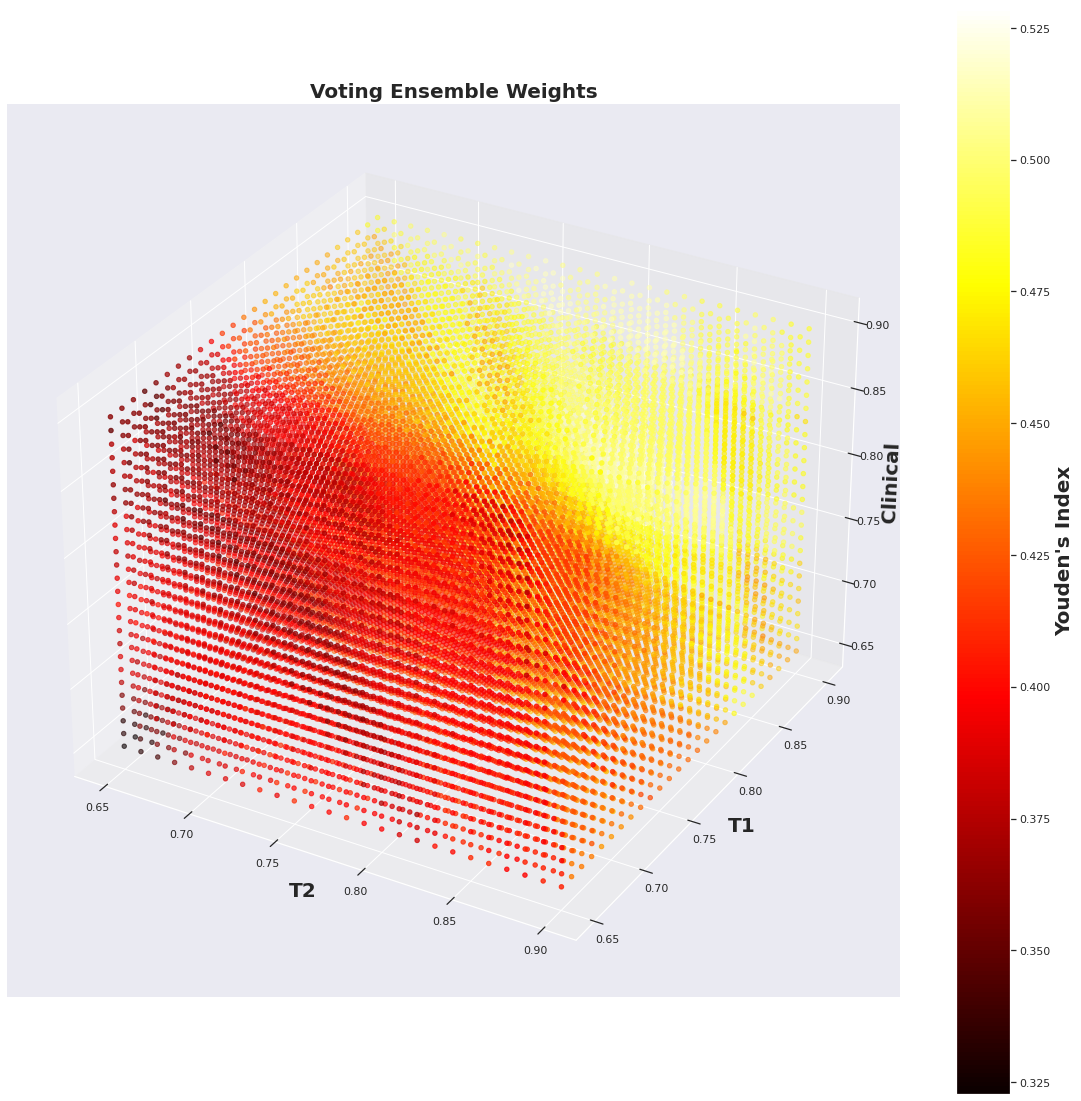

In [10]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')
ax.set_title('Voting Ensemble Weights', fontsize=20, fontweight='bold')

x = [point["threshold_t2"] for point in stats]
y = [point["threshold_t1"] for point in stats]
z = [point["threshold_clinical"] for point in stats]
c = [point["score"] for point in stats]

#ax.set_axis_bgcolor('white')
ax.set_xlabel('T2', fontsize=20, fontweight='bold')
ax.set_ylabel('T1', fontsize=20, fontweight='bold')
ax.set_zlabel('Clinical', fontsize=20, fontweight='bold')
img = ax.scatter(x, y, z, c=c, cmap=plt.hot())
cbr = fig.colorbar(img)
cbr.set_label("Youden's Index", fontsize=20, fontweight='bold')
plt.show()

In [32]:
#best_acc = 0
#best_model = None
#for j, c in enumerate(CLASSIFIERS): 
#    model_best = 0
#    model_acc = 0
#    for i in tqdm(range(1000)):
#        if c == VotingClassifier:
#            clf = c(**(PARAMETERS[j]))
#        else:
#            clf = c(random_state=i, **(PARAMETERS[j]))
#        clf.fit(train_fix_set, train_fix_labels)
#        score = clf.score(validation_set, validation_labels)
#        if score > best_acc:
#            best_acc = score
#            best_model = clf
#        if score > model_acc:
#            model_acc = score
#            model_best = clf
#    print(model_acc)
#    print(model_best)
#    print(best_acc)
#    print(best_model)

100%|██████████| 1000/1000 [00:04<00:00, 211.18it/s]

0.7142857142857143
VotingClassifier(estimators=[('t2', VotingEstimator()),
                             ('clinical', VotingEstimator(selection=1)),
                             ('t1', VotingEstimator(selection=2))],
                 voting='soft')
0.7142857142857143
VotingClassifier(estimators=[('t2', VotingEstimator()),
                             ('clinical', VotingEstimator(selection=1)),
                             ('t1', VotingEstimator(selection=2))],
                 voting='soft')


In [278]:
print("train accuracy: {}".format(best_model.score(train_fix_set, train_fix_labels)))
print("validation accuracy: {}".format(best_model.score(validation_set, validation_labels)))
print("test accuracy: {}".format(best_model.score(test_set, test_labels)))
print("external accuracy: {}".format(best_model.score(external_set, external_labels)))

train accuracy: 0.9741750358680057
validation accuracy: 0.7193877551020408
test accuracy: 0.7311827956989247
external accuracy: 0.7010309278350515


In [257]:
best_model

VotingClassifier(estimators=[('t2', VotingEstimator(threshold=0.68)),
                             ('clinical',
                              VotingEstimator(selection=1, threshold=0.65)),
                             ('t1',
                              VotingEstimator(selection=2, threshold=0.9))],
                 voting='soft')

# Training

In [180]:
model = best_model
predictions = model.predict(train_fix_set)
probabilities = model.predict_proba(train_fix_set)
sb.glue("train_labels", list(train_fix_labels))
sb.glue("train_probabilities", list(probabilities[:,1]))
sb.glue("train_predictions", list(predictions))

In [181]:
print("accuracy: {}".format(metrics.accuracy_score(train_fix_labels, predictions)))

accuracy: 0.9985652797704447


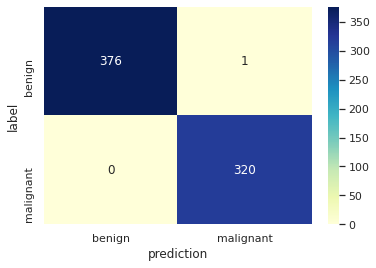

In [182]:
fig = plot_confusion_matrix_ensemble(train_fix_labels, predictions, ["benign", "malignant"])
fig.savefig("figures/ensemble-train-confusion-matrix.svg", bbox_inches = "tight")

In [183]:
pandas.DataFrame(calculate_confusion_matrix_stats(train_fix_labels, probabilities[:,1]))

,Acc,TP,TN,FP,FN,TPR,TNR,PPV,NPV,FPR,FNR,FDR,AM,GM
0,0.998565,376,320,0,1,0.997347,1.000000,1.000000,0.996885,0.000000,0.002653,0.000000,0.998674,0.998673
1,0.998565,320,376,1,0,1.000000,0.997347,0.996885,1.000000,0.002653,0.000000,0.003115,0.998674,0.998673


## ROC Curve

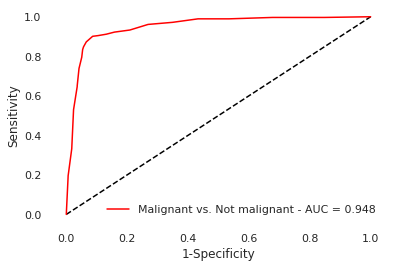

In [24]:
fig = plot_roc_curve(train_fix_labels, probabilities[:,1])
fig.savefig("figures/ensemble-train-roc-curve.svg", bbox_inches = "tight")

## Precision recall curve

In [ ]:
fig = plot_precision_recall(train_fix_labels, probabilities[:,1])
fig.savefig("figures/ensemble-train-precisionrecall.svg", bbox_inches = "tight")

# Validation

In [279]:
model = best_model
predictions = model.predict(validation_set)
probabilities = model.predict_proba(validation_set)
sb.glue("validation_labels", list(validation_labels))
sb.glue("validation_probabilities", list(probabilities[:,1]))
sb.glue("validation_predictions", list(predictions))

In [280]:
print("accuracy: {}".format(metrics.accuracy_score(validation_labels, predictions)))

accuracy: 0.7193877551020408


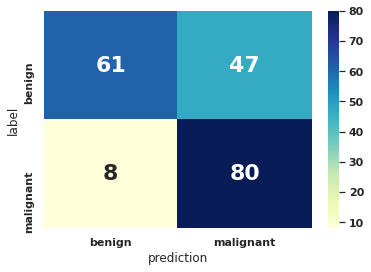

In [281]:
fig = plot_confusion_matrix_ensemble(validation_labels, predictions, ["benign", "malignant"])
fig.savefig("figures/ensemble-validation-confusion-matrix.svg", bbox_inches = "tight")

In [282]:
pandas.DataFrame(calculate_confusion_matrix_stats(validation_labels, probabilities[:,1]))

,Acc,TP,TN,FP,FN,TPR,TNR,PPV,NPV,FPR,FNR,FDR,AM,GM
0,0.719388,61,80,8,47,0.564815,0.909091,0.884058,0.629921,0.090909,0.435185,0.115942,0.736953,0.716567
1,0.719388,80,61,47,8,0.909091,0.564815,0.629921,0.884058,0.435185,0.090909,0.370079,0.736953,0.716567


## ROC Curve

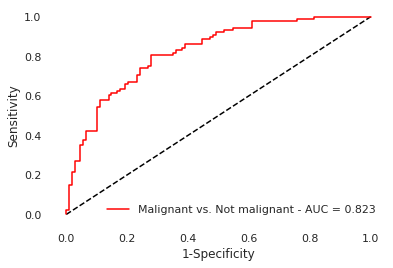

In [195]:
fig = plot_roc_curve(validation_labels, probabilities[:,1])
fig.savefig("figures/ensemble-validation-roc-curve.svg", bbox_inches = "tight")

## Precision recall curve

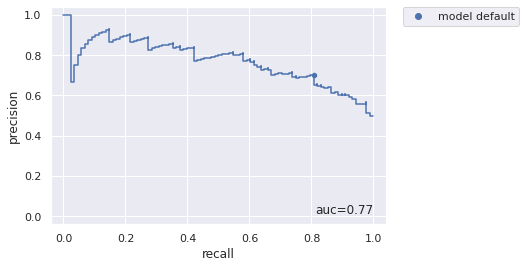

In [196]:
fig = plot_precision_recall(validation_labels, probabilities[:,1])
fig.savefig("figures/ensemble-validation-precisionrecall.svg", bbox_inches = "tight")

# Test

In [283]:
model = best_model
predictions = model.predict(test_set)
probabilities = model.predict_proba(test_set)
sb.glue("test_labels", list(test_labels))
sb.glue("test_probabilities", list(probabilities[:,1]))
sb.glue("test_predictions", list(predictions))

In [284]:
print("accuracy: {}".format(metrics.accuracy_score(test_labels, predictions)))

accuracy: 0.7311827956989247


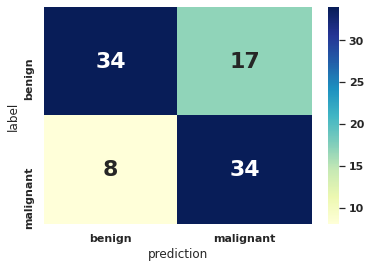

In [285]:
fig = plot_confusion_matrix_ensemble(test_labels, predictions, ["benign", "malignant"])
fig.savefig("figures/ensemble-test-confusion-matrix.svg", bbox_inches = "tight")

In [286]:
len(test_labels)

93

In [287]:
pandas.DataFrame(calculate_confusion_matrix_stats(test_labels, probabilities[:,1]))

,Acc,TP,TN,FP,FN,TPR,TNR,PPV,NPV,FPR,FNR,FDR,AM,GM
0,0.731183,34,34,8,17,0.666667,0.809524,0.809524,0.666667,0.190476,0.333333,0.190476,0.738095,0.734631
1,0.731183,34,34,17,8,0.809524,0.666667,0.666667,0.809524,0.333333,0.190476,0.333333,0.738095,0.734631


## ROC Curve

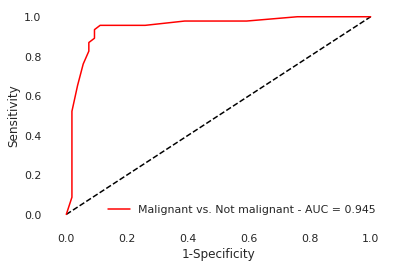

In [30]:
fig = plot_roc_curve(test_labels, probabilities[:,1])
fig.savefig("figures/ensemble-test-roc-curve.svg", bbox_inches = "tight")

## Precision recall curve

In [ ]:
fig = plot_precision_recall(test_labels, probabilities[:,1])
fig.savefig("figures/ensemble-test-precisionrecall.svg", bbox_inches = "tight")

# External

In [288]:
model = best_model
predictions = model.predict(external_set)
probabilities = model.predict_proba(external_set)
sb.glue("external_labels", list(external_labels))
sb.glue("external_probabilities", list(probabilities[:,1]))
sb.glue("external_predictions", list(predictions))
print("accuracy: {}".format(metrics.accuracy_score(external_labels, predictions)))

accuracy: 0.7010309278350515


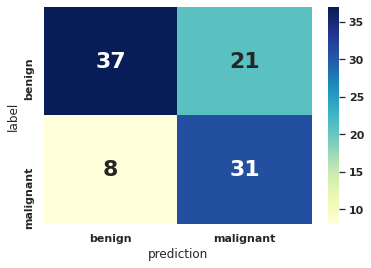

In [289]:
fig = plot_confusion_matrix_ensemble(external_labels, predictions, ["benign", "malignant"])
fig.savefig("figures/ensemble-test-confusion-matrix.svg", bbox_inches = "tight")

In [290]:
pandas.DataFrame(calculate_confusion_matrix_stats(external_labels, probabilities[:,1]))

,Acc,TP,TN,FP,FN,TPR,TNR,PPV,NPV,FPR,FNR,FDR,AM,GM
0,0.701031,37,31,8,21,0.637931,0.794872,0.822222,0.596154,0.205128,0.362069,0.177778,0.716401,0.712091
1,0.701031,31,37,21,8,0.794872,0.637931,0.596154,0.822222,0.362069,0.205128,0.403846,0.716401,0.712091


In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.